In [1]:
import torch.cuda
import sys

sys.path.append('..')

from src.henry.mnist_vae_pure import VariationalAutoencoder
import torchvision
import torchvision.datasets as datasets
import pickle
from matplotlib import pyplot as plt
import numpy as np
from utils import * 
from WeightsModification import * 
from federated_pure import federate




In [2]:
# I generated images on 4237987
class FakeArgs:
    def __init__(self):
        self.seed = None# We don't want a seed if we're doing multiple trials
        self.epochs = 25
        self.dataset = "mnist"
        self.num_users=10
        self.iid = 2
        self.dirichlet = 0.5 
        self.local_ep=10
        self.local_bs=64
        self.beta=1.0
    # def __init__(self):
    #     self.epochs = 25
    #     self.dataset = "fmnist"
    #     self.num_users=10
    #     self.iid = 2
    #     self.dirichlet = 0.5 
    #     self.local_ep=10
    #     self.local_bs=64
    #     self.beta=1.0
        

In [3]:

def run_trial_iteration(runtime_args):
    alpha_values = [0.1,0.5,0.9]
    vae_beta_values = [10.0]

    for vae_beta_val in vae_beta_values:
        runtime_args.beta=vae_beta_val
        
        baseline_result = federate(runtime_args)
        baseline_result.serialise("baseline", runtime_args)
        
        for alpha in alpha_values:
            try:
                new_weights = calculate_new_weights(baseline_result.global_model.encoder, baseline_result.client_datasets, alpha,0.0)
                second_res = federate(runtime_args,new_weights, baseline_result.client_datasets)
                second_res.serialise("alpha_" + str(alpha),runtime_args)
            except HyperValueError as e:
                # We simply ignore the case 
                pass
        




In [5]:
def run_trial():
    start_args = FakeArgs()
    # run_trial_iteration(start_args)
    
    # fmnist
    start_args.dataset = "fmnist"
    run_trial_iteration(start_args)
    
    ## NIID ~ 2
    # start_args.dataset = "mnist"
    start_args.iid = 4
    start_args.num_users = 6
    # run_trial_iteration(start_args)
    
    start_args.dataset = "fmnist"
    run_trial_iteration(start_args)
    
run_trial()
    

/home/henry/anaconda3/envs/rp/lib/python3.12/site-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 661.015708571214
Finished local epoch 2 out of 10, average loss across batches: 594.2423602764424
Finished local epoch 3 out of 10, average loss across batches: 577.8999624399039
Finished local epoch 4 out of 10, average loss across batches: 570.4114999624398
Finished local epoch 5 out of 10, average loss across batches: 562.8356013371395
Finished local epoch 6 out of 10, average loss across batches: 557.7534198467548
Finished local epoch 7 out of 10, average loss across batches: 554.2787001389723
Finished local epoch 8 out of 10, average loss across batches: 550.2920752892128
Finished local epoch 9 out of 10, average loss across batches: 547.1136925330529
Finished local epoch 10 out of 10, average loss across batches: 544.4445350060096
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 595.7919222513834
Finished local epoch 2

  4%|▍         | 1/25 [01:31<36:45, 91.89s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 645.6921236999511

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 582.1741717998798
Finished local epoch 2 out of 10, average loss across batches: 542.6065650353065
Finished local epoch 3 out of 10, average loss across batches: 536.7963848407452
Finished local epoch 4 out of 10, average loss across batches: 533.6191119854267
Finished local epoch 5 out of 10, average loss across batches: 532.2322514460637
Finished local epoch 6 out of 10, average loss across batches: 530.4034696138822
Finished local epoch 7 out of 10, average loss across batches: 528.9982980581431
Finished local epoch 8 out of 10, average loss across batches: 527.969142972506
Finished local epoch 9 out of 10, average loss across batches: 527.6076979417068
Finished local epoch 10 out of 10, average loss across batches: 526.3100595327523
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss ac

  8%|▊         | 2/25 [03:02<34:53, 91.01s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 590.001060482788

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 546.9139380821815
Finished local epoch 2 out of 10, average loss across batches: 532.864204289363
Finished local epoch 3 out of 10, average loss across batches: 529.2656198354867
Finished local epoch 4 out of 10, average loss across batches: 526.9185950646033
Finished local epoch 5 out of 10, average loss across batches: 525.2489037146935
Finished local epoch 6 out of 10, average loss across batches: 523.6582209660456
Finished local epoch 7 out of 10, average loss across batches: 522.2617633526141
Finished local epoch 8 out of 10, average loss across batches: 521.2607534555289
Finished local epoch 9 out of 10, average loss across batches: 520.5034020057092
Finished local epoch 10 out of 10, average loss across batches: 519.5664424015926
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss acr

 12%|█▏        | 3/25 [04:32<33:16, 90.77s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 545.57852996521

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 534.0906080979568
Finished local epoch 2 out of 10, average loss across batches: 525.70801955003
Finished local epoch 3 out of 10, average loss across batches: 522.6101060133714
Finished local epoch 4 out of 10, average loss across batches: 520.4474036583533
Finished local epoch 5 out of 10, average loss across batches: 518.6539123535156
Finished local epoch 6 out of 10, average loss across batches: 518.0403907189002
Finished local epoch 7 out of 10, average loss across batches: 516.9819148137019
Finished local epoch 8 out of 10, average loss across batches: 515.9967975323017
Finished local epoch 9 out of 10, average loss across batches: 515.2933260404146
Finished local epoch 10 out of 10, average loss across batches: 514.8614131047176
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss acros

 16%|█▌        | 4/25 [06:02<31:41, 90.55s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 539.3059258056641

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 530.5232454740084
Finished local epoch 2 out of 10, average loss across batches: 521.777167217548
Finished local epoch 3 out of 10, average loss across batches: 518.7889211801382
Finished local epoch 4 out of 10, average loss across batches: 516.7222116323618
Finished local epoch 5 out of 10, average loss across batches: 515.4583528958834
Finished local epoch 6 out of 10, average loss across batches: 513.8808903620793
Finished local epoch 7 out of 10, average loss across batches: 513.3658020019532
Finished local epoch 8 out of 10, average loss across batches: 512.2310668945313
Finished local epoch 9 out of 10, average loss across batches: 511.5518038236178
Finished local epoch 10 out of 10, average loss across batches: 510.70416494516223
Training user 1 in round 5
Finished local epoch 1 out of 10, average loss a

 20%|██        | 5/25 [07:33<30:12, 90.61s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 533.2893605697632

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 526.5833458533654
Finished local epoch 2 out of 10, average loss across batches: 518.0586153470553
Finished local epoch 3 out of 10, average loss across batches: 515.1189185509315
Finished local epoch 4 out of 10, average loss across batches: 513.3210167518029
Finished local epoch 5 out of 10, average loss across batches: 512.2766272911658
Finished local epoch 6 out of 10, average loss across batches: 511.38726524939904
Finished local epoch 7 out of 10, average loss across batches: 510.64500028170073
Finished local epoch 8 out of 10, average loss across batches: 509.903464449369
Finished local epoch 9 out of 10, average loss across batches: 509.362014066256
Finished local epoch 10 out of 10, average loss across batches: 508.7526587853065
Training user 1 in round 6
Finished local epoch 1 out of 10, average loss a

 24%|██▍       | 6/25 [09:03<28:36, 90.37s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 530.4867841415405

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 524.5826392540565
Finished local epoch 2 out of 10, average loss across batches: 515.6141822228064
Finished local epoch 3 out of 10, average loss across batches: 512.9468764085036
Finished local epoch 4 out of 10, average loss across batches: 511.15557157076324
Finished local epoch 5 out of 10, average loss across batches: 510.1518277681791
Finished local epoch 6 out of 10, average loss across batches: 509.0857013408954
Finished local epoch 7 out of 10, average loss across batches: 507.80413630558894
Finished local epoch 8 out of 10, average loss across batches: 507.54753934420074
Finished local epoch 9 out of 10, average loss across batches: 506.60091975285457
Finished local epoch 10 out of 10, average loss across batches: 505.9220951960637
Training user 1 in round 7
Finished local epoch 1 out of 10, average lo

 28%|██▊       | 7/25 [10:32<26:59, 89.95s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 526.9246149993896

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 521.786188683143
Finished local epoch 2 out of 10, average loss across batches: 513.8109379695012
Finished local epoch 3 out of 10, average loss across batches: 511.38833899864784
Finished local epoch 4 out of 10, average loss across batches: 509.6787592961238
Finished local epoch 5 out of 10, average loss across batches: 508.1774141751803
Finished local epoch 6 out of 10, average loss across batches: 507.25099299504205
Finished local epoch 7 out of 10, average loss across batches: 506.32757568359375
Finished local epoch 8 out of 10, average loss across batches: 506.23726618840146
Finished local epoch 9 out of 10, average loss across batches: 505.3129676231971
Finished local epoch 10 out of 10, average loss across batches: 505.08966580904445
Training user 1 in round 8
Finished local epoch 1 out of 10, average lo

 32%|███▏      | 8/25 [12:01<25:23, 89.62s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 522.5063646255493

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 519.0426912747897
Finished local epoch 2 out of 10, average loss across batches: 511.3103276179387
Finished local epoch 3 out of 10, average loss across batches: 510.7353914701022
Finished local epoch 4 out of 10, average loss across batches: 507.9066190279447
Finished local epoch 5 out of 10, average loss across batches: 506.6059800368089
Finished local epoch 6 out of 10, average loss across batches: 505.4047607421875
Finished local epoch 7 out of 10, average loss across batches: 504.53218430739184
Finished local epoch 8 out of 10, average loss across batches: 503.69396033653845
Finished local epoch 9 out of 10, average loss across batches: 503.0498366135817
Finished local epoch 10 out of 10, average loss across batches: 502.61878286508414
Training user 1 in round 9
Finished local epoch 1 out of 10, average los

 36%|███▌      | 9/25 [13:30<23:48, 89.29s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 518.9093412857055

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 516.0168259840746
Finished local epoch 2 out of 10, average loss across batches: 509.08762019230767
Finished local epoch 3 out of 10, average loss across batches: 506.64166071965144
Finished local epoch 4 out of 10, average loss across batches: 505.41127225435696
Finished local epoch 5 out of 10, average loss across batches: 504.4008263221154
Finished local epoch 6 out of 10, average loss across batches: 503.5326453575721
Finished local epoch 7 out of 10, average loss across batches: 502.96357797475963
Finished local epoch 8 out of 10, average loss across batches: 502.35074415940505
Finished local epoch 9 out of 10, average loss across batches: 502.1368361253005
Finished local epoch 10 out of 10, average loss across batches: 501.5265141413762
Training user 1 in round 10
Finished local epoch 1 out of 10, averag

 40%|████      | 10/25 [14:58<22:15, 89.05s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 516.4883629577637

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 513.6059208796574
Finished local epoch 2 out of 10, average loss across batches: 507.89244572566105
Finished local epoch 3 out of 10, average loss across batches: 505.627880859375
Finished local epoch 4 out of 10, average loss across batches: 505.1528080866887
Finished local epoch 5 out of 10, average loss across batches: 503.914932016226
Finished local epoch 6 out of 10, average loss across batches: 503.0048569899339
Finished local epoch 7 out of 10, average loss across batches: 502.1051062950721
Finished local epoch 8 out of 10, average loss across batches: 501.58533888596753
Finished local epoch 9 out of 10, average loss across batches: 501.0945617675781
Finished local epoch 10 out of 10, average loss across batches: 500.6040508563702
Training user 1 in round 11
Finished local epoch 1 out of 10, average lo

 44%|████▍     | 11/25 [16:28<20:50, 89.32s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 514.0522020355224

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 512.6765549879808
Finished local epoch 2 out of 10, average loss across batches: 506.6964655949519
Finished local epoch 3 out of 10, average loss across batches: 504.6718580979567
Finished local epoch 4 out of 10, average loss across batches: 503.73544546274036
Finished local epoch 5 out of 10, average loss across batches: 502.25260197566104
Finished local epoch 6 out of 10, average loss across batches: 502.04974459134615
Finished local epoch 7 out of 10, average loss across batches: 502.42452721228966
Finished local epoch 8 out of 10, average loss across batches: 500.6086533766526
Finished local epoch 9 out of 10, average loss across batches: 500.1146259014423
Finished local epoch 10 out of 10, average loss across batches: 499.5914912297176
Training user 1 in round 12
Finished local epoch 1 out of 10, averag

 48%|████▊     | 12/25 [17:58<19:23, 89.53s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 511.76622883758546

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 511.45372361403247
Finished local epoch 2 out of 10, average loss across batches: 504.7415278508113
Finished local epoch 3 out of 10, average loss across batches: 503.3886897160457
Finished local epoch 4 out of 10, average loss across batches: 502.4477370042067
Finished local epoch 5 out of 10, average loss across batches: 501.30969989483174
Finished local epoch 6 out of 10, average loss across batches: 500.8292949969952
Finished local epoch 7 out of 10, average loss across batches: 500.0573176457332
Finished local epoch 8 out of 10, average loss across batches: 499.25918954702524
Finished local epoch 9 out of 10, average loss across batches: 498.7031292255108
Finished local epoch 10 out of 10, average loss across batches: 498.7944842998798
Training user 1 in round 13
Finished local epoch 1 out of 10, averag

 52%|█████▏    | 13/25 [19:28<17:55, 89.61s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 510.9851227157593

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 510.1203387920673
Finished local epoch 2 out of 10, average loss across batches: 504.4779287484976
Finished local epoch 3 out of 10, average loss across batches: 502.4600839468149
Finished local epoch 4 out of 10, average loss across batches: 501.5923156738281
Finished local epoch 5 out of 10, average loss across batches: 500.9018592247596
Finished local epoch 6 out of 10, average loss across batches: 499.9292034442608
Finished local epoch 7 out of 10, average loss across batches: 499.3531001164363
Finished local epoch 8 out of 10, average loss across batches: 499.0588608961839
Finished local epoch 9 out of 10, average loss across batches: 498.6016385591947
Finished local epoch 10 out of 10, average loss across batches: 498.8528606708233
Training user 1 in round 14
Finished local epoch 1 out of 10, average lo

 56%|█████▌    | 14/25 [20:58<16:27, 89.77s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 509.6139212173462

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 510.9443758451022
Finished local epoch 2 out of 10, average loss across batches: 504.33556096003605
Finished local epoch 3 out of 10, average loss across batches: 502.0318932166466
Finished local epoch 4 out of 10, average loss across batches: 500.85910456730767
Finished local epoch 5 out of 10, average loss across batches: 500.1479393592248
Finished local epoch 6 out of 10, average loss across batches: 499.8490079439603
Finished local epoch 7 out of 10, average loss across batches: 498.9050081693209
Finished local epoch 8 out of 10, average loss across batches: 498.4365544245793
Finished local epoch 9 out of 10, average loss across batches: 498.1145099346454
Finished local epoch 10 out of 10, average loss across batches: 497.3986328125
Training user 1 in round 15
Finished local epoch 1 out of 10, average los

 60%|██████    | 15/25 [22:29<15:01, 90.10s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 508.6111414794922

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 508.7034376878005
Finished local epoch 2 out of 10, average loss across batches: 503.4182941143329
Finished local epoch 3 out of 10, average loss across batches: 501.682614839994
Finished local epoch 4 out of 10, average loss across batches: 500.85218130258414
Finished local epoch 5 out of 10, average loss across batches: 500.24288048377406
Finished local epoch 6 out of 10, average loss across batches: 499.4362295297476
Finished local epoch 7 out of 10, average loss across batches: 499.2200932429387
Finished local epoch 8 out of 10, average loss across batches: 498.52670006385216
Finished local epoch 9 out of 10, average loss across batches: 498.20087468073916
Finished local epoch 10 out of 10, average loss across batches: 497.7602318396935
Training user 1 in round 16
Finished local epoch 1 out of 10, average

 64%|██████▍   | 16/25 [23:59<13:31, 90.16s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 507.6294285705566

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 508.4511512169471
Finished local epoch 2 out of 10, average loss across batches: 503.0124253493089
Finished local epoch 3 out of 10, average loss across batches: 501.242333984375
Finished local epoch 4 out of 10, average loss across batches: 500.05206064077527
Finished local epoch 5 out of 10, average loss across batches: 499.34930795522837
Finished local epoch 6 out of 10, average loss across batches: 498.49848398061897
Finished local epoch 7 out of 10, average loss across batches: 498.052980863131
Finished local epoch 8 out of 10, average loss across batches: 497.7237858698918
Finished local epoch 9 out of 10, average loss across batches: 497.2237567608173
Finished local epoch 10 out of 10, average loss across batches: 496.94858022836536
Training user 1 in round 17
Finished local epoch 1 out of 10, average 

 68%|██████▊   | 17/25 [25:30<12:03, 90.42s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 507.1265783493042

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 507.40946326622594
Finished local epoch 2 out of 10, average loss across batches: 502.4008939302885
Finished local epoch 3 out of 10, average loss across batches: 500.47081580528845
Finished local epoch 4 out of 10, average loss across batches: 499.59308283879204
Finished local epoch 5 out of 10, average loss across batches: 498.72317598783053
Finished local epoch 6 out of 10, average loss across batches: 498.1170565091647
Finished local epoch 7 out of 10, average loss across batches: 497.53206129807694
Finished local epoch 8 out of 10, average loss across batches: 497.6735595703125
Finished local epoch 9 out of 10, average loss across batches: 497.19371619591345
Finished local epoch 10 out of 10, average loss across batches: 496.4557344876803
Training user 1 in round 18
Finished local epoch 1 out of 10, aver

 72%|███████▏  | 18/25 [27:01<10:34, 90.58s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 506.2844012664795

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 506.6546344463642
Finished local epoch 2 out of 10, average loss across batches: 501.5859741210937
Finished local epoch 3 out of 10, average loss across batches: 499.85806133563705
Finished local epoch 4 out of 10, average loss across batches: 499.21561748798075
Finished local epoch 5 out of 10, average loss across batches: 498.60013709435094
Finished local epoch 6 out of 10, average loss across batches: 498.10323016826925
Finished local epoch 7 out of 10, average loss across batches: 498.485598050631
Finished local epoch 8 out of 10, average loss across batches: 497.84673555814305
Finished local epoch 9 out of 10, average loss across batches: 498.07716064453126
Finished local epoch 10 out of 10, average loss across batches: 496.90323627178486
Training user 1 in round 19
Finished local epoch 1 out of 10, aver

 76%|███████▌  | 19/25 [28:32<09:04, 90.67s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 505.8357348007202

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 506.7562157264123
Finished local epoch 2 out of 10, average loss across batches: 501.20443443885216
Finished local epoch 3 out of 10, average loss across batches: 499.43282001201925
Finished local epoch 4 out of 10, average loss across batches: 499.1587158203125
Finished local epoch 5 out of 10, average loss across batches: 498.5602830153245
Finished local epoch 6 out of 10, average loss across batches: 497.2872572678786
Finished local epoch 7 out of 10, average loss across batches: 496.73195096529446
Finished local epoch 8 out of 10, average loss across batches: 496.7319495567909
Finished local epoch 9 out of 10, average loss across batches: 496.4805903508113
Finished local epoch 10 out of 10, average loss across batches: 496.1051570012019
Training user 1 in round 20
Finished local epoch 1 out of 10, average

 80%|████████  | 20/25 [30:03<07:33, 90.67s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 505.57800197296143

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 505.5364544208233
Finished local epoch 2 out of 10, average loss across batches: 500.716220327524
Finished local epoch 3 out of 10, average loss across batches: 499.6174349271334
Finished local epoch 4 out of 10, average loss across batches: 499.1595994215745
Finished local epoch 5 out of 10, average loss across batches: 499.5181889460637
Finished local epoch 6 out of 10, average loss across batches: 498.21793259840746
Finished local epoch 7 out of 10, average loss across batches: 497.03246131310095
Finished local epoch 8 out of 10, average loss across batches: 496.60797447791464
Finished local epoch 9 out of 10, average loss across batches: 496.53791973407453
Finished local epoch 10 out of 10, average loss across batches: 496.40657301682694
Training user 1 in round 21
Finished local epoch 1 out of 10, avera

 84%|████████▍ | 21/25 [31:33<06:02, 90.53s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 504.97417949066164

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 505.36481088491587
Finished local epoch 2 out of 10, average loss across batches: 500.6890887920673
Finished local epoch 3 out of 10, average loss across batches: 499.49061795748196
Finished local epoch 4 out of 10, average loss across batches: 499.2563368577224
Finished local epoch 5 out of 10, average loss across batches: 498.5836167555589
Finished local epoch 6 out of 10, average loss across batches: 497.59337064302883
Finished local epoch 7 out of 10, average loss across batches: 496.8033893291767
Finished local epoch 8 out of 10, average loss across batches: 496.93152794471155
Finished local epoch 9 out of 10, average loss across batches: 496.57917151817907
Finished local epoch 10 out of 10, average loss across batches: 495.9304250863882
Training user 1 in round 22
Finished local epoch 1 out of 10, aver

 88%|████████▊ | 22/25 [33:03<04:31, 90.35s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 504.8888484008789

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 505.9574373685397
Finished local epoch 2 out of 10, average loss across batches: 500.8984342134916
Finished local epoch 3 out of 10, average loss across batches: 499.5511019193209
Finished local epoch 4 out of 10, average loss across batches: 498.5237145057091
Finished local epoch 5 out of 10, average loss across batches: 497.64058790940504
Finished local epoch 6 out of 10, average loss across batches: 497.7419996995192
Finished local epoch 7 out of 10, average loss across batches: 497.9228665865385
Finished local epoch 8 out of 10, average loss across batches: 496.97434880183295
Finished local epoch 9 out of 10, average loss across batches: 496.1453312800481
Finished local epoch 10 out of 10, average loss across batches: 495.4122136042668
Training user 1 in round 23
Finished local epoch 1 out of 10, average 

 92%|█████████▏| 23/25 [34:33<03:00, 90.22s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 504.05084299468996

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 505.12120455228364
Finished local epoch 2 out of 10, average loss across batches: 500.10738572340745
Finished local epoch 3 out of 10, average loss across batches: 499.23675114558296
Finished local epoch 4 out of 10, average loss across batches: 497.8823796198918
Finished local epoch 5 out of 10, average loss across batches: 497.1065180851863
Finished local epoch 6 out of 10, average loss across batches: 496.8522334172176
Finished local epoch 7 out of 10, average loss across batches: 496.2998483511118
Finished local epoch 8 out of 10, average loss across batches: 495.79335045447715
Finished local epoch 9 out of 10, average loss across batches: 495.0658198429988
Finished local epoch 10 out of 10, average loss across batches: 494.76680344801684
Training user 1 in round 24
Finished local epoch 1 out of 10, aver

 96%|█████████▌| 24/25 [36:01<01:29, 89.71s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 504.01097056121824

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 505.50303767277643
Finished local epoch 2 out of 10, average loss across batches: 500.20005399263823
Finished local epoch 3 out of 10, average loss across batches: 498.8349628155048
Finished local epoch 4 out of 10, average loss across batches: 497.8418222280649
Finished local epoch 5 out of 10, average loss across batches: 496.9954843374399
Finished local epoch 6 out of 10, average loss across batches: 496.90438561072716
Finished local epoch 7 out of 10, average loss across batches: 496.19043813852164
Finished local epoch 8 out of 10, average loss across batches: 496.3924889197716
Finished local epoch 9 out of 10, average loss across batches: 495.1889944223257
Finished local epoch 10 out of 10, average loss across batches: 494.2913076547476
Training user 1 in round 25
Finished local epoch 1 out of 10, avera

100%|██████████| 25/25 [37:30<00:00, 90.04s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 503.79361558074953
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 655.9082622821514
Finished local epoch 2 out of 10, average loss across batches: 599.2422447791466
Finished local epoch 3 out of 10, average loss across batches: 582.756157038762
Finished local epoch 4 out of 10, average loss across batches: 573.0127657376803
Finished local epoch 5 out of 10, average loss across batches: 563.8795964167668
Finished local epoch 6 out of 10, average loss across batches: 557.3623028094952
Finished local epoch 7 out of 10, average loss across batches: 554.0261681189904
Finished local epoch 8 out of 10, average loss across batches: 551.7182457557092
Finished local epoch 9 out of 10, average loss across batches: 548.996337890625
Finished local epoch 10 out of 10, average loss across batches: 547.2994999812199
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 598.0593312581381
Finished local epoch 2 

  4%|▍         | 1/25 [01:30<36:22, 90.95s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 647.8190288208008

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 590.3651282677283
Finished local epoch 2 out of 10, average loss across batches: 547.694340632512
Finished local epoch 3 out of 10, average loss across batches: 540.4718886155349
Finished local epoch 4 out of 10, average loss across batches: 536.3464397723858
Finished local epoch 5 out of 10, average loss across batches: 534.3317913348858
Finished local epoch 6 out of 10, average loss across batches: 532.3537076509916
Finished local epoch 7 out of 10, average loss across batches: 530.6790705754207
Finished local epoch 8 out of 10, average loss across batches: 528.908230825571
Finished local epoch 9 out of 10, average loss across batches: 527.5173250638521
Finished local epoch 10 out of 10, average loss across batches: 525.7580970177283
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss acr

  8%|▊         | 2/25 [03:01<34:45, 90.68s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 597.6840850036621

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 554.1555119441106
Finished local epoch 2 out of 10, average loss across batches: 533.9474252554087
Finished local epoch 3 out of 10, average loss across batches: 529.0574584960938
Finished local epoch 4 out of 10, average loss across batches: 526.3895362267127
Finished local epoch 5 out of 10, average loss across batches: 523.468154672476
Finished local epoch 6 out of 10, average loss across batches: 521.9512188251202
Finished local epoch 7 out of 10, average loss across batches: 520.218801175631
Finished local epoch 8 out of 10, average loss across batches: 519.0828040489783
Finished local epoch 9 out of 10, average loss across batches: 517.6644751915564
Finished local epoch 10 out of 10, average loss across batches: 517.2295635516826
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss acr

 12%|█▏        | 3/25 [04:30<33:01, 90.05s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 549.7237227722168

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 539.2076068584736
Finished local epoch 2 out of 10, average loss across batches: 526.1082256610576
Finished local epoch 3 out of 10, average loss across batches: 522.7210486778846
Finished local epoch 4 out of 10, average loss across batches: 520.4672306941105
Finished local epoch 5 out of 10, average loss across batches: 518.2558349609375
Finished local epoch 6 out of 10, average loss across batches: 516.9929635854868
Finished local epoch 7 out of 10, average loss across batches: 515.6563589242788
Finished local epoch 8 out of 10, average loss across batches: 514.3552673339843
Finished local epoch 9 out of 10, average loss across batches: 513.3679279033954
Finished local epoch 10 out of 10, average loss across batches: 512.5593951885517
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss a

 16%|█▌        | 4/25 [06:00<31:28, 89.94s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 536.648818283081

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 534.0376694899339
Finished local epoch 2 out of 10, average loss across batches: 522.5216139573317
Finished local epoch 3 out of 10, average loss across batches: 519.2527705265926
Finished local epoch 4 out of 10, average loss across batches: 517.2491102952224
Finished local epoch 5 out of 10, average loss across batches: 515.1795649601863
Finished local epoch 6 out of 10, average loss across batches: 514.1861403245192
Finished local epoch 7 out of 10, average loss across batches: 513.436532827524
Finished local epoch 8 out of 10, average loss across batches: 512.1759629469651
Finished local epoch 9 out of 10, average loss across batches: 511.4089702899639
Finished local epoch 10 out of 10, average loss across batches: 511.1272418682392
Training user 1 in round 5
Finished local epoch 1 out of 10, average loss acr

 20%|██        | 5/25 [07:29<29:51, 89.57s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 530.6879033950805

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 529.4088444636418
Finished local epoch 2 out of 10, average loss across batches: 520.2180002065805
Finished local epoch 3 out of 10, average loss across batches: 516.8579829289363
Finished local epoch 4 out of 10, average loss across batches: 515.9180621807392
Finished local epoch 5 out of 10, average loss across batches: 513.6869342510516
Finished local epoch 6 out of 10, average loss across batches: 512.4735323392428
Finished local epoch 7 out of 10, average loss across batches: 511.4267118013822
Finished local epoch 8 out of 10, average loss across batches: 510.7040461613582
Finished local epoch 9 out of 10, average loss across batches: 509.95344707782453
Finished local epoch 10 out of 10, average loss across batches: 509.4532503568209
Training user 1 in round 6
Finished local epoch 1 out of 10, average loss 

 24%|██▍       | 6/25 [08:59<28:25, 89.79s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 526.2135683151245

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 526.6270479642428
Finished local epoch 2 out of 10, average loss across batches: 519.1569622333233
Finished local epoch 3 out of 10, average loss across batches: 516.3273634690505
Finished local epoch 4 out of 10, average loss across batches: 513.7415578988882
Finished local epoch 5 out of 10, average loss across batches: 512.5775287334735
Finished local epoch 6 out of 10, average loss across batches: 511.133298433744
Finished local epoch 7 out of 10, average loss across batches: 510.029743370643
Finished local epoch 8 out of 10, average loss across batches: 509.12740337665264
Finished local epoch 9 out of 10, average loss across batches: 508.3054884690505
Finished local epoch 10 out of 10, average loss across batches: 507.7852257361779
Training user 1 in round 7
Finished local epoch 1 out of 10, average loss ac

 28%|██▊       | 7/25 [10:30<27:01, 90.11s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 524.3376555862427

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 525.572184401292
Finished local epoch 2 out of 10, average loss across batches: 517.0584073580228
Finished local epoch 3 out of 10, average loss across batches: 513.444431246244
Finished local epoch 4 out of 10, average loss across batches: 511.2920227050781
Finished local epoch 5 out of 10, average loss across batches: 509.517619910607
Finished local epoch 6 out of 10, average loss across batches: 508.41414701021637
Finished local epoch 7 out of 10, average loss across batches: 507.9152780386118
Finished local epoch 8 out of 10, average loss across batches: 506.76101966271034
Finished local epoch 9 out of 10, average loss across batches: 506.46675461989184
Finished local epoch 10 out of 10, average loss across batches: 505.96249201847957
Training user 1 in round 8
Finished local epoch 1 out of 10, average loss 

 32%|███▏      | 8/25 [12:00<25:33, 90.21s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 522.8421288314819

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 523.2898766150842
Finished local epoch 2 out of 10, average loss across batches: 515.2986464280349
Finished local epoch 3 out of 10, average loss across batches: 512.2277146559495
Finished local epoch 4 out of 10, average loss across batches: 509.93484074519233
Finished local epoch 5 out of 10, average loss across batches: 508.68096782977767
Finished local epoch 6 out of 10, average loss across batches: 507.3866483248197
Finished local epoch 7 out of 10, average loss across batches: 506.8050260103666
Finished local epoch 8 out of 10, average loss across batches: 506.1451373760517
Finished local epoch 9 out of 10, average loss across batches: 505.88815213716947
Finished local epoch 10 out of 10, average loss across batches: 505.23292142427886
Training user 1 in round 9
Finished local epoch 1 out of 10, average lo

 36%|███▌      | 9/25 [13:31<24:07, 90.48s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 522.1729350997924

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 522.3911001352163
Finished local epoch 2 out of 10, average loss across batches: 514.3573669433594
Finished local epoch 3 out of 10, average loss across batches: 510.79515427809497
Finished local epoch 4 out of 10, average loss across batches: 509.1744948167067
Finished local epoch 5 out of 10, average loss across batches: 507.7021977351262
Finished local epoch 6 out of 10, average loss across batches: 506.24219689002405
Finished local epoch 7 out of 10, average loss across batches: 505.39766282301684
Finished local epoch 8 out of 10, average loss across batches: 504.70355036808894
Finished local epoch 9 out of 10, average loss across batches: 504.52645075871396
Finished local epoch 10 out of 10, average loss across batches: 503.960695706881
Training user 1 in round 10
Finished local epoch 1 out of 10, average

 40%|████      | 10/25 [15:02<22:35, 90.37s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 521.8195158279419

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 521.423181621845
Finished local epoch 2 out of 10, average loss across batches: 513.3157592773438
Finished local epoch 3 out of 10, average loss across batches: 510.3564650315505
Finished local epoch 4 out of 10, average loss across batches: 509.22632681039664
Finished local epoch 5 out of 10, average loss across batches: 507.67765033428486
Finished local epoch 6 out of 10, average loss across batches: 506.2198007436899
Finished local epoch 7 out of 10, average loss across batches: 505.6681917630709
Finished local epoch 8 out of 10, average loss across batches: 504.84715763972355
Finished local epoch 9 out of 10, average loss across batches: 503.99327955979567
Finished local epoch 10 out of 10, average loss across batches: 503.20914259690505
Training user 1 in round 11
Finished local epoch 1 out of 10, averag

 44%|████▍     | 11/25 [16:31<21:02, 90.21s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 520.470380255127

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 519.896982046274
Finished local epoch 2 out of 10, average loss across batches: 512.4478365384615
Finished local epoch 3 out of 10, average loss across batches: 509.33599149263824
Finished local epoch 4 out of 10, average loss across batches: 507.71126239483175
Finished local epoch 5 out of 10, average loss across batches: 506.5983407827524
Finished local epoch 6 out of 10, average loss across batches: 505.2907991849459
Finished local epoch 7 out of 10, average loss across batches: 504.43060114933894
Finished local epoch 8 out of 10, average loss across batches: 503.86756920447715
Finished local epoch 9 out of 10, average loss across batches: 503.57435396634617
Finished local epoch 10 out of 10, average loss across batches: 502.3932870718149
Training user 1 in round 12
Finished local epoch 1 out of 10, average

 48%|████▊     | 12/25 [18:01<19:29, 89.96s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 519.7196436264038

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 518.5678396371695
Finished local epoch 2 out of 10, average loss across batches: 511.0211477426382
Finished local epoch 3 out of 10, average loss across batches: 508.8336209810697
Finished local epoch 4 out of 10, average loss across batches: 507.2687471829928
Finished local epoch 5 out of 10, average loss across batches: 505.78441349909855
Finished local epoch 6 out of 10, average loss across batches: 505.2771075908954
Finished local epoch 7 out of 10, average loss across batches: 504.49678391676684
Finished local epoch 8 out of 10, average loss across batches: 503.45110943134017
Finished local epoch 9 out of 10, average loss across batches: 502.5734576885517
Finished local epoch 10 out of 10, average loss across batches: 501.971347280649
Training user 1 in round 13
Finished local epoch 1 out of 10, average 

 52%|█████▏    | 13/25 [19:30<17:56, 89.73s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 518.6393583374023

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 517.3118445763221
Finished local epoch 2 out of 10, average loss across batches: 510.5458538348858
Finished local epoch 3 out of 10, average loss across batches: 508.54559467022233
Finished local epoch 4 out of 10, average loss across batches: 507.51534189077523
Finished local epoch 5 out of 10, average loss across batches: 505.8362567608173
Finished local epoch 6 out of 10, average loss across batches: 505.339248422476
Finished local epoch 7 out of 10, average loss across batches: 504.3363243689904
Finished local epoch 8 out of 10, average loss across batches: 503.3713299091046
Finished local epoch 9 out of 10, average loss across batches: 501.8844092735877
Finished local epoch 10 out of 10, average loss across batches: 501.4737004206731
Training user 1 in round 14
Finished local epoch 1 out of 10, average l

 56%|█████▌    | 14/25 [20:59<16:23, 89.44s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 516.6747501541138

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 516.909475003756
Finished local epoch 2 out of 10, average loss across batches: 509.53069927509017
Finished local epoch 3 out of 10, average loss across batches: 507.38157536433295
Finished local epoch 4 out of 10, average loss across batches: 506.35358088566704
Finished local epoch 5 out of 10, average loss across batches: 505.8003713754507
Finished local epoch 6 out of 10, average loss across batches: 505.0733896108774
Finished local epoch 7 out of 10, average loss across batches: 504.2249319223257
Finished local epoch 8 out of 10, average loss across batches: 502.8797518216647
Finished local epoch 9 out of 10, average loss across batches: 501.76434936523435
Finished local epoch 10 out of 10, average loss across batches: 501.36309204101565
Training user 1 in round 15
Finished local epoch 1 out of 10, averag

 60%|██████    | 15/25 [22:28<14:54, 89.44s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 515.2456635803222

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 515.4185340294471
Finished local epoch 2 out of 10, average loss across batches: 509.08436326246994
Finished local epoch 3 out of 10, average loss across batches: 506.4037639911358
Finished local epoch 4 out of 10, average loss across batches: 505.2919889009916
Finished local epoch 5 out of 10, average loss across batches: 504.51117835411657
Finished local epoch 6 out of 10, average loss across batches: 504.21702880859374
Finished local epoch 7 out of 10, average loss across batches: 503.2414240910457
Finished local epoch 8 out of 10, average loss across batches: 501.5708087627704
Finished local epoch 9 out of 10, average loss across batches: 500.8165611853966
Finished local epoch 10 out of 10, average loss across batches: 500.46820584810695
Training user 1 in round 16
Finished local epoch 1 out of 10, averag

 64%|██████▍   | 16/25 [23:59<13:28, 89.84s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 514.851967602539

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 514.6718163123497
Finished local epoch 2 out of 10, average loss across batches: 507.7768653282752
Finished local epoch 3 out of 10, average loss across batches: 505.27208158052883
Finished local epoch 4 out of 10, average loss across batches: 504.52330603966345
Finished local epoch 5 out of 10, average loss across batches: 503.8336125300481
Finished local epoch 6 out of 10, average loss across batches: 502.9451162484976
Finished local epoch 7 out of 10, average loss across batches: 502.8329341008113
Finished local epoch 8 out of 10, average loss across batches: 501.1534639798678
Finished local epoch 9 out of 10, average loss across batches: 500.77411170372596
Finished local epoch 10 out of 10, average loss across batches: 500.6612074631911
Training user 1 in round 17
Finished local epoch 1 out of 10, average 

 68%|██████▊   | 17/25 [25:29<11:58, 89.82s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 513.9740663543702

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 515.366048020583
Finished local epoch 2 out of 10, average loss across batches: 508.78548818734976
Finished local epoch 3 out of 10, average loss across batches: 506.27825505183296
Finished local epoch 4 out of 10, average loss across batches: 504.3328848031851
Finished local epoch 5 out of 10, average loss across batches: 503.4709505521334
Finished local epoch 6 out of 10, average loss across batches: 502.89402935321516
Finished local epoch 7 out of 10, average loss across batches: 501.77055992713343
Finished local epoch 8 out of 10, average loss across batches: 501.3961416391226
Finished local epoch 9 out of 10, average loss across batches: 500.6885732797476
Finished local epoch 10 out of 10, average loss across batches: 499.754001558744
Training user 1 in round 18
Finished local epoch 1 out of 10, average 

 72%|███████▏  | 18/25 [26:59<10:29, 89.97s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 512.9234236694336

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 513.7068833571213
Finished local epoch 2 out of 10, average loss across batches: 507.59333261343147
Finished local epoch 3 out of 10, average loss across batches: 505.4500831017127
Finished local epoch 4 out of 10, average loss across batches: 503.3106712928185
Finished local epoch 5 out of 10, average loss across batches: 502.48143498347355
Finished local epoch 6 out of 10, average loss across batches: 501.6113431490385
Finished local epoch 7 out of 10, average loss across batches: 501.06883826622595
Finished local epoch 8 out of 10, average loss across batches: 500.28619760366587
Finished local epoch 9 out of 10, average loss across batches: 499.76996272160454
Finished local epoch 10 out of 10, average loss across batches: 499.0003868689904
Training user 1 in round 19
Finished local epoch 1 out of 10, avera

 76%|███████▌  | 19/25 [28:29<09:00, 90.04s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 513.5551144546508

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 512.6878324068509
Finished local epoch 2 out of 10, average loss across batches: 506.9047105055589
Finished local epoch 3 out of 10, average loss across batches: 504.8153630183293
Finished local epoch 4 out of 10, average loss across batches: 503.4539320725661
Finished local epoch 5 out of 10, average loss across batches: 503.11070040189304
Finished local epoch 6 out of 10, average loss across batches: 501.6996774526743
Finished local epoch 7 out of 10, average loss across batches: 500.7856623722957
Finished local epoch 8 out of 10, average loss across batches: 500.2943617600661
Finished local epoch 9 out of 10, average loss across batches: 499.25040752704325
Finished local epoch 10 out of 10, average loss across batches: 498.64954458383414
Training user 1 in round 20
Finished local epoch 1 out of 10, average

 80%|████████  | 20/25 [30:01<07:32, 90.49s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 512.0160446609497

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 513.024834735577
Finished local epoch 2 out of 10, average loss across batches: 506.977341402494
Finished local epoch 3 out of 10, average loss across batches: 504.96009568434494
Finished local epoch 4 out of 10, average loss across batches: 503.6310307429387
Finished local epoch 5 out of 10, average loss across batches: 502.59602426382213
Finished local epoch 6 out of 10, average loss across batches: 501.23094529371997
Finished local epoch 7 out of 10, average loss across batches: 501.14283165564905
Finished local epoch 8 out of 10, average loss across batches: 499.98301297701323
Finished local epoch 9 out of 10, average loss across batches: 499.83499849759613
Finished local epoch 10 out of 10, average loss across batches: 499.43582951472354
Training user 1 in round 21
Finished local epoch 1 out of 10, avera

 84%|████████▍ | 21/25 [31:30<06:00, 90.17s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 512.1844423828124

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 512.504585148738
Finished local epoch 2 out of 10, average loss across batches: 506.41245727539064
Finished local epoch 3 out of 10, average loss across batches: 504.44977323091945
Finished local epoch 4 out of 10, average loss across batches: 502.9351994441106
Finished local epoch 5 out of 10, average loss across batches: 502.2171907865084
Finished local epoch 6 out of 10, average loss across batches: 501.3825885479267
Finished local epoch 7 out of 10, average loss across batches: 500.2708679199219
Finished local epoch 8 out of 10, average loss across batches: 500.3031240609976
Finished local epoch 9 out of 10, average loss across batches: 499.23729529747595
Finished local epoch 10 out of 10, average loss across batches: 498.79194101186897
Training user 1 in round 22
Finished local epoch 1 out of 10, average

 88%|████████▊ | 22/25 [33:01<04:30, 90.26s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 511.35406667022704

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 512.4628408578726
Finished local epoch 2 out of 10, average loss across batches: 506.4307837853065
Finished local epoch 3 out of 10, average loss across batches: 503.3974116398738
Finished local epoch 4 out of 10, average loss across batches: 502.1449702336238
Finished local epoch 5 out of 10, average loss across batches: 501.58988694411056
Finished local epoch 6 out of 10, average loss across batches: 500.8360642653245
Finished local epoch 7 out of 10, average loss across batches: 500.42742591271036
Finished local epoch 8 out of 10, average loss across batches: 500.42759493314304
Finished local epoch 9 out of 10, average loss across batches: 499.2098172701322
Finished local epoch 10 out of 10, average loss across batches: 498.96775794396035
Training user 1 in round 23
Finished local epoch 1 out of 10, avera

 92%|█████████▏| 23/25 [34:31<03:00, 90.24s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 510.5792954498291

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 511.18717792217547
Finished local epoch 2 out of 10, average loss across batches: 505.6195514385517
Finished local epoch 3 out of 10, average loss across batches: 504.27774705153246
Finished local epoch 4 out of 10, average loss across batches: 502.1971862792969
Finished local epoch 5 out of 10, average loss across batches: 503.1465073805589
Finished local epoch 6 out of 10, average loss across batches: 501.97531550480767
Finished local epoch 7 out of 10, average loss across batches: 501.0405024601863
Finished local epoch 8 out of 10, average loss across batches: 500.170556640625
Finished local epoch 9 out of 10, average loss across batches: 499.0417053222656
Finished local epoch 10 out of 10, average loss across batches: 498.19266592172477
Training user 1 in round 24
Finished local epoch 1 out of 10, average

 96%|█████████▌| 24/25 [36:02<01:30, 90.36s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 509.9262322647095

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 510.5689636230469
Finished local epoch 2 out of 10, average loss across batches: 505.20970928485576
Finished local epoch 3 out of 10, average loss across batches: 502.50783973106974
Finished local epoch 4 out of 10, average loss across batches: 501.63997614933896
Finished local epoch 5 out of 10, average loss across batches: 500.7881582406851
Finished local epoch 6 out of 10, average loss across batches: 500.17631460336537
Finished local epoch 7 out of 10, average loss across batches: 499.8958702674279
Finished local epoch 8 out of 10, average loss across batches: 498.8459237905649
Finished local epoch 9 out of 10, average loss across batches: 497.9119826096755
Finished local epoch 10 out of 10, average loss across batches: 497.65889423076925
Training user 1 in round 25
Finished local epoch 1 out of 10, avera

100%|██████████| 25/25 [37:33<00:00, 90.14s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 509.3952198745728
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 668.5252319335938
Finished local epoch 2 out of 10, average loss across batches: 597.9822059044471
Finished local epoch 3 out of 10, average loss across batches: 577.5973463792068
Finished local epoch 4 out of 10, average loss across batches: 569.1474205603967
Finished local epoch 5 out of 10, average loss across batches: 561.1552142803486
Finished local epoch 6 out of 10, average loss across batches: 554.6148522010217
Finished local epoch 7 out of 10, average loss across batches: 550.4610191932092
Finished local epoch 8 out of 10, average loss across batches: 547.3698495718149
Finished local epoch 9 out of 10, average loss across batches: 544.9579341008113
Finished local epoch 10 out of 10, average loss across batches: 542.6547814002404
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 601.0211041768392
Finished local epoch 

  4%|▍         | 1/25 [01:31<36:37, 91.55s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 573.3046525268554

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 581.7022179236778
Finished local epoch 2 out of 10, average loss across batches: 552.6084528996395
Finished local epoch 3 out of 10, average loss across batches: 545.0108018141526
Finished local epoch 4 out of 10, average loss across batches: 541.1395559457633
Finished local epoch 5 out of 10, average loss across batches: 538.130803504357
Finished local epoch 6 out of 10, average loss across batches: 536.8449674166166
Finished local epoch 7 out of 10, average loss across batches: 535.8238980806791
Finished local epoch 8 out of 10, average loss across batches: 534.010553917518
Finished local epoch 9 out of 10, average loss across batches: 533.255849984976
Finished local epoch 10 out of 10, average loss across batches: 532.029641019381
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss acros

  8%|▊         | 2/25 [03:01<34:47, 90.76s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 557.4277056304932

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 584.4042687049279
Finished local epoch 2 out of 10, average loss across batches: 567.9409536508414
Finished local epoch 3 out of 10, average loss across batches: 559.4490919846755
Finished local epoch 4 out of 10, average loss across batches: 555.8295997032752
Finished local epoch 5 out of 10, average loss across batches: 552.1445744441106
Finished local epoch 6 out of 10, average loss across batches: 550.0379333496094
Finished local epoch 7 out of 10, average loss across batches: 548.8437622070312
Finished local epoch 8 out of 10, average loss across batches: 546.8333956204928
Finished local epoch 9 out of 10, average loss across batches: 545.2551194411058
Finished local epoch 10 out of 10, average loss across batches: 544.939306640625
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss ac

 12%|█▏        | 3/25 [04:31<33:07, 90.34s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 552.7529723800659

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 583.6672701322116
Finished local epoch 2 out of 10, average loss across batches: 568.1283719576322
Finished local epoch 3 out of 10, average loss across batches: 560.0526648888222
Finished local epoch 4 out of 10, average loss across batches: 556.0743708683895
Finished local epoch 5 out of 10, average loss across batches: 553.870361328125
Finished local epoch 6 out of 10, average loss across batches: 551.0785982572115
Finished local epoch 7 out of 10, average loss across batches: 549.1104755108173
Finished local epoch 8 out of 10, average loss across batches: 547.7482501690205
Finished local epoch 9 out of 10, average loss across batches: 545.9334651066707
Finished local epoch 10 out of 10, average loss across batches: 544.4511432354267
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss ac

 16%|█▌        | 4/25 [06:00<31:28, 89.94s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 549.3128242507935

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 581.3940298227163
Finished local epoch 2 out of 10, average loss across batches: 565.4326453575721
Finished local epoch 3 out of 10, average loss across batches: 559.0159959059495
Finished local epoch 4 out of 10, average loss across batches: 555.5154756986178
Finished local epoch 5 out of 10, average loss across batches: 552.8513343224158
Finished local epoch 6 out of 10, average loss across batches: 550.483354304387
Finished local epoch 7 out of 10, average loss across batches: 547.9024705153245
Finished local epoch 8 out of 10, average loss across batches: 546.7415593073919
Finished local epoch 9 out of 10, average loss across batches: 545.7214364858773
Finished local epoch 10 out of 10, average loss across batches: 544.0792001577524
Training user 1 in round 5
Finished local epoch 1 out of 10, average loss ac

 20%|██        | 5/25 [07:31<30:03, 90.15s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 548.4114170410156

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 579.1067119891827
Finished local epoch 2 out of 10, average loss across batches: 564.8279381385216
Finished local epoch 3 out of 10, average loss across batches: 558.535142164964
Finished local epoch 4 out of 10, average loss across batches: 555.3889347956731
Finished local epoch 5 out of 10, average loss across batches: 552.4800987830529
Finished local epoch 6 out of 10, average loss across batches: 550.4858961838943
Finished local epoch 7 out of 10, average loss across batches: 547.5036733774039
Finished local epoch 8 out of 10, average loss across batches: 546.1390803410457
Finished local epoch 9 out of 10, average loss across batches: 545.2967538686898
Finished local epoch 10 out of 10, average loss across batches: 543.3693396935096
Training user 1 in round 6
Finished local epoch 1 out of 10, average loss ac

 24%|██▍       | 6/25 [09:02<28:40, 90.54s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 546.7898247207642

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 576.9515333909255
Finished local epoch 2 out of 10, average loss across batches: 562.2839646559495
Finished local epoch 3 out of 10, average loss across batches: 556.5799424391527
Finished local epoch 4 out of 10, average loss across batches: 552.5332275390625
Finished local epoch 5 out of 10, average loss across batches: 550.2230501615085
Finished local epoch 6 out of 10, average loss across batches: 548.6737370417668
Finished local epoch 7 out of 10, average loss across batches: 547.3695171649639
Finished local epoch 8 out of 10, average loss across batches: 546.2390193058894
Finished local epoch 9 out of 10, average loss across batches: 545.1306584284856
Finished local epoch 10 out of 10, average loss across batches: 545.1245431753305
Training user 1 in round 7
Finished local epoch 1 out of 10, average loss a

 28%|██▊       | 7/25 [10:32<27:03, 90.22s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 547.3837296066284

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 577.4320190429687
Finished local epoch 2 out of 10, average loss across batches: 562.939223069411
Finished local epoch 3 out of 10, average loss across batches: 556.6027212289664
Finished local epoch 4 out of 10, average loss across batches: 553.6872774564303
Finished local epoch 5 out of 10, average loss across batches: 551.3734952486478
Finished local epoch 6 out of 10, average loss across batches: 549.719189453125
Finished local epoch 7 out of 10, average loss across batches: 548.4878507173978
Finished local epoch 8 out of 10, average loss across batches: 546.5547471266526
Finished local epoch 9 out of 10, average loss across batches: 545.5365506685697
Finished local epoch 10 out of 10, average loss across batches: 544.1498619666467
Training user 1 in round 8
Finished local epoch 1 out of 10, average loss acr

 32%|███▏      | 8/25 [12:01<25:29, 89.96s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 545.8044134857178

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 575.8802762545072
Finished local epoch 2 out of 10, average loss across batches: 561.9663142277644
Finished local epoch 3 out of 10, average loss across batches: 555.0529695951021
Finished local epoch 4 out of 10, average loss across batches: 550.7148676945613
Finished local epoch 5 out of 10, average loss across batches: 547.1432898888221
Finished local epoch 6 out of 10, average loss across batches: 544.7420663686898
Finished local epoch 7 out of 10, average loss across batches: 543.1455096905048
Finished local epoch 8 out of 10, average loss across batches: 542.0453852726863
Finished local epoch 9 out of 10, average loss across batches: 540.7834552471454
Finished local epoch 10 out of 10, average loss across batches: 539.5394291804387
Training user 1 in round 9
Finished local epoch 1 out of 10, average loss a

 36%|███▌      | 9/25 [13:30<23:55, 89.73s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 544.5383323684692

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 577.1988412710336
Finished local epoch 2 out of 10, average loss across batches: 561.2745225172777
Finished local epoch 3 out of 10, average loss across batches: 555.2287287785457
Finished local epoch 4 out of 10, average loss across batches: 551.739790226863
Finished local epoch 5 out of 10, average loss across batches: 548.9205312875602
Finished local epoch 6 out of 10, average loss across batches: 546.8702129657452
Finished local epoch 7 out of 10, average loss across batches: 544.5172893817609
Finished local epoch 8 out of 10, average loss across batches: 543.0698115422175
Finished local epoch 9 out of 10, average loss across batches: 541.8397583007812
Finished local epoch 10 out of 10, average loss across batches: 540.8670729417067
Training user 1 in round 10
Finished local epoch 1 out of 10, average loss

 40%|████      | 10/25 [15:01<22:30, 90.02s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 544.7842947219849

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 575.9787935697116
Finished local epoch 2 out of 10, average loss across batches: 560.4903846153846
Finished local epoch 3 out of 10, average loss across batches: 554.8696514423077
Finished local epoch 4 out of 10, average loss across batches: 552.3879652756912
Finished local epoch 5 out of 10, average loss across batches: 549.5830594576322
Finished local epoch 6 out of 10, average loss across batches: 547.7689781775841
Finished local epoch 7 out of 10, average loss across batches: 545.7811462402344
Finished local epoch 8 out of 10, average loss across batches: 544.144670691857
Finished local epoch 9 out of 10, average loss across batches: 542.5732759915866
Finished local epoch 10 out of 10, average loss across batches: 541.8769615760216
Training user 1 in round 11
Finished local epoch 1 out of 10, average los

 44%|████▍     | 11/25 [16:51<22:23, 95.97s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 545.479854862976

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 576.3117835411658
Finished local epoch 2 out of 10, average loss across batches: 561.6431504469651
Finished local epoch 3 out of 10, average loss across batches: 554.2536165677584
Finished local epoch 4 out of 10, average loss across batches: 550.4613900991586
Finished local epoch 5 out of 10, average loss across batches: 547.7701406625602
Finished local epoch 6 out of 10, average loss across batches: 546.3122286283053
Finished local epoch 7 out of 10, average loss across batches: 544.1282836914063
Finished local epoch 8 out of 10, average loss across batches: 542.8964815579928
Finished local epoch 9 out of 10, average loss across batches: 541.1965153620794
Finished local epoch 10 out of 10, average loss across batches: 540.1727064866286
Training user 1 in round 12
Finished local epoch 1 out of 10, average los

 48%|████▊     | 12/25 [18:36<21:26, 98.92s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 545.378726147461

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 575.8812847430889
Finished local epoch 2 out of 10, average loss across batches: 559.3566044734074
Finished local epoch 3 out of 10, average loss across batches: 553.802743765024
Finished local epoch 4 out of 10, average loss across batches: 550.825390625
Finished local epoch 5 out of 10, average loss across batches: 548.0873821551983
Finished local epoch 6 out of 10, average loss across batches: 546.1652850811298
Finished local epoch 7 out of 10, average loss across batches: 544.1824073204627
Finished local epoch 8 out of 10, average loss across batches: 542.8574181189904
Finished local epoch 9 out of 10, average loss across batches: 542.0156836876503
Finished local epoch 10 out of 10, average loss across batches: 541.2839740459735
Training user 1 in round 13
Finished local epoch 1 out of 10, average loss acr

 52%|█████▏    | 13/25 [20:29<20:39, 103.26s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 544.5120126220703

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 574.047651554988
Finished local epoch 2 out of 10, average loss across batches: 558.1788926344651
Finished local epoch 3 out of 10, average loss across batches: 553.3190317007211
Finished local epoch 4 out of 10, average loss across batches: 550.42442580003
Finished local epoch 5 out of 10, average loss across batches: 548.5128408578726
Finished local epoch 6 out of 10, average loss across batches: 546.7665987454928
Finished local epoch 7 out of 10, average loss across batches: 545.1786700908955
Finished local epoch 8 out of 10, average loss across batches: 543.5788428673377
Finished local epoch 9 out of 10, average loss across batches: 543.0175959660456
Finished local epoch 10 out of 10, average loss across batches: 542.0043241060697
Training user 1 in round 14
Finished local epoch 1 out of 10, average loss 

 56%|█████▌    | 14/25 [22:18<19:12, 104.75s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 544.4162896316528

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 574.9529409555289
Finished local epoch 2 out of 10, average loss across batches: 558.2227999173678
Finished local epoch 3 out of 10, average loss across batches: 553.5072613055889
Finished local epoch 4 out of 10, average loss across batches: 550.9991558368389
Finished local epoch 5 out of 10, average loss across batches: 548.8722675030048
Finished local epoch 6 out of 10, average loss across batches: 547.2032315767729
Finished local epoch 7 out of 10, average loss across batches: 545.4999380258414
Finished local epoch 8 out of 10, average loss across batches: 543.912751183143
Finished local epoch 9 out of 10, average loss across batches: 541.8356722318209
Finished local epoch 10 out of 10, average loss across batches: 540.2333848219652
Training user 1 in round 15
Finished local epoch 1 out of 10, average los

 60%|██████    | 15/25 [24:02<17:26, 104.67s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 544.3257624633789

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 575.5453594501201
Finished local epoch 2 out of 10, average loss across batches: 560.4003849909856
Finished local epoch 3 out of 10, average loss across batches: 555.0123948317307
Finished local epoch 4 out of 10, average loss across batches: 552.0334594726562
Finished local epoch 5 out of 10, average loss across batches: 549.4370774489182
Finished local epoch 6 out of 10, average loss across batches: 547.3734055739183
Finished local epoch 7 out of 10, average loss across batches: 545.4817584698017
Finished local epoch 8 out of 10, average loss across batches: 544.3307603102464
Finished local epoch 9 out of 10, average loss across batches: 543.2611947866586
Finished local epoch 10 out of 10, average loss across batches: 542.1158977801983
Training user 1 in round 16
Finished local epoch 1 out of 10, average lo

 64%|██████▍   | 16/25 [25:48<15:45, 105.03s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 543.9254830810547

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 575.3013718825121
Finished local epoch 2 out of 10, average loss across batches: 558.3556039663462
Finished local epoch 3 out of 10, average loss across batches: 552.8223430926984
Finished local epoch 4 out of 10, average loss across batches: 549.7412813626803
Finished local epoch 5 out of 10, average loss across batches: 547.6202143742488
Finished local epoch 6 out of 10, average loss across batches: 546.7266596867488
Finished local epoch 7 out of 10, average loss across batches: 545.3952082707332
Finished local epoch 8 out of 10, average loss across batches: 544.0946828988882
Finished local epoch 9 out of 10, average loss across batches: 542.7796490009015
Finished local epoch 10 out of 10, average loss across batches: 541.7704927884615
Training user 1 in round 17
Finished local epoch 1 out of 10, average lo

 68%|██████▊   | 17/25 [27:31<13:56, 104.56s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 543.6431281158448

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 573.5160907451923
Finished local epoch 2 out of 10, average loss across batches: 558.1215707632211
Finished local epoch 3 out of 10, average loss across batches: 553.2179912860577
Finished local epoch 4 out of 10, average loss across batches: 549.8908879206731
Finished local epoch 5 out of 10, average loss across batches: 547.914797269381
Finished local epoch 6 out of 10, average loss across batches: 546.2268071101262
Finished local epoch 7 out of 10, average loss across batches: 544.7474778395433
Finished local epoch 8 out of 10, average loss across batches: 543.3270465557392
Finished local epoch 9 out of 10, average loss across batches: 542.4052847055289
Finished local epoch 10 out of 10, average loss across batches: 541.6811744103065
Training user 1 in round 18
Finished local epoch 1 out of 10, average los

 72%|███████▏  | 18/25 [29:05<11:47, 101.10s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 544.3340905456542

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 576.1864962064303
Finished local epoch 2 out of 10, average loss across batches: 560.7823608398437
Finished local epoch 3 out of 10, average loss across batches: 554.8465369591346
Finished local epoch 4 out of 10, average loss across batches: 551.5863177959735
Finished local epoch 5 out of 10, average loss across batches: 549.0073392427885
Finished local epoch 6 out of 10, average loss across batches: 547.1657024676983
Finished local epoch 7 out of 10, average loss across batches: 545.9795081505408
Finished local epoch 8 out of 10, average loss across batches: 544.1956993689904
Finished local epoch 9 out of 10, average loss across batches: 543.5326157789964
Finished local epoch 10 out of 10, average loss across batches: 542.2836923452523
Training user 1 in round 19
Finished local epoch 1 out of 10, average lo

 76%|███████▌  | 19/25 [30:38<09:52, 98.69s/it] 

TEST LOSS AT GLOBAL ROUND 19 totalL: 544.8204370254516

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 574.6651742788462
Finished local epoch 2 out of 10, average loss across batches: 559.6008272611178
Finished local epoch 3 out of 10, average loss across batches: 553.952773813101
Finished local epoch 4 out of 10, average loss across batches: 550.9483342097355
Finished local epoch 5 out of 10, average loss across batches: 548.7011483999399
Finished local epoch 6 out of 10, average loss across batches: 547.1296391413762
Finished local epoch 7 out of 10, average loss across batches: 544.6875084510216
Finished local epoch 8 out of 10, average loss across batches: 543.5653578538161
Finished local epoch 9 out of 10, average loss across batches: 542.3246779221755
Finished local epoch 10 out of 10, average loss across batches: 541.3628211388221
Training user 1 in round 20
Finished local epoch 1 out of 10, average los

 80%|████████  | 20/25 [32:23<08:23, 100.64s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 544.196738092041

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 576.0925227238582
Finished local epoch 2 out of 10, average loss across batches: 559.7699462890625
Finished local epoch 3 out of 10, average loss across batches: 553.7728778545674
Finished local epoch 4 out of 10, average loss across batches: 550.566885141226
Finished local epoch 5 out of 10, average loss across batches: 548.4169133112981
Finished local epoch 6 out of 10, average loss across batches: 546.4898465670072
Finished local epoch 7 out of 10, average loss across batches: 544.6503155048077
Finished local epoch 8 out of 10, average loss across batches: 543.4675893930289
Finished local epoch 9 out of 10, average loss across batches: 541.9583097017728
Finished local epoch 10 out of 10, average loss across batches: 541.1574772761418
Training user 1 in round 21
Finished local epoch 1 out of 10, average loss

 84%|████████▍ | 21/25 [34:07<06:46, 101.71s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 544.8843227386475

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 574.6779503455529
Finished local epoch 2 out of 10, average loss across batches: 558.2651536207933
Finished local epoch 3 out of 10, average loss across batches: 552.6145057091346
Finished local epoch 4 out of 10, average loss across batches: 549.684072641226
Finished local epoch 5 out of 10, average loss across batches: 547.4213003305289
Finished local epoch 6 out of 10, average loss across batches: 545.4327866774339
Finished local epoch 7 out of 10, average loss across batches: 543.5233558067908
Finished local epoch 8 out of 10, average loss across batches: 542.4898977426383
Finished local epoch 9 out of 10, average loss across batches: 541.0403855543871
Finished local epoch 10 out of 10, average loss across batches: 540.3275066669171
Training user 1 in round 22
Finished local epoch 1 out of 10, average los

 88%|████████▊ | 22/25 [35:49<05:05, 101.72s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 544.7443841247558

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 576.0460627629207
Finished local epoch 2 out of 10, average loss across batches: 559.9770920973558
Finished local epoch 3 out of 10, average loss across batches: 552.9466740534856
Finished local epoch 4 out of 10, average loss across batches: 548.9847815880408
Finished local epoch 5 out of 10, average loss across batches: 546.6465317946214
Finished local epoch 6 out of 10, average loss across batches: 544.4047767052284
Finished local epoch 7 out of 10, average loss across batches: 543.1324894831731
Finished local epoch 8 out of 10, average loss across batches: 542.1214862530048
Finished local epoch 9 out of 10, average loss across batches: 541.1524634728065
Finished local epoch 10 out of 10, average loss across batches: 540.376423058143
Training user 1 in round 23
Finished local epoch 1 out of 10, average los

 92%|█████████▏| 23/25 [37:22<03:18, 99.18s/it] 

TEST LOSS AT GLOBAL ROUND 23 totalL: 544.9034651336669

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 575.7489539513222
Finished local epoch 2 out of 10, average loss across batches: 560.1329017052284
Finished local epoch 3 out of 10, average loss across batches: 553.7856717623197
Finished local epoch 4 out of 10, average loss across batches: 549.2450420673077
Finished local epoch 5 out of 10, average loss across batches: 547.1293189415564
Finished local epoch 6 out of 10, average loss across batches: 545.2779287484976
Finished local epoch 7 out of 10, average loss across batches: 543.7443331204928
Finished local epoch 8 out of 10, average loss across batches: 542.6169367863582
Finished local epoch 9 out of 10, average loss across batches: 541.7232407789963
Finished local epoch 10 out of 10, average loss across batches: 540.7421213003305
Training user 1 in round 24
Finished local epoch 1 out of 10, average lo

 96%|█████████▌| 24/25 [39:00<01:38, 98.68s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 544.7611732574463

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 576.2642174353966
Finished local epoch 2 out of 10, average loss across batches: 560.3433678260217
Finished local epoch 3 out of 10, average loss across batches: 553.926278921274
Finished local epoch 4 out of 10, average loss across batches: 549.8714111328125
Finished local epoch 5 out of 10, average loss across batches: 547.4395573542669
Finished local epoch 6 out of 10, average loss across batches: 545.5940711388221
Finished local epoch 7 out of 10, average loss across batches: 543.9247624323918
Finished local epoch 8 out of 10, average loss across batches: 542.6182795597957
Finished local epoch 9 out of 10, average loss across batches: 541.7974989670973
Finished local epoch 10 out of 10, average loss across batches: 540.6908090444712
Training user 1 in round 25
Finished local epoch 1 out of 10, average los

100%|██████████| 25/25 [40:50<00:00, 98.04s/it] 

TEST LOSS AT GLOBAL ROUND 25 totalL: 544.9623237442016
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 540.638091719778
Finished local epoch 2 out of 10, average loss across batches: 493.59308471679685
Finished local epoch 3 out of 10, average loss across batches: 484.7321639211554
Finished local epoch 4 out of 10, average loss across batches: 481.48139809056335
Finished local epoch 5 out of 10, average loss across batches: 479.3059387207031
Finished local epoch 6 out of 10, average loss across batches: 477.94166291889394
Finished local epoch 7 out of 10, average loss across batches: 476.2161951968544
Finished local epoch 8 out of 10, average loss across batches: 474.40032091642684
Finished local epoch 9 out of 10, average loss across batches: 472.6913757324219
Finished local epoch 10 out of 10, average loss across batches: 471.8773903294613
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 644.1480297220164
Finished local epo

  4%|▍         | 1/25 [01:50<44:13, 110.58s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 643.2207963775635

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 490.13033286646794
Finished local epoch 2 out of 10, average loss across batches: 465.0274748149671
Finished local epoch 3 out of 10, average loss across batches: 461.7511583830181
Finished local epoch 4 out of 10, average loss across batches: 460.39045056794816
Finished local epoch 5 out of 10, average loss across batches: 458.91880461040296
Finished local epoch 6 out of 10, average loss across batches: 457.5771821674548
Finished local epoch 7 out of 10, average loss across batches: 457.16163876182156
Finished local epoch 8 out of 10, average loss across batches: 456.0283961245888
Finished local epoch 9 out of 10, average loss across batches: 455.26652928402547
Finished local epoch 10 out of 10, average loss across batches: 455.4199138440584
Training user 1 in round 2
Finished local epoch 1 out of 10, average l

  8%|▊         | 2/25 [03:38<41:45, 108.96s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 598.4769909698487

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 470.73554302014804
Finished local epoch 2 out of 10, average loss across batches: 459.90784366005346
Finished local epoch 3 out of 10, average loss across batches: 457.88584755345397
Finished local epoch 4 out of 10, average loss across batches: 456.77821430407073
Finished local epoch 5 out of 10, average loss across batches: 456.10734124434623
Finished local epoch 6 out of 10, average loss across batches: 455.6774616442229
Finished local epoch 7 out of 10, average loss across batches: 455.21450741416527
Finished local epoch 8 out of 10, average loss across batches: 454.52365208675985
Finished local epoch 9 out of 10, average loss across batches: 453.58189986379523
Finished local epoch 10 out of 10, average loss across batches: 453.254780337685
Training user 1 in round 3
Finished local epoch 1 out of 10, average

 12%|█▏        | 3/25 [05:28<40:10, 109.55s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 552.6062345153808

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 466.44624794407895
Finished local epoch 2 out of 10, average loss across batches: 460.5637296977796
Finished local epoch 3 out of 10, average loss across batches: 458.3312365080181
Finished local epoch 4 out of 10, average loss across batches: 457.48291079872536
Finished local epoch 5 out of 10, average loss across batches: 456.6413214432566
Finished local epoch 6 out of 10, average loss across batches: 456.03633230108966
Finished local epoch 7 out of 10, average loss across batches: 456.4912995990954
Finished local epoch 8 out of 10, average loss across batches: 455.3458987587377
Finished local epoch 9 out of 10, average loss across batches: 455.0328359503495
Finished local epoch 10 out of 10, average loss across batches: 455.1815988641036
Training user 1 in round 4
Finished local epoch 1 out of 10, average los

 16%|█▌        | 4/25 [07:18<38:23, 109.69s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 547.313831288147

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 461.85516068307976
Finished local epoch 2 out of 10, average loss across batches: 456.26568796258226
Finished local epoch 3 out of 10, average loss across batches: 454.5500025699013
Finished local epoch 4 out of 10, average loss across batches: 453.7463796515214
Finished local epoch 5 out of 10, average loss across batches: 453.31718171772206
Finished local epoch 6 out of 10, average loss across batches: 452.5457339638158
Finished local epoch 7 out of 10, average loss across batches: 451.66531339946545
Finished local epoch 8 out of 10, average loss across batches: 451.40494031404194
Finished local epoch 9 out of 10, average loss across batches: 451.43537726151317
Finished local epoch 10 out of 10, average loss across batches: 450.9554732473273
Training user 1 in round 5
Finished local epoch 1 out of 10, average l

 20%|██        | 5/25 [09:08<36:37, 109.88s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 541.3123211120605

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 459.3710494192023
Finished local epoch 2 out of 10, average loss across batches: 454.87090229235196
Finished local epoch 3 out of 10, average loss across batches: 453.12825478001645
Finished local epoch 4 out of 10, average loss across batches: 451.97914525082234
Finished local epoch 5 out of 10, average loss across batches: 451.3223822342722
Finished local epoch 6 out of 10, average loss across batches: 450.3164017526727
Finished local epoch 7 out of 10, average loss across batches: 450.309866172389
Finished local epoch 8 out of 10, average loss across batches: 449.5295207776521
Finished local epoch 9 out of 10, average loss across batches: 449.7257523386102
Finished local epoch 10 out of 10, average loss across batches: 448.95501130756577
Training user 1 in round 6
Finished local epoch 1 out of 10, average los

 24%|██▍       | 6/25 [10:50<33:55, 107.12s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 538.0718522766114

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 458.8269380268298
Finished local epoch 2 out of 10, average loss across batches: 453.65005171926396
Finished local epoch 3 out of 10, average loss across batches: 452.10282175164474
Finished local epoch 4 out of 10, average loss across batches: 450.712691457648
Finished local epoch 5 out of 10, average loss across batches: 449.91074829101564
Finished local epoch 6 out of 10, average loss across batches: 449.1007468775699
Finished local epoch 7 out of 10, average loss across batches: 448.53602359169406
Finished local epoch 8 out of 10, average loss across batches: 449.21066862407486
Finished local epoch 9 out of 10, average loss across batches: 448.39580078125
Finished local epoch 10 out of 10, average loss across batches: 448.12961457905016
Training user 1 in round 7
Finished local epoch 1 out of 10, average los

 28%|██▊       | 7/25 [12:33<31:43, 105.73s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 536.1979944778442

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 457.6131781327097
Finished local epoch 2 out of 10, average loss across batches: 452.22492258172286
Finished local epoch 3 out of 10, average loss across batches: 450.4568430047286
Finished local epoch 4 out of 10, average loss across batches: 449.4643644634046
Finished local epoch 5 out of 10, average loss across batches: 449.25372571443256
Finished local epoch 6 out of 10, average loss across batches: 448.21720677425986
Finished local epoch 7 out of 10, average loss across batches: 447.5981281481291
Finished local epoch 8 out of 10, average loss across batches: 447.29036126387746
Finished local epoch 9 out of 10, average loss across batches: 446.78278969212585
Finished local epoch 10 out of 10, average loss across batches: 446.60806499280426
Training user 1 in round 8
Finished local epoch 1 out of 10, average 

 32%|███▏      | 8/25 [14:20<30:03, 106.06s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 533.1575499221801

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 456.8198704769737
Finished local epoch 2 out of 10, average loss across batches: 451.88920384457236
Finished local epoch 3 out of 10, average loss across batches: 450.27046862150496
Finished local epoch 4 out of 10, average loss across batches: 449.5824915835732
Finished local epoch 5 out of 10, average loss across batches: 448.837158203125
Finished local epoch 6 out of 10, average loss across batches: 448.24262888055097
Finished local epoch 7 out of 10, average loss across batches: 447.2168903551604
Finished local epoch 8 out of 10, average loss across batches: 447.0010163959704
Finished local epoch 9 out of 10, average loss across batches: 446.512604402241
Finished local epoch 10 out of 10, average loss across batches: 446.1359888980263
Training user 1 in round 9
Finished local epoch 1 out of 10, average loss 

 36%|███▌      | 9/25 [16:08<28:29, 106.85s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 530.4821766189575

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 455.31874967876234
Finished local epoch 2 out of 10, average loss across batches: 451.26529187654194
Finished local epoch 3 out of 10, average loss across batches: 449.9407579923931
Finished local epoch 4 out of 10, average loss across batches: 448.07448762592514
Finished local epoch 5 out of 10, average loss across batches: 447.62511821546053
Finished local epoch 6 out of 10, average loss across batches: 447.0794761256168
Finished local epoch 7 out of 10, average loss across batches: 447.3852320620888
Finished local epoch 8 out of 10, average loss across batches: 446.4221037212171
Finished local epoch 9 out of 10, average loss across batches: 446.7518374794408
Finished local epoch 10 out of 10, average loss across batches: 445.69643490439967
Training user 1 in round 10
Finished local epoch 1 out of 10, averag

 40%|████      | 10/25 [17:52<26:29, 106.00s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 528.010130644226

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 455.58830341539885
Finished local epoch 2 out of 10, average loss across batches: 451.32127685546874
Finished local epoch 3 out of 10, average loss across batches: 449.43697606136925
Finished local epoch 4 out of 10, average loss across batches: 448.87461869089225
Finished local epoch 5 out of 10, average loss across batches: 448.43739045795644
Finished local epoch 6 out of 10, average loss across batches: 447.5160455001028
Finished local epoch 7 out of 10, average loss across batches: 447.1331109297903
Finished local epoch 8 out of 10, average loss across batches: 446.62865439967106
Finished local epoch 9 out of 10, average loss across batches: 446.8869012129934
Finished local epoch 10 out of 10, average loss across batches: 445.81217522872123
Training user 1 in round 11
Finished local epoch 1 out of 10, aver

 44%|████▍     | 11/25 [19:36<24:35, 105.40s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 525.7406645233154

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 454.4710667660362
Finished local epoch 2 out of 10, average loss across batches: 450.7394335295025
Finished local epoch 3 out of 10, average loss across batches: 449.78752859015214
Finished local epoch 4 out of 10, average loss across batches: 448.5403712222451
Finished local epoch 5 out of 10, average loss across batches: 447.4006925884046
Finished local epoch 6 out of 10, average loss across batches: 447.18599692896794
Finished local epoch 7 out of 10, average loss across batches: 446.3873397024054
Finished local epoch 8 out of 10, average loss across batches: 445.9710555227179
Finished local epoch 9 out of 10, average loss across batches: 445.4448441354852
Finished local epoch 10 out of 10, average loss across batches: 445.67163021689964
Training user 1 in round 12
Finished local epoch 1 out of 10, average

 48%|████▊     | 12/25 [21:20<22:43, 104.89s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 524.2105079986572

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 454.4366120990954
Finished local epoch 2 out of 10, average loss across batches: 450.50373727898847
Finished local epoch 3 out of 10, average loss across batches: 449.09691129985606
Finished local epoch 4 out of 10, average loss across batches: 448.34431634200246
Finished local epoch 5 out of 10, average loss across batches: 447.64561317845397
Finished local epoch 6 out of 10, average loss across batches: 447.03013819644326
Finished local epoch 7 out of 10, average loss across batches: 445.8963587710732
Finished local epoch 8 out of 10, average loss across batches: 445.82412976716694
Finished local epoch 9 out of 10, average loss across batches: 444.85216321443255
Finished local epoch 10 out of 10, average loss across batches: 445.00259046052633
Training user 1 in round 13
Finished local epoch 1 out of 10, av

 52%|█████▏    | 13/25 [23:04<20:54, 104.50s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 523.9657326553345

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 453.47300415039064
Finished local epoch 2 out of 10, average loss across batches: 449.28927130448193
Finished local epoch 3 out of 10, average loss across batches: 448.1220449347245
Finished local epoch 4 out of 10, average loss across batches: 446.9410779451069
Finished local epoch 5 out of 10, average loss across batches: 446.1676478335732
Finished local epoch 6 out of 10, average loss across batches: 445.829975650185
Finished local epoch 7 out of 10, average loss across batches: 444.9726022820724
Finished local epoch 8 out of 10, average loss across batches: 444.7241185238487
Finished local epoch 9 out of 10, average loss across batches: 444.2277546129729
Finished local epoch 10 out of 10, average loss across batches: 444.22623194644325
Training user 1 in round 14
Finished local epoch 1 out of 10, average 

 56%|█████▌    | 14/25 [24:48<19:07, 104.31s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 522.2896009292602

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 452.5572911312706
Finished local epoch 2 out of 10, average loss across batches: 449.2521285207648
Finished local epoch 3 out of 10, average loss across batches: 448.16705065275494
Finished local epoch 4 out of 10, average loss across batches: 447.2309127004523
Finished local epoch 5 out of 10, average loss across batches: 446.3591527035362
Finished local epoch 6 out of 10, average loss across batches: 445.78926552220395
Finished local epoch 7 out of 10, average loss across batches: 445.2238904451069
Finished local epoch 8 out of 10, average loss across batches: 444.07889597039474
Finished local epoch 9 out of 10, average loss across batches: 444.05985364412004
Finished local epoch 10 out of 10, average loss across batches: 443.79854929070723
Training user 1 in round 15
Finished local epoch 1 out of 10, avera

 60%|██████    | 15/25 [26:32<17:22, 104.24s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 520.8425480514526

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 451.9735357987253
Finished local epoch 2 out of 10, average loss across batches: 448.7170268811678
Finished local epoch 3 out of 10, average loss across batches: 447.47986321700245
Finished local epoch 4 out of 10, average loss across batches: 446.81877762643916
Finished local epoch 5 out of 10, average loss across batches: 445.55349988435444
Finished local epoch 6 out of 10, average loss across batches: 445.6401363975123
Finished local epoch 7 out of 10, average loss across batches: 444.73286711040294
Finished local epoch 8 out of 10, average loss across batches: 443.98850386770147
Finished local epoch 9 out of 10, average loss across batches: 443.82856348941203
Finished local epoch 10 out of 10, average loss across batches: 443.60653204666943
Training user 1 in round 16
Finished local epoch 1 out of 10, ave

 64%|██████▍   | 16/25 [28:16<15:37, 104.12s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 520.1729335479737

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 452.42367296720806
Finished local epoch 2 out of 10, average loss across batches: 448.20775596217106
Finished local epoch 3 out of 10, average loss across batches: 447.3764108758224
Finished local epoch 4 out of 10, average loss across batches: 445.98921316046466
Finished local epoch 5 out of 10, average loss across batches: 445.16582673725327
Finished local epoch 6 out of 10, average loss across batches: 445.2518590023643
Finished local epoch 7 out of 10, average loss across batches: 444.95058914987663
Finished local epoch 8 out of 10, average loss across batches: 444.1619449013158
Finished local epoch 9 out of 10, average loss across batches: 443.8584228515625
Finished local epoch 10 out of 10, average loss across batches: 444.04436131527547
Training user 1 in round 17
Finished local epoch 1 out of 10, aver

 68%|██████▊   | 17/25 [30:00<13:53, 104.20s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 520.2832112030029

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 451.87164563630756
Finished local epoch 2 out of 10, average loss across batches: 448.53315558182567
Finished local epoch 3 out of 10, average loss across batches: 447.4565034565173
Finished local epoch 4 out of 10, average loss across batches: 446.504639635588
Finished local epoch 5 out of 10, average loss across batches: 445.41879593698604
Finished local epoch 6 out of 10, average loss across batches: 444.52017918636926
Finished local epoch 7 out of 10, average loss across batches: 444.64814099763566
Finished local epoch 8 out of 10, average loss across batches: 444.69272782175165
Finished local epoch 9 out of 10, average loss across batches: 443.89975875051397
Finished local epoch 10 out of 10, average loss across batches: 444.2067215768914
Training user 1 in round 18
Finished local epoch 1 out of 10, aver

 72%|███████▏  | 18/25 [31:45<12:10, 104.34s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 519.7727067672729

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 451.7820611251028
Finished local epoch 2 out of 10, average loss across batches: 447.9202463250411
Finished local epoch 3 out of 10, average loss across batches: 446.8850929661801
Finished local epoch 4 out of 10, average loss across batches: 446.0764076634457
Finished local epoch 5 out of 10, average loss across batches: 445.34407701994246
Finished local epoch 6 out of 10, average loss across batches: 444.03893561112255
Finished local epoch 7 out of 10, average loss across batches: 444.2217214483964
Finished local epoch 8 out of 10, average loss across batches: 443.86992765727797
Finished local epoch 9 out of 10, average loss across batches: 443.5134357653166
Finished local epoch 10 out of 10, average loss across batches: 443.6862111944901
Training user 1 in round 19
Finished local epoch 1 out of 10, average

 76%|███████▌  | 19/25 [33:30<10:27, 104.56s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 519.4606099853515

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 451.7472826505962
Finished local epoch 2 out of 10, average loss across batches: 448.19680754009045
Finished local epoch 3 out of 10, average loss across batches: 446.63622083162005
Finished local epoch 4 out of 10, average loss across batches: 446.0654348273026
Finished local epoch 5 out of 10, average loss across batches: 445.14291156969574
Finished local epoch 6 out of 10, average loss across batches: 445.11070106907897
Finished local epoch 7 out of 10, average loss across batches: 444.53549290707235
Finished local epoch 8 out of 10, average loss across batches: 444.11851517526725
Finished local epoch 9 out of 10, average loss across batches: 443.74961322985195
Finished local epoch 10 out of 10, average loss across batches: 443.26187551398027
Training user 1 in round 20
Finished local epoch 1 out of 10, av

 80%|████████  | 20/25 [35:14<08:42, 104.52s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 519.1944377426147

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 451.3995274593956
Finished local epoch 2 out of 10, average loss across batches: 447.4771041067023
Finished local epoch 3 out of 10, average loss across batches: 446.20739617598684
Finished local epoch 4 out of 10, average loss across batches: 446.1844138697574
Finished local epoch 5 out of 10, average loss across batches: 444.9221927040502
Finished local epoch 6 out of 10, average loss across batches: 444.8868488512541
Finished local epoch 7 out of 10, average loss across batches: 444.02676905581825
Finished local epoch 8 out of 10, average loss across batches: 444.4047732704564
Finished local epoch 9 out of 10, average loss across batches: 443.2639664499383
Finished local epoch 10 out of 10, average loss across batches: 443.5521134225946
Training user 1 in round 21
Finished local epoch 1 out of 10, average 

 84%|████████▍ | 21/25 [36:53<06:51, 102.95s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 518.7677245056152

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 451.08521471525495
Finished local epoch 2 out of 10, average loss across batches: 447.8765335886102
Finished local epoch 3 out of 10, average loss across batches: 445.9105934544613
Finished local epoch 4 out of 10, average loss across batches: 445.41061786852384
Finished local epoch 5 out of 10, average loss across batches: 445.1212922748766
Finished local epoch 6 out of 10, average loss across batches: 444.5435203150699
Finished local epoch 7 out of 10, average loss across batches: 444.19404521741365
Finished local epoch 8 out of 10, average loss across batches: 443.6243816174959
Finished local epoch 9 out of 10, average loss across batches: 443.4515239514803
Finished local epoch 10 out of 10, average loss across batches: 442.7711666709498
Training user 1 in round 22
Finished local epoch 1 out of 10, average

 88%|████████▊ | 22/25 [38:33<05:06, 102.06s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 518.0257897003174

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 450.40805182206003
Finished local epoch 2 out of 10, average loss across batches: 447.8351417943051
Finished local epoch 3 out of 10, average loss across batches: 446.7801375539679
Finished local epoch 4 out of 10, average loss across batches: 446.019485313014
Finished local epoch 5 out of 10, average loss across batches: 444.92243074115953
Finished local epoch 6 out of 10, average loss across batches: 444.6310074655633
Finished local epoch 7 out of 10, average loss across batches: 444.5728245785362
Finished local epoch 8 out of 10, average loss across batches: 443.84821937962585
Finished local epoch 9 out of 10, average loss across batches: 443.1858671489515
Finished local epoch 10 out of 10, average loss across batches: 443.0510057951275
Training user 1 in round 23
Finished local epoch 1 out of 10, average 

 92%|█████████▏| 23/25 [40:17<03:24, 102.48s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 517.4743689620972

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 450.7172135202508
Finished local epoch 2 out of 10, average loss across batches: 447.3356984991776
Finished local epoch 3 out of 10, average loss across batches: 446.24803980777136
Finished local epoch 4 out of 10, average loss across batches: 445.7623798571135
Finished local epoch 5 out of 10, average loss across batches: 444.86661923057153
Finished local epoch 6 out of 10, average loss across batches: 444.53891922800165
Finished local epoch 7 out of 10, average loss across batches: 444.1330177708676
Finished local epoch 8 out of 10, average loss across batches: 443.19278114720396
Finished local epoch 9 out of 10, average loss across batches: 443.3381296258224
Finished local epoch 10 out of 10, average loss across batches: 443.2000870554071
Training user 1 in round 24
Finished local epoch 1 out of 10, averag

 96%|█████████▌| 24/25 [42:03<01:43, 103.51s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 518.1130291809083

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 450.24876066509046
Finished local epoch 2 out of 10, average loss across batches: 447.05342856959294
Finished local epoch 3 out of 10, average loss across batches: 446.0582503469367
Finished local epoch 4 out of 10, average loss across batches: 445.35981638055097
Finished local epoch 5 out of 10, average loss across batches: 445.5010581568668
Finished local epoch 6 out of 10, average loss across batches: 443.9898148386102
Finished local epoch 7 out of 10, average loss across batches: 443.96350161903786
Finished local epoch 8 out of 10, average loss across batches: 443.39297742341694
Finished local epoch 9 out of 10, average loss across batches: 443.0474705746299
Finished local epoch 10 out of 10, average loss across batches: 442.60935733192844
Training user 1 in round 25
Finished local epoch 1 out of 10, aver

100%|██████████| 25/25 [43:45<00:00, 105.02s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 517.3047259658814
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 545.608936510588
Finished local epoch 2 out of 10, average loss across batches: 493.916844739412
Finished local epoch 3 out of 10, average loss across batches: 485.16831632915296
Finished local epoch 4 out of 10, average loss across batches: 478.79831607216283
Finished local epoch 5 out of 10, average loss across batches: 474.9915061549137
Finished local epoch 6 out of 10, average loss across batches: 473.125335050884
Finished local epoch 7 out of 10, average loss across batches: 471.283447265625
Finished local epoch 8 out of 10, average loss across batches: 469.6031070106908
Finished local epoch 9 out of 10, average loss across batches: 468.7455601742393
Finished local epoch 10 out of 10, average loss across batches: 467.755416067023
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 639.2822223531789
Finished local epoch 2 o

  4%|▍         | 1/25 [01:37<39:11, 97.98s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 641.6479807617187

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 492.6102266010485
Finished local epoch 2 out of 10, average loss across batches: 467.14255692331415
Finished local epoch 3 out of 10, average loss across batches: 464.4857007478413
Finished local epoch 4 out of 10, average loss across batches: 462.4744593570107
Finished local epoch 5 out of 10, average loss across batches: 461.2903898540296
Finished local epoch 6 out of 10, average loss across batches: 460.40435437654196
Finished local epoch 7 out of 10, average loss across batches: 459.10147319592926
Finished local epoch 8 out of 10, average loss across batches: 458.0479219135485
Finished local epoch 9 out of 10, average loss across batches: 457.2245467336554
Finished local epoch 10 out of 10, average loss across batches: 456.69258326480264
Training user 1 in round 2
Finished local epoch 1 out of 10, average lo

  8%|▊         | 2/25 [03:14<37:20, 97.40s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 604.6147062713623

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 474.5738461143092
Finished local epoch 2 out of 10, average loss across batches: 460.44266228926807
Finished local epoch 3 out of 10, average loss across batches: 458.21567768297695
Finished local epoch 4 out of 10, average loss across batches: 456.8606275056538
Finished local epoch 5 out of 10, average loss across batches: 455.6831671463816
Finished local epoch 6 out of 10, average loss across batches: 455.2084347373561
Finished local epoch 7 out of 10, average loss across batches: 454.2324478952508
Finished local epoch 8 out of 10, average loss across batches: 453.8678919741982
Finished local epoch 9 out of 10, average loss across batches: 453.1761493883635
Finished local epoch 10 out of 10, average loss across batches: 452.6914470471834
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss

 12%|█▏        | 3/25 [04:52<35:41, 97.34s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 561.887877178955

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 465.52909192537004
Finished local epoch 2 out of 10, average loss across batches: 457.36614122892684
Finished local epoch 3 out of 10, average loss across batches: 455.62154701634455
Finished local epoch 4 out of 10, average loss across batches: 454.68145141601565
Finished local epoch 5 out of 10, average loss across batches: 453.19378019634047
Finished local epoch 6 out of 10, average loss across batches: 452.9871916118421
Finished local epoch 7 out of 10, average loss across batches: 451.9998181794819
Finished local epoch 8 out of 10, average loss across batches: 451.0845491108141
Finished local epoch 9 out of 10, average loss across batches: 451.3123062936883
Finished local epoch 10 out of 10, average loss across batches: 451.0260629754317
Training user 1 in round 4
Finished local epoch 1 out of 10, average lo

 16%|█▌        | 4/25 [06:37<35:05, 100.27s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 545.9322081848145

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 461.3895771227385
Finished local epoch 2 out of 10, average loss across batches: 455.85912411338404
Finished local epoch 3 out of 10, average loss across batches: 454.6185238486842
Finished local epoch 4 out of 10, average loss across batches: 452.93723433645147
Finished local epoch 5 out of 10, average loss across batches: 452.2695996736225
Finished local epoch 6 out of 10, average loss across batches: 451.07003334446955
Finished local epoch 7 out of 10, average loss across batches: 451.1690760562294
Finished local epoch 8 out of 10, average loss across batches: 450.7844925729852
Finished local epoch 9 out of 10, average loss across batches: 450.3022884971217
Finished local epoch 10 out of 10, average loss across batches: 450.30563675729854
Training user 1 in round 5
Finished local epoch 1 out of 10, average lo

 20%|██        | 5/25 [08:15<33:11, 99.55s/it] 

TEST LOSS AT GLOBAL ROUND 5 totalL: 540.5512322677612

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 460.6493254009046
Finished local epoch 2 out of 10, average loss across batches: 455.2057421232525
Finished local epoch 3 out of 10, average loss across batches: 452.8674036929482
Finished local epoch 4 out of 10, average loss across batches: 451.5393699244449
Finished local epoch 5 out of 10, average loss across batches: 451.01684634560036
Finished local epoch 6 out of 10, average loss across batches: 449.9623772872122
Finished local epoch 7 out of 10, average loss across batches: 450.2861633300781
Finished local epoch 8 out of 10, average loss across batches: 449.4453857421875
Finished local epoch 9 out of 10, average loss across batches: 449.55160875822367
Finished local epoch 10 out of 10, average loss across batches: 448.8390005011308
Training user 1 in round 6
Finished local epoch 1 out of 10, average loss

 24%|██▍       | 6/25 [09:53<31:21, 99.00s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 537.5615972488404

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 459.23018156352794
Finished local epoch 2 out of 10, average loss across batches: 454.43918200041117
Finished local epoch 3 out of 10, average loss across batches: 452.3608064350329
Finished local epoch 4 out of 10, average loss across batches: 451.43755750154196
Finished local epoch 5 out of 10, average loss across batches: 450.7035943282278
Finished local epoch 6 out of 10, average loss across batches: 449.3447631835937
Finished local epoch 7 out of 10, average loss across batches: 449.7066200657895
Finished local epoch 8 out of 10, average loss across batches: 449.0615099455181
Finished local epoch 9 out of 10, average loss across batches: 448.9288468210321
Finished local epoch 10 out of 10, average loss across batches: 448.37623837119656
Training user 1 in round 7
Finished local epoch 1 out of 10, average lo

 28%|██▊       | 7/25 [11:30<29:30, 98.36s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 533.0954997695923

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 458.2788689864309
Finished local epoch 2 out of 10, average loss across batches: 453.2995544433594
Finished local epoch 3 out of 10, average loss across batches: 451.4080052425987
Finished local epoch 4 out of 10, average loss across batches: 450.6925251207854
Finished local epoch 5 out of 10, average loss across batches: 449.888229530736
Finished local epoch 6 out of 10, average loss across batches: 449.45268426192433
Finished local epoch 7 out of 10, average loss across batches: 448.832230417352
Finished local epoch 8 out of 10, average loss across batches: 448.511228541324
Finished local epoch 9 out of 10, average loss across batches: 448.3562789113898
Finished local epoch 10 out of 10, average loss across batches: 447.4578876696135
Training user 1 in round 8
Finished local epoch 1 out of 10, average loss acr

 32%|███▏      | 8/25 [13:07<27:45, 97.97s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 532.6357555419922

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 457.3531153628701
Finished local epoch 2 out of 10, average loss across batches: 452.7419494628906
Finished local epoch 3 out of 10, average loss across batches: 451.53674252158714
Finished local epoch 4 out of 10, average loss across batches: 450.1625263414885
Finished local epoch 5 out of 10, average loss across batches: 449.01279361122533
Finished local epoch 6 out of 10, average loss across batches: 448.835939427426
Finished local epoch 7 out of 10, average loss across batches: 448.84445479543587
Finished local epoch 8 out of 10, average loss across batches: 447.893889738384
Finished local epoch 9 out of 10, average loss across batches: 447.9006084241365
Finished local epoch 10 out of 10, average loss across batches: 447.4755541349712
Training user 1 in round 9
Finished local epoch 1 out of 10, average loss 

 36%|███▌      | 9/25 [14:43<25:57, 97.33s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 527.9282224044799

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 456.1036714252673
Finished local epoch 2 out of 10, average loss across batches: 451.54988853053044
Finished local epoch 3 out of 10, average loss across batches: 449.26823055869653
Finished local epoch 4 out of 10, average loss across batches: 447.9224593313117
Finished local epoch 5 out of 10, average loss across batches: 447.52804115696955
Finished local epoch 6 out of 10, average loss across batches: 447.59314286081417
Finished local epoch 7 out of 10, average loss across batches: 447.18919966848273
Finished local epoch 8 out of 10, average loss across batches: 446.11105186060854
Finished local epoch 9 out of 10, average loss across batches: 445.94224114669
Finished local epoch 10 out of 10, average loss across batches: 445.5529357910156
Training user 1 in round 10
Finished local epoch 1 out of 10, average

 40%|████      | 10/25 [16:24<24:35, 98.39s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 527.1901768508911

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 454.5054016113281
Finished local epoch 2 out of 10, average loss across batches: 451.2441467285156
Finished local epoch 3 out of 10, average loss across batches: 449.11792763157894
Finished local epoch 4 out of 10, average loss across batches: 448.4506774902344
Finished local epoch 5 out of 10, average loss across batches: 447.5742846037212
Finished local epoch 6 out of 10, average loss across batches: 446.99445447419816
Finished local epoch 7 out of 10, average loss across batches: 445.8783023231908
Finished local epoch 8 out of 10, average loss across batches: 445.57596885279605
Finished local epoch 9 out of 10, average loss across batches: 445.9438267758018
Finished local epoch 10 out of 10, average loss across batches: 445.1777395148026
Training user 1 in round 11
Finished local epoch 1 out of 10, average

 44%|████▍     | 11/25 [17:58<22:42, 97.30s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 526.3248719467163

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 454.6914704975329
Finished local epoch 2 out of 10, average loss across batches: 450.8168431332237
Finished local epoch 3 out of 10, average loss across batches: 449.4711525364926
Finished local epoch 4 out of 10, average loss across batches: 448.3589907997533
Finished local epoch 5 out of 10, average loss across batches: 447.4073023745888
Finished local epoch 6 out of 10, average loss across batches: 446.8256890547903
Finished local epoch 7 out of 10, average loss across batches: 446.1674271432977
Finished local epoch 8 out of 10, average loss across batches: 445.6313839561061
Finished local epoch 9 out of 10, average loss across batches: 445.7497677451686
Finished local epoch 10 out of 10, average loss across batches: 445.0093457673725
Training user 1 in round 12
Finished local epoch 1 out of 10, average lo

 48%|████▊     | 12/25 [19:49<21:55, 101.20s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 524.1596187866211

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 454.117868202611
Finished local epoch 2 out of 10, average loss across batches: 450.3194172106291
Finished local epoch 3 out of 10, average loss across batches: 448.7897804661801
Finished local epoch 4 out of 10, average loss across batches: 447.9919224789268
Finished local epoch 5 out of 10, average loss across batches: 447.0114945261102
Finished local epoch 6 out of 10, average loss across batches: 446.3671274285567
Finished local epoch 7 out of 10, average loss across batches: 445.6690012078536
Finished local epoch 8 out of 10, average loss across batches: 445.6638520893298
Finished local epoch 9 out of 10, average loss across batches: 444.9597874691612
Finished local epoch 10 out of 10, average loss across batches: 445.05289788497123
Training user 1 in round 13
Finished local epoch 1 out of 10, average lo

 52%|█████▏    | 13/25 [21:39<20:46, 103.89s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 523.2531756912232

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 453.33690988641035
Finished local epoch 2 out of 10, average loss across batches: 450.10961978310036
Finished local epoch 3 out of 10, average loss across batches: 448.8543810392681
Finished local epoch 4 out of 10, average loss across batches: 447.6349310623972
Finished local epoch 5 out of 10, average loss across batches: 447.09923641807154
Finished local epoch 6 out of 10, average loss across batches: 446.5022711502878
Finished local epoch 7 out of 10, average loss across batches: 445.78979909796465
Finished local epoch 8 out of 10, average loss across batches: 445.25471769634044
Finished local epoch 9 out of 10, average loss across batches: 444.4720401161595
Finished local epoch 10 out of 10, average loss across batches: 445.2411945543791
Training user 1 in round 14
Finished local epoch 1 out of 10, avera

 56%|█████▌    | 14/25 [23:29<19:24, 105.89s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 522.58598908844

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 453.97126882452716
Finished local epoch 2 out of 10, average loss across batches: 450.23279579564144
Finished local epoch 3 out of 10, average loss across batches: 448.52659076891445
Finished local epoch 4 out of 10, average loss across batches: 447.9988930150082
Finished local epoch 5 out of 10, average loss across batches: 447.32914075349504
Finished local epoch 6 out of 10, average loss across batches: 447.1701033742804
Finished local epoch 7 out of 10, average loss across batches: 446.18017449629934
Finished local epoch 8 out of 10, average loss across batches: 445.43887200606497
Finished local epoch 9 out of 10, average loss across batches: 444.93692241467926
Finished local epoch 10 out of 10, average loss across batches: 444.3785181949013
Training user 1 in round 15
Finished local epoch 1 out of 10, avera

 60%|██████    | 15/25 [25:19<17:52, 107.21s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 520.6409485931397

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 452.87061317845394
Finished local epoch 2 out of 10, average loss across batches: 449.06710301449425
Finished local epoch 3 out of 10, average loss across batches: 447.485152395148
Finished local epoch 4 out of 10, average loss across batches: 447.18113563939147
Finished local epoch 5 out of 10, average loss across batches: 446.27414293791117
Finished local epoch 6 out of 10, average loss across batches: 445.6541658100329
Finished local epoch 7 out of 10, average loss across batches: 445.5324305484169
Finished local epoch 8 out of 10, average loss across batches: 445.05015580026725
Finished local epoch 9 out of 10, average loss across batches: 444.47077315481084
Finished local epoch 10 out of 10, average loss across batches: 443.82226177014803
Training user 1 in round 16
Finished local epoch 1 out of 10, aver

 64%|██████▍   | 16/25 [27:10<16:14, 108.24s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 520.5183297210693

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 452.4304822419819
Finished local epoch 2 out of 10, average loss across batches: 448.60153872841283
Finished local epoch 3 out of 10, average loss across batches: 447.53623271741367
Finished local epoch 4 out of 10, average loss across batches: 446.85615812602794
Finished local epoch 5 out of 10, average loss across batches: 446.12353387129934
Finished local epoch 6 out of 10, average loss across batches: 445.5608221756785
Finished local epoch 7 out of 10, average loss across batches: 445.4265316611842
Finished local epoch 8 out of 10, average loss across batches: 444.67969231856495
Finished local epoch 9 out of 10, average loss across batches: 443.880129844264
Finished local epoch 10 out of 10, average loss across batches: 443.7753087093956
Training user 1 in round 17
Finished local epoch 1 out of 10, averag

 68%|██████▊   | 17/25 [28:59<14:28, 108.58s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 520.7635113998413

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 452.0446189478824
Finished local epoch 2 out of 10, average loss across batches: 448.9611729672081
Finished local epoch 3 out of 10, average loss across batches: 447.8491471140008
Finished local epoch 4 out of 10, average loss across batches: 446.2295005396793
Finished local epoch 5 out of 10, average loss across batches: 446.1688691791735
Finished local epoch 6 out of 10, average loss across batches: 445.1680763646176
Finished local epoch 7 out of 10, average loss across batches: 445.0814270019531
Finished local epoch 8 out of 10, average loss across batches: 444.14830258018094
Finished local epoch 9 out of 10, average loss across batches: 444.104343775699
Finished local epoch 10 out of 10, average loss across batches: 443.99817890368007
Training user 1 in round 18
Finished local epoch 1 out of 10, average l

 72%|███████▏  | 18/25 [30:45<12:33, 107.61s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 520.4911569519043

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 451.8656185752467
Finished local epoch 2 out of 10, average loss across batches: 448.74564369603206
Finished local epoch 3 out of 10, average loss across batches: 447.265673828125
Finished local epoch 4 out of 10, average loss across batches: 446.73814151161594
Finished local epoch 5 out of 10, average loss across batches: 446.2664846319901
Finished local epoch 6 out of 10, average loss across batches: 445.68528956363076
Finished local epoch 7 out of 10, average loss across batches: 444.9023749100535
Finished local epoch 8 out of 10, average loss across batches: 444.47195306075247
Finished local epoch 9 out of 10, average loss across batches: 443.93264417146383
Finished local epoch 10 out of 10, average loss across batches: 443.9262952302632
Training user 1 in round 19
Finished local epoch 1 out of 10, averag

 76%|███████▌  | 19/25 [32:19<10:22, 103.73s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 520.7025795028686

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 451.8793942100123
Finished local epoch 2 out of 10, average loss across batches: 448.59857723838405
Finished local epoch 3 out of 10, average loss across batches: 447.80655678196956
Finished local epoch 4 out of 10, average loss across batches: 446.7011436060855
Finished local epoch 5 out of 10, average loss across batches: 445.9450535824424
Finished local epoch 6 out of 10, average loss across batches: 445.029540051912
Finished local epoch 7 out of 10, average loss across batches: 444.74382645456416
Finished local epoch 8 out of 10, average loss across batches: 443.8657737330387
Finished local epoch 9 out of 10, average loss across batches: 443.92137354800576
Finished local epoch 10 out of 10, average loss across batches: 443.8462000796669
Training user 1 in round 20
Finished local epoch 1 out of 10, average

 80%|████████  | 20/25 [34:05<08:41, 104.31s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 518.8965077163697

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 452.3219626978824
Finished local epoch 2 out of 10, average loss across batches: 448.2313521535773
Finished local epoch 3 out of 10, average loss across batches: 447.3111736096834
Finished local epoch 4 out of 10, average loss across batches: 446.21849879214636
Finished local epoch 5 out of 10, average loss across batches: 446.13242155376236
Finished local epoch 6 out of 10, average loss across batches: 445.2298802425987
Finished local epoch 7 out of 10, average loss across batches: 445.1079962479441
Finished local epoch 8 out of 10, average loss across batches: 444.8406982421875
Finished local epoch 9 out of 10, average loss across batches: 444.0799929970189
Finished local epoch 10 out of 10, average loss across batches: 443.6623393811678
Training user 1 in round 21
Finished local epoch 1 out of 10, average 

 84%|████████▍ | 21/25 [35:46<06:53, 103.28s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 518.010313520813

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 450.71420577199837
Finished local epoch 2 out of 10, average loss across batches: 449.1068150570518
Finished local epoch 3 out of 10, average loss across batches: 447.3005634508635
Finished local epoch 4 out of 10, average loss across batches: 446.6589535361842
Finished local epoch 5 out of 10, average loss across batches: 445.7154322574013
Finished local epoch 6 out of 10, average loss across batches: 444.72616127415705
Finished local epoch 7 out of 10, average loss across batches: 444.60299811112253
Finished local epoch 8 out of 10, average loss across batches: 444.62833348324426
Finished local epoch 9 out of 10, average loss across batches: 443.9565686677632
Finished local epoch 10 out of 10, average loss across batches: 443.3209890265214
Training user 1 in round 22
Finished local epoch 1 out of 10, average

 88%|████████▊ | 22/25 [37:24<05:04, 101.59s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 518.5856957519532

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 451.05726125616775
Finished local epoch 2 out of 10, average loss across batches: 447.9933179353413
Finished local epoch 3 out of 10, average loss across batches: 446.79470760947777
Finished local epoch 4 out of 10, average loss across batches: 446.0655887001439
Finished local epoch 5 out of 10, average loss across batches: 445.3165842156661
Finished local epoch 6 out of 10, average loss across batches: 444.57256276983964
Finished local epoch 7 out of 10, average loss across batches: 444.2571025647615
Finished local epoch 8 out of 10, average loss across batches: 443.81135735762746
Finished local epoch 9 out of 10, average loss across batches: 443.06682450143916
Finished local epoch 10 out of 10, average loss across batches: 442.94184730931335
Training user 1 in round 23
Finished local epoch 1 out of 10, aver

 92%|█████████▏| 23/25 [39:11<03:26, 103.21s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 519.0362961090088

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 451.1248162520559
Finished local epoch 2 out of 10, average loss across batches: 448.02039505807977
Finished local epoch 3 out of 10, average loss across batches: 446.86861090409127
Finished local epoch 4 out of 10, average loss across batches: 445.7355693616365
Finished local epoch 5 out of 10, average loss across batches: 445.50003308747944
Finished local epoch 6 out of 10, average loss across batches: 445.4008901495683
Finished local epoch 7 out of 10, average loss across batches: 444.04985126696135
Finished local epoch 8 out of 10, average loss across batches: 443.85288760536594
Finished local epoch 9 out of 10, average loss across batches: 443.49762798108554
Finished local epoch 10 out of 10, average loss across batches: 443.3236745733964
Training user 1 in round 24
Finished local epoch 1 out of 10, aver

 96%|█████████▌| 24/25 [40:54<01:43, 103.26s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 517.7770605926514

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 450.6906982421875
Finished local epoch 2 out of 10, average loss across batches: 447.47654997173106
Finished local epoch 3 out of 10, average loss across batches: 446.2935649671053
Finished local epoch 4 out of 10, average loss across batches: 444.9703674316406
Finished local epoch 5 out of 10, average loss across batches: 444.8239640085321
Finished local epoch 6 out of 10, average loss across batches: 445.18925813373767
Finished local epoch 7 out of 10, average loss across batches: 443.8777620014391
Finished local epoch 8 out of 10, average loss across batches: 443.21954152960524
Finished local epoch 9 out of 10, average loss across batches: 442.75313560084294
Finished local epoch 10 out of 10, average loss across batches: 443.0541340075041
Training user 1 in round 25
Finished local epoch 1 out of 10, averag

100%|██████████| 25/25 [42:38<00:00, 102.33s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 517.0859521682739
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 541.7696295487253
Finished local epoch 2 out of 10, average loss across batches: 491.1964519299959
Finished local epoch 3 out of 10, average loss across batches: 481.7852921335321
Finished local epoch 4 out of 10, average loss across batches: 474.84140303762337
Finished local epoch 5 out of 10, average loss across batches: 472.7559213738692
Finished local epoch 6 out of 10, average loss across batches: 471.4399667840255
Finished local epoch 7 out of 10, average loss across batches: 470.38722823293585
Finished local epoch 8 out of 10, average loss across batches: 469.7298468338816
Finished local epoch 9 out of 10, average loss across batches: 469.0870926706414
Finished local epoch 10 out of 10, average loss across batches: 468.49760774311267
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 645.1169654583109
Finished local epo

  4%|▍         | 1/25 [01:45<42:21, 105.92s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 646.4966116912842

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 486.0064334267064
Finished local epoch 2 out of 10, average loss across batches: 466.2266363846628
Finished local epoch 3 out of 10, average loss across batches: 463.17786030016447
Finished local epoch 4 out of 10, average loss across batches: 460.8153413471423
Finished local epoch 5 out of 10, average loss across batches: 459.52126400596217
Finished local epoch 6 out of 10, average loss across batches: 457.99168893914475
Finished local epoch 7 out of 10, average loss across batches: 457.6611508018092
Finished local epoch 8 out of 10, average loss across batches: 456.7226649234169
Finished local epoch 9 out of 10, average loss across batches: 455.7845568205181
Finished local epoch 10 out of 10, average loss across batches: 454.8055638363487
Training user 1 in round 2
Finished local epoch 1 out of 10, average los

  8%|▊         | 2/25 [03:30<40:15, 105.02s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 566.4159905273438

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 474.06571205540706
Finished local epoch 2 out of 10, average loss across batches: 464.667866275185
Finished local epoch 3 out of 10, average loss across batches: 462.4828928094161
Finished local epoch 4 out of 10, average loss across batches: 461.00644210012337
Finished local epoch 5 out of 10, average loss across batches: 460.34630865799755
Finished local epoch 6 out of 10, average loss across batches: 459.81189639442846
Finished local epoch 7 out of 10, average loss across batches: 458.4589959395559
Finished local epoch 8 out of 10, average loss across batches: 457.80884752775495
Finished local epoch 9 out of 10, average loss across batches: 456.83280832391034
Finished local epoch 10 out of 10, average loss across batches: 456.6043556614926
Training user 1 in round 3
Finished local epoch 1 out of 10, average l

 12%|█▏        | 3/25 [05:08<37:23, 101.99s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 555.9570343475342

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 470.5974323473479
Finished local epoch 2 out of 10, average loss across batches: 463.2556663111637
Finished local epoch 3 out of 10, average loss across batches: 460.9238345497533
Finished local epoch 4 out of 10, average loss across batches: 460.07047215511926
Finished local epoch 5 out of 10, average loss across batches: 458.5158321982936
Finished local epoch 6 out of 10, average loss across batches: 457.950975598787
Finished local epoch 7 out of 10, average loss across batches: 457.2557572214227
Finished local epoch 8 out of 10, average loss across batches: 456.60719636615954
Finished local epoch 9 out of 10, average loss across batches: 455.99516376696135
Finished local epoch 10 out of 10, average loss across batches: 455.2739004034745
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss

 16%|█▌        | 4/25 [06:46<35:10, 100.49s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 554.1429857696534

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 468.5133814761513
Finished local epoch 2 out of 10, average loss across batches: 461.76326711554276
Finished local epoch 3 out of 10, average loss across batches: 459.1603608783923
Finished local epoch 4 out of 10, average loss across batches: 458.001955052426
Finished local epoch 5 out of 10, average loss across batches: 457.3413230494449
Finished local epoch 6 out of 10, average loss across batches: 456.50186092979027
Finished local epoch 7 out of 10, average loss across batches: 455.70067652652136
Finished local epoch 8 out of 10, average loss across batches: 455.09572689658717
Finished local epoch 9 out of 10, average loss across batches: 454.65382176449424
Finished local epoch 10 out of 10, average loss across batches: 454.4372561806127
Training user 1 in round 5
Finished local epoch 1 out of 10, average lo

 20%|██        | 5/25 [08:23<33:03, 99.15s/it] 

TEST LOSS AT GLOBAL ROUND 5 totalL: 550.0374217559814

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 465.6982601768092
Finished local epoch 2 out of 10, average loss across batches: 460.6664621453536
Finished local epoch 3 out of 10, average loss across batches: 458.8402385510896
Finished local epoch 4 out of 10, average loss across batches: 457.8508734452097
Finished local epoch 5 out of 10, average loss across batches: 456.82797980057563
Finished local epoch 6 out of 10, average loss across batches: 456.3793839304071
Finished local epoch 7 out of 10, average loss across batches: 455.53818648488897
Finished local epoch 8 out of 10, average loss across batches: 454.91887014288653
Finished local epoch 9 out of 10, average loss across batches: 454.30638363486844
Finished local epoch 10 out of 10, average loss across batches: 454.1786344829359
Training user 1 in round 6
Finished local epoch 1 out of 10, average lo

 24%|██▍       | 6/25 [09:58<30:56, 97.73s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 547.3143142089843

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 464.9010796797903
Finished local epoch 2 out of 10, average loss across batches: 460.08046842876234
Finished local epoch 3 out of 10, average loss across batches: 458.44354440789476
Finished local epoch 4 out of 10, average loss across batches: 456.26660220497536
Finished local epoch 5 out of 10, average loss across batches: 455.4630297209087
Finished local epoch 6 out of 10, average loss across batches: 455.33458251953124
Finished local epoch 7 out of 10, average loss across batches: 454.40049984580594
Finished local epoch 8 out of 10, average loss across batches: 454.06947374845805
Finished local epoch 9 out of 10, average loss across batches: 453.6796248586554
Finished local epoch 10 out of 10, average loss across batches: 453.2393239874589
Training user 1 in round 7
Finished local epoch 1 out of 10, average 

 28%|██▊       | 7/25 [11:33<29:03, 96.86s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 547.170665612793

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 463.96692633377876
Finished local epoch 2 out of 10, average loss across batches: 459.05012785259044
Finished local epoch 3 out of 10, average loss across batches: 457.3340232447574
Finished local epoch 4 out of 10, average loss across batches: 456.42367617958473
Finished local epoch 5 out of 10, average loss across batches: 455.2614791067023
Finished local epoch 6 out of 10, average loss across batches: 454.82760170384455
Finished local epoch 7 out of 10, average loss across batches: 453.8263909590872
Finished local epoch 8 out of 10, average loss across batches: 453.3342644942434
Finished local epoch 9 out of 10, average loss across batches: 452.7949443616365
Finished local epoch 10 out of 10, average loss across batches: 452.66916632401313
Training user 1 in round 8
Finished local epoch 1 out of 10, average lo

 32%|███▏      | 8/25 [13:10<27:25, 96.82s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 544.5775810516358

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 463.41014340049344
Finished local epoch 2 out of 10, average loss across batches: 459.1268699244449
Finished local epoch 3 out of 10, average loss across batches: 457.0986642937911
Finished local epoch 4 out of 10, average loss across batches: 455.22050877621297
Finished local epoch 5 out of 10, average loss across batches: 454.536859452097
Finished local epoch 6 out of 10, average loss across batches: 453.6794745194285
Finished local epoch 7 out of 10, average loss across batches: 453.62672215511924
Finished local epoch 8 out of 10, average loss across batches: 452.462252004523
Finished local epoch 9 out of 10, average loss across batches: 452.3267995733964
Finished local epoch 10 out of 10, average loss across batches: 452.1334646124589
Training user 1 in round 9
Finished local epoch 1 out of 10, average loss 

 36%|███▌      | 9/25 [14:45<25:38, 96.14s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 545.8612614715577

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 463.1998808208265
Finished local epoch 2 out of 10, average loss across batches: 457.7075510125411
Finished local epoch 3 out of 10, average loss across batches: 456.0641325298109
Finished local epoch 4 out of 10, average loss across batches: 454.6070755807977
Finished local epoch 5 out of 10, average loss across batches: 454.2718525133635
Finished local epoch 6 out of 10, average loss across batches: 453.7697718570107
Finished local epoch 7 out of 10, average loss across batches: 453.1513983475535
Finished local epoch 8 out of 10, average loss across batches: 452.2859452097039
Finished local epoch 9 out of 10, average loss across batches: 452.1322673596834
Finished local epoch 10 out of 10, average loss across batches: 451.6209376284951
Training user 1 in round 10
Finished local epoch 1 out of 10, average los

 40%|████      | 10/25 [16:19<23:55, 95.70s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 544.0261491546631

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 463.0286531147204
Finished local epoch 2 out of 10, average loss across batches: 457.7785898309005
Finished local epoch 3 out of 10, average loss across batches: 455.71277337325245
Finished local epoch 4 out of 10, average loss across batches: 455.3418556614926
Finished local epoch 5 out of 10, average loss across batches: 453.85324128803455
Finished local epoch 6 out of 10, average loss across batches: 453.1875848067434
Finished local epoch 7 out of 10, average loss across batches: 452.36461438630755
Finished local epoch 8 out of 10, average loss across batches: 452.58094032689144
Finished local epoch 9 out of 10, average loss across batches: 452.05266755756577
Finished local epoch 10 out of 10, average loss across batches: 451.4679234554893
Training user 1 in round 11
Finished local epoch 1 out of 10, avera

 44%|████▍     | 11/25 [17:54<22:13, 95.27s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 544.8625899780274

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 462.0993228310033
Finished local epoch 2 out of 10, average loss across batches: 457.2279846191406
Finished local epoch 3 out of 10, average loss across batches: 455.6368803325452
Finished local epoch 4 out of 10, average loss across batches: 454.8174640856291
Finished local epoch 5 out of 10, average loss across batches: 453.7171634071752
Finished local epoch 6 out of 10, average loss across batches: 453.422216796875
Finished local epoch 7 out of 10, average loss across batches: 452.5767536364104
Finished local epoch 8 out of 10, average loss across batches: 451.9919629548725
Finished local epoch 9 out of 10, average loss across batches: 451.9150017989309
Finished local epoch 10 out of 10, average loss across batches: 450.96663946854443
Training user 1 in round 12
Finished local epoch 1 out of 10, average lo

 48%|████▊     | 12/25 [19:29<20:38, 95.28s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 544.1267692703248

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 462.2124232241982
Finished local epoch 2 out of 10, average loss across batches: 457.1890926963405
Finished local epoch 3 out of 10, average loss across batches: 455.51223080283717
Finished local epoch 4 out of 10, average loss across batches: 454.3999158357319
Finished local epoch 5 out of 10, average loss across batches: 453.38688290244653
Finished local epoch 6 out of 10, average loss across batches: 452.766993151213
Finished local epoch 7 out of 10, average loss across batches: 452.4095574629934
Finished local epoch 8 out of 10, average loss across batches: 451.9969543457031
Finished local epoch 9 out of 10, average loss across batches: 451.9383516010485
Finished local epoch 10 out of 10, average loss across batches: 450.89196038497124
Training user 1 in round 13
Finished local epoch 1 out of 10, average 

 52%|█████▏    | 13/25 [21:03<18:58, 94.91s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 543.7700454986573

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 462.27378540039064
Finished local epoch 2 out of 10, average loss across batches: 457.2099047209087
Finished local epoch 3 out of 10, average loss across batches: 455.6671187551398
Finished local epoch 4 out of 10, average loss across batches: 454.3032107704564
Finished local epoch 5 out of 10, average loss across batches: 453.16834427682977
Finished local epoch 6 out of 10, average loss across batches: 452.7296656558388
Finished local epoch 7 out of 10, average loss across batches: 451.9796087967722
Finished local epoch 8 out of 10, average loss across batches: 451.45891209652547
Finished local epoch 9 out of 10, average loss across batches: 450.89756726716695
Finished local epoch 10 out of 10, average loss across batches: 450.4219806871916
Training user 1 in round 14
Finished local epoch 1 out of 10, averag

 56%|█████▌    | 14/25 [22:38<17:23, 94.84s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 542.9882447418213

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 461.7916947214227
Finished local epoch 2 out of 10, average loss across batches: 457.09652260228205
Finished local epoch 3 out of 10, average loss across batches: 454.3707532380757
Finished local epoch 4 out of 10, average loss across batches: 454.14755859375
Finished local epoch 5 out of 10, average loss across batches: 453.4133018092105
Finished local epoch 6 out of 10, average loss across batches: 452.2310800652755
Finished local epoch 7 out of 10, average loss across batches: 451.9466019479852
Finished local epoch 8 out of 10, average loss across batches: 450.6961775930304
Finished local epoch 9 out of 10, average loss across batches: 450.92972026624176
Finished local epoch 10 out of 10, average loss across batches: 450.4344861482319
Training user 1 in round 15
Finished local epoch 1 out of 10, average lo

 60%|██████    | 15/25 [24:12<15:47, 94.74s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 541.7532634735107

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 461.3950452302632
Finished local epoch 2 out of 10, average loss across batches: 456.54596236379524
Finished local epoch 3 out of 10, average loss across batches: 455.5368687679893
Finished local epoch 4 out of 10, average loss across batches: 453.77873663651314
Finished local epoch 5 out of 10, average loss across batches: 452.7469626978824
Finished local epoch 6 out of 10, average loss across batches: 451.86884155273435
Finished local epoch 7 out of 10, average loss across batches: 451.6126056871916
Finished local epoch 8 out of 10, average loss across batches: 451.04046823601976
Finished local epoch 9 out of 10, average loss across batches: 450.43543797543174
Finished local epoch 10 out of 10, average loss across batches: 450.21759290193256
Training user 1 in round 16
Finished local epoch 1 out of 10, aver

 64%|██████▍   | 16/25 [25:47<14:12, 94.71s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 540.2525143798828

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 461.90034372430097
Finished local epoch 2 out of 10, average loss across batches: 457.12230417351975
Finished local epoch 3 out of 10, average loss across batches: 455.2707603053043
Finished local epoch 4 out of 10, average loss across batches: 453.6249611302426
Finished local epoch 5 out of 10, average loss across batches: 452.80152877004525
Finished local epoch 6 out of 10, average loss across batches: 452.18746980365955
Finished local epoch 7 out of 10, average loss across batches: 451.7650609066612
Finished local epoch 8 out of 10, average loss across batches: 451.36570049085117
Finished local epoch 9 out of 10, average loss across batches: 450.6537437037418
Finished local epoch 10 out of 10, average loss across batches: 450.68521021792765
Training user 1 in round 17
Finished local epoch 1 out of 10, aver

 68%|██████▊   | 17/25 [27:22<12:38, 94.83s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 541.4416889541626

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 461.88204185084294
Finished local epoch 2 out of 10, average loss across batches: 456.7779939350329
Finished local epoch 3 out of 10, average loss across batches: 454.95751182154606
Finished local epoch 4 out of 10, average loss across batches: 453.3345385099712
Finished local epoch 5 out of 10, average loss across batches: 452.78979556435036
Finished local epoch 6 out of 10, average loss across batches: 451.54655858090047
Finished local epoch 7 out of 10, average loss across batches: 451.82188431589225
Finished local epoch 8 out of 10, average loss across batches: 450.8632953844572
Finished local epoch 9 out of 10, average loss across batches: 451.19720812345804
Finished local epoch 10 out of 10, average loss across batches: 450.27750147769325
Training user 1 in round 18
Finished local epoch 1 out of 10, ave

 72%|███████▏  | 18/25 [28:56<11:02, 94.70s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 541.5337872879028

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 461.723098594264
Finished local epoch 2 out of 10, average loss across batches: 456.7960603412829
Finished local epoch 3 out of 10, average loss across batches: 455.3160994680304
Finished local epoch 4 out of 10, average loss across batches: 453.73268271998353
Finished local epoch 5 out of 10, average loss across batches: 453.01730700041117
Finished local epoch 6 out of 10, average loss across batches: 451.87307385896383
Finished local epoch 7 out of 10, average loss across batches: 451.73711901212994
Finished local epoch 8 out of 10, average loss across batches: 450.70372025339225
Finished local epoch 9 out of 10, average loss across batches: 450.86464811626234
Finished local epoch 10 out of 10, average loss across batches: 449.98703741776313
Training user 1 in round 19
Finished local epoch 1 out of 10, aver

 76%|███████▌  | 19/25 [30:31<09:28, 94.83s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 542.3559052429199

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 461.7866969058388
Finished local epoch 2 out of 10, average loss across batches: 456.7912877133018
Finished local epoch 3 out of 10, average loss across batches: 454.8664332339638
Finished local epoch 4 out of 10, average loss across batches: 453.40961239463405
Finished local epoch 5 out of 10, average loss across batches: 452.2816043251439
Finished local epoch 6 out of 10, average loss across batches: 450.8517131604646
Finished local epoch 7 out of 10, average loss across batches: 450.1176353053043
Finished local epoch 8 out of 10, average loss across batches: 449.4340569747122
Finished local epoch 9 out of 10, average loss across batches: 449.4743703741776
Finished local epoch 10 out of 10, average loss across batches: 449.20072728207236
Training user 1 in round 20
Finished local epoch 1 out of 10, average 

 80%|████████  | 20/25 [32:06<07:54, 94.84s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 540.1637265426635

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 460.61451223273025
Finished local epoch 2 out of 10, average loss across batches: 455.4282621684827
Finished local epoch 3 out of 10, average loss across batches: 453.9331764622738
Finished local epoch 4 out of 10, average loss across batches: 452.44299701891447
Finished local epoch 5 out of 10, average loss across batches: 451.499219713713
Finished local epoch 6 out of 10, average loss across batches: 450.3963677657278
Finished local epoch 7 out of 10, average loss across batches: 450.1762611790707
Finished local epoch 8 out of 10, average loss across batches: 449.78507883172284
Finished local epoch 9 out of 10, average loss across batches: 449.4813267758018
Finished local epoch 10 out of 10, average loss across batches: 449.31475540964226
Training user 1 in round 21
Finished local epoch 1 out of 10, average

 84%|████████▍ | 21/25 [33:41<06:19, 94.83s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 540.0719657699585

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 460.08937410053454
Finished local epoch 2 out of 10, average loss across batches: 455.6531584087171
Finished local epoch 3 out of 10, average loss across batches: 453.74196552477383
Finished local epoch 4 out of 10, average loss across batches: 452.5358604029605
Finished local epoch 5 out of 10, average loss across batches: 451.52393252724096
Finished local epoch 6 out of 10, average loss across batches: 450.81676250256993
Finished local epoch 7 out of 10, average loss across batches: 449.98068976151313
Finished local epoch 8 out of 10, average loss across batches: 449.412398488898
Finished local epoch 9 out of 10, average loss across batches: 449.3233109323602
Finished local epoch 10 out of 10, average loss across batches: 448.65748355263156
Training user 1 in round 22
Finished local epoch 1 out of 10, avera

 88%|████████▊ | 22/25 [35:16<04:44, 94.80s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 539.8829016174317

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 460.2687191611842
Finished local epoch 2 out of 10, average loss across batches: 455.56195646587173
Finished local epoch 3 out of 10, average loss across batches: 453.97375070672285
Finished local epoch 4 out of 10, average loss across batches: 452.95569072522613
Finished local epoch 5 out of 10, average loss across batches: 451.14984484220804
Finished local epoch 6 out of 10, average loss across batches: 451.1197111430921
Finished local epoch 7 out of 10, average loss across batches: 449.854742110403
Finished local epoch 8 out of 10, average loss across batches: 449.4431232653166
Finished local epoch 9 out of 10, average loss across batches: 448.78640971936676
Finished local epoch 10 out of 10, average loss across batches: 448.59486116108144
Training user 1 in round 23
Finished local epoch 1 out of 10, avera

 92%|█████████▏| 23/25 [36:50<03:09, 94.61s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 540.1067488693237

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 460.04955315840874
Finished local epoch 2 out of 10, average loss across batches: 455.0701615182977
Finished local epoch 3 out of 10, average loss across batches: 453.25655710320723
Finished local epoch 4 out of 10, average loss across batches: 452.0415357087788
Finished local epoch 5 out of 10, average loss across batches: 450.9714952970806
Finished local epoch 6 out of 10, average loss across batches: 450.49384637129936
Finished local epoch 7 out of 10, average loss across batches: 450.17183966385693
Finished local epoch 8 out of 10, average loss across batches: 449.4647162186472
Finished local epoch 9 out of 10, average loss across batches: 449.53769049393503
Finished local epoch 10 out of 10, average loss across batches: 448.6335702996505
Training user 1 in round 24
Finished local epoch 1 out of 10, avera

 96%|█████████▌| 24/25 [38:24<01:34, 94.37s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 539.8712855789184

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 460.3283482601768
Finished local epoch 2 out of 10, average loss across batches: 455.1503752055921
Finished local epoch 3 out of 10, average loss across batches: 453.18384720651727
Finished local epoch 4 out of 10, average loss across batches: 452.0372009277344
Finished local epoch 5 out of 10, average loss across batches: 451.0751670435855
Finished local epoch 6 out of 10, average loss across batches: 450.3974583675987
Finished local epoch 7 out of 10, average loss across batches: 450.2238914088199
Finished local epoch 8 out of 10, average loss across batches: 449.88247006064967
Finished local epoch 9 out of 10, average loss across batches: 448.97251651161594
Finished local epoch 10 out of 10, average loss across batches: 448.9910773026316
Training user 1 in round 25
Finished local epoch 1 out of 10, average

100%|██████████| 25/25 [39:58<00:00, 95.94s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 540.3113967086792
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 612.9337893034283
Finished local epoch 2 out of 10, average loss across batches: 558.6473768133866
Finished local epoch 3 out of 10, average loss across batches: 548.6545731393915
Finished local epoch 4 out of 10, average loss across batches: 542.7887900503058
Finished local epoch 5 out of 10, average loss across batches: 539.5875402751722
Finished local epoch 6 out of 10, average loss across batches: 536.3234170612536
Finished local epoch 7 out of 10, average loss across batches: 534.1124287655479
Finished local epoch 8 out of 10, average loss across batches: 531.8690755743729
Finished local epoch 9 out of 10, average loss across batches: 530.0092763398823
Finished local epoch 10 out of 10, average loss across batches: 528.6809589988306
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 666.3293741861979
Finished local epoch 

  4%|▍         | 1/25 [01:33<37:28, 93.70s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 644.0213944458008

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 560.5108502036646
Finished local epoch 2 out of 10, average loss across batches: 533.9730232640317
Finished local epoch 3 out of 10, average loss across batches: 528.8069488123843
Finished local epoch 4 out of 10, average loss across batches: 525.2144024497584
Finished local epoch 5 out of 10, average loss across batches: 522.8583410162674
Finished local epoch 6 out of 10, average loss across batches: 521.1487585368909
Finished local epoch 7 out of 10, average loss across batches: 518.4025192260742
Finished local epoch 8 out of 10, average loss across batches: 516.6893252322549
Finished local epoch 9 out of 10, average loss across batches: 515.5931484824732
Finished local epoch 10 out of 10, average loss across batches: 513.7573621649491
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss a

  8%|▊         | 2/25 [03:07<35:59, 93.91s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 588.3520071929931

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 538.2641448974609
Finished local epoch 2 out of 10, average loss across batches: 524.3561861138595
Finished local epoch 3 out of 10, average loss across batches: 520.6408749630576
Finished local epoch 4 out of 10, average loss across batches: 519.1819265265214
Finished local epoch 5 out of 10, average loss across batches: 517.1149520874023
Finished local epoch 6 out of 10, average loss across batches: 515.7157813624332
Finished local epoch 7 out of 10, average loss across batches: 514.9277857730264
Finished local epoch 8 out of 10, average loss across batches: 513.1449994538959
Finished local epoch 9 out of 10, average loss across batches: 512.7530947233502
Finished local epoch 10 out of 10, average loss across batches: 511.1596250032124
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss a

 12%|█▏        | 3/25 [04:52<36:12, 98.77s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 539.8875929840087

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 521.6509935479415
Finished local epoch 2 out of 10, average loss across batches: 514.6687471490158
Finished local epoch 3 out of 10, average loss across batches: 512.5813658864874
Finished local epoch 4 out of 10, average loss across batches: 511.59793873837117
Finished local epoch 5 out of 10, average loss across batches: 510.5259726674933
Finished local epoch 6 out of 10, average loss across batches: 510.80718893753857
Finished local epoch 7 out of 10, average loss across batches: 508.20463963558797
Finished local epoch 8 out of 10, average loss across batches: 506.8058036001105
Finished local epoch 9 out of 10, average loss across batches: 506.9486541748047
Finished local epoch 10 out of 10, average loss across batches: 506.29441431949016
Training user 1 in round 4
Finished local epoch 1 out of 10, average lo

 16%|█▌        | 4/25 [06:33<34:51, 99.58s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 528.2905404769897

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 514.2321022435239
Finished local epoch 2 out of 10, average loss across batches: 510.08615794934724
Finished local epoch 3 out of 10, average loss across batches: 508.64228640104596
Finished local epoch 4 out of 10, average loss across batches: 507.20512831838505
Finished local epoch 5 out of 10, average loss across batches: 505.4144351356908
Finished local epoch 6 out of 10, average loss across batches: 504.9289036800987
Finished local epoch 7 out of 10, average loss across batches: 503.9081314488461
Finished local epoch 8 out of 10, average loss across batches: 503.0673549049779
Finished local epoch 9 out of 10, average loss across batches: 502.5129673606471
Finished local epoch 10 out of 10, average loss across batches: 501.7981746071263
Training user 1 in round 5
Finished local epoch 1 out of 10, average los

 20%|██        | 5/25 [08:15<33:31, 100.60s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 522.7445385787964

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 509.8518321388646
Finished local epoch 2 out of 10, average loss across batches: 506.3469232258044
Finished local epoch 3 out of 10, average loss across batches: 504.94363905254164
Finished local epoch 4 out of 10, average loss across batches: 504.22870676141036
Finished local epoch 5 out of 10, average loss across batches: 502.90403687326534
Finished local epoch 6 out of 10, average loss across batches: 502.45578444631474
Finished local epoch 7 out of 10, average loss across batches: 502.6795822946649
Finished local epoch 8 out of 10, average loss across batches: 501.2481685437654
Finished local epoch 9 out of 10, average loss across batches: 500.79909655922336
Finished local epoch 10 out of 10, average loss across batches: 501.54650156121505
Training user 1 in round 6
Finished local epoch 1 out of 10, average 

 24%|██▍       | 6/25 [09:55<31:47, 100.39s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 519.4530553421021

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 505.9508450156764
Finished local epoch 2 out of 10, average loss across batches: 503.3522214387593
Finished local epoch 3 out of 10, average loss across batches: 502.6418685913086
Finished local epoch 4 out of 10, average loss across batches: 503.1991643403706
Finished local epoch 5 out of 10, average loss across batches: 500.92253152947677
Finished local epoch 6 out of 10, average loss across batches: 501.84898617393094
Finished local epoch 7 out of 10, average loss across batches: 501.0791124042712
Finished local epoch 8 out of 10, average loss across batches: 500.3655066239206
Finished local epoch 9 out of 10, average loss across batches: 499.83948376304227
Finished local epoch 10 out of 10, average loss across batches: 499.3848965293483
Training user 1 in round 7
Finished local epoch 1 out of 10, average los

 28%|██▊       | 7/25 [11:35<30:07, 100.42s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 517.075113722229

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 504.25249661897357
Finished local epoch 2 out of 10, average loss across batches: 502.52961911653216
Finished local epoch 3 out of 10, average loss across batches: 501.61340111180357
Finished local epoch 4 out of 10, average loss across batches: 501.03974794086656
Finished local epoch 5 out of 10, average loss across batches: 500.23139531988846
Finished local epoch 6 out of 10, average loss across batches: 499.32633771394427
Finished local epoch 7 out of 10, average loss across batches: 498.94965643631787
Finished local epoch 8 out of 10, average loss across batches: 497.82538685045745
Finished local epoch 9 out of 10, average loss across batches: 498.00131908215974
Finished local epoch 10 out of 10, average loss across batches: 497.5667435495477
Training user 1 in round 8
Finished local epoch 1 out of 10, averag

 32%|███▏      | 8/25 [13:20<28:48, 101.70s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 515.5368395950318

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 502.58166825143917
Finished local epoch 2 out of 10, average loss across batches: 500.8338145205849
Finished local epoch 3 out of 10, average loss across batches: 500.37842860974763
Finished local epoch 4 out of 10, average loss across batches: 499.73246905678195
Finished local epoch 5 out of 10, average loss across batches: 498.9945427744012
Finished local epoch 6 out of 10, average loss across batches: 498.96509491769893
Finished local epoch 7 out of 10, average loss across batches: 498.13606764140883
Finished local epoch 8 out of 10, average loss across batches: 498.2749651858681
Finished local epoch 9 out of 10, average loss across batches: 497.9939840216386
Finished local epoch 10 out of 10, average loss across batches: 497.21629935816713
Training user 1 in round 9
Finished local epoch 1 out of 10, average 

 36%|███▌      | 9/25 [15:00<26:58, 101.17s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 513.8265552658081

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 501.38441226356906
Finished local epoch 2 out of 10, average loss across batches: 499.06489522833573
Finished local epoch 3 out of 10, average loss across batches: 499.536578730533
Finished local epoch 4 out of 10, average loss across batches: 498.3679478293971
Finished local epoch 5 out of 10, average loss across batches: 498.41428897255344
Finished local epoch 6 out of 10, average loss across batches: 497.35081140618576
Finished local epoch 7 out of 10, average loss across batches: 496.7514106348941
Finished local epoch 8 out of 10, average loss across batches: 496.35025044491414
Finished local epoch 9 out of 10, average loss across batches: 496.4606415598016
Finished local epoch 10 out of 10, average loss across batches: 497.165881106728
Training user 1 in round 10
Finished local epoch 1 out of 10, average 

 40%|████      | 10/25 [16:38<25:05, 100.35s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 512.6499880737305

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 500.560878352115
Finished local epoch 2 out of 10, average loss across batches: 498.49407055503445
Finished local epoch 3 out of 10, average loss across batches: 497.2661909806101
Finished local epoch 4 out of 10, average loss across batches: 496.5688924287495
Finished local epoch 5 out of 10, average loss across batches: 495.86740433542354
Finished local epoch 6 out of 10, average loss across batches: 495.8399100052683
Finished local epoch 7 out of 10, average loss across batches: 496.30014379400956
Finished local epoch 8 out of 10, average loss across batches: 495.3973852458753
Finished local epoch 9 out of 10, average loss across batches: 494.98368132741825
Finished local epoch 10 out of 10, average loss across batches: 495.0208178068462
Training user 1 in round 11
Finished local epoch 1 out of 10, average

 44%|████▍     | 11/25 [18:21<23:36, 101.17s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 511.4205329147339

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 499.45541421990646
Finished local epoch 2 out of 10, average loss across batches: 497.62270475688734
Finished local epoch 3 out of 10, average loss across batches: 496.9125436481677
Finished local epoch 4 out of 10, average loss across batches: 495.31760567112974
Finished local epoch 5 out of 10, average loss across batches: 496.49061383699114
Finished local epoch 6 out of 10, average loss across batches: 495.35581909982784
Finished local epoch 7 out of 10, average loss across batches: 497.0289959154631
Finished local epoch 8 out of 10, average loss across batches: 496.1327241596423
Finished local epoch 9 out of 10, average loss across batches: 495.19685524388365
Finished local epoch 10 out of 10, average loss across batches: 495.3813510694002
Training user 1 in round 12
Finished local epoch 1 out of 10, aver

 48%|████▊     | 12/25 [20:01<21:48, 100.63s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 509.67335752868655

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 498.3357702556409
Finished local epoch 2 out of 10, average loss across batches: 497.0504547922235
Finished local epoch 3 out of 10, average loss across batches: 496.6195387589304
Finished local epoch 4 out of 10, average loss across batches: 495.53020196211963
Finished local epoch 5 out of 10, average loss across batches: 494.9219512939453
Finished local epoch 6 out of 10, average loss across batches: 494.7280524404425
Finished local epoch 7 out of 10, average loss across batches: 494.71986489546924
Finished local epoch 8 out of 10, average loss across batches: 494.1401001779657
Finished local epoch 9 out of 10, average loss across batches: 493.808416868511
Finished local epoch 10 out of 10, average loss across batches: 493.40667162443464
Training user 1 in round 13
Finished local epoch 1 out of 10, average

 52%|█████▏    | 13/25 [21:41<20:04, 100.36s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 508.8973785003662

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 497.02605699238023
Finished local epoch 2 out of 10, average loss across batches: 496.4583682010048
Finished local epoch 3 out of 10, average loss across batches: 496.65683886879367
Finished local epoch 4 out of 10, average loss across batches: 494.86349266453794
Finished local epoch 5 out of 10, average loss across batches: 495.1671285127339
Finished local epoch 6 out of 10, average loss across batches: 494.0511932373047
Finished local epoch 7 out of 10, average loss across batches: 494.004613775956
Finished local epoch 8 out of 10, average loss across batches: 493.46475681505706
Finished local epoch 9 out of 10, average loss across batches: 494.81042701319643
Finished local epoch 10 out of 10, average loss across batches: 495.4028665642989
Training user 1 in round 14
Finished local epoch 1 out of 10, averag

 56%|█████▌    | 14/25 [23:22<18:27, 100.66s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 508.75639103546143

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 496.3304644132915
Finished local epoch 2 out of 10, average loss across batches: 495.4111984654477
Finished local epoch 3 out of 10, average loss across batches: 496.08649544966846
Finished local epoch 4 out of 10, average loss across batches: 493.87391943680615
Finished local epoch 5 out of 10, average loss across batches: 493.530983573512
Finished local epoch 6 out of 10, average loss across batches: 493.42009554411237
Finished local epoch 7 out of 10, average loss across batches: 492.70188562493576
Finished local epoch 8 out of 10, average loss across batches: 492.8928935402318
Finished local epoch 9 out of 10, average loss across batches: 492.026576393529
Finished local epoch 10 out of 10, average loss across batches: 492.8777967754163
Training user 1 in round 15
Finished local epoch 1 out of 10, average

 60%|██████    | 15/25 [25:02<16:44, 100.44s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 507.4878187286377

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 496.5010751423083
Finished local epoch 2 out of 10, average loss across batches: 494.30340335243625
Finished local epoch 3 out of 10, average loss across batches: 493.63034198158664
Finished local epoch 4 out of 10, average loss across batches: 495.51473517166943
Finished local epoch 5 out of 10, average loss across batches: 493.22537974307414
Finished local epoch 6 out of 10, average loss across batches: 492.9219569156044
Finished local epoch 7 out of 10, average loss across batches: 492.37538387900906
Finished local epoch 8 out of 10, average loss across batches: 492.1587572599712
Finished local epoch 9 out of 10, average loss across batches: 492.849367844431
Finished local epoch 10 out of 10, average loss across batches: 491.49946754857115
Training user 1 in round 16
Finished local epoch 1 out of 10, avera

 64%|██████▍   | 16/25 [26:41<15:00, 100.07s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 507.3178130584717

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 494.5503329226845
Finished local epoch 2 out of 10, average loss across batches: 492.78203261526005
Finished local epoch 3 out of 10, average loss across batches: 493.53705677233245
Finished local epoch 4 out of 10, average loss across batches: 492.63808862786544
Finished local epoch 5 out of 10, average loss across batches: 492.18803807308797
Finished local epoch 6 out of 10, average loss across batches: 492.23417241949784
Finished local epoch 7 out of 10, average loss across batches: 492.56315733257094
Finished local epoch 8 out of 10, average loss across batches: 492.017259296618
Finished local epoch 9 out of 10, average loss across batches: 492.6758521230597
Finished local epoch 10 out of 10, average loss across batches: 492.2316097460295
Training user 1 in round 17
Finished local epoch 1 out of 10, avera

 68%|██████▊   | 17/25 [28:17<13:11, 98.92s/it] 

TEST LOSS AT GLOBAL ROUND 17 totalL: 506.49685579071047

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 494.8357949507864
Finished local epoch 2 out of 10, average loss across batches: 492.7860585262901
Finished local epoch 3 out of 10, average loss across batches: 492.7249952617444
Finished local epoch 4 out of 10, average loss across batches: 493.5849721808183
Finished local epoch 5 out of 10, average loss across batches: 492.3414250424034
Finished local epoch 6 out of 10, average loss across batches: 492.25366933722245
Finished local epoch 7 out of 10, average loss across batches: 491.2500927573756
Finished local epoch 8 out of 10, average loss across batches: 491.11256810238484
Finished local epoch 9 out of 10, average loss across batches: 492.63713194194594
Finished local epoch 10 out of 10, average loss across batches: 492.6219765512567
Training user 1 in round 18
Finished local epoch 1 out of 10, averag

 72%|███████▏  | 18/25 [29:53<11:26, 98.06s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 505.89705422210693

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 493.8716416609915
Finished local epoch 2 out of 10, average loss across batches: 492.20457398264034
Finished local epoch 3 out of 10, average loss across batches: 493.90248951159026
Finished local epoch 4 out of 10, average loss across batches: 491.5923333418997
Finished local epoch 5 out of 10, average loss across batches: 492.27962774979443
Finished local epoch 6 out of 10, average loss across batches: 492.51124813682156
Finished local epoch 7 out of 10, average loss across batches: 491.0020956742136
Finished local epoch 8 out of 10, average loss across batches: 491.05469131469727
Finished local epoch 9 out of 10, average loss across batches: 490.9865927445261
Finished local epoch 10 out of 10, average loss across batches: 490.6931489643298
Training user 1 in round 19
Finished local epoch 1 out of 10, aver

 76%|███████▌  | 19/25 [31:30<09:45, 97.52s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 505.3533222869873

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 493.51983060334857
Finished local epoch 2 out of 10, average loss across batches: 492.5604553222656
Finished local epoch 3 out of 10, average loss across batches: 491.59719708091336
Finished local epoch 4 out of 10, average loss across batches: 492.25214265522203
Finished local epoch 5 out of 10, average loss across batches: 491.0177222804019
Finished local epoch 6 out of 10, average loss across batches: 490.6780120448062
Finished local epoch 7 out of 10, average loss across batches: 489.80071720324065
Finished local epoch 8 out of 10, average loss across batches: 491.15392062538547
Finished local epoch 9 out of 10, average loss across batches: 490.0522774144223
Finished local epoch 10 out of 10, average loss across batches: 490.46790614881013
Training user 1 in round 20
Finished local epoch 1 out of 10, aver

 80%|████████  | 20/25 [33:13<08:16, 99.23s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 504.8662037918091

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 493.11970700715716
Finished local epoch 2 out of 10, average loss across batches: 491.9244667856317
Finished local epoch 3 out of 10, average loss across batches: 490.9769915530556
Finished local epoch 4 out of 10, average loss across batches: 490.02902623226765
Finished local epoch 5 out of 10, average loss across batches: 490.010233828896
Finished local epoch 6 out of 10, average loss across batches: 490.97077219109786
Finished local epoch 7 out of 10, average loss across batches: 491.059047096654
Finished local epoch 8 out of 10, average loss across batches: 489.3229263707211
Finished local epoch 9 out of 10, average loss across batches: 490.33648882414167
Finished local epoch 10 out of 10, average loss across batches: 489.82063775313526
Training user 1 in round 21
Finished local epoch 1 out of 10, average

 84%|████████▍ | 21/25 [34:57<06:43, 100.81s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 504.5402590484619

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 493.3773940236945
Finished local epoch 2 out of 10, average loss across batches: 492.11090951216846
Finished local epoch 3 out of 10, average loss across batches: 491.2219778362073
Finished local epoch 4 out of 10, average loss across batches: 491.9655988592851
Finished local epoch 5 out of 10, average loss across batches: 491.38222624126234
Finished local epoch 6 out of 10, average loss across batches: 490.2991887142784
Finished local epoch 7 out of 10, average loss across batches: 489.63223728380706
Finished local epoch 8 out of 10, average loss across batches: 489.0160705164859
Finished local epoch 9 out of 10, average loss across batches: 489.5049366198088
Finished local epoch 10 out of 10, average loss across batches: 489.10635094893604
Training user 1 in round 22
Finished local epoch 1 out of 10, averag

 88%|████████▊ | 22/25 [36:41<05:05, 101.80s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 503.7236457809448

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 492.9971564443488
Finished local epoch 2 out of 10, average loss across batches: 491.84291116814865
Finished local epoch 3 out of 10, average loss across batches: 491.4770425495349
Finished local epoch 4 out of 10, average loss across batches: 491.2822068866931
Finished local epoch 5 out of 10, average loss across batches: 490.33799984580594
Finished local epoch 6 out of 10, average loss across batches: 490.16307870965255
Finished local epoch 7 out of 10, average loss across batches: 490.1140325445878
Finished local epoch 8 out of 10, average loss across batches: 489.2749386837608
Finished local epoch 9 out of 10, average loss across batches: 488.44600978650544
Finished local epoch 10 out of 10, average loss across batches: 489.7047149256656
Training user 1 in round 23
Finished local epoch 1 out of 10, averag

 92%|█████████▏| 23/25 [38:25<03:24, 102.32s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 503.7502983673096

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 492.73802124826534
Finished local epoch 2 out of 10, average loss across batches: 491.37427480597245
Finished local epoch 3 out of 10, average loss across batches: 490.27036425941867
Finished local epoch 4 out of 10, average loss across batches: 490.1095687464664
Finished local epoch 5 out of 10, average loss across batches: 490.18004045988386
Finished local epoch 6 out of 10, average loss across batches: 489.50685400711865
Finished local epoch 7 out of 10, average loss across batches: 490.35495978907534
Finished local epoch 8 out of 10, average loss across batches: 490.5047290199681
Finished local epoch 9 out of 10, average loss across batches: 489.6407366300884
Finished local epoch 10 out of 10, average loss across batches: 490.04542320653013
Training user 1 in round 24
Finished local epoch 1 out of 10, ave

 96%|█████████▌| 24/25 [40:01<01:40, 100.54s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 503.33917085876465

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 492.79748956780685
Finished local epoch 2 out of 10, average loss across batches: 490.8048380801552
Finished local epoch 3 out of 10, average loss across batches: 490.19150964837326
Finished local epoch 4 out of 10, average loss across batches: 490.6475400422749
Finished local epoch 5 out of 10, average loss across batches: 490.14105867084703
Finished local epoch 6 out of 10, average loss across batches: 490.6115776865106
Finished local epoch 7 out of 10, average loss across batches: 489.8263457448859
Finished local epoch 8 out of 10, average loss across batches: 490.46768951416016
Finished local epoch 9 out of 10, average loss across batches: 489.35478049830385
Finished local epoch 10 out of 10, average loss across batches: 489.3805076197574
Training user 1 in round 25
Finished local epoch 1 out of 10, aver

100%|██████████| 25/25 [41:36<00:00, 99.87s/it] 

TEST LOSS AT GLOBAL ROUND 25 totalL: 503.6732894287109
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 613.8490644756116
Finished local epoch 2 out of 10, average loss across batches: 558.8510766280325
Finished local epoch 3 out of 10, average loss across batches: 549.5560868915759
Finished local epoch 4 out of 10, average loss across batches: 545.1562590348093
Finished local epoch 5 out of 10, average loss across batches: 540.6423602857088
Finished local epoch 6 out of 10, average loss across batches: 536.6478506389417
Finished local epoch 7 out of 10, average loss across batches: 534.8896895960758
Finished local epoch 8 out of 10, average loss across batches: 532.4943687037418
Finished local epoch 9 out of 10, average loss across batches: 529.3975844132273
Finished local epoch 10 out of 10, average loss across batches: 527.0146928084524
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 665.0745011393229
Finished local epoch 

  4%|▍         | 1/25 [01:33<37:20, 93.37s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 645.1906076171875

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 553.6298458701685
Finished local epoch 2 out of 10, average loss across batches: 530.1690734060187
Finished local epoch 3 out of 10, average loss across batches: 526.2394758525647
Finished local epoch 4 out of 10, average loss across batches: 523.9275079024466
Finished local epoch 5 out of 10, average loss across batches: 522.2414872018915
Finished local epoch 6 out of 10, average loss across batches: 520.9755881460089
Finished local epoch 7 out of 10, average loss across batches: 519.4970215245297
Finished local epoch 8 out of 10, average loss across batches: 518.1792895668432
Finished local epoch 9 out of 10, average loss across batches: 517.1929226925498
Finished local epoch 10 out of 10, average loss across batches: 516.580957312333
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss ac

  8%|▊         | 2/25 [03:06<35:46, 93.34s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 585.3950556915283

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 529.7859822323447
Finished local epoch 2 out of 10, average loss across batches: 520.0525052923905
Finished local epoch 3 out of 10, average loss across batches: 517.6854213915373
Finished local epoch 4 out of 10, average loss across batches: 515.9847640991211
Finished local epoch 5 out of 10, average loss across batches: 514.7250657332571
Finished local epoch 6 out of 10, average loss across batches: 513.4785134164911
Finished local epoch 7 out of 10, average loss across batches: 512.7864907917224
Finished local epoch 8 out of 10, average loss across batches: 511.5553948251825
Finished local epoch 9 out of 10, average loss across batches: 511.10839522512333
Finished local epoch 10 out of 10, average loss across batches: 509.8916298715692
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss 

 12%|█▏        | 3/25 [04:53<36:25, 99.33s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 544.7354181152343

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 518.6391390750283
Finished local epoch 2 out of 10, average loss across batches: 513.3318031712582
Finished local epoch 3 out of 10, average loss across batches: 511.74588775634766
Finished local epoch 4 out of 10, average loss across batches: 510.71230456703586
Finished local epoch 5 out of 10, average loss across batches: 508.4249926115337
Finished local epoch 6 out of 10, average loss across batches: 507.9551744962993
Finished local epoch 7 out of 10, average loss across batches: 507.28057580245166
Finished local epoch 8 out of 10, average loss across batches: 506.2475531728644
Finished local epoch 9 out of 10, average loss across batches: 505.00926810816713
Finished local epoch 10 out of 10, average loss across batches: 504.3561523839047
Training user 1 in round 4
Finished local epoch 1 out of 10, average lo

 16%|█▌        | 4/25 [06:36<35:16, 100.80s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 531.9473010742188

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 511.7289884466874
Finished local epoch 2 out of 10, average loss across batches: 509.4163858514083
Finished local epoch 3 out of 10, average loss across batches: 508.2031579268606
Finished local epoch 4 out of 10, average loss across batches: 507.0408682572214
Finished local epoch 5 out of 10, average loss across batches: 505.4123310289885
Finished local epoch 6 out of 10, average loss across batches: 505.2975819236354
Finished local epoch 7 out of 10, average loss across batches: 505.3438778927452
Finished local epoch 8 out of 10, average loss across batches: 504.2547776071649
Finished local epoch 9 out of 10, average loss across batches: 503.38483790347453
Finished local epoch 10 out of 10, average loss across batches: 502.86333345112047
Training user 1 in round 5
Finished local epoch 1 out of 10, average loss

 20%|██        | 5/25 [08:18<33:48, 101.43s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 525.6183815658569

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 508.9303894042969
Finished local epoch 2 out of 10, average loss across batches: 506.2415526540656
Finished local epoch 3 out of 10, average loss across batches: 504.3658224406995
Finished local epoch 4 out of 10, average loss across batches: 503.7701879802503
Finished local epoch 5 out of 10, average loss across batches: 503.64196355719315
Finished local epoch 6 out of 10, average loss across batches: 502.5235360798083
Finished local epoch 7 out of 10, average loss across batches: 502.2199472126208
Finished local epoch 8 out of 10, average loss across batches: 501.64965137682464
Finished local epoch 9 out of 10, average loss across batches: 501.55180439196135
Finished local epoch 10 out of 10, average loss across batches: 500.627174979762
Training user 1 in round 6
Finished local epoch 1 out of 10, average loss

 24%|██▍       | 6/25 [09:56<31:46, 100.35s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 522.441872579956

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 506.03929961355107
Finished local epoch 2 out of 10, average loss across batches: 503.2402891861765
Finished local epoch 3 out of 10, average loss across batches: 502.15528949938323
Finished local epoch 4 out of 10, average loss across batches: 500.76810174239307
Finished local epoch 5 out of 10, average loss across batches: 500.25418311671206
Finished local epoch 6 out of 10, average loss across batches: 500.5601067793997
Finished local epoch 7 out of 10, average loss across batches: 500.29914173326995
Finished local epoch 8 out of 10, average loss across batches: 499.3853649340178
Finished local epoch 9 out of 10, average loss across batches: 498.97049693057414
Finished local epoch 10 out of 10, average loss across batches: 498.13787942183643
Training user 1 in round 7
Finished local epoch 1 out of 10, average 

 28%|██▊       | 7/25 [11:38<30:10, 100.59s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 518.2047725662231

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 503.80656814575195
Finished local epoch 2 out of 10, average loss across batches: 501.47112695794357
Finished local epoch 3 out of 10, average loss across batches: 500.43787303723786
Finished local epoch 4 out of 10, average loss across batches: 500.262924595883
Finished local epoch 5 out of 10, average loss across batches: 499.1382323817203
Finished local epoch 6 out of 10, average loss across batches: 498.6181108575118
Finished local epoch 7 out of 10, average loss across batches: 498.3231126885665
Finished local epoch 8 out of 10, average loss across batches: 497.8453487597014
Finished local epoch 9 out of 10, average loss across batches: 496.8437919616699
Finished local epoch 10 out of 10, average loss across batches: 496.2216080113461
Training user 1 in round 8
Finished local epoch 1 out of 10, average loss

 32%|███▏      | 8/25 [13:20<28:41, 101.26s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 516.0927231750488

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 501.8579980950606
Finished local epoch 2 out of 10, average loss across batches: 499.17690357409026
Finished local epoch 3 out of 10, average loss across batches: 497.858729914615
Finished local epoch 4 out of 10, average loss across batches: 497.96542980796414
Finished local epoch 5 out of 10, average loss across batches: 497.5724985223067
Finished local epoch 6 out of 10, average loss across batches: 497.293930455258
Finished local epoch 7 out of 10, average loss across batches: 496.79431393272
Finished local epoch 8 out of 10, average loss across batches: 496.82401014629164
Finished local epoch 9 out of 10, average loss across batches: 495.90392745168583
Finished local epoch 10 out of 10, average loss across batches: 495.32191567671924
Training user 1 in round 9
Finished local epoch 1 out of 10, average loss 

 36%|███▌      | 9/25 [15:03<27:06, 101.63s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 514.1421933441162

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 500.297784303364
Finished local epoch 2 out of 10, average loss across batches: 499.9747802332828
Finished local epoch 3 out of 10, average loss across batches: 497.4272402713173
Finished local epoch 4 out of 10, average loss across batches: 496.9804797925447
Finished local epoch 5 out of 10, average loss across batches: 496.46731788233706
Finished local epoch 6 out of 10, average loss across batches: 496.6453425758763
Finished local epoch 7 out of 10, average loss across batches: 495.18126738698857
Finished local epoch 8 out of 10, average loss across batches: 494.61976121601305
Finished local epoch 9 out of 10, average loss across batches: 495.1393484818308
Finished local epoch 10 out of 10, average loss across batches: 494.8220164650365
Training user 1 in round 10
Finished local epoch 1 out of 10, average l

 40%|████      | 10/25 [16:45<25:27, 101.86s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 512.276263647461

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 498.52511676989104
Finished local epoch 2 out of 10, average loss across batches: 497.48693084716797
Finished local epoch 3 out of 10, average loss across batches: 496.34207313939146
Finished local epoch 4 out of 10, average loss across batches: 495.7728558590538
Finished local epoch 5 out of 10, average loss across batches: 495.41290885523745
Finished local epoch 6 out of 10, average loss across batches: 494.24730782759815
Finished local epoch 7 out of 10, average loss across batches: 493.6487442819696
Finished local epoch 8 out of 10, average loss across batches: 493.90388087222453
Finished local epoch 9 out of 10, average loss across batches: 493.4405423214561
Finished local epoch 10 out of 10, average loss across batches: 493.46775416324016
Training user 1 in round 11
Finished local epoch 1 out of 10, aver

 44%|████▍     | 11/25 [18:21<23:20, 100.04s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 511.1373236602783

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 497.8999957034462
Finished local epoch 2 out of 10, average loss across batches: 496.3562351026033
Finished local epoch 3 out of 10, average loss across batches: 495.09917108636154
Finished local epoch 4 out of 10, average loss across batches: 494.2829840810675
Finished local epoch 5 out of 10, average loss across batches: 493.97391570241825
Finished local epoch 6 out of 10, average loss across batches: 493.8833031905325
Finished local epoch 7 out of 10, average loss across batches: 493.10902505171924
Finished local epoch 8 out of 10, average loss across batches: 493.2500218843159
Finished local epoch 9 out of 10, average loss across batches: 492.2742438065378
Finished local epoch 10 out of 10, average loss across batches: 492.86468807019685
Training user 1 in round 12
Finished local epoch 1 out of 10, averag

 48%|████▊     | 12/25 [20:03<21:48, 100.69s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 509.5819304199219

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 496.56836379201786
Finished local epoch 2 out of 10, average loss across batches: 495.42420437461453
Finished local epoch 3 out of 10, average loss across batches: 494.06941705001026
Finished local epoch 4 out of 10, average loss across batches: 493.6249094511333
Finished local epoch 5 out of 10, average loss across batches: 493.0981758519223
Finished local epoch 6 out of 10, average loss across batches: 492.9267327158075
Finished local epoch 7 out of 10, average loss across batches: 492.3344064009817
Finished local epoch 8 out of 10, average loss across batches: 491.48788773386104
Finished local epoch 9 out of 10, average loss across batches: 491.8526808086194
Finished local epoch 10 out of 10, average loss across batches: 491.14500367014034
Training user 1 in round 13
Finished local epoch 1 out of 10, avera

 52%|█████▏    | 13/25 [21:45<20:13, 101.14s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 508.48114899749754

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 496.0006930702611
Finished local epoch 2 out of 10, average loss across batches: 494.36111952129164
Finished local epoch 3 out of 10, average loss across batches: 493.6078200089304
Finished local epoch 4 out of 10, average loss across batches: 493.3372686285722
Finished local epoch 5 out of 10, average loss across batches: 492.1939070852179
Finished local epoch 6 out of 10, average loss across batches: 492.8403300235146
Finished local epoch 7 out of 10, average loss across batches: 492.52111956947726
Finished local epoch 8 out of 10, average loss across batches: 492.4103471856368
Finished local epoch 9 out of 10, average loss across batches: 491.75563671714383
Finished local epoch 10 out of 10, average loss across batches: 490.47185395893297
Training user 1 in round 14
Finished local epoch 1 out of 10, avera

 56%|█████▌    | 14/25 [23:25<18:26, 100.60s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 507.66240639648436

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 495.32241239045794
Finished local epoch 2 out of 10, average loss across batches: 493.10343230398075
Finished local epoch 3 out of 10, average loss across batches: 492.0950678775185
Finished local epoch 4 out of 10, average loss across batches: 491.12960594578794
Finished local epoch 5 out of 10, average loss across batches: 491.27496839824477
Finished local epoch 6 out of 10, average loss across batches: 490.7365182575427
Finished local epoch 7 out of 10, average loss across batches: 489.85359412745424
Finished local epoch 8 out of 10, average loss across batches: 490.1969198929636
Finished local epoch 9 out of 10, average loss across batches: 489.45942587601513
Finished local epoch 10 out of 10, average loss across batches: 489.0997519242136
Training user 1 in round 15
Finished local epoch 1 out of 10, ave

 60%|██████    | 15/25 [25:07<16:51, 101.12s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 506.7118362640381

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 493.7294831526907
Finished local epoch 2 out of 10, average loss across batches: 492.07549928364
Finished local epoch 3 out of 10, average loss across batches: 491.96966512579667
Finished local epoch 4 out of 10, average loss across batches: 490.8878213982833
Finished local epoch 5 out of 10, average loss across batches: 490.65534591674805
Finished local epoch 6 out of 10, average loss across batches: 489.5914031580875
Finished local epoch 7 out of 10, average loss across batches: 490.4730134261282
Finished local epoch 8 out of 10, average loss across batches: 490.2585826673006
Finished local epoch 9 out of 10, average loss across batches: 489.4894963314659
Finished local epoch 10 out of 10, average loss across batches: 488.8778618260434
Training user 1 in round 16
Finished local epoch 1 out of 10, average lo

 64%|██████▍   | 16/25 [26:43<14:55, 99.47s/it] 

TEST LOSS AT GLOBAL ROUND 16 totalL: 505.29416715087893

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 494.00396467510024
Finished local epoch 2 out of 10, average loss across batches: 492.30701145372893
Finished local epoch 3 out of 10, average loss across batches: 490.61273213436726
Finished local epoch 4 out of 10, average loss across batches: 490.8668325323808
Finished local epoch 5 out of 10, average loss across batches: 489.69869533338044
Finished local epoch 6 out of 10, average loss across batches: 489.6135613290887
Finished local epoch 7 out of 10, average loss across batches: 489.13915594000565
Finished local epoch 8 out of 10, average loss across batches: 489.3851778130782
Finished local epoch 9 out of 10, average loss across batches: 489.40344097739774
Finished local epoch 10 out of 10, average loss across batches: 489.53796005249023
Training user 1 in round 17
Finished local epoch 1 out of 10, av

 68%|██████▊   | 17/25 [28:27<13:26, 100.87s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 504.97448184204103

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 491.8739642093056
Finished local epoch 2 out of 10, average loss across batches: 490.98798008968953
Finished local epoch 3 out of 10, average loss across batches: 490.9971783286647
Finished local epoch 4 out of 10, average loss across batches: 491.136820943732
Finished local epoch 5 out of 10, average loss across batches: 489.4818707516319
Finished local epoch 6 out of 10, average loss across batches: 489.37239576640883
Finished local epoch 7 out of 10, average loss across batches: 489.1593784533049
Finished local epoch 8 out of 10, average loss across batches: 488.7267373737536
Finished local epoch 9 out of 10, average loss across batches: 488.9369801973042
Finished local epoch 10 out of 10, average loss across batches: 489.15676779496044
Training user 1 in round 18
Finished local epoch 1 out of 10, average

 72%|███████▏  | 18/25 [30:12<11:55, 102.19s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 504.61272563476564

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 491.6414626272101
Finished local epoch 2 out of 10, average loss across batches: 490.80813618710164
Finished local epoch 3 out of 10, average loss across batches: 490.0199438396253
Finished local epoch 4 out of 10, average loss across batches: 489.538880799946
Finished local epoch 5 out of 10, average loss across batches: 489.8217040614078
Finished local epoch 6 out of 10, average loss across batches: 489.5974514609889
Finished local epoch 7 out of 10, average loss across batches: 489.11994853772615
Finished local epoch 8 out of 10, average loss across batches: 489.5947131106728
Finished local epoch 9 out of 10, average loss across batches: 489.067691602205
Finished local epoch 10 out of 10, average loss across batches: 487.86129740664836
Training user 1 in round 19
Finished local epoch 1 out of 10, average 

 76%|███████▌  | 19/25 [31:54<10:11, 101.98s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 504.06662165222167

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 491.9773826599121
Finished local epoch 2 out of 10, average loss across batches: 490.37636646471526
Finished local epoch 3 out of 10, average loss across batches: 488.5719905652498
Finished local epoch 4 out of 10, average loss across batches: 488.8739007648669
Finished local epoch 5 out of 10, average loss across batches: 489.26322153994914
Finished local epoch 6 out of 10, average loss across batches: 488.309811843069
Finished local epoch 7 out of 10, average loss across batches: 488.0766356618781
Finished local epoch 8 out of 10, average loss across batches: 487.553750690661
Finished local epoch 9 out of 10, average loss across batches: 487.01827219912883
Finished local epoch 10 out of 10, average loss across batches: 489.0857925415039
Training user 1 in round 20
Finished local epoch 1 out of 10, average 

 80%|████████  | 20/25 [33:36<08:31, 102.25s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 503.3335435470581

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 490.6819068507144
Finished local epoch 2 out of 10, average loss across batches: 490.0651538246556
Finished local epoch 3 out of 10, average loss across batches: 488.45379076505964
Finished local epoch 4 out of 10, average loss across batches: 488.11321740401416
Finished local epoch 5 out of 10, average loss across batches: 487.70141681871917
Finished local epoch 6 out of 10, average loss across batches: 487.92332679346987
Finished local epoch 7 out of 10, average loss across batches: 488.0620167380885
Finished local epoch 8 out of 10, average loss across batches: 488.25204849243164
Finished local epoch 9 out of 10, average loss across batches: 487.5454633612382
Finished local epoch 10 out of 10, average loss across batches: 486.41273839850174
Training user 1 in round 21
Finished local epoch 1 out of 10, aver

 84%|████████▍ | 21/25 [35:15<06:45, 101.29s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 502.45691104278563

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 489.6501685694644
Finished local epoch 2 out of 10, average loss across batches: 488.8993205020302
Finished local epoch 3 out of 10, average loss across batches: 487.96625960500614
Finished local epoch 4 out of 10, average loss across batches: 487.69848753276625
Finished local epoch 5 out of 10, average loss across batches: 488.1808827048854
Finished local epoch 6 out of 10, average loss across batches: 487.55029618112667
Finished local epoch 7 out of 10, average loss across batches: 486.955713573255
Finished local epoch 8 out of 10, average loss across batches: 487.14255142211914
Finished local epoch 9 out of 10, average loss across batches: 486.72936027928404
Finished local epoch 10 out of 10, average loss across batches: 486.4117911489386
Training user 1 in round 22
Finished local epoch 1 out of 10, avera

 88%|████████▊ | 22/25 [36:57<05:04, 101.39s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 501.75887664642335

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 490.09962804693924
Finished local epoch 2 out of 10, average loss across batches: 488.9063941554019
Finished local epoch 3 out of 10, average loss across batches: 488.1328978287546
Finished local epoch 4 out of 10, average loss across batches: 487.80119685122844
Finished local epoch 5 out of 10, average loss across batches: 487.32072810122844
Finished local epoch 6 out of 10, average loss across batches: 487.97286465293485
Finished local epoch 7 out of 10, average loss across batches: 487.23118591308594
Finished local epoch 8 out of 10, average loss across batches: 487.0980539823833
Finished local epoch 9 out of 10, average loss across batches: 486.60900115966797
Finished local epoch 10 out of 10, average loss across batches: 486.4472312927246
Training user 1 in round 23
Finished local epoch 1 out of 10, ave

 92%|█████████▏| 23/25 [38:31<03:18, 99.13s/it] 

TEST LOSS AT GLOBAL ROUND 23 totalL: 501.3824571517944

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 488.8826677422774
Finished local epoch 2 out of 10, average loss across batches: 487.83874391254625
Finished local epoch 3 out of 10, average loss across batches: 487.210100274337
Finished local epoch 4 out of 10, average loss across batches: 486.75794480976305
Finished local epoch 5 out of 10, average loss across batches: 487.0897815102025
Finished local epoch 6 out of 10, average loss across batches: 486.57548844186886
Finished local epoch 7 out of 10, average loss across batches: 486.4825429414448
Finished local epoch 8 out of 10, average loss across batches: 487.27238885979904
Finished local epoch 9 out of 10, average loss across batches: 486.56263532136614
Finished local epoch 10 out of 10, average loss across batches: 485.99104429546156
Training user 1 in round 24
Finished local epoch 1 out of 10, avera

 96%|█████████▌| 24/25 [40:03<01:37, 97.08s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 501.14802472076417

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 488.37355583592466
Finished local epoch 2 out of 10, average loss across batches: 487.7750583447908
Finished local epoch 3 out of 10, average loss across batches: 488.06824051706417
Finished local epoch 4 out of 10, average loss across batches: 487.0563627544202
Finished local epoch 5 out of 10, average loss across batches: 487.8725674277858
Finished local epoch 6 out of 10, average loss across batches: 487.18196567736175
Finished local epoch 7 out of 10, average loss across batches: 486.40564326236125
Finished local epoch 8 out of 10, average loss across batches: 485.5571907445004
Finished local epoch 9 out of 10, average loss across batches: 485.712524614836
Finished local epoch 10 out of 10, average loss across batches: 485.27950286865234
Training user 1 in round 25
Finished local epoch 1 out of 10, avera

100%|██████████| 25/25 [41:37<00:00, 99.91s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 500.93477532348635
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 614.7754833823756
Finished local epoch 2 out of 10, average loss across batches: 556.4204382645456
Finished local epoch 3 out of 10, average loss across batches: 544.0730442247892
Finished local epoch 4 out of 10, average loss across batches: 538.4270533511514
Finished local epoch 5 out of 10, average loss across batches: 534.8330011869732
Finished local epoch 6 out of 10, average loss across batches: 531.5057923166376
Finished local epoch 7 out of 10, average loss across batches: 529.9865477712531
Finished local epoch 8 out of 10, average loss across batches: 527.107364252994
Finished local epoch 9 out of 10, average loss across batches: 525.5677534404554
Finished local epoch 10 out of 10, average loss across batches: 523.3685268602873
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 662.9115283203125
Finished local epoch 2

  4%|▍         | 1/25 [01:34<37:37, 94.04s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 554.8880339538574

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 523.1656026338276
Finished local epoch 2 out of 10, average loss across batches: 519.9712199160928
Finished local epoch 3 out of 10, average loss across batches: 518.8716788040964
Finished local epoch 4 out of 10, average loss across batches: 517.6340117203562
Finished local epoch 5 out of 10, average loss across batches: 516.861322904888
Finished local epoch 6 out of 10, average loss across batches: 515.0623859606291
Finished local epoch 7 out of 10, average loss across batches: 514.6531347977487
Finished local epoch 8 out of 10, average loss across batches: 514.726647226434
Finished local epoch 9 out of 10, average loss across batches: 514.0422531931024
Finished local epoch 10 out of 10, average loss across batches: 513.5228759364078
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss acr

  8%|▊         | 2/25 [03:05<35:30, 92.65s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 531.3234213851929

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 512.0327608208908
Finished local epoch 2 out of 10, average loss across batches: 510.722868066085
Finished local epoch 3 out of 10, average loss across batches: 510.20165594000565
Finished local epoch 4 out of 10, average loss across batches: 509.4538116455078
Finished local epoch 5 out of 10, average loss across batches: 508.75975859792607
Finished local epoch 6 out of 10, average loss across batches: 507.68269307989823
Finished local epoch 7 out of 10, average loss across batches: 507.85907183195417
Finished local epoch 8 out of 10, average loss across batches: 506.8708955865157
Finished local epoch 9 out of 10, average loss across batches: 506.5083094145122
Finished local epoch 10 out of 10, average loss across batches: 506.6538712350946
Training user 1 in round 3
Finished local epoch 1 out of 10, average los

 12%|█▏        | 3/25 [04:37<33:51, 92.33s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 527.2652591522217

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 506.24332829525594
Finished local epoch 2 out of 10, average loss across batches: 507.67276522987765
Finished local epoch 3 out of 10, average loss across batches: 506.6101612291838
Finished local epoch 4 out of 10, average loss across batches: 505.68043497989055
Finished local epoch 5 out of 10, average loss across batches: 505.5355590017218
Finished local epoch 6 out of 10, average loss across batches: 504.22007671155427
Finished local epoch 7 out of 10, average loss across batches: 503.574520111084
Finished local epoch 8 out of 10, average loss across batches: 502.9015033119603
Finished local epoch 9 out of 10, average loss across batches: 502.48094699257297
Finished local epoch 10 out of 10, average loss across batches: 502.9498658431204
Training user 1 in round 4
Finished local epoch 1 out of 10, average lo

 16%|█▌        | 4/25 [06:10<32:20, 92.43s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 526.0030268951416

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 503.10870421560185
Finished local epoch 2 out of 10, average loss across batches: 502.6783128035696
Finished local epoch 3 out of 10, average loss across batches: 502.1428983587968
Finished local epoch 4 out of 10, average loss across batches: 500.8807003623561
Finished local epoch 5 out of 10, average loss across batches: 501.5677156950298
Finished local epoch 6 out of 10, average loss across batches: 501.20885708457547
Finished local epoch 7 out of 10, average loss across batches: 500.596722050717
Finished local epoch 8 out of 10, average loss across batches: 500.1165482370477
Finished local epoch 9 out of 10, average loss across batches: 499.72912437037417
Finished local epoch 10 out of 10, average loss across batches: 500.55164015920536
Training user 1 in round 5
Finished local epoch 1 out of 10, average los

 20%|██        | 5/25 [07:43<30:52, 92.62s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 523.8916979888916

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 500.5799642864026
Finished local epoch 2 out of 10, average loss across batches: 499.79103168688323
Finished local epoch 3 out of 10, average loss across batches: 499.78868625038547
Finished local epoch 4 out of 10, average loss across batches: 499.99260350277547
Finished local epoch 5 out of 10, average loss across batches: 498.98044766877825
Finished local epoch 6 out of 10, average loss across batches: 499.3150917856317
Finished local epoch 7 out of 10, average loss across batches: 499.18592834472656
Finished local epoch 8 out of 10, average loss across batches: 498.3139536004317
Finished local epoch 9 out of 10, average loss across batches: 498.1734155353747
Finished local epoch 10 out of 10, average loss across batches: 498.0891617222836
Training user 1 in round 6
Finished local epoch 1 out of 10, average l

 24%|██▍       | 6/25 [09:15<29:18, 92.56s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 523.8429292999267

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 498.0918844122636
Finished local epoch 2 out of 10, average loss across batches: 498.2730395668431
Finished local epoch 3 out of 10, average loss across batches: 499.6877752605237
Finished local epoch 4 out of 10, average loss across batches: 498.7170243514212
Finished local epoch 5 out of 10, average loss across batches: 497.6604792946263
Finished local epoch 6 out of 10, average loss across batches: 497.13465680574114
Finished local epoch 7 out of 10, average loss across batches: 496.9735699703819
Finished local epoch 8 out of 10, average loss across batches: 497.2277633265445
Finished local epoch 9 out of 10, average loss across batches: 496.94069751940276
Finished local epoch 10 out of 10, average loss across batches: 496.9711086875514
Training user 1 in round 7
Finished local epoch 1 out of 10, average loss

 28%|██▊       | 7/25 [10:46<27:37, 92.08s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 523.2680884857177

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 496.7929745724327
Finished local epoch 2 out of 10, average loss across batches: 496.5715589021382
Finished local epoch 3 out of 10, average loss across batches: 495.8956758599532
Finished local epoch 4 out of 10, average loss across batches: 495.74099390130294
Finished local epoch 5 out of 10, average loss across batches: 496.08414800543534
Finished local epoch 6 out of 10, average loss across batches: 496.3777250992624
Finished local epoch 7 out of 10, average loss across batches: 496.5806750247353
Finished local epoch 8 out of 10, average loss across batches: 495.6012440731651
Finished local epoch 9 out of 10, average loss across batches: 495.88144563373766
Finished local epoch 10 out of 10, average loss across batches: 495.5196723937988
Training user 1 in round 8
Finished local epoch 1 out of 10, average los

 32%|███▏      | 8/25 [12:18<26:03, 91.95s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 522.444617314148

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 495.23577077765214
Finished local epoch 2 out of 10, average loss across batches: 495.33686647917096
Finished local epoch 3 out of 10, average loss across batches: 495.33178570396024
Finished local epoch 4 out of 10, average loss across batches: 494.77327467265883
Finished local epoch 5 out of 10, average loss across batches: 495.24319136770146
Finished local epoch 6 out of 10, average loss across batches: 494.8666887785259
Finished local epoch 7 out of 10, average loss across batches: 494.8873295031096
Finished local epoch 8 out of 10, average loss across batches: 494.9180370130037
Finished local epoch 9 out of 10, average loss across batches: 494.4973538047389
Finished local epoch 10 out of 10, average loss across batches: 493.95974390130294
Training user 1 in round 9
Finished local epoch 1 out of 10, average l

 36%|███▌      | 9/25 [13:50<24:31, 91.94s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 522.0012863449097

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 494.53606053402547
Finished local epoch 2 out of 10, average loss across batches: 494.8149349814967
Finished local epoch 3 out of 10, average loss across batches: 493.81772292287724
Finished local epoch 4 out of 10, average loss across batches: 493.8766724435907
Finished local epoch 5 out of 10, average loss across batches: 493.90241040681536
Finished local epoch 6 out of 10, average loss across batches: 493.5055176584344
Finished local epoch 7 out of 10, average loss across batches: 494.08051701595906
Finished local epoch 8 out of 10, average loss across batches: 493.45981477436266
Finished local epoch 9 out of 10, average loss across batches: 494.0238350316098
Finished local epoch 10 out of 10, average loss across batches: 493.3919557270251
Training user 1 in round 10
Finished local epoch 1 out of 10, averag

 40%|████      | 10/25 [15:30<23:36, 94.44s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 521.9373543121338

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 493.2380814803274
Finished local epoch 2 out of 10, average loss across batches: 493.15863980745013
Finished local epoch 3 out of 10, average loss across batches: 493.21029201306794
Finished local epoch 4 out of 10, average loss across batches: 492.88262979607833
Finished local epoch 5 out of 10, average loss across batches: 492.7068324841951
Finished local epoch 6 out of 10, average loss across batches: 492.31452801353055
Finished local epoch 7 out of 10, average loss across batches: 492.0927868893272
Finished local epoch 8 out of 10, average loss across batches: 491.2624995582982
Finished local epoch 9 out of 10, average loss across batches: 492.04681677567334
Finished local epoch 10 out of 10, average loss across batches: 491.4589671084755
Training user 1 in round 11
Finished local epoch 1 out of 10, avera

 44%|████▍     | 11/25 [17:11<22:29, 96.42s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 521.7721219924927

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 491.89072237516706
Finished local epoch 2 out of 10, average loss across batches: 491.7199534366005
Finished local epoch 3 out of 10, average loss across batches: 492.2668876647949
Finished local epoch 4 out of 10, average loss across batches: 491.96918909173263
Finished local epoch 5 out of 10, average loss across batches: 492.86906754343136
Finished local epoch 6 out of 10, average loss across batches: 492.9074454056589
Finished local epoch 7 out of 10, average loss across batches: 492.41455399362667
Finished local epoch 8 out of 10, average loss across batches: 491.2526088513826
Finished local epoch 9 out of 10, average loss across batches: 491.5746293318899
Finished local epoch 10 out of 10, average loss across batches: 491.2098976938348
Training user 1 in round 12
Finished local epoch 1 out of 10, averag

 48%|████▊     | 12/25 [18:49<20:58, 96.82s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 520.9305816192627

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 491.4127402054636
Finished local epoch 2 out of 10, average loss across batches: 490.98118531076534
Finished local epoch 3 out of 10, average loss across batches: 490.85216562371505
Finished local epoch 4 out of 10, average loss across batches: 490.8584956118935
Finished local epoch 5 out of 10, average loss across batches: 490.4347455878007
Finished local epoch 6 out of 10, average loss across batches: 490.2218808625874
Finished local epoch 7 out of 10, average loss across batches: 489.9525240847939
Finished local epoch 8 out of 10, average loss across batches: 490.0288599917763
Finished local epoch 9 out of 10, average loss across batches: 490.41301626908154
Finished local epoch 10 out of 10, average loss across batches: 490.09576175087375
Training user 1 in round 13
Finished local epoch 1 out of 10, averag

 52%|█████▏    | 13/25 [20:31<19:44, 98.68s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 521.3517433425903

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 489.98455931011
Finished local epoch 2 out of 10, average loss across batches: 489.88961611296
Finished local epoch 3 out of 10, average loss across batches: 489.7858651813708
Finished local epoch 4 out of 10, average loss across batches: 489.7795042740671
Finished local epoch 5 out of 10, average loss across batches: 490.12109796624435
Finished local epoch 6 out of 10, average loss across batches: 489.6219751458419
Finished local epoch 7 out of 10, average loss across batches: 489.1963456806384
Finished local epoch 8 out of 10, average loss across batches: 489.7273117868524
Finished local epoch 9 out of 10, average loss across batches: 489.34568164223117
Finished local epoch 10 out of 10, average loss across batches: 489.56649519267836
Training user 1 in round 14
Finished local epoch 1 out of 10, average los

 56%|█████▌    | 14/25 [22:12<18:12, 99.30s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 520.2847228973388

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 489.894979778089
Finished local epoch 2 out of 10, average loss across batches: 489.73029688784953
Finished local epoch 3 out of 10, average loss across batches: 489.410280729595
Finished local epoch 4 out of 10, average loss across batches: 489.1984748840332
Finished local epoch 5 out of 10, average loss across batches: 488.9642785724841
Finished local epoch 6 out of 10, average loss across batches: 489.11671748914216
Finished local epoch 7 out of 10, average loss across batches: 488.4448521262721
Finished local epoch 8 out of 10, average loss across batches: 488.6502053110223
Finished local epoch 9 out of 10, average loss across batches: 488.30534844649463
Finished local epoch 10 out of 10, average loss across batches: 488.596617246929
Training user 1 in round 15
Finished local epoch 1 out of 10, average lo

 60%|██████    | 15/25 [23:51<16:32, 99.24s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 520.8272562057496

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 489.0843933507016
Finished local epoch 2 out of 10, average loss across batches: 488.23217652973375
Finished local epoch 3 out of 10, average loss across batches: 488.71720464606034
Finished local epoch 4 out of 10, average loss across batches: 488.5018655877364
Finished local epoch 5 out of 10, average loss across batches: 488.3491919668097
Finished local epoch 6 out of 10, average loss across batches: 488.12409892835115
Finished local epoch 7 out of 10, average loss across batches: 487.5014160557797
Finished local epoch 8 out of 10, average loss across batches: 488.2250318025288
Finished local epoch 9 out of 10, average loss across batches: 488.24576568603516
Finished local epoch 10 out of 10, average loss across batches: 487.72986281545536
Training user 1 in round 16
Finished local epoch 1 out of 10, avera

 64%|██████▍   | 16/25 [25:29<14:48, 98.71s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 520.2796732421875

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 487.4792474445544
Finished local epoch 2 out of 10, average loss across batches: 487.81116164358036
Finished local epoch 3 out of 10, average loss across batches: 487.8055185016833
Finished local epoch 4 out of 10, average loss across batches: 487.58181923314146
Finished local epoch 5 out of 10, average loss across batches: 487.70703285618833
Finished local epoch 6 out of 10, average loss across batches: 487.7918482328716
Finished local epoch 7 out of 10, average loss across batches: 487.4326629638672
Finished local epoch 8 out of 10, average loss across batches: 486.9794976083856
Finished local epoch 9 out of 10, average loss across batches: 486.62263970626026
Finished local epoch 10 out of 10, average loss across batches: 487.6778301439787
Training user 1 in round 17
Finished local epoch 1 out of 10, averag

 68%|██████▊   | 17/25 [27:09<13:13, 99.18s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 520.2408716491699

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 486.9689347116571
Finished local epoch 2 out of 10, average loss across batches: 486.9737866050319
Finished local epoch 3 out of 10, average loss across batches: 486.88800932231703
Finished local epoch 4 out of 10, average loss across batches: 486.7813925492136
Finished local epoch 5 out of 10, average loss across batches: 486.40544770893297
Finished local epoch 6 out of 10, average loss across batches: 486.83275082236844
Finished local epoch 7 out of 10, average loss across batches: 487.0358882703279
Finished local epoch 8 out of 10, average loss across batches: 487.1768341064453
Finished local epoch 9 out of 10, average loss across batches: 487.66580421046206
Finished local epoch 10 out of 10, average loss across batches: 486.9968605041504
Training user 1 in round 18
Finished local epoch 1 out of 10, averag

 72%|███████▏  | 18/25 [28:51<11:39, 99.92s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 520.3717356948853

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 487.21946073833266
Finished local epoch 2 out of 10, average loss across batches: 486.3199840344881
Finished local epoch 3 out of 10, average loss across batches: 486.12180207905016
Finished local epoch 4 out of 10, average loss across batches: 486.5724786457263
Finished local epoch 5 out of 10, average loss across batches: 487.1970526042737
Finished local epoch 6 out of 10, average loss across batches: 487.22560742026883
Finished local epoch 7 out of 10, average loss across batches: 486.4190370660079
Finished local epoch 8 out of 10, average loss across batches: 486.2370874505294
Finished local epoch 9 out of 10, average loss across batches: 486.14054208052784
Finished local epoch 10 out of 10, average loss across batches: 486.4038971348813
Training user 1 in round 19
Finished local epoch 1 out of 10, averag

 76%|███████▌  | 19/25 [30:31<09:59, 99.99s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 520.5596059341431

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 487.19172005904346
Finished local epoch 2 out of 10, average loss across batches: 486.1504125093159
Finished local epoch 3 out of 10, average loss across batches: 486.0012773212634
Finished local epoch 4 out of 10, average loss across batches: 486.8223142121968
Finished local epoch 5 out of 10, average loss across batches: 485.49166709498354
Finished local epoch 6 out of 10, average loss across batches: 485.8947888424522
Finished local epoch 7 out of 10, average loss across batches: 485.9084677445261
Finished local epoch 8 out of 10, average loss across batches: 485.4868382905659
Finished local epoch 9 out of 10, average loss across batches: 485.63411973652086
Finished local epoch 10 out of 10, average loss across batches: 486.0302501477693
Training user 1 in round 20
Finished local epoch 1 out of 10, average

 80%|████████  | 20/25 [32:11<08:20, 100.16s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 521.1248918869019

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 485.8394574617085
Finished local epoch 2 out of 10, average loss across batches: 485.80737445228976
Finished local epoch 3 out of 10, average loss across batches: 486.14689415379576
Finished local epoch 4 out of 10, average loss across batches: 486.14066575702867
Finished local epoch 5 out of 10, average loss across batches: 485.38032391196805
Finished local epoch 6 out of 10, average loss across batches: 485.9514324790553
Finished local epoch 7 out of 10, average loss across batches: 486.5794936732242
Finished local epoch 8 out of 10, average loss across batches: 485.6398532265111
Finished local epoch 9 out of 10, average loss across batches: 485.7762641906738
Finished local epoch 10 out of 10, average loss across batches: 485.5343521519711
Training user 1 in round 21
Finished local epoch 1 out of 10, averag

 84%|████████▍ | 21/25 [33:51<06:39, 99.90s/it] 

TEST LOSS AT GLOBAL ROUND 21 totalL: 520.3723086502075

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 485.8511844434236
Finished local epoch 2 out of 10, average loss across batches: 485.60692837363797
Finished local epoch 3 out of 10, average loss across batches: 484.76308280543276
Finished local epoch 4 out of 10, average loss across batches: 485.4598378633198
Finished local epoch 5 out of 10, average loss across batches: 485.35816152472245
Finished local epoch 6 out of 10, average loss across batches: 485.4472222579153
Finished local epoch 7 out of 10, average loss across batches: 485.2460987693385
Finished local epoch 8 out of 10, average loss across batches: 485.2014419154117
Finished local epoch 9 out of 10, average loss across batches: 485.1421546936035
Finished local epoch 10 out of 10, average loss across batches: 485.4742766932437
Training user 1 in round 22
Finished local epoch 1 out of 10, average

 88%|████████▊ | 22/25 [35:34<05:03, 101.04s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 520.3697543518066

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 485.46598032901164
Finished local epoch 2 out of 10, average loss across batches: 485.6483154296875
Finished local epoch 3 out of 10, average loss across batches: 485.11260745399875
Finished local epoch 4 out of 10, average loss across batches: 485.0420480025442
Finished local epoch 5 out of 10, average loss across batches: 484.8718456469084
Finished local epoch 6 out of 10, average loss across batches: 485.4662881148489
Finished local epoch 7 out of 10, average loss across batches: 485.06845494320515
Finished local epoch 8 out of 10, average loss across batches: 485.0509061311421
Finished local epoch 9 out of 10, average loss across batches: 484.92139655665346
Finished local epoch 10 out of 10, average loss across batches: 484.2419867264597
Training user 1 in round 23
Finished local epoch 1 out of 10, averag

 92%|█████████▏| 23/25 [37:17<03:22, 101.42s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 520.4455593231202

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 484.9324621903269
Finished local epoch 2 out of 10, average loss across batches: 484.945785924008
Finished local epoch 3 out of 10, average loss across batches: 485.19136830380086
Finished local epoch 4 out of 10, average loss across batches: 484.5951329281456
Finished local epoch 5 out of 10, average loss across batches: 484.73217090807464
Finished local epoch 6 out of 10, average loss across batches: 484.34632351523953
Finished local epoch 7 out of 10, average loss across batches: 483.94677654065583
Finished local epoch 8 out of 10, average loss across batches: 484.4333614550139
Finished local epoch 9 out of 10, average loss across batches: 484.6198933250026
Finished local epoch 10 out of 10, average loss across batches: 484.53592942890367
Training user 1 in round 24
Finished local epoch 1 out of 10, averag

 96%|█████████▌| 24/25 [39:00<01:41, 101.99s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 520.5962517150879

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 484.3049858494809
Finished local epoch 2 out of 10, average loss across batches: 484.28862180207904
Finished local epoch 3 out of 10, average loss across batches: 484.4512118289345
Finished local epoch 4 out of 10, average loss across batches: 484.75527010465925
Finished local epoch 5 out of 10, average loss across batches: 484.65222288432875
Finished local epoch 6 out of 10, average loss across batches: 484.2581353438528
Finished local epoch 7 out of 10, average loss across batches: 484.47673396060344
Finished local epoch 8 out of 10, average loss across batches: 483.8483308490954
Finished local epoch 9 out of 10, average loss across batches: 484.3608830100612
Finished local epoch 10 out of 10, average loss across batches: 484.5671952900134
Training user 1 in round 25
Finished local epoch 1 out of 10, averag

100%|██████████| 25/25 [40:41<00:00, 97.68s/it] 

TEST LOSS AT GLOBAL ROUND 25 totalL: 520.6757064819336
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 644.4880035120412
Finished local epoch 2 out of 10, average loss across batches: 609.4255947847979
Finished local epoch 3 out of 10, average loss across batches: 597.685895727315
Finished local epoch 4 out of 10, average loss across batches: 589.5562189784619
Finished local epoch 5 out of 10, average loss across batches: 581.5735344843033
Finished local epoch 6 out of 10, average loss across batches: 577.2315589834791
Finished local epoch 7 out of 10, average loss across batches: 574.1575378977924
Finished local epoch 8 out of 10, average loss across batches: 570.9916650614607
Finished local epoch 9 out of 10, average loss across batches: 569.2569949648796
Finished local epoch 10 out of 10, average loss across batches: 567.4749067114034
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 631.3225000893198
Finished local epoch 2

  4%|▍         | 1/25 [01:41<40:40, 101.71s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 643.9677930328369

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 595.8208164600057
Finished local epoch 2 out of 10, average loss across batches: 573.7350816639191
Finished local epoch 3 out of 10, average loss across batches: 568.0049908839235
Finished local epoch 4 out of 10, average loss across batches: 566.3263051444237
Finished local epoch 5 out of 10, average loss across batches: 564.0810692463446
Finished local epoch 6 out of 10, average loss across batches: 562.5743710579128
Finished local epoch 7 out of 10, average loss across batches: 561.356454271789
Finished local epoch 8 out of 10, average loss across batches: 560.3044030425746
Finished local epoch 9 out of 10, average loss across batches: 559.8989890562285
Finished local epoch 10 out of 10, average loss across batches: 559.769761391736
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss acr

  8%|▊         | 2/25 [03:17<37:33, 97.99s/it] 

TEST LOSS AT GLOBAL ROUND 2 totalL: 599.4735569335937

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 579.9399660442947
Finished local epoch 2 out of 10, average loss across batches: 567.6196725827838
Finished local epoch 3 out of 10, average loss across batches: 563.7003974564578
Finished local epoch 4 out of 10, average loss across batches: 561.8059432003477
Finished local epoch 5 out of 10, average loss across batches: 560.4255163910192
Finished local epoch 6 out of 10, average loss across batches: 559.1786958186998
Finished local epoch 7 out of 10, average loss across batches: 558.0820410492223
Finished local epoch 8 out of 10, average loss across batches: 557.4481901116327
Finished local epoch 9 out of 10, average loss across batches: 557.0262731149656
Finished local epoch 10 out of 10, average loss across batches: 556.3042708930619
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss a

 12%|█▏        | 3/25 [04:51<35:24, 96.56s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 552.8677724426269

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 574.7276790513905
Finished local epoch 2 out of 10, average loss across batches: 565.3773949299383
Finished local epoch 3 out of 10, average loss across batches: 560.7485323564722
Finished local epoch 4 out of 10, average loss across batches: 559.1070276662844
Finished local epoch 5 out of 10, average loss across batches: 557.573869897685
Finished local epoch 6 out of 10, average loss across batches: 556.4925800288489
Finished local epoch 7 out of 10, average loss across batches: 555.150928742295
Finished local epoch 8 out of 10, average loss across batches: 554.7786562858372
Finished local epoch 9 out of 10, average loss across batches: 553.9651998817374
Finished local epoch 10 out of 10, average loss across batches: 553.8143002571315
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss acr

 16%|█▌        | 4/25 [06:36<34:56, 99.83s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 541.7545318313598

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 571.3035530300315
Finished local epoch 2 out of 10, average loss across batches: 562.7093909027379
Finished local epoch 3 out of 10, average loss across batches: 559.5310142587084
Finished local epoch 4 out of 10, average loss across batches: 557.7041726768564
Finished local epoch 5 out of 10, average loss across batches: 556.5690632391413
Finished local epoch 6 out of 10, average loss across batches: 555.8876079594323
Finished local epoch 7 out of 10, average loss across batches: 554.5842453142918
Finished local epoch 8 out of 10, average loss across batches: 553.709811429365
Finished local epoch 9 out of 10, average loss across batches: 552.8498910326476
Finished local epoch 10 out of 10, average loss across batches: 552.0281948824542
Training user 1 in round 5
Finished local epoch 1 out of 10, average loss ac

 20%|██        | 5/25 [08:19<33:36, 100.80s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 537.112829347229

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 568.7261985288848
Finished local epoch 2 out of 10, average loss across batches: 560.9398383744266
Finished local epoch 3 out of 10, average loss across batches: 557.8588363227494
Finished local epoch 4 out of 10, average loss across batches: 556.0522007373495
Finished local epoch 5 out of 10, average loss across batches: 555.4612824326261
Finished local epoch 6 out of 10, average loss across batches: 554.1308991318449
Finished local epoch 7 out of 10, average loss across batches: 553.0539024423022
Finished local epoch 8 out of 10, average loss across batches: 552.7900860987672
Finished local epoch 9 out of 10, average loss across batches: 552.0066500322534
Finished local epoch 10 out of 10, average loss across batches: 551.8578060045155
Training user 1 in round 6
Finished local epoch 1 out of 10, average loss ac

 24%|██▍       | 6/25 [09:57<31:40, 100.05s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 534.253578817749

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 565.8025451100201
Finished local epoch 2 out of 10, average loss across batches: 558.7657941065797
Finished local epoch 3 out of 10, average loss across batches: 555.7550457595685
Finished local epoch 4 out of 10, average loss across batches: 554.9172783247922
Finished local epoch 5 out of 10, average loss across batches: 553.8005029520857
Finished local epoch 6 out of 10, average loss across batches: 552.1168336080849
Finished local epoch 7 out of 10, average loss across batches: 551.7806508475487
Finished local epoch 8 out of 10, average loss across batches: 551.0288164331279
Finished local epoch 9 out of 10, average loss across batches: 550.6989583706637
Finished local epoch 10 out of 10, average loss across batches: 550.3322807102029
Training user 1 in round 7
Finished local epoch 1 out of 10, average loss ac

 28%|██▊       | 7/25 [11:34<29:43, 99.08s/it] 

TEST LOSS AT GLOBAL ROUND 7 totalL: 531.7554296051026

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 562.8170272407182
Finished local epoch 2 out of 10, average loss across batches: 556.3463980298524
Finished local epoch 3 out of 10, average loss across batches: 554.0240013752508
Finished local epoch 4 out of 10, average loss across batches: 552.9054442239463
Finished local epoch 5 out of 10, average loss across batches: 551.4634365816729
Finished local epoch 6 out of 10, average loss across batches: 551.2351852556981
Finished local epoch 7 out of 10, average loss across batches: 550.7511907455024
Finished local epoch 8 out of 10, average loss across batches: 549.9294976750645
Finished local epoch 9 out of 10, average loss across batches: 549.6060922605182
Finished local epoch 10 out of 10, average loss across batches: 548.9585632884174
Training user 1 in round 8
Finished local epoch 1 out of 10, average loss a

 32%|███▏      | 8/25 [13:14<28:05, 99.15s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 527.962278262329

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 560.7980436272577
Finished local epoch 2 out of 10, average loss across batches: 553.9922496550673
Finished local epoch 3 out of 10, average loss across batches: 552.399237676498
Finished local epoch 4 out of 10, average loss across batches: 551.2361254210866
Finished local epoch 5 out of 10, average loss across batches: 550.8655084732476
Finished local epoch 6 out of 10, average loss across batches: 549.4562764299026
Finished local epoch 7 out of 10, average loss across batches: 549.5805092907826
Finished local epoch 8 out of 10, average loss across batches: 548.7575599600416
Finished local epoch 9 out of 10, average loss across batches: 549.0245837290353
Finished local epoch 10 out of 10, average loss across batches: 547.8545537826118
Training user 1 in round 9
Finished local epoch 1 out of 10, average loss acr

 36%|███▌      | 9/25 [14:51<26:15, 98.45s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 526.6621808853149

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 558.3109522828269
Finished local epoch 2 out of 10, average loss across batches: 552.9906593812715
Finished local epoch 3 out of 10, average loss across batches: 551.771525251756
Finished local epoch 4 out of 10, average loss across batches: 550.2254857054544
Finished local epoch 5 out of 10, average loss across batches: 549.8434616228856
Finished local epoch 6 out of 10, average loss across batches: 549.313503440367
Finished local epoch 7 out of 10, average loss across batches: 548.1389067763582
Finished local epoch 8 out of 10, average loss across batches: 548.8341462021574
Finished local epoch 9 out of 10, average loss across batches: 547.4670748929365
Finished local epoch 10 out of 10, average loss across batches: 547.1483210292431
Training user 1 in round 10
Finished local epoch 1 out of 10, average loss 

 40%|████      | 10/25 [16:31<24:46, 99.12s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 523.7755246490478

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 557.1770769871703
Finished local epoch 2 out of 10, average loss across batches: 552.5896556049312
Finished local epoch 3 out of 10, average loss across batches: 551.2235801766772
Finished local epoch 4 out of 10, average loss across batches: 550.190129271341
Finished local epoch 5 out of 10, average loss across batches: 549.4656355271645
Finished local epoch 6 out of 10, average loss across batches: 548.2240653781716
Finished local epoch 7 out of 10, average loss across batches: 547.836732636898
Finished local epoch 8 out of 10, average loss across batches: 547.3799427277452
Finished local epoch 9 out of 10, average loss across batches: 547.5234475792001
Finished local epoch 10 out of 10, average loss across batches: 546.8563109231651
Training user 1 in round 11
Finished local epoch 1 out of 10, average loss

 44%|████▍     | 11/25 [18:14<23:22, 100.15s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 522.1724188735961

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 555.9765692194668
Finished local epoch 2 out of 10, average loss across batches: 551.6642131280462
Finished local epoch 3 out of 10, average loss across batches: 549.8724706807268
Finished local epoch 4 out of 10, average loss across batches: 548.7175656939866
Finished local epoch 5 out of 10, average loss across batches: 547.9160934588231
Finished local epoch 6 out of 10, average loss across batches: 547.9537174329845
Finished local epoch 7 out of 10, average loss across batches: 547.4168863558988
Finished local epoch 8 out of 10, average loss across batches: 546.3538703568485
Finished local epoch 9 out of 10, average loss across batches: 546.5874804575509
Finished local epoch 10 out of 10, average loss across batches: 545.794928314489
Training user 1 in round 12
Finished local epoch 1 out of 10, average los

 48%|████▊     | 12/25 [19:59<22:02, 101.73s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 520.6377921478271

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 554.5224654171445
Finished local epoch 2 out of 10, average loss across batches: 550.1421480791284
Finished local epoch 3 out of 10, average loss across batches: 548.7419371998639
Finished local epoch 4 out of 10, average loss across batches: 547.9377614992475
Finished local epoch 5 out of 10, average loss across batches: 547.2688593033257
Finished local epoch 6 out of 10, average loss across batches: 547.4932458160121
Finished local epoch 7 out of 10, average loss across batches: 546.0515850662091
Finished local epoch 8 out of 10, average loss across batches: 546.249941204666
Finished local epoch 9 out of 10, average loss across batches: 545.2558173783328
Finished local epoch 10 out of 10, average loss across batches: 545.7704736552107
Training user 1 in round 13
Finished local epoch 1 out of 10, average los

 52%|█████▏    | 13/25 [21:32<19:49, 99.09s/it] 

TEST LOSS AT GLOBAL ROUND 13 totalL: 519.8981689575195

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 553.7191486883601
Finished local epoch 2 out of 10, average loss across batches: 550.1010966169724
Finished local epoch 3 out of 10, average loss across batches: 548.0774482937034
Finished local epoch 4 out of 10, average loss across batches: 547.8115444358335
Finished local epoch 5 out of 10, average loss across batches: 547.2202249229501
Finished local epoch 6 out of 10, average loss across batches: 546.6174030828913
Finished local epoch 7 out of 10, average loss across batches: 546.0535379112314
Finished local epoch 8 out of 10, average loss across batches: 545.877391570205
Finished local epoch 9 out of 10, average loss across batches: 545.6269886821782
Finished local epoch 10 out of 10, average loss across batches: 545.6872956162199
Training user 1 in round 14
Finished local epoch 1 out of 10, average los

 56%|█████▌    | 14/25 [23:11<18:09, 99.01s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 519.5803031463623

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 553.3063270498853
Finished local epoch 2 out of 10, average loss across batches: 549.0363646341026
Finished local epoch 3 out of 10, average loss across batches: 548.0241567629193
Finished local epoch 4 out of 10, average loss across batches: 546.9900327909977
Finished local epoch 5 out of 10, average loss across batches: 546.2375110311245
Finished local epoch 6 out of 10, average loss across batches: 546.60702822624
Finished local epoch 7 out of 10, average loss across batches: 545.5320532562536
Finished local epoch 8 out of 10, average loss across batches: 544.9955200755268
Finished local epoch 9 out of 10, average loss across batches: 545.1790844278598
Finished local epoch 10 out of 10, average loss across batches: 545.3420068583357
Training user 1 in round 15
Finished local epoch 1 out of 10, average loss

 60%|██████    | 15/25 [24:51<16:33, 99.38s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 518.819598085022

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 552.1256209907182
Finished local epoch 2 out of 10, average loss across batches: 548.6869308051713
Finished local epoch 3 out of 10, average loss across batches: 548.059068032361
Finished local epoch 4 out of 10, average loss across batches: 546.498385648115
Finished local epoch 5 out of 10, average loss across batches: 546.2232514827623
Finished local epoch 6 out of 10, average loss across batches: 545.8343813834935
Finished local epoch 7 out of 10, average loss across batches: 545.8138842101491
Finished local epoch 8 out of 10, average loss across batches: 544.717310634228
Finished local epoch 9 out of 10, average loss across batches: 544.158568775982
Finished local epoch 10 out of 10, average loss across batches: 544.7665298881881
Training user 1 in round 16
Finished local epoch 1 out of 10, average loss ac

 64%|██████▍   | 16/25 [26:24<14:37, 97.47s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 518.2138996490479

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 552.346164528383
Finished local epoch 2 out of 10, average loss across batches: 548.2453439695025
Finished local epoch 3 out of 10, average loss across batches: 547.2470969103892
Finished local epoch 4 out of 10, average loss across batches: 546.4424547667898
Finished local epoch 5 out of 10, average loss across batches: 545.9851331798309
Finished local epoch 6 out of 10, average loss across batches: 545.5506535801319
Finished local epoch 7 out of 10, average loss across batches: 545.0478532423667
Finished local epoch 8 out of 10, average loss across batches: 544.5648812110271
Finished local epoch 9 out of 10, average loss across batches: 543.7695883654674
Finished local epoch 10 out of 10, average loss across batches: 543.8619127186066
Training user 1 in round 17
Finished local epoch 1 out of 10, average los

 68%|██████▊   | 17/25 [27:57<12:48, 96.10s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 516.8703317352295

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 551.8525832989894
Finished local epoch 2 out of 10, average loss across batches: 547.3093191724305
Finished local epoch 3 out of 10, average loss across batches: 546.2436391847943
Finished local epoch 4 out of 10, average loss across batches: 545.6948849739284
Finished local epoch 5 out of 10, average loss across batches: 545.4242702099161
Finished local epoch 6 out of 10, average loss across batches: 544.8686895807949
Finished local epoch 7 out of 10, average loss across batches: 544.7693851015983
Finished local epoch 8 out of 10, average loss across batches: 543.723510182232
Finished local epoch 9 out of 10, average loss across batches: 543.7159121452122
Finished local epoch 10 out of 10, average loss across batches: 544.06924130501
Training user 1 in round 18
Finished local epoch 1 out of 10, average loss 

 72%|███████▏  | 18/25 [29:28<11:02, 94.60s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 517.1638127075196

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 551.4889523567409
Finished local epoch 2 out of 10, average loss across batches: 548.1270382382454
Finished local epoch 3 out of 10, average loss across batches: 546.4371046713733
Finished local epoch 4 out of 10, average loss across batches: 545.0241142062966
Finished local epoch 5 out of 10, average loss across batches: 545.1072768465094
Finished local epoch 6 out of 10, average loss across batches: 544.7226822879336
Finished local epoch 7 out of 10, average loss across batches: 544.3820201628798
Finished local epoch 8 out of 10, average loss across batches: 544.2404295195133
Finished local epoch 9 out of 10, average loss across batches: 543.329428856526
Finished local epoch 10 out of 10, average loss across batches: 544.113354044223
Training user 1 in round 19
Finished local epoch 1 out of 10, average loss

 76%|███████▌  | 19/25 [31:00<09:23, 93.83s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 515.8237632369995

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 551.347442906931
Finished local epoch 2 out of 10, average loss across batches: 547.4485333643922
Finished local epoch 3 out of 10, average loss across batches: 546.3733517708034
Finished local epoch 4 out of 10, average loss across batches: 545.5509402773796
Finished local epoch 5 out of 10, average loss across batches: 544.8964608568664
Finished local epoch 6 out of 10, average loss across batches: 544.5413090417145
Finished local epoch 7 out of 10, average loss across batches: 543.668368838249
Finished local epoch 8 out of 10, average loss across batches: 544.2653455821746
Finished local epoch 9 out of 10, average loss across batches: 543.5006321898294
Finished local epoch 10 out of 10, average loss across batches: 543.4932889325903
Training user 1 in round 20
Finished local epoch 1 out of 10, average loss

 80%|████████  | 20/25 [32:33<07:47, 93.50s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 515.2934485214233

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 550.2036138412055
Finished local epoch 2 out of 10, average loss across batches: 546.9052543990109
Finished local epoch 3 out of 10, average loss across batches: 545.5949359858802
Finished local epoch 4 out of 10, average loss across batches: 545.1210993495556
Finished local epoch 5 out of 10, average loss across batches: 545.1689506320779
Finished local epoch 6 out of 10, average loss across batches: 544.499969202444
Finished local epoch 7 out of 10, average loss across batches: 544.4284449586081
Finished local epoch 8 out of 10, average loss across batches: 544.0930161782361
Finished local epoch 9 out of 10, average loss across batches: 544.4604410993943
Finished local epoch 10 out of 10, average loss across batches: 543.0362142860342
Training user 1 in round 21
Finished local epoch 1 out of 10, average los

 84%|████████▍ | 21/25 [34:06<06:13, 93.42s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 515.3546963241578

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 550.1145422699254
Finished local epoch 2 out of 10, average loss across batches: 546.7800144580526
Finished local epoch 3 out of 10, average loss across batches: 545.6403752598194
Finished local epoch 4 out of 10, average loss across batches: 544.7080887260787
Finished local epoch 5 out of 10, average loss across batches: 544.5807100348517
Finished local epoch 6 out of 10, average loss across batches: 543.4886194631594
Finished local epoch 7 out of 10, average loss across batches: 543.3636102238926
Finished local epoch 8 out of 10, average loss across batches: 543.3131727866077
Finished local epoch 9 out of 10, average loss across batches: 544.6304142103282
Finished local epoch 10 out of 10, average loss across batches: 542.5172987071746
Training user 1 in round 22
Finished local epoch 1 out of 10, average lo

 88%|████████▊ | 22/25 [35:41<04:41, 93.79s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 515.1738369659424

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 550.2655113290209
Finished local epoch 2 out of 10, average loss across batches: 546.3354612577946
Finished local epoch 3 out of 10, average loss across batches: 545.9436793896036
Finished local epoch 4 out of 10, average loss across batches: 545.3611052626864
Finished local epoch 5 out of 10, average loss across batches: 544.8923561026197
Finished local epoch 6 out of 10, average loss across batches: 544.2895854984948
Finished local epoch 7 out of 10, average loss across batches: 543.7475468346832
Finished local epoch 8 out of 10, average loss across batches: 543.6011358138618
Finished local epoch 9 out of 10, average loss across batches: 543.0693504963446
Finished local epoch 10 out of 10, average loss across batches: 542.5261927613425
Training user 1 in round 23
Finished local epoch 1 out of 10, average lo

 92%|█████████▏| 23/25 [37:13<03:06, 93.28s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 515.2134788864136

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 550.0097051497993
Finished local epoch 2 out of 10, average loss across batches: 546.5096155569094
Finished local epoch 3 out of 10, average loss across batches: 545.3360850482906
Finished local epoch 4 out of 10, average loss across batches: 544.9603708249713
Finished local epoch 5 out of 10, average loss across batches: 543.4613014711152
Finished local epoch 6 out of 10, average loss across batches: 543.8762263026806
Finished local epoch 7 out of 10, average loss across batches: 543.3753247742259
Finished local epoch 8 out of 10, average loss across batches: 543.0172208733514
Finished local epoch 9 out of 10, average loss across batches: 542.563050996273
Finished local epoch 10 out of 10, average loss across batches: 542.6442451127078
Training user 1 in round 24
Finished local epoch 1 out of 10, average los

 96%|█████████▌| 24/25 [38:45<01:32, 92.99s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 513.7158233398437

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 549.8715176363604
Finished local epoch 2 out of 10, average loss across batches: 546.6181215058773
Finished local epoch 3 out of 10, average loss across batches: 545.4070862936318
Finished local epoch 4 out of 10, average loss across batches: 544.55927885563
Finished local epoch 5 out of 10, average loss across batches: 543.7613209015733
Finished local epoch 6 out of 10, average loss across batches: 544.2386390616041
Finished local epoch 7 out of 10, average loss across batches: 543.2680613666499
Finished local epoch 8 out of 10, average loss across batches: 542.710501574595
Finished local epoch 9 out of 10, average loss across batches: 542.4031276877867
Finished local epoch 10 out of 10, average loss across batches: 542.4513281026018
Training user 1 in round 25
Finished local epoch 1 out of 10, average loss 

100%|██████████| 25/25 [40:17<00:00, 96.69s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 513.5868072631836
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 649.4397924580705
Finished local epoch 2 out of 10, average loss across batches: 607.0430460238675
Finished local epoch 3 out of 10, average loss across batches: 594.0048727332999
Finished local epoch 4 out of 10, average loss across batches: 585.5556203859662
Finished local epoch 5 out of 10, average loss across batches: 581.6523913462228
Finished local epoch 6 out of 10, average loss across batches: 578.2189157468463
Finished local epoch 7 out of 10, average loss across batches: 575.8764262068162
Finished local epoch 8 out of 10, average loss across batches: 573.4415647174241
Finished local epoch 9 out of 10, average loss across batches: 572.252803137543
Finished local epoch 10 out of 10, average loss across batches: 571.2542069461367
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 632.5522580030488
Finished local epoch 2

  4%|▍         | 1/25 [01:39<39:48, 99.53s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 643.6767786987305

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 599.8579000770499
Finished local epoch 2 out of 10, average loss across batches: 574.3841804714377
Finished local epoch 3 out of 10, average loss across batches: 570.5149620126147
Finished local epoch 4 out of 10, average loss across batches: 567.345915348158
Finished local epoch 5 out of 10, average loss across batches: 565.2354540343679
Finished local epoch 6 out of 10, average loss across batches: 563.2547915397435
Finished local epoch 7 out of 10, average loss across batches: 561.853163972907
Finished local epoch 8 out of 10, average loss across batches: 560.6726807760537
Finished local epoch 9 out of 10, average loss across batches: 559.6383039841958
Finished local epoch 10 out of 10, average loss across batches: 558.8959109805046
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss acr

  8%|▊         | 2/25 [03:17<37:50, 98.74s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 585.4999417510986

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 578.491866645463
Finished local epoch 2 out of 10, average loss across batches: 567.064254900731
Finished local epoch 3 out of 10, average loss across batches: 563.0605485548667
Finished local epoch 4 out of 10, average loss across batches: 560.675808127867
Finished local epoch 5 out of 10, average loss across batches: 558.4847804078269
Finished local epoch 6 out of 10, average loss across batches: 556.5689826055404
Finished local epoch 7 out of 10, average loss across batches: 555.8625443484805
Finished local epoch 8 out of 10, average loss across batches: 555.0571328259389
Finished local epoch 9 out of 10, average loss across batches: 554.3058348489463
Finished local epoch 10 out of 10, average loss across batches: 553.401408064256
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss acros

 12%|█▏        | 3/25 [04:55<36:05, 98.43s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 545.7989420120239

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 571.4960657522219
Finished local epoch 2 out of 10, average loss across batches: 564.0376637310063
Finished local epoch 3 out of 10, average loss across batches: 560.1865648742116
Finished local epoch 4 out of 10, average loss across batches: 558.0934593830633
Finished local epoch 5 out of 10, average loss across batches: 555.537629573717
Finished local epoch 6 out of 10, average loss across batches: 553.7322393294868
Finished local epoch 7 out of 10, average loss across batches: 552.4497994239177
Finished local epoch 8 out of 10, average loss across batches: 551.343459943019
Finished local epoch 9 out of 10, average loss across batches: 551.0237258771144
Finished local epoch 10 out of 10, average loss across batches: 551.1492931120986
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss acr

 16%|█▌        | 4/25 [06:32<34:09, 97.58s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 537.4717919647217

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 568.0987117662343
Finished local epoch 2 out of 10, average loss across batches: 561.2604907674527
Finished local epoch 3 out of 10, average loss across batches: 558.308317691908
Finished local epoch 4 out of 10, average loss across batches: 556.1303498154386
Finished local epoch 5 out of 10, average loss across batches: 554.1991162781321
Finished local epoch 6 out of 10, average loss across batches: 552.3765754349735
Finished local epoch 7 out of 10, average loss across batches: 552.0801649181121
Finished local epoch 8 out of 10, average loss across batches: 551.4215418264406
Finished local epoch 9 out of 10, average loss across batches: 550.1832392981293
Finished local epoch 10 out of 10, average loss across batches: 549.1826087881666
Training user 1 in round 5
Finished local epoch 1 out of 10, average loss ac

 20%|██        | 5/25 [08:06<32:10, 96.50s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 533.822617074585

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 565.8221637130878
Finished local epoch 2 out of 10, average loss across batches: 558.8859908077695
Finished local epoch 3 out of 10, average loss across batches: 556.315294178254
Finished local epoch 4 out of 10, average loss across batches: 555.2369748736741
Finished local epoch 5 out of 10, average loss across batches: 552.8726728246846
Finished local epoch 6 out of 10, average loss across batches: 551.0784758121596
Finished local epoch 7 out of 10, average loss across batches: 550.2550692777021
Finished local epoch 8 out of 10, average loss across batches: 549.4842613290209
Finished local epoch 9 out of 10, average loss across batches: 548.6696267784189
Finished local epoch 10 out of 10, average loss across batches: 548.205521609805
Training user 1 in round 6
Finished local epoch 1 out of 10, average loss acro

 24%|██▍       | 6/25 [09:41<30:25, 96.07s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 530.1135287628174

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 564.001450844861
Finished local epoch 2 out of 10, average loss across batches: 558.0457998853211
Finished local epoch 3 out of 10, average loss across batches: 555.5993008394854
Finished local epoch 4 out of 10, average loss across batches: 552.7085621685063
Finished local epoch 5 out of 10, average loss across batches: 552.1917914994266
Finished local epoch 6 out of 10, average loss across batches: 550.8360259729787
Finished local epoch 7 out of 10, average loss across batches: 550.4803433199542
Finished local epoch 8 out of 10, average loss across batches: 549.5306365686819
Finished local epoch 9 out of 10, average loss across batches: 549.4269123602351
Finished local epoch 10 out of 10, average loss across batches: 548.5905744920083
Training user 1 in round 7
Finished local epoch 1 out of 10, average loss ac

 28%|██▊       | 7/25 [11:15<28:35, 95.30s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 526.7358680023193

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 562.1100699048524
Finished local epoch 2 out of 10, average loss across batches: 555.5470491461798
Finished local epoch 3 out of 10, average loss across batches: 553.3382921131379
Finished local epoch 4 out of 10, average loss across batches: 551.7291408153849
Finished local epoch 5 out of 10, average loss across batches: 551.1001917287844
Finished local epoch 6 out of 10, average loss across batches: 549.9600648092568
Finished local epoch 7 out of 10, average loss across batches: 548.9241971357153
Finished local epoch 8 out of 10, average loss across batches: 548.3490382203269
Finished local epoch 9 out of 10, average loss across batches: 547.9923493271574
Finished local epoch 10 out of 10, average loss across batches: 547.1102423711654
Training user 1 in round 8
Finished local epoch 1 out of 10, average loss a

 32%|███▏      | 8/25 [12:47<26:40, 94.12s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 525.1276527664185

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 559.5179294971151
Finished local epoch 2 out of 10, average loss across batches: 554.0850040540782
Finished local epoch 3 out of 10, average loss across batches: 551.6271132722907
Finished local epoch 4 out of 10, average loss across batches: 551.0423404798595
Finished local epoch 5 out of 10, average loss across batches: 549.84052381603
Finished local epoch 6 out of 10, average loss across batches: 549.4748644347585
Finished local epoch 7 out of 10, average loss across batches: 548.2473402110809
Finished local epoch 8 out of 10, average loss across batches: 547.7553582147721
Finished local epoch 9 out of 10, average loss across batches: 546.9742123665065
Finished local epoch 10 out of 10, average loss across batches: 547.395688118191
Training user 1 in round 9
Finished local epoch 1 out of 10, average loss acro

 36%|███▌      | 9/25 [14:19<24:58, 93.64s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 522.9572646255493

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 557.9563156267918
Finished local epoch 2 out of 10, average loss across batches: 551.9295867079989
Finished local epoch 3 out of 10, average loss across batches: 550.7523730916714
Finished local epoch 4 out of 10, average loss across batches: 549.3303021072247
Finished local epoch 5 out of 10, average loss across batches: 548.2540431591349
Finished local epoch 6 out of 10, average loss across batches: 547.7360674656859
Finished local epoch 7 out of 10, average loss across batches: 547.0106147976096
Finished local epoch 8 out of 10, average loss across batches: 546.8894404140087
Finished local epoch 9 out of 10, average loss across batches: 546.5960267793148
Finished local epoch 10 out of 10, average loss across batches: 546.3235759210149
Training user 1 in round 10
Finished local epoch 1 out of 10, average los

 40%|████      | 10/25 [15:50<23:11, 92.78s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 521.470684576416

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 556.920674735253
Finished local epoch 2 out of 10, average loss across batches: 550.7482652576691
Finished local epoch 3 out of 10, average loss across batches: 549.156919706852
Finished local epoch 4 out of 10, average loss across batches: 548.2073666633815
Finished local epoch 5 out of 10, average loss across batches: 547.6866197498566
Finished local epoch 6 out of 10, average loss across batches: 547.3841171964593
Finished local epoch 7 out of 10, average loss across batches: 546.1925807567911
Finished local epoch 8 out of 10, average loss across batches: 545.8824098919509
Finished local epoch 9 out of 10, average loss across batches: 545.9074709831028
Finished local epoch 10 out of 10, average loss across batches: 545.1565448166034
Training user 1 in round 11
Finished local epoch 1 out of 10, average loss 

 44%|████▍     | 11/25 [17:22<21:32, 92.35s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 520.9023106552124

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 555.4070927331207
Finished local epoch 2 out of 10, average loss across batches: 549.6383448609519
Finished local epoch 3 out of 10, average loss across batches: 548.4971372271897
Finished local epoch 4 out of 10, average loss across batches: 546.9696739266772
Finished local epoch 5 out of 10, average loss across batches: 547.633851777523
Finished local epoch 6 out of 10, average loss across batches: 546.3545159856113
Finished local epoch 7 out of 10, average loss across batches: 545.714324671194
Finished local epoch 8 out of 10, average loss across batches: 544.8619647944739
Finished local epoch 9 out of 10, average loss across batches: 545.0964134286303
Finished local epoch 10 out of 10, average loss across batches: 544.1529857390517
Training user 1 in round 12
Finished local epoch 1 out of 10, average loss

 48%|████▊     | 12/25 [18:52<19:54, 91.86s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 520.418704598999

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 555.2942112913919
Finished local epoch 2 out of 10, average loss across batches: 549.702451373459
Finished local epoch 3 out of 10, average loss across batches: 548.0276209280031
Finished local epoch 4 out of 10, average loss across batches: 547.0654652446782
Finished local epoch 5 out of 10, average loss across batches: 546.4126729702731
Finished local epoch 6 out of 10, average loss across batches: 545.7610980392597
Finished local epoch 7 out of 10, average loss across batches: 544.7277403665245
Finished local epoch 8 out of 10, average loss across batches: 545.0703808145786
Finished local epoch 9 out of 10, average loss across batches: 545.4098885912414
Finished local epoch 10 out of 10, average loss across batches: 544.1116117424921
Training user 1 in round 13
Finished local epoch 1 out of 10, average loss

 52%|█████▏    | 13/25 [20:24<18:22, 91.87s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 519.358913217163

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 553.716973261002
Finished local epoch 2 out of 10, average loss across batches: 549.5365832967495
Finished local epoch 3 out of 10, average loss across batches: 547.7050828846222
Finished local epoch 4 out of 10, average loss across batches: 546.7528804114105
Finished local epoch 5 out of 10, average loss across batches: 545.6374646108085
Finished local epoch 6 out of 10, average loss across batches: 544.982412915711
Finished local epoch 7 out of 10, average loss across batches: 544.7814823815582
Finished local epoch 8 out of 10, average loss across batches: 544.3453481131737
Finished local epoch 9 out of 10, average loss across batches: 544.463070930691
Finished local epoch 10 out of 10, average loss across batches: 543.5212892304867
Training user 1 in round 14
Finished local epoch 1 out of 10, average loss a

 56%|█████▌    | 14/25 [21:55<16:48, 91.71s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 518.9145475616455

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 553.6216329872061
Finished local epoch 2 out of 10, average loss across batches: 548.3437225621775
Finished local epoch 3 out of 10, average loss across batches: 546.8289526143205
Finished local epoch 4 out of 10, average loss across batches: 546.6972395870664
Finished local epoch 5 out of 10, average loss across batches: 545.045527746918
Finished local epoch 6 out of 10, average loss across batches: 544.759883215668
Finished local epoch 7 out of 10, average loss across batches: 543.8261802743334
Finished local epoch 8 out of 10, average loss across batches: 543.8940891650839
Finished local epoch 9 out of 10, average loss across batches: 543.6923346563217
Finished local epoch 10 out of 10, average loss across batches: 543.3359254609554
Training user 1 in round 15
Finished local epoch 1 out of 10, average loss

 60%|██████    | 15/25 [23:27<15:16, 91.67s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 519.0761867614746

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 552.844523298631
Finished local epoch 2 out of 10, average loss across batches: 547.8026646605325
Finished local epoch 3 out of 10, average loss across batches: 546.2708451857261
Finished local epoch 4 out of 10, average loss across batches: 545.2420088741758
Finished local epoch 5 out of 10, average loss across batches: 544.4641684435924
Finished local epoch 6 out of 10, average loss across batches: 544.3362351163812
Finished local epoch 7 out of 10, average loss across batches: 543.604641695635
Finished local epoch 8 out of 10, average loss across batches: 542.9585756074398
Finished local epoch 9 out of 10, average loss across batches: 542.99668422314
Finished local epoch 10 out of 10, average loss across batches: 543.2490167180332
Training user 1 in round 16
Finished local epoch 1 out of 10, average loss a

 64%|██████▍   | 16/25 [24:59<13:45, 91.70s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 518.2555357818603

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 552.8306436801175
Finished local epoch 2 out of 10, average loss across batches: 547.3721461864786
Finished local epoch 3 out of 10, average loss across batches: 545.7640212872707
Finished local epoch 4 out of 10, average loss across batches: 545.8583838786554
Finished local epoch 5 out of 10, average loss across batches: 544.5350420190654
Finished local epoch 6 out of 10, average loss across batches: 544.4758020803469
Finished local epoch 7 out of 10, average loss across batches: 543.8784216084612
Finished local epoch 8 out of 10, average loss across batches: 542.9093784717245
Finished local epoch 9 out of 10, average loss across batches: 543.3825540805082
Finished local epoch 10 out of 10, average loss across batches: 542.3553763573323
Training user 1 in round 17
Finished local epoch 1 out of 10, average lo

 68%|██████▊   | 17/25 [26:29<12:10, 91.36s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 517.3562263900757

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 552.1260140795226
Finished local epoch 2 out of 10, average loss across batches: 547.4551587586009
Finished local epoch 3 out of 10, average loss across batches: 545.9555608066944
Finished local epoch 4 out of 10, average loss across batches: 544.7566052358085
Finished local epoch 5 out of 10, average loss across batches: 544.8510798183056
Finished local epoch 6 out of 10, average loss across batches: 543.8071759425172
Finished local epoch 7 out of 10, average loss across batches: 543.7335485055906
Finished local epoch 8 out of 10, average loss across batches: 543.6809244418363
Finished local epoch 9 out of 10, average loss across batches: 542.5612221814076
Finished local epoch 10 out of 10, average loss across batches: 542.4033886270786
Training user 1 in round 18
Finished local epoch 1 out of 10, average lo

 72%|███████▏  | 18/25 [28:01<10:40, 91.51s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 517.6955806304932

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 552.2471503861453
Finished local epoch 2 out of 10, average loss across batches: 546.9535396470936
Finished local epoch 3 out of 10, average loss across batches: 545.8617550911159
Finished local epoch 4 out of 10, average loss across batches: 544.3774598847835
Finished local epoch 5 out of 10, average loss across batches: 544.0271640042646
Finished local epoch 6 out of 10, average loss across batches: 543.6818430489357
Finished local epoch 7 out of 10, average loss across batches: 542.9989895601885
Finished local epoch 8 out of 10, average loss across batches: 542.4348043739249
Finished local epoch 9 out of 10, average loss across batches: 542.6163803240574
Finished local epoch 10 out of 10, average loss across batches: 541.9044402236239
Training user 1 in round 19
Finished local epoch 1 out of 10, average lo

 76%|███████▌  | 19/25 [29:33<09:09, 91.51s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 517.1801316223144

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 552.1780507498925
Finished local epoch 2 out of 10, average loss across batches: 547.2208111964235
Finished local epoch 3 out of 10, average loss across batches: 544.8446431291213
Finished local epoch 4 out of 10, average loss across batches: 544.4946627835615
Finished local epoch 5 out of 10, average loss across batches: 543.6382519083286
Finished local epoch 6 out of 10, average loss across batches: 543.2372699702552
Finished local epoch 7 out of 10, average loss across batches: 542.3419508627795
Finished local epoch 8 out of 10, average loss across batches: 542.3415034582855
Finished local epoch 9 out of 10, average loss across batches: 542.6413686209862
Finished local epoch 10 out of 10, average loss across batches: 542.1135696271144
Training user 1 in round 20
Finished local epoch 1 out of 10, average lo

 80%|████████  | 20/25 [31:05<07:38, 91.63s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 516.6800858291626

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 551.038041141055
Finished local epoch 2 out of 10, average loss across batches: 546.1864428038991
Finished local epoch 3 out of 10, average loss across batches: 545.4513174634461
Finished local epoch 4 out of 10, average loss across batches: 545.0500908247922
Finished local epoch 5 out of 10, average loss across batches: 543.959724356275
Finished local epoch 6 out of 10, average loss across batches: 542.8466715681443
Finished local epoch 7 out of 10, average loss across batches: 542.2057985078304
Finished local epoch 8 out of 10, average loss across batches: 542.2386914174491
Finished local epoch 9 out of 10, average loss across batches: 542.0677372643707
Finished local epoch 10 out of 10, average loss across batches: 541.7687008359017
Training user 1 in round 21
Finished local epoch 1 out of 10, average loss

 84%|████████▍ | 21/25 [32:37<06:07, 91.93s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 515.816727558899

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 551.020364743854
Finished local epoch 2 out of 10, average loss across batches: 546.278647606526
Finished local epoch 3 out of 10, average loss across batches: 544.7855459790711
Finished local epoch 4 out of 10, average loss across batches: 543.8726733846402
Finished local epoch 5 out of 10, average loss across batches: 542.7446585838948
Finished local epoch 6 out of 10, average loss across batches: 543.2011377177107
Finished local epoch 7 out of 10, average loss across batches: 542.2754163829559
Finished local epoch 8 out of 10, average loss across batches: 542.6428919800925
Finished local epoch 9 out of 10, average loss across batches: 542.2275449420334
Finished local epoch 10 out of 10, average loss across batches: 541.9767265669797
Training user 1 in round 22
Finished local epoch 1 out of 10, average loss 

 88%|████████▊ | 22/25 [34:10<04:36, 92.05s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 515.9857513839721

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 550.4806529753798
Finished local epoch 2 out of 10, average loss across batches: 545.9050780130088
Finished local epoch 3 out of 10, average loss across batches: 544.2797560385608
Finished local epoch 4 out of 10, average loss across batches: 543.0848500662987
Finished local epoch 5 out of 10, average loss across batches: 543.6600123414206
Finished local epoch 6 out of 10, average loss across batches: 542.2555726777523
Finished local epoch 7 out of 10, average loss across batches: 543.1549805807412
Finished local epoch 8 out of 10, average loss across batches: 542.2886248947284
Finished local epoch 9 out of 10, average loss across batches: 542.5234828564005
Finished local epoch 10 out of 10, average loss across batches: 541.6752243741937
Training user 1 in round 23
Finished local epoch 1 out of 10, average lo

 92%|█████████▏| 23/25 [35:42<03:04, 92.20s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 515.8899129608154

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 550.9447413453269
Finished local epoch 2 out of 10, average loss across batches: 545.5662083057089
Finished local epoch 3 out of 10, average loss across batches: 544.7480580741112
Finished local epoch 4 out of 10, average loss across batches: 543.1193716066693
Finished local epoch 5 out of 10, average loss across batches: 542.5308389926175
Finished local epoch 6 out of 10, average loss across batches: 542.3295864840167
Finished local epoch 7 out of 10, average loss across batches: 542.3079528808594
Finished local epoch 8 out of 10, average loss across batches: 542.3125246380447
Finished local epoch 9 out of 10, average loss across batches: 541.5439010760106
Finished local epoch 10 out of 10, average loss across batches: 541.6755824657755
Training user 1 in round 24
Finished local epoch 1 out of 10, average lo

 96%|█████████▌| 24/25 [37:15<01:32, 92.39s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 516.4286059387207

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 550.2009624516198
Finished local epoch 2 out of 10, average loss across batches: 545.6372406285838
Finished local epoch 3 out of 10, average loss across batches: 544.6463376666428
Finished local epoch 4 out of 10, average loss across batches: 543.6494605388117
Finished local epoch 5 out of 10, average loss across batches: 542.8296133618836
Finished local epoch 6 out of 10, average loss across batches: 542.7580474013582
Finished local epoch 7 out of 10, average loss across batches: 542.4137634837299
Finished local epoch 8 out of 10, average loss across batches: 541.352303881164
Finished local epoch 9 out of 10, average loss across batches: 541.7362446916213
Finished local epoch 10 out of 10, average loss across batches: 541.1510634116077
Training user 1 in round 25
Finished local epoch 1 out of 10, average los

100%|██████████| 25/25 [38:46<00:00, 93.07s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 515.4926349456787
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 643.2164340237958
Finished local epoch 2 out of 10, average loss across batches: 597.8635013125358
Finished local epoch 3 out of 10, average loss across batches: 588.6456158839235
Finished local epoch 4 out of 10, average loss across batches: 582.557852368836
Finished local epoch 5 out of 10, average loss across batches: 578.249249659547
Finished local epoch 6 out of 10, average loss across batches: 576.0715080051248
Finished local epoch 7 out of 10, average loss across batches: 573.8434817812858
Finished local epoch 8 out of 10, average loss across batches: 571.3546512148796
Finished local epoch 9 out of 10, average loss across batches: 570.5270783310636
Finished local epoch 10 out of 10, average loss across batches: 569.199992048631
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 635.4020743021151
Finished local epoch 2 o

  4%|▍         | 1/25 [01:31<36:42, 91.77s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 567.5418061660766

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 598.2566813897649
Finished local epoch 2 out of 10, average loss across batches: 585.1383571799742
Finished local epoch 3 out of 10, average loss across batches: 579.3811298335364
Finished local epoch 4 out of 10, average loss across batches: 575.4659603013905
Finished local epoch 5 out of 10, average loss across batches: 572.1873051354645
Finished local epoch 6 out of 10, average loss across batches: 570.362516910658
Finished local epoch 7 out of 10, average loss across batches: 569.2753570276662
Finished local epoch 8 out of 10, average loss across batches: 567.1764985530748
Finished local epoch 9 out of 10, average loss across batches: 566.1586107726491
Finished local epoch 10 out of 10, average loss across batches: 565.6699582721116
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss ac

  8%|▊         | 2/25 [03:03<35:05, 91.54s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 557.15364821167

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 595.6378493002795
Finished local epoch 2 out of 10, average loss across batches: 584.8798144979214
Finished local epoch 3 out of 10, average loss across batches: 579.8611657378871
Finished local epoch 4 out of 10, average loss across batches: 576.1492662342316
Finished local epoch 5 out of 10, average loss across batches: 573.210372504838
Finished local epoch 6 out of 10, average loss across batches: 571.0342020857224
Finished local epoch 7 out of 10, average loss across batches: 569.6710384263905
Finished local epoch 8 out of 10, average loss across batches: 568.2271566128512
Finished local epoch 9 out of 10, average loss across batches: 567.2259381495485
Finished local epoch 10 out of 10, average loss across batches: 566.408144329666
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss acros

 12%|█▏        | 3/25 [04:34<33:30, 91.37s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 551.6505056900024

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 594.2476901833071
Finished local epoch 2 out of 10, average loss across batches: 584.2433662064578
Finished local epoch 3 out of 10, average loss across batches: 578.2488028150086
Finished local epoch 4 out of 10, average loss across batches: 573.983195173631
Finished local epoch 5 out of 10, average loss across batches: 571.49257106956
Finished local epoch 6 out of 10, average loss across batches: 569.0664348077337
Finished local epoch 7 out of 10, average loss across batches: 567.8530637408616
Finished local epoch 8 out of 10, average loss across batches: 566.2533866112385
Finished local epoch 9 out of 10, average loss across batches: 565.7315993002795
Finished local epoch 10 out of 10, average loss across batches: 564.7280340632168
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss acro

 16%|█▌        | 4/25 [06:06<32:04, 91.67s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 551.8522308700561

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 594.5748778176963
Finished local epoch 2 out of 10, average loss across batches: 583.8896070007884
Finished local epoch 3 out of 10, average loss across batches: 577.8325615279172
Finished local epoch 4 out of 10, average loss across batches: 573.0424272729716
Finished local epoch 5 out of 10, average loss across batches: 570.2571696710149
Finished local epoch 6 out of 10, average loss across batches: 567.5639446853497
Finished local epoch 7 out of 10, average loss across batches: 566.602991506594
Finished local epoch 8 out of 10, average loss across batches: 565.3727097817517
Finished local epoch 9 out of 10, average loss across batches: 563.8878196226348
Finished local epoch 10 out of 10, average loss across batches: 562.7434927564149
Training user 1 in round 5
Finished local epoch 1 out of 10, average loss ac

 20%|██        | 5/25 [07:38<30:37, 91.85s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 551.1008292556762

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 593.6266546686855
Finished local epoch 2 out of 10, average loss across batches: 583.7162033221043
Finished local epoch 3 out of 10, average loss across batches: 577.0260648114966
Finished local epoch 4 out of 10, average loss across batches: 572.9473876953125
Finished local epoch 5 out of 10, average loss across batches: 569.4087227637615
Finished local epoch 6 out of 10, average loss across batches: 567.0990628583716
Finished local epoch 7 out of 10, average loss across batches: 565.8887418694452
Finished local epoch 8 out of 10, average loss across batches: 563.8756215506737
Finished local epoch 9 out of 10, average loss across batches: 562.5611174697176
Finished local epoch 10 out of 10, average loss across batches: 561.6712624086152
Training user 1 in round 6
Finished local epoch 1 out of 10, average loss a

 24%|██▍       | 6/25 [09:10<29:06, 91.93s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 547.3584291152954

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 592.1140332703196
Finished local epoch 2 out of 10, average loss across batches: 582.80342200043
Finished local epoch 3 out of 10, average loss across batches: 577.0212620726419
Finished local epoch 4 out of 10, average loss across batches: 572.7247594430906
Finished local epoch 5 out of 10, average loss across batches: 570.762388456852
Finished local epoch 6 out of 10, average loss across batches: 568.9459346106293
Finished local epoch 7 out of 10, average loss across batches: 566.749863370843
Finished local epoch 8 out of 10, average loss across batches: 565.0141937535838
Finished local epoch 9 out of 10, average loss across batches: 563.6103711609446
Finished local epoch 10 out of 10, average loss across batches: 562.5912520382383
Training user 1 in round 7
Finished local epoch 1 out of 10, average loss acros

 28%|██▊       | 7/25 [10:42<27:34, 91.93s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 546.3395140304566

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 591.8744456439937
Finished local epoch 2 out of 10, average loss across batches: 582.3003349654172
Finished local epoch 3 out of 10, average loss across batches: 576.7678939399369
Finished local epoch 4 out of 10, average loss across batches: 572.9114368683702
Finished local epoch 5 out of 10, average loss across batches: 569.8222958626003
Finished local epoch 6 out of 10, average loss across batches: 568.5742109106221
Finished local epoch 7 out of 10, average loss across batches: 566.222968145248
Finished local epoch 8 out of 10, average loss across batches: 564.7694304579989
Finished local epoch 9 out of 10, average loss across batches: 564.1106371398366
Finished local epoch 10 out of 10, average loss across batches: 562.6614071907253
Training user 1 in round 8
Finished local epoch 1 out of 10, average loss ac

 32%|███▏      | 8/25 [12:14<26:02, 91.92s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 545.7251298568725

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 590.8595917028025
Finished local epoch 2 out of 10, average loss across batches: 582.46171975792
Finished local epoch 3 out of 10, average loss across batches: 577.8692542959791
Finished local epoch 4 out of 10, average loss across batches: 573.6556631665711
Finished local epoch 5 out of 10, average loss across batches: 570.4632002804258
Finished local epoch 6 out of 10, average loss across batches: 568.5713316191227
Finished local epoch 7 out of 10, average loss across batches: 566.054837008135
Finished local epoch 8 out of 10, average loss across batches: 565.4656148088088
Finished local epoch 9 out of 10, average loss across batches: 562.8727836958859
Finished local epoch 10 out of 10, average loss across batches: 561.5672814605433
Training user 1 in round 9
Finished local epoch 1 out of 10, average loss acro

 36%|███▌      | 9/25 [13:46<24:28, 91.78s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 544.4953170425415

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 591.3407531178326
Finished local epoch 2 out of 10, average loss across batches: 582.4986684256737
Finished local epoch 3 out of 10, average loss across batches: 578.3251880330777
Finished local epoch 4 out of 10, average loss across batches: 574.1829475612815
Finished local epoch 5 out of 10, average loss across batches: 570.6831441056838
Finished local epoch 6 out of 10, average loss across batches: 568.8450143796588
Finished local epoch 7 out of 10, average loss across batches: 566.2044436953483
Finished local epoch 8 out of 10, average loss across batches: 564.7211135724269
Finished local epoch 9 out of 10, average loss across batches: 562.6962274673882
Finished local epoch 10 out of 10, average loss across batches: 560.9313385289744
Training user 1 in round 10
Finished local epoch 1 out of 10, average los

 40%|████      | 10/25 [15:18<23:00, 92.00s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 543.6584137832641

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 590.3186516718033
Finished local epoch 2 out of 10, average loss across batches: 581.8700925494553
Finished local epoch 3 out of 10, average loss across batches: 577.2323009245986
Finished local epoch 4 out of 10, average loss across batches: 574.6643945536482
Finished local epoch 5 out of 10, average loss across batches: 572.153717880949
Finished local epoch 6 out of 10, average loss across batches: 568.688929006594
Finished local epoch 7 out of 10, average loss across batches: 566.5523989616185
Finished local epoch 8 out of 10, average loss across batches: 564.6412566298739
Finished local epoch 9 out of 10, average loss across batches: 562.5864235414277
Finished local epoch 10 out of 10, average loss across batches: 561.8573888376219
Training user 1 in round 11
Finished local epoch 1 out of 10, average loss

 44%|████▍     | 11/25 [16:53<21:41, 92.96s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 543.9066485900879

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 591.1201121478999
Finished local epoch 2 out of 10, average loss across batches: 581.8516952094682
Finished local epoch 3 out of 10, average loss across batches: 577.8231738729214
Finished local epoch 4 out of 10, average loss across batches: 574.4529105370198
Finished local epoch 5 out of 10, average loss across batches: 571.3643877221904
Finished local epoch 6 out of 10, average loss across batches: 568.9817678469037
Finished local epoch 7 out of 10, average loss across batches: 566.5009776824111
Finished local epoch 8 out of 10, average loss across batches: 564.0032337433702
Finished local epoch 9 out of 10, average loss across batches: 561.5951605280605
Finished local epoch 10 out of 10, average loss across batches: 560.2546369920083
Training user 1 in round 12
Finished local epoch 1 out of 10, average lo

 48%|████▊     | 12/25 [18:27<20:12, 93.25s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 541.6518549362182

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 590.3737373002078
Finished local epoch 2 out of 10, average loss across batches: 580.9765513008888
Finished local epoch 3 out of 10, average loss across batches: 577.3165971948466
Finished local epoch 4 out of 10, average loss across batches: 573.9244261575401
Finished local epoch 5 out of 10, average loss across batches: 571.9657878350774
Finished local epoch 6 out of 10, average loss across batches: 568.8117910962586
Finished local epoch 7 out of 10, average loss across batches: 566.2208279950903
Finished local epoch 8 out of 10, average loss across batches: 564.3283484222692
Finished local epoch 9 out of 10, average loss across batches: 562.25175882042
Finished local epoch 10 out of 10, average loss across batches: 561.7883776743478
Training user 1 in round 13
Finished local epoch 1 out of 10, average loss

 52%|█████▏    | 13/25 [20:00<18:39, 93.31s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 541.9589414474488

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 589.7051587586009
Finished local epoch 2 out of 10, average loss across batches: 580.4182733658257
Finished local epoch 3 out of 10, average loss across batches: 576.0906904028096
Finished local epoch 4 out of 10, average loss across batches: 573.2360537467747
Finished local epoch 5 out of 10, average loss across batches: 570.2082754712586
Finished local epoch 6 out of 10, average loss across batches: 567.9700619758815
Finished local epoch 7 out of 10, average loss across batches: 566.3858401797233
Finished local epoch 8 out of 10, average loss across batches: 563.4984573224269
Finished local epoch 9 out of 10, average loss across batches: 562.6721169008027
Finished local epoch 10 out of 10, average loss across batches: 561.6302467836152
Training user 1 in round 14
Finished local epoch 1 out of 10, average lo

 56%|█████▌    | 14/25 [21:35<17:10, 93.64s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 539.8884909347535

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 589.9404492859446
Finished local epoch 2 out of 10, average loss across batches: 581.4163465587371
Finished local epoch 3 out of 10, average loss across batches: 577.0600462747276
Finished local epoch 4 out of 10, average loss across batches: 574.4332146600846
Finished local epoch 5 out of 10, average loss across batches: 571.6156364230935
Finished local epoch 6 out of 10, average loss across batches: 569.5779850111095
Finished local epoch 7 out of 10, average loss across batches: 567.5279272236955
Finished local epoch 8 out of 10, average loss across batches: 564.9034138250788
Finished local epoch 9 out of 10, average loss across batches: 563.3265112080705
Finished local epoch 10 out of 10, average loss across batches: 561.7457684158185
Training user 1 in round 15
Finished local epoch 1 out of 10, average lo

 60%|██████    | 15/25 [23:09<15:39, 93.92s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 540.6988456436158

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 588.7458428899082
Finished local epoch 2 out of 10, average loss across batches: 580.2572839019496
Finished local epoch 3 out of 10, average loss across batches: 576.9615002553397
Finished local epoch 4 out of 10, average loss across batches: 573.4944413211367
Finished local epoch 5 out of 10, average loss across batches: 571.6780524297592
Finished local epoch 6 out of 10, average loss across batches: 568.3132956968535
Finished local epoch 7 out of 10, average loss across batches: 565.1564347853355
Finished local epoch 8 out of 10, average loss across batches: 563.203753830096
Finished local epoch 9 out of 10, average loss across batches: 561.5610133179831
Finished local epoch 10 out of 10, average loss across batches: 560.7340244678182
Training user 1 in round 16
Finished local epoch 1 out of 10, average los

 64%|██████▍   | 16/25 [24:43<14:04, 93.83s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 542.1158201446533

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 590.0183441442088
Finished local epoch 2 out of 10, average loss across batches: 581.3614720335794
Finished local epoch 3 out of 10, average loss across batches: 576.4380621953842
Finished local epoch 4 out of 10, average loss across batches: 573.7116951198752
Finished local epoch 5 out of 10, average loss across batches: 571.7649295351921
Finished local epoch 6 out of 10, average loss across batches: 569.3249466922305
Finished local epoch 7 out of 10, average loss across batches: 566.8885901214879
Finished local epoch 8 out of 10, average loss across batches: 564.5041369516915
Finished local epoch 9 out of 10, average loss across batches: 562.780879309418
Finished local epoch 10 out of 10, average loss across batches: 560.8679512793865
Training user 1 in round 17
Finished local epoch 1 out of 10, average los

 68%|██████▊   | 17/25 [26:17<12:31, 93.95s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 542.1392595748902

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 590.0600742725057
Finished local epoch 2 out of 10, average loss across batches: 581.6140164716528
Finished local epoch 3 out of 10, average loss across batches: 577.1235715533616
Finished local epoch 4 out of 10, average loss across batches: 574.3967156366471
Finished local epoch 5 out of 10, average loss across batches: 572.2509799222333
Finished local epoch 6 out of 10, average loss across batches: 569.6700461851348
Finished local epoch 7 out of 10, average loss across batches: 568.1398584208357
Finished local epoch 8 out of 10, average loss across batches: 565.5236950795585
Finished local epoch 9 out of 10, average loss across batches: 563.8118336528813
Finished local epoch 10 out of 10, average loss across batches: 561.6793033704845
Training user 1 in round 18
Finished local epoch 1 out of 10, average lo

 72%|███████▏  | 18/25 [27:50<10:55, 93.66s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 539.240294442749

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 589.3963774234877
Finished local epoch 2 out of 10, average loss across batches: 580.3387966330992
Finished local epoch 3 out of 10, average loss across batches: 576.0629989204057
Finished local epoch 4 out of 10, average loss across batches: 572.8691288659332
Finished local epoch 5 out of 10, average loss across batches: 571.2925000671946
Finished local epoch 6 out of 10, average loss across batches: 568.2322264505088
Finished local epoch 7 out of 10, average loss across batches: 566.8117703779028
Finished local epoch 8 out of 10, average loss across batches: 564.6298133780103
Finished local epoch 9 out of 10, average loss across batches: 563.8529489499713
Finished local epoch 10 out of 10, average loss across batches: 562.1284739643062
Training user 1 in round 19
Finished local epoch 1 out of 10, average los

 76%|███████▌  | 19/25 [29:24<09:22, 93.67s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 539.0741162841797

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 589.2542478228928
Finished local epoch 2 out of 10, average loss across batches: 580.8750436765338
Finished local epoch 3 out of 10, average loss across batches: 576.397284551498
Finished local epoch 4 out of 10, average loss across batches: 573.6518661079057
Finished local epoch 5 out of 10, average loss across batches: 571.5371776895786
Finished local epoch 6 out of 10, average loss across batches: 569.515674836045
Finished local epoch 7 out of 10, average loss across batches: 567.7887640436855
Finished local epoch 8 out of 10, average loss across batches: 566.0335032611812
Finished local epoch 9 out of 10, average loss across batches: 564.0747731060063
Finished local epoch 10 out of 10, average loss across batches: 562.4280798675817
Training user 1 in round 20
Finished local epoch 1 out of 10, average loss

 80%|████████  | 20/25 [30:57<07:47, 93.45s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 540.8425207962036

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 589.4112756011683
Finished local epoch 2 out of 10, average loss across batches: 580.5664896833787
Finished local epoch 3 out of 10, average loss across batches: 577.0424961475057
Finished local epoch 4 out of 10, average loss across batches: 573.7938803576549
Finished local epoch 5 out of 10, average loss across batches: 570.9860772649082
Finished local epoch 6 out of 10, average loss across batches: 569.1020524611167
Finished local epoch 7 out of 10, average loss across batches: 566.9543328241471
Finished local epoch 8 out of 10, average loss across batches: 565.5251812016198
Finished local epoch 9 out of 10, average loss across batches: 564.8529377508601
Finished local epoch 10 out of 10, average loss across batches: 562.2012407495341
Training user 1 in round 21
Finished local epoch 1 out of 10, average lo

 84%|████████▍ | 21/25 [32:30<06:13, 93.45s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 539.2868019561768

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 588.738037109375
Finished local epoch 2 out of 10, average loss across batches: 579.886610118621
Finished local epoch 3 out of 10, average loss across batches: 576.4707854384676
Finished local epoch 4 out of 10, average loss across batches: 573.3117065429688
Finished local epoch 5 out of 10, average loss across batches: 570.7165297761969
Finished local epoch 6 out of 10, average loss across batches: 568.8362057187142
Finished local epoch 7 out of 10, average loss across batches: 566.7079831744553
Finished local epoch 8 out of 10, average loss across batches: 565.8201618719538
Finished local epoch 9 out of 10, average loss across batches: 563.3287459907182
Finished local epoch 10 out of 10, average loss across batches: 562.4894801148581
Training user 1 in round 22
Finished local epoch 1 out of 10, average loss

 88%|████████▊ | 22/25 [34:07<04:43, 94.44s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 538.0738509094239

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 589.6338120206781
Finished local epoch 2 out of 10, average loss across batches: 580.2352882875215
Finished local epoch 3 out of 10, average loss across batches: 575.8662109375
Finished local epoch 4 out of 10, average loss across batches: 573.7133559480719
Finished local epoch 5 out of 10, average loss across batches: 570.5768046247849
Finished local epoch 6 out of 10, average loss across batches: 568.9335058369768
Finished local epoch 7 out of 10, average loss across batches: 567.2369020794509
Finished local epoch 8 out of 10, average loss across batches: 565.5295113379802
Finished local epoch 9 out of 10, average loss across batches: 563.7034548138259
Finished local epoch 10 out of 10, average loss across batches: 562.0256370054473
Training user 1 in round 23
Finished local epoch 1 out of 10, average loss 

 92%|█████████▏| 23/25 [35:44<03:10, 95.29s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 537.9651474868774

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 588.9502233102781
Finished local epoch 2 out of 10, average loss across batches: 580.1706486973194
Finished local epoch 3 out of 10, average loss across batches: 575.2618749776018
Finished local epoch 4 out of 10, average loss across batches: 572.6338775354787
Finished local epoch 5 out of 10, average loss across batches: 570.1239092065654
Finished local epoch 6 out of 10, average loss across batches: 568.6617571629515
Finished local epoch 7 out of 10, average loss across batches: 566.9415423192015
Finished local epoch 8 out of 10, average loss across batches: 565.5889075043004
Finished local epoch 9 out of 10, average loss across batches: 564.7880976965668
Finished local epoch 10 out of 10, average loss across batches: 563.3206227153813
Training user 1 in round 24
Finished local epoch 1 out of 10, average lo

 96%|█████████▌| 24/25 [37:21<01:35, 95.56s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 536.5010086914062

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 589.4767069685349
Finished local epoch 2 out of 10, average loss across batches: 579.1818326897577
Finished local epoch 3 out of 10, average loss across batches: 575.4596014460293
Finished local epoch 4 out of 10, average loss across batches: 572.4770787790281
Finished local epoch 5 out of 10, average loss across batches: 570.5045961152523
Finished local epoch 6 out of 10, average loss across batches: 568.4861343803756
Finished local epoch 7 out of 10, average loss across batches: 566.9666860037987
Finished local epoch 8 out of 10, average loss across batches: 565.8601471787199
Finished local epoch 9 out of 10, average loss across batches: 564.4442625833213
Finished local epoch 10 out of 10, average loss across batches: 562.5986641700115
Training user 1 in round 25
Finished local epoch 1 out of 10, average lo

100%|██████████| 25/25 [38:57<00:00, 93.50s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 536.5633548141479
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 646.6023923541428
Finished local epoch 2 out of 10, average loss across batches: 607.08183190582
Finished local epoch 3 out of 10, average loss across batches: 596.9856651376147
Finished local epoch 4 out of 10, average loss across batches: 590.6024057930763
Finished local epoch 5 out of 10, average loss across batches: 587.4620663704128
Finished local epoch 6 out of 10, average loss across batches: 584.9587049571746
Finished local epoch 7 out of 10, average loss across batches: 582.1420786446388
Finished local epoch 8 out of 10, average loss across batches: 580.0762827462013
Finished local epoch 9 out of 10, average loss across batches: 577.0947411213446
Finished local epoch 10 out of 10, average loss across batches: 575.3539005944489
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 632.3382806545351
Finished local epoch 2 

  4%|▍         | 1/25 [01:35<38:21, 95.91s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 557.963319265747

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 589.1771240234375
Finished local epoch 2 out of 10, average loss across batches: 576.5706434337371
Finished local epoch 3 out of 10, average loss across batches: 570.3508827139478
Finished local epoch 4 out of 10, average loss across batches: 567.2676570787343
Finished local epoch 5 out of 10, average loss across batches: 565.0395625403168
Finished local epoch 6 out of 10, average loss across batches: 562.2063335453698
Finished local epoch 7 out of 10, average loss across batches: 561.2823071961009
Finished local epoch 8 out of 10, average loss across batches: 559.577193233945
Finished local epoch 9 out of 10, average loss across batches: 557.8588951180834
Finished local epoch 10 out of 10, average loss across batches: 556.9161281760679
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss acr

  8%|▊         | 2/25 [03:11<36:39, 95.64s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 545.5203528549195

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 586.7677937078913
Finished local epoch 2 out of 10, average loss across batches: 577.175185457282
Finished local epoch 3 out of 10, average loss across batches: 571.8237310287055
Finished local epoch 4 out of 10, average loss across batches: 567.7119269414779
Finished local epoch 5 out of 10, average loss across batches: 564.217217401627
Finished local epoch 6 out of 10, average loss across batches: 562.663212487457
Finished local epoch 7 out of 10, average loss across batches: 561.5214810152667
Finished local epoch 8 out of 10, average loss across batches: 560.2035007301821
Finished local epoch 9 out of 10, average loss across batches: 559.5285269361024
Finished local epoch 10 out of 10, average loss across batches: 558.5749377329415
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss acro

 12%|█▏        | 3/25 [04:43<34:29, 94.08s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 541.3684193572998

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 584.3371610029028
Finished local epoch 2 out of 10, average loss across batches: 576.4883792422233
Finished local epoch 3 out of 10, average loss across batches: 573.4452671435995
Finished local epoch 4 out of 10, average loss across batches: 569.9172021708357
Finished local epoch 5 out of 10, average loss across batches: 565.8858860960794
Finished local epoch 6 out of 10, average loss across batches: 563.8323761826261
Finished local epoch 7 out of 10, average loss across batches: 562.1098436828054
Finished local epoch 8 out of 10, average loss across batches: 561.4385863137901
Finished local epoch 9 out of 10, average loss across batches: 558.5914569819739
Finished local epoch 10 out of 10, average loss across batches: 558.5082576646718
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss a

 16%|█▌        | 4/25 [06:18<33:00, 94.30s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 539.7001622695923

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 582.9241713777594
Finished local epoch 2 out of 10, average loss across batches: 574.912588696961
Finished local epoch 3 out of 10, average loss across batches: 571.1284991623065
Finished local epoch 4 out of 10, average loss across batches: 567.570841658006
Finished local epoch 5 out of 10, average loss across batches: 564.4840345470184
Finished local epoch 6 out of 10, average loss across batches: 563.1052262892417
Finished local epoch 7 out of 10, average loss across batches: 561.999059274656
Finished local epoch 8 out of 10, average loss across batches: 561.2659872912486
Finished local epoch 9 out of 10, average loss across batches: 559.9845054696459
Finished local epoch 10 out of 10, average loss across batches: 558.462338508816
Training user 1 in round 5
Finished local epoch 1 out of 10, average loss acros

 20%|██        | 5/25 [07:53<31:35, 94.77s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 539.5364084777832

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 584.0273919061783
Finished local epoch 2 out of 10, average loss across batches: 576.0776859948395
Finished local epoch 3 out of 10, average loss across batches: 571.9339728399154
Finished local epoch 4 out of 10, average loss across batches: 569.0519140401018
Finished local epoch 5 out of 10, average loss across batches: 565.8459847826476
Finished local epoch 6 out of 10, average loss across batches: 563.3836014773867
Finished local epoch 7 out of 10, average loss across batches: 562.044230329881
Finished local epoch 8 out of 10, average loss across batches: 560.5582667359519
Finished local epoch 9 out of 10, average loss across batches: 558.983186214342
Finished local epoch 10 out of 10, average loss across batches: 558.5869359007669
Training user 1 in round 6
Finished local epoch 1 out of 10, average loss acr

 24%|██▍       | 6/25 [09:29<30:04, 94.99s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 540.9726117050171

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 584.4799687096832
Finished local epoch 2 out of 10, average loss across batches: 576.0771461976777
Finished local epoch 3 out of 10, average loss across batches: 571.9810303854287
Finished local epoch 4 out of 10, average loss across batches: 569.0870400525014
Finished local epoch 5 out of 10, average loss across batches: 566.546982511468
Finished local epoch 6 out of 10, average loss across batches: 564.2297111301248
Finished local epoch 7 out of 10, average loss across batches: 562.5113547788848
Finished local epoch 8 out of 10, average loss across batches: 560.2518411338876
Finished local epoch 9 out of 10, average loss across batches: 559.3713418103139
Finished local epoch 10 out of 10, average loss across batches: 558.8554345927107
Training user 1 in round 7
Finished local epoch 1 out of 10, average loss ac

 28%|██▊       | 7/25 [11:01<28:15, 94.18s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 538.9234068908692

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 583.6636307742617
Finished local epoch 2 out of 10, average loss across batches: 575.4757824819022
Finished local epoch 3 out of 10, average loss across batches: 571.3295304884605
Finished local epoch 4 out of 10, average loss across batches: 569.0269131441729
Finished local epoch 5 out of 10, average loss across batches: 566.8965801274011
Finished local epoch 6 out of 10, average loss across batches: 564.8885960010214
Finished local epoch 7 out of 10, average loss across batches: 562.390313104752
Finished local epoch 8 out of 10, average loss across batches: 561.4690086994696
Finished local epoch 9 out of 10, average loss across batches: 559.4617723937429
Finished local epoch 10 out of 10, average loss across batches: 558.3475963347548
Training user 1 in round 8
Finished local epoch 1 out of 10, average loss ac

 32%|███▏      | 8/25 [12:33<26:29, 93.48s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 539.0334605636597

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 582.9989248853211
Finished local epoch 2 out of 10, average loss across batches: 573.802784211045
Finished local epoch 3 out of 10, average loss across batches: 571.0067614634103
Finished local epoch 4 out of 10, average loss across batches: 569.0678173380161
Finished local epoch 5 out of 10, average loss across batches: 567.2694914931551
Finished local epoch 6 out of 10, average loss across batches: 564.8852376675387
Finished local epoch 7 out of 10, average loss across batches: 563.4614252212945
Finished local epoch 8 out of 10, average loss across batches: 561.5828322664313
Finished local epoch 9 out of 10, average loss across batches: 559.5188318655031
Finished local epoch 10 out of 10, average loss across batches: 558.808285774441
Training user 1 in round 9
Finished local epoch 1 out of 10, average loss acr

 36%|███▌      | 9/25 [14:10<25:13, 94.58s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 537.3372634841919

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 584.0564390409977
Finished local epoch 2 out of 10, average loss across batches: 575.5927566388332
Finished local epoch 3 out of 10, average loss across batches: 571.7221718884389
Finished local epoch 4 out of 10, average loss across batches: 569.2176972835435
Finished local epoch 5 out of 10, average loss across batches: 566.778777796194
Finished local epoch 6 out of 10, average loss across batches: 564.7274673881881
Finished local epoch 7 out of 10, average loss across batches: 562.3847034699327
Finished local epoch 8 out of 10, average loss across batches: 561.7721210444739
Finished local epoch 9 out of 10, average loss across batches: 560.2368175261611
Finished local epoch 10 out of 10, average loss across batches: 559.0546012668435
Training user 1 in round 10
Finished local epoch 1 out of 10, average loss

 40%|████      | 10/25 [15:43<23:30, 94.05s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 536.3783025482178

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 583.4596843194524
Finished local epoch 2 out of 10, average loss across batches: 574.6807351768564
Finished local epoch 3 out of 10, average loss across batches: 571.2705492492116
Finished local epoch 4 out of 10, average loss across batches: 568.6447070760464
Finished local epoch 5 out of 10, average loss across batches: 565.5483292045943
Finished local epoch 6 out of 10, average loss across batches: 564.0300119382525
Finished local epoch 7 out of 10, average loss across batches: 561.6753495242617
Finished local epoch 8 out of 10, average loss across batches: 560.2019507731867
Finished local epoch 9 out of 10, average loss across batches: 559.2401794993549
Finished local epoch 10 out of 10, average loss across batches: 558.0462220918148
Training user 1 in round 11
Finished local epoch 1 out of 10, average lo

 44%|████▍     | 11/25 [17:16<21:50, 93.63s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 537.4014907699585

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 583.9498593391628
Finished local epoch 2 out of 10, average loss across batches: 574.7411079056766
Finished local epoch 3 out of 10, average loss across batches: 571.2407467343392
Finished local epoch 4 out of 10, average loss across batches: 568.4809956681838
Finished local epoch 5 out of 10, average loss across batches: 566.7615866004874
Finished local epoch 6 out of 10, average loss across batches: 565.7289999865611
Finished local epoch 7 out of 10, average loss across batches: 563.5967569613675
Finished local epoch 8 out of 10, average loss across batches: 562.1350931990037
Finished local epoch 9 out of 10, average loss across batches: 560.8770007212228
Finished local epoch 10 out of 10, average loss across batches: 559.1454047806766
Training user 1 in round 12
Finished local epoch 1 out of 10, average lo

 48%|████▊     | 12/25 [18:49<20:13, 93.37s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 536.7114604354858

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 583.091381387973
Finished local epoch 2 out of 10, average loss across batches: 575.6590559373208
Finished local epoch 3 out of 10, average loss across batches: 571.4325354339879
Finished local epoch 4 out of 10, average loss across batches: 569.2543698932053
Finished local epoch 5 out of 10, average loss across batches: 566.9356571862457
Finished local epoch 6 out of 10, average loss across batches: 565.4180572229787
Finished local epoch 7 out of 10, average loss across batches: 563.0130195267703
Finished local epoch 8 out of 10, average loss across batches: 561.9231242608587
Finished local epoch 9 out of 10, average loss across batches: 560.0604578420656
Finished local epoch 10 out of 10, average loss across batches: 558.7159983783687
Training user 1 in round 13
Finished local epoch 1 out of 10, average los

 52%|█████▏    | 13/25 [20:20<18:33, 92.83s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 536.6131357528686

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 584.6225395552609
Finished local epoch 2 out of 10, average loss across batches: 575.6599244283974
Finished local epoch 3 out of 10, average loss across batches: 571.3880424849484
Finished local epoch 4 out of 10, average loss across batches: 568.8131741864966
Finished local epoch 5 out of 10, average loss across batches: 565.7757125994481
Finished local epoch 6 out of 10, average loss across batches: 564.2578690555117
Finished local epoch 7 out of 10, average loss across batches: 562.1700915415353
Finished local epoch 8 out of 10, average loss across batches: 560.1314333294509
Finished local epoch 9 out of 10, average loss across batches: 559.2951553764693
Finished local epoch 10 out of 10, average loss across batches: 558.4260774664923
Training user 1 in round 14
Finished local epoch 1 out of 10, average lo

 56%|█████▌    | 14/25 [21:53<17:00, 92.80s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 535.1081320755005

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 583.4616884004085
Finished local epoch 2 out of 10, average loss across batches: 574.6596651689722
Finished local epoch 3 out of 10, average loss across batches: 572.5241217656967
Finished local epoch 4 out of 10, average loss across batches: 569.4052739974555
Finished local epoch 5 out of 10, average loss across batches: 567.6913267363102
Finished local epoch 6 out of 10, average loss across batches: 565.944683669904
Finished local epoch 7 out of 10, average loss across batches: 564.3459159081135
Finished local epoch 8 out of 10, average loss across batches: 563.2705089324111
Finished local epoch 9 out of 10, average loss across batches: 561.8966232439793
Finished local epoch 10 out of 10, average loss across batches: 559.9635793703412
Training user 1 in round 15
Finished local epoch 1 out of 10, average los

 60%|██████    | 15/25 [23:25<15:26, 92.67s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 535.380956123352

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 584.3653318072678
Finished local epoch 2 out of 10, average loss across batches: 575.7251872491399
Finished local epoch 3 out of 10, average loss across batches: 572.3020814668148
Finished local epoch 4 out of 10, average loss across batches: 569.728212689041
Finished local epoch 5 out of 10, average loss across batches: 568.1868806891486
Finished local epoch 6 out of 10, average loss across batches: 565.7207890781788
Finished local epoch 7 out of 10, average loss across batches: 564.1556502875932
Finished local epoch 8 out of 10, average loss across batches: 562.4815225863675
Finished local epoch 9 out of 10, average loss across batches: 560.9664832998853
Finished local epoch 10 out of 10, average loss across batches: 559.4585078528168
Training user 1 in round 16
Finished local epoch 1 out of 10, average loss

 64%|██████▍   | 16/25 [24:58<13:54, 92.77s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 534.6366290786743

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 583.8385233747849
Finished local epoch 2 out of 10, average loss across batches: 575.8486014549885
Finished local epoch 3 out of 10, average loss across batches: 572.4152882427251
Finished local epoch 4 out of 10, average loss across batches: 569.8302231534906
Finished local epoch 5 out of 10, average loss across batches: 567.9093627929688
Finished local epoch 6 out of 10, average loss across batches: 567.0107421875
Finished local epoch 7 out of 10, average loss across batches: 565.0948514325903
Finished local epoch 8 out of 10, average loss across batches: 563.6983664976348
Finished local epoch 9 out of 10, average loss across batches: 562.7676010831781
Finished local epoch 10 out of 10, average loss across batches: 560.7798243531394
Training user 1 in round 17
Finished local epoch 1 out of 10, average loss 

 68%|██████▊   | 17/25 [26:32<12:24, 93.03s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 534.5304241958618

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 584.1741254614034
Finished local epoch 2 out of 10, average loss across batches: 576.046739490754
Finished local epoch 3 out of 10, average loss across batches: 572.2601379954486
Finished local epoch 4 out of 10, average loss across batches: 569.594423626541
Finished local epoch 5 out of 10, average loss across batches: 568.1198164913633
Finished local epoch 6 out of 10, average loss across batches: 567.2784451825903
Finished local epoch 7 out of 10, average loss across batches: 565.2920929795011
Finished local epoch 8 out of 10, average loss across batches: 563.689900529494
Finished local epoch 9 out of 10, average loss across batches: 562.3454438655748
Finished local epoch 10 out of 10, average loss across batches: 561.4018448295943
Training user 1 in round 18
Finished local epoch 1 out of 10, average loss 

 72%|███████▏  | 18/25 [28:04<10:49, 92.84s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 535.613330670166

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 584.1404519737314
Finished local epoch 2 out of 10, average loss across batches: 575.3830096043578
Finished local epoch 3 out of 10, average loss across batches: 571.49452419456
Finished local epoch 4 out of 10, average loss across batches: 569.2292435672305
Finished local epoch 5 out of 10, average loss across batches: 567.347381311819
Finished local epoch 6 out of 10, average loss across batches: 565.5880810098911
Finished local epoch 7 out of 10, average loss across batches: 564.0981350120054
Finished local epoch 8 out of 10, average loss across batches: 562.34501549957
Finished local epoch 9 out of 10, average loss across batches: 561.7490699138117
Finished local epoch 10 out of 10, average loss across batches: 559.2879717065654
Training user 1 in round 19
Finished local epoch 1 out of 10, average loss acr

 76%|███████▌  | 19/25 [29:37<09:17, 92.87s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 534.2069035491943

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 584.1310486399799
Finished local epoch 2 out of 10, average loss across batches: 575.9765608201333
Finished local epoch 3 out of 10, average loss across batches: 572.333053728856
Finished local epoch 4 out of 10, average loss across batches: 570.109248450043
Finished local epoch 5 out of 10, average loss across batches: 567.8392305986597
Finished local epoch 6 out of 10, average loss across batches: 566.3190651989858
Finished local epoch 7 out of 10, average loss across batches: 564.771457497133
Finished local epoch 8 out of 10, average loss across batches: 563.088369946961
Finished local epoch 9 out of 10, average loss across batches: 561.7018768590525
Finished local epoch 10 out of 10, average loss across batches: 559.9971453465453
Training user 1 in round 20
Finished local epoch 1 out of 10, average loss a

 80%|████████  | 20/25 [31:09<07:42, 92.51s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 533.8641388824462

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 584.8647511333501
Finished local epoch 2 out of 10, average loss across batches: 576.1492757534762
Finished local epoch 3 out of 10, average loss across batches: 572.3218529377508
Finished local epoch 4 out of 10, average loss across batches: 570.4165481427394
Finished local epoch 5 out of 10, average loss across batches: 567.9709299070025
Finished local epoch 6 out of 10, average loss across batches: 566.8218882149513
Finished local epoch 7 out of 10, average loss across batches: 565.4030722521861
Finished local epoch 8 out of 10, average loss across batches: 564.6890505169509
Finished local epoch 9 out of 10, average loss across batches: 563.4500038076978
Finished local epoch 10 out of 10, average loss across batches: 561.9951009487887
Training user 1 in round 21
Finished local epoch 1 out of 10, average lo

 84%|████████▍ | 21/25 [32:41<06:09, 92.40s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 534.2385920028687

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 584.2870908964665
Finished local epoch 2 out of 10, average loss across batches: 574.8932803092747
Finished local epoch 3 out of 10, average loss across batches: 571.6611076144998
Finished local epoch 4 out of 10, average loss across batches: 569.9638615879444
Finished local epoch 5 out of 10, average loss across batches: 568.176636302143
Finished local epoch 6 out of 10, average loss across batches: 567.0159973704486
Finished local epoch 7 out of 10, average loss across batches: 565.0669936433844
Finished local epoch 8 out of 10, average loss across batches: 564.2569025722119
Finished local epoch 9 out of 10, average loss across batches: 562.5329757830418
Finished local epoch 10 out of 10, average loss across batches: 561.1290507185349
Training user 1 in round 22
Finished local epoch 1 out of 10, average los

 88%|████████▊ | 22/25 [34:14<04:37, 92.56s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 534.5946898788452

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 585.1150966259318
Finished local epoch 2 out of 10, average loss across batches: 576.317505442768
Finished local epoch 3 out of 10, average loss across batches: 573.4288358075903
Finished local epoch 4 out of 10, average loss across batches: 571.0661234724412
Finished local epoch 5 out of 10, average loss across batches: 569.5916546462872
Finished local epoch 6 out of 10, average loss across batches: 567.1786459826549
Finished local epoch 7 out of 10, average loss across batches: 564.6128540039062
Finished local epoch 8 out of 10, average loss across batches: 562.896086806551
Finished local epoch 9 out of 10, average loss across batches: 561.7559775256236
Finished local epoch 10 out of 10, average loss across batches: 560.3479687052036
Training user 1 in round 23
Finished local epoch 1 out of 10, average loss

 92%|█████████▏| 23/25 [35:48<03:05, 92.88s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 535.32314243927

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 584.8075779906106
Finished local epoch 2 out of 10, average loss across batches: 575.8597731284045
Finished local epoch 3 out of 10, average loss across batches: 572.595147089127
Finished local epoch 4 out of 10, average loss across batches: 570.0175680457999
Finished local epoch 5 out of 10, average loss across batches: 568.6299987233014
Finished local epoch 6 out of 10, average loss across batches: 567.2419176014191
Finished local epoch 7 out of 10, average loss across batches: 565.1968254999283
Finished local epoch 8 out of 10, average loss across batches: 563.6727014944094
Finished local epoch 9 out of 10, average loss across batches: 562.8448071961009
Finished local epoch 10 out of 10, average loss across batches: 561.1850507543721
Training user 1 in round 24
Finished local epoch 1 out of 10, average loss 

 96%|█████████▌| 24/25 [37:20<01:32, 92.89s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 534.3051867919922

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 585.9755864974555
Finished local epoch 2 out of 10, average loss across batches: 576.5764804105146
Finished local epoch 3 out of 10, average loss across batches: 572.5842649127366
Finished local epoch 4 out of 10, average loss across batches: 570.8235008869696
Finished local epoch 5 out of 10, average loss across batches: 568.157363191657
Finished local epoch 6 out of 10, average loss across batches: 566.9317190187787
Finished local epoch 7 out of 10, average loss across batches: 565.7984064784619
Finished local epoch 8 out of 10, average loss across batches: 564.1274929221617
Finished local epoch 9 out of 10, average loss across batches: 562.45078830544
Finished local epoch 10 out of 10, average loss across batches: 561.6071906133529
Training user 1 in round 25
Finished local epoch 1 out of 10, average loss 

100%|██████████| 25/25 [38:53<00:00, 93.35s/it]


TEST LOSS AT GLOBAL ROUND 25 totalL: 534.1165449157714
TRAINING ALL DONE!


  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 607.7013044418044
Finished local epoch 2 out of 10, average loss across batches: 559.8481169293641
Finished local epoch 3 out of 10, average loss across batches: 551.7752428965963
Finished local epoch 4 out of 10, average loss across batches: 547.0189737696556
Finished local epoch 5 out of 10, average loss across batches: 542.2414268931007
Finished local epoch 6 out of 10, average loss across batches: 539.9523951050583
Finished local epoch 7 out of 10, average loss across batches: 537.118209547298
Finished local epoch 8 out of 10, average loss across batches: 535.5270920285753
Finished local epoch 9 out of 10, average loss across batches: 533.9359515730742
Finished local epoch 10 out of 10, average loss across batches: 531.959563237087
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 574.440611009474
Finished local epoch 2 o

  4%|▍         | 1/25 [01:31<36:34, 91.45s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 647.4216264770508

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 560.4267152433943
Finished local epoch 2 out of 10, average loss across batches: 539.0029963596611
Finished local epoch 3 out of 10, average loss across batches: 533.6886400356415
Finished local epoch 4 out of 10, average loss across batches: 531.2399043186455
Finished local epoch 5 out of 10, average loss across batches: 528.5514796554662
Finished local epoch 6 out of 10, average loss across batches: 526.3674563268188
Finished local epoch 7 out of 10, average loss across batches: 524.5669728661799
Finished local epoch 8 out of 10, average loss across batches: 523.2745501281349
Finished local epoch 9 out of 10, average loss across batches: 522.436144397517
Finished local epoch 10 out of 10, average loss across batches: 521.9542343236839
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss ac

  8%|▊         | 2/25 [03:03<35:08, 91.69s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 595.8326103363037

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 537.8684245310012
Finished local epoch 2 out of 10, average loss across batches: 526.6792240993233
Finished local epoch 3 out of 10, average loss across batches: 523.9591359909932
Finished local epoch 4 out of 10, average loss across batches: 521.3793049223104
Finished local epoch 5 out of 10, average loss across batches: 520.2079586344919
Finished local epoch 6 out of 10, average loss across batches: 518.5650764999875
Finished local epoch 7 out of 10, average loss across batches: 517.4368363884604
Finished local epoch 8 out of 10, average loss across batches: 516.95000520937
Finished local epoch 9 out of 10, average loss across batches: 515.5945739746094
Finished local epoch 10 out of 10, average loss across batches: 514.6312697100791
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss acr

 12%|█▏        | 3/25 [04:33<33:24, 91.11s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 562.7784393096924

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 529.5208989040108
Finished local epoch 2 out of 10, average loss across batches: 520.5732933093028
Finished local epoch 3 out of 10, average loss across batches: 517.9323623560036
Finished local epoch 4 out of 10, average loss across batches: 516.1989693611291
Finished local epoch 5 out of 10, average loss across batches: 514.3763418015401
Finished local epoch 6 out of 10, average loss across batches: 513.6946591905728
Finished local epoch 7 out of 10, average loss across batches: 512.713636459059
Finished local epoch 8 out of 10, average loss across batches: 511.6541853011793
Finished local epoch 9 out of 10, average loss across batches: 511.46721673467357
Finished local epoch 10 out of 10, average loss across batches: 510.6222219284932
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss a

 16%|█▌        | 4/25 [06:05<31:59, 91.41s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 552.7087657653808

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 525.1344942712481
Finished local epoch 2 out of 10, average loss across batches: 516.2403871572701
Finished local epoch 3 out of 10, average loss across batches: 513.6537205398463
Finished local epoch 4 out of 10, average loss across batches: 511.9084943054588
Finished local epoch 5 out of 10, average loss across batches: 510.6468513634554
Finished local epoch 6 out of 10, average loss across batches: 509.1721129204817
Finished local epoch 7 out of 10, average loss across batches: 508.6377936685161
Finished local epoch 8 out of 10, average loss across batches: 508.25454673038166
Finished local epoch 9 out of 10, average loss across batches: 506.92074137888136
Finished local epoch 10 out of 10, average loss across batches: 506.68482689341164
Training user 1 in round 5
Finished local epoch 1 out of 10, average los

 20%|██        | 5/25 [07:36<30:25, 91.28s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 548.2683360366822

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 521.3375253859599
Finished local epoch 2 out of 10, average loss across batches: 513.4307153786823
Finished local epoch 3 out of 10, average loss across batches: 510.81398428169786
Finished local epoch 4 out of 10, average loss across batches: 508.7848118095641
Finished local epoch 5 out of 10, average loss across batches: 507.8053559710266
Finished local epoch 6 out of 10, average loss across batches: 506.91483593594495
Finished local epoch 7 out of 10, average loss across batches: 505.57535606432873
Finished local epoch 8 out of 10, average loss across batches: 504.9530227563943
Finished local epoch 9 out of 10, average loss across batches: 504.19426926533885
Finished local epoch 10 out of 10, average loss across batches: 504.03685493226266
Training user 1 in round 6
Finished local epoch 1 out of 10, average l

 24%|██▍       | 6/25 [09:08<28:57, 91.43s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 544.9219429458618

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 519.310247919362
Finished local epoch 2 out of 10, average loss across batches: 511.11644186032044
Finished local epoch 3 out of 10, average loss across batches: 508.38919397827925
Finished local epoch 4 out of 10, average loss across batches: 506.6343924164013
Finished local epoch 5 out of 10, average loss across batches: 506.038755380424
Finished local epoch 6 out of 10, average loss across batches: 504.74265537140474
Finished local epoch 7 out of 10, average loss across batches: 504.1520805601861
Finished local epoch 8 out of 10, average loss across batches: 503.54710670033836
Finished local epoch 9 out of 10, average loss across batches: 502.78108574934066
Finished local epoch 10 out of 10, average loss across batches: 501.5705875469621
Training user 1 in round 7
Finished local epoch 1 out of 10, average los

 28%|██▊       | 7/25 [10:40<27:32, 91.80s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 542.0442598526001

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 516.0276590335142
Finished local epoch 2 out of 10, average loss across batches: 508.46404562786125
Finished local epoch 3 out of 10, average loss across batches: 505.9817790620646
Finished local epoch 4 out of 10, average loss across batches: 505.08021632880923
Finished local epoch 5 out of 10, average loss across batches: 504.41749154838027
Finished local epoch 6 out of 10, average loss across batches: 503.06036104821857
Finished local epoch 7 out of 10, average loss across batches: 502.4787517960664
Finished local epoch 8 out of 10, average loss across batches: 502.1675074874975
Finished local epoch 9 out of 10, average loss across batches: 501.68085066679936
Finished local epoch 10 out of 10, average loss across batches: 500.87343854964917
Training user 1 in round 8
Finished local epoch 1 out of 10, average 

 32%|███▏      | 8/25 [12:13<26:03, 91.94s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 540.1110833206177

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 514.6119491674339
Finished local epoch 2 out of 10, average loss across batches: 507.45646288440486
Finished local epoch 3 out of 10, average loss across batches: 505.3163129478503
Finished local epoch 4 out of 10, average loss across batches: 503.729144053854
Finished local epoch 5 out of 10, average loss across batches: 502.66569392696306
Finished local epoch 6 out of 10, average loss across batches: 501.9495243145402
Finished local epoch 7 out of 10, average loss across batches: 501.599310808121
Finished local epoch 8 out of 10, average loss across batches: 500.3311470177523
Finished local epoch 9 out of 10, average loss across batches: 499.6279061675831
Finished local epoch 10 out of 10, average loss across batches: 499.5587683027717
Training user 1 in round 9
Finished local epoch 1 out of 10, average loss a

 36%|███▌      | 9/25 [13:44<24:28, 91.81s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 537.5031731567383

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 514.059457766782
Finished local epoch 2 out of 10, average loss across batches: 506.8347160193571
Finished local epoch 3 out of 10, average loss across batches: 504.4368173392715
Finished local epoch 4 out of 10, average loss across batches: 502.771072873644
Finished local epoch 5 out of 10, average loss across batches: 502.34005154166255
Finished local epoch 6 out of 10, average loss across batches: 501.2093181245646
Finished local epoch 7 out of 10, average loss across batches: 499.8272784773711
Finished local epoch 8 out of 10, average loss across batches: 498.9711336755449
Finished local epoch 9 out of 10, average loss across batches: 498.680980512291
Finished local epoch 10 out of 10, average loss across batches: 498.7664235108977
Training user 1 in round 10
Finished local epoch 1 out of 10, average loss 

 40%|████      | 10/25 [15:16<22:58, 91.87s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 535.6667640777588

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 511.817414885114
Finished local epoch 2 out of 10, average loss across batches: 505.3060158893561
Finished local epoch 3 out of 10, average loss across batches: 503.08582689807673
Finished local epoch 4 out of 10, average loss across batches: 501.419614755424
Finished local epoch 5 out of 10, average loss across batches: 500.6139195922074
Finished local epoch 6 out of 10, average loss across batches: 500.263490713326
Finished local epoch 7 out of 10, average loss across batches: 499.26613991123855
Finished local epoch 8 out of 10, average loss across batches: 498.06840505417745
Finished local epoch 9 out of 10, average loss across batches: 498.17860461192527
Finished local epoch 10 out of 10, average loss across batches: 497.77864201053694
Training user 1 in round 11
Finished local epoch 1 out of 10, average 

 44%|████▍     | 11/25 [16:49<21:28, 92.05s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 534.7313033996583

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 510.6022187251194
Finished local epoch 2 out of 10, average loss across batches: 503.9184179609748
Finished local epoch 3 out of 10, average loss across batches: 501.80708342145203
Finished local epoch 4 out of 10, average loss across batches: 500.4043693785455
Finished local epoch 5 out of 10, average loss across batches: 499.47854828075236
Finished local epoch 6 out of 10, average loss across batches: 498.772433724373
Finished local epoch 7 out of 10, average loss across batches: 498.04290674294634
Finished local epoch 8 out of 10, average loss across batches: 497.92074934844
Finished local epoch 9 out of 10, average loss across batches: 497.12435135568023
Finished local epoch 10 out of 10, average loss across batches: 496.75372664336186
Training user 1 in round 12
Finished local epoch 1 out of 10, average 

 48%|████▊     | 12/25 [18:20<19:55, 91.93s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 533.9835046356201

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 509.44826065355045
Finished local epoch 2 out of 10, average loss across batches: 503.2217790154135
Finished local epoch 3 out of 10, average loss across batches: 501.10454389244126
Finished local epoch 4 out of 10, average loss across batches: 499.8400523191804
Finished local epoch 5 out of 10, average loss across batches: 499.993168533228
Finished local epoch 6 out of 10, average loss across batches: 498.55311671943423
Finished local epoch 7 out of 10, average loss across batches: 497.7437771353752
Finished local epoch 8 out of 10, average loss across batches: 497.0076463055459
Finished local epoch 9 out of 10, average loss across batches: 496.2729161742387
Finished local epoch 10 out of 10, average loss across batches: 496.282176606974
Training user 1 in round 13
Finished local epoch 1 out of 10, average l

 52%|█████▏    | 13/25 [19:53<18:26, 92.22s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 532.4923694442749

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 509.25585548741043
Finished local epoch 2 out of 10, average loss across batches: 502.0090269829817
Finished local epoch 3 out of 10, average loss across batches: 499.8361095258385
Finished local epoch 4 out of 10, average loss across batches: 499.6263798999179
Finished local epoch 5 out of 10, average loss across batches: 498.28264097954815
Finished local epoch 6 out of 10, average loss across batches: 496.4489485625249
Finished local epoch 7 out of 10, average loss across batches: 496.8529076059912
Finished local epoch 8 out of 10, average loss across batches: 496.54593673025727
Finished local epoch 9 out of 10, average loss across batches: 495.058580337816
Finished local epoch 10 out of 10, average loss across batches: 495.4327639440063
Training user 1 in round 14
Finished local epoch 1 out of 10, average 

 56%|█████▌    | 14/25 [21:25<16:53, 92.13s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 531.895480657959

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 508.6777376794511
Finished local epoch 2 out of 10, average loss across batches: 502.51253222811755
Finished local epoch 3 out of 10, average loss across batches: 500.1901214016471
Finished local epoch 4 out of 10, average loss across batches: 498.81542443925406
Finished local epoch 5 out of 10, average loss across batches: 497.4339292489799
Finished local epoch 6 out of 10, average loss across batches: 496.6228173128359
Finished local epoch 7 out of 10, average loss across batches: 496.5729710281275
Finished local epoch 8 out of 10, average loss across batches: 495.9510235634579
Finished local epoch 9 out of 10, average loss across batches: 495.17407518131716
Finished local epoch 10 out of 10, average loss across batches: 494.25245967792097
Training user 1 in round 15
Finished local epoch 1 out of 10, average

 60%|██████    | 15/25 [22:57<15:19, 91.93s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 530.6494172958375

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 507.4954338316705
Finished local epoch 2 out of 10, average loss across batches: 501.1298447141222
Finished local epoch 3 out of 10, average loss across batches: 498.7903829197975
Finished local epoch 4 out of 10, average loss across batches: 497.28272359082655
Finished local epoch 5 out of 10, average loss across batches: 496.1727619535604
Finished local epoch 6 out of 10, average loss across batches: 496.25925771142266
Finished local epoch 7 out of 10, average loss across batches: 495.28412681628186
Finished local epoch 8 out of 10, average loss across batches: 494.4701707196084
Finished local epoch 9 out of 10, average loss across batches: 495.10957346144755
Finished local epoch 10 out of 10, average loss across batches: 494.0726996743755
Training user 1 in round 16
Finished local epoch 1 out of 10, averag

 64%|██████▍   | 16/25 [24:29<13:48, 92.01s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 530.4714732345581

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 505.95685630846936
Finished local epoch 2 out of 10, average loss across batches: 499.7577473828747
Finished local epoch 3 out of 10, average loss across batches: 498.31292957864747
Finished local epoch 4 out of 10, average loss across batches: 496.5152432387042
Finished local epoch 5 out of 10, average loss across batches: 496.1093194074692
Finished local epoch 6 out of 10, average loss across batches: 495.1401612105643
Finished local epoch 7 out of 10, average loss across batches: 495.2772667757265
Finished local epoch 8 out of 10, average loss across batches: 493.57827972606486
Finished local epoch 9 out of 10, average loss across batches: 492.80554354722335
Finished local epoch 10 out of 10, average loss across batches: 492.6731691785679
Training user 1 in round 17
Finished local epoch 1 out of 10, averag

 68%|██████▊   | 17/25 [26:00<12:13, 91.70s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 529.955607559204

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 505.11987246373656
Finished local epoch 2 out of 10, average loss across batches: 498.92773009865147
Finished local epoch 3 out of 10, average loss across batches: 496.5611780251667
Finished local epoch 4 out of 10, average loss across batches: 494.9860966190411
Finished local epoch 5 out of 10, average loss across batches: 494.1395271447054
Finished local epoch 6 out of 10, average loss across batches: 494.5769602781648
Finished local epoch 7 out of 10, average loss across batches: 494.37225438986616
Finished local epoch 8 out of 10, average loss across batches: 495.27340017914014
Finished local epoch 9 out of 10, average loss across batches: 493.24354796197
Finished local epoch 10 out of 10, average loss across batches: 493.53656122487064
Training user 1 in round 18
Finished local epoch 1 out of 10, average 

 72%|███████▏  | 18/25 [27:31<10:40, 91.51s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 528.3170410888672

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 505.08807003725866
Finished local epoch 2 out of 10, average loss across batches: 497.8669847622039
Finished local epoch 3 out of 10, average loss across batches: 495.7109042611092
Finished local epoch 4 out of 10, average loss across batches: 495.09893176813796
Finished local epoch 5 out of 10, average loss across batches: 494.3517831207081
Finished local epoch 6 out of 10, average loss across batches: 492.67084731569713
Finished local epoch 7 out of 10, average loss across batches: 492.67967369905705
Finished local epoch 8 out of 10, average loss across batches: 492.11043067494774
Finished local epoch 9 out of 10, average loss across batches: 491.8432900981539
Finished local epoch 10 out of 10, average loss across batches: 492.1535040011072
Training user 1 in round 19
Finished local epoch 1 out of 10, avera

 76%|███████▌  | 19/25 [29:02<09:08, 91.46s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 529.0102992813111

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 503.82681876990443
Finished local epoch 2 out of 10, average loss across batches: 497.0821587629379
Finished local epoch 3 out of 10, average loss across batches: 495.41638319659387
Finished local epoch 4 out of 10, average loss across batches: 493.90008311666503
Finished local epoch 5 out of 10, average loss across batches: 493.01713299599425
Finished local epoch 6 out of 10, average loss across batches: 492.61521571457007
Finished local epoch 7 out of 10, average loss across batches: 493.93717110992236
Finished local epoch 8 out of 10, average loss across batches: 492.663750520937
Finished local epoch 9 out of 10, average loss across batches: 491.7603407938769
Finished local epoch 10 out of 10, average loss across batches: 491.90103324355596
Training user 1 in round 20
Finished local epoch 1 out of 10, aver

 80%|████████  | 20/25 [30:34<07:37, 91.58s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 528.2101801544189

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 503.7382342101662
Finished local epoch 2 out of 10, average loss across batches: 498.1392896129827
Finished local epoch 3 out of 10, average loss across batches: 495.88769686753585
Finished local epoch 4 out of 10, average loss across batches: 493.7810589249726
Finished local epoch 5 out of 10, average loss across batches: 493.2572445231638
Finished local epoch 6 out of 10, average loss across batches: 492.44987108752986
Finished local epoch 7 out of 10, average loss across batches: 491.4924479685012
Finished local epoch 8 out of 10, average loss across batches: 491.20633712088227
Finished local epoch 9 out of 10, average loss across batches: 490.2663848293815
Finished local epoch 10 out of 10, average loss across batches: 489.47163284204566
Training user 1 in round 21
Finished local epoch 1 out of 10, averag

 84%|████████▍ | 21/25 [32:06<06:06, 91.55s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 529.1505969207764

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 502.3263689757912
Finished local epoch 2 out of 10, average loss across batches: 495.47638289336186
Finished local epoch 3 out of 10, average loss across batches: 494.3097518629329
Finished local epoch 4 out of 10, average loss across batches: 493.1818682433693
Finished local epoch 5 out of 10, average loss across batches: 492.9426432810012
Finished local epoch 6 out of 10, average loss across batches: 494.3022062459569
Finished local epoch 7 out of 10, average loss across batches: 493.68444513211585
Finished local epoch 8 out of 10, average loss across batches: 491.78063090136095
Finished local epoch 9 out of 10, average loss across batches: 492.73997546153464
Finished local epoch 10 out of 10, average loss across batches: 490.91892917900327
Training user 1 in round 22
Finished local epoch 1 out of 10, avera

 88%|████████▊ | 22/25 [33:38<04:35, 91.74s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 527.5058606430053

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 502.40640355978803
Finished local epoch 2 out of 10, average loss across batches: 496.15569951731686
Finished local epoch 3 out of 10, average loss across batches: 493.4836878685435
Finished local epoch 4 out of 10, average loss across batches: 492.54444253520603
Finished local epoch 5 out of 10, average loss across batches: 491.8828362142964
Finished local epoch 6 out of 10, average loss across batches: 491.09688553536773
Finished local epoch 7 out of 10, average loss across batches: 491.0882937680384
Finished local epoch 8 out of 10, average loss across batches: 490.96866525054736
Finished local epoch 9 out of 10, average loss across batches: 490.0258147610221
Finished local epoch 10 out of 10, average loss across batches: 489.53696300725267
Training user 1 in round 23
Finished local epoch 1 out of 10, aver

 92%|█████████▏| 23/25 [35:09<03:02, 91.50s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 527.9323389205932

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 501.85088761445064
Finished local epoch 2 out of 10, average loss across batches: 495.05077114226714
Finished local epoch 3 out of 10, average loss across batches: 493.31783027405953
Finished local epoch 4 out of 10, average loss across batches: 492.73216276715516
Finished local epoch 5 out of 10, average loss across batches: 491.7663737497512
Finished local epoch 6 out of 10, average loss across batches: 492.1832891573572
Finished local epoch 7 out of 10, average loss across batches: 490.7145498482285
Finished local epoch 8 out of 10, average loss across batches: 490.83090112771197
Finished local epoch 9 out of 10, average loss across batches: 490.32943414578773
Finished local epoch 10 out of 10, average loss across batches: 490.61161775042297
Training user 1 in round 24
Finished local epoch 1 out of 10, ave

 96%|█████████▌| 24/25 [36:41<01:31, 91.80s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 529.3170566665649

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 502.062400477707
Finished local epoch 2 out of 10, average loss across batches: 495.3222582385798
Finished local epoch 3 out of 10, average loss across batches: 493.7776872185385
Finished local epoch 4 out of 10, average loss across batches: 492.2268303549214
Finished local epoch 5 out of 10, average loss across batches: 492.33674067600515
Finished local epoch 6 out of 10, average loss across batches: 491.10086973153864
Finished local epoch 7 out of 10, average loss across batches: 490.52388476718005
Finished local epoch 8 out of 10, average loss across batches: 490.6471219396895
Finished local epoch 9 out of 10, average loss across batches: 490.6638447949841
Finished local epoch 10 out of 10, average loss across batches: 488.7542534117486
Training user 1 in round 25
Finished local epoch 1 out of 10, average 

100%|██████████| 25/25 [38:13<00:00, 91.74s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 528.8902599716187
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 610.9310469900727
Finished local epoch 2 out of 10, average loss across batches: 557.4072257849821
Finished local epoch 3 out of 10, average loss across batches: 549.0191984723328
Finished local epoch 4 out of 10, average loss across batches: 544.2184055595641
Finished local epoch 5 out of 10, average loss across batches: 540.8574617227931
Finished local epoch 6 out of 10, average loss across batches: 538.4399188582305
Finished local epoch 7 out of 10, average loss across batches: 535.9223788316083
Finished local epoch 8 out of 10, average loss across batches: 534.0250735920706
Finished local epoch 9 out of 10, average loss across batches: 531.7965472761992
Finished local epoch 10 out of 10, average loss across batches: 530.7599860513286
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 570.4559472814783
Finished local epoch 

  4%|▍         | 1/25 [01:31<36:39, 91.63s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 647.7801776519775

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 557.2755305782246
Finished local epoch 2 out of 10, average loss across batches: 536.700421181454
Finished local epoch 3 out of 10, average loss across batches: 531.817070444678
Finished local epoch 4 out of 10, average loss across batches: 528.656069227085
Finished local epoch 5 out of 10, average loss across batches: 526.6209899513585
Finished local epoch 6 out of 10, average loss across batches: 524.7103405606215
Finished local epoch 7 out of 10, average loss across batches: 523.5199573298169
Finished local epoch 8 out of 10, average loss across batches: 522.4093521020974
Finished local epoch 9 out of 10, average loss across batches: 521.2659202624278
Finished local epoch 10 out of 10, average loss across batches: 520.4370424307076
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss acro

  8%|▊         | 2/25 [03:03<35:15, 92.00s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 589.7703025634765

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 537.0823136833823
Finished local epoch 2 out of 10, average loss across batches: 526.3563978839072
Finished local epoch 3 out of 10, average loss across batches: 522.8033666914436
Finished local epoch 4 out of 10, average loss across batches: 520.4624662945985
Finished local epoch 5 out of 10, average loss across batches: 518.7976396888685
Finished local epoch 6 out of 10, average loss across batches: 517.1863900931777
Finished local epoch 7 out of 10, average loss across batches: 516.0400888236464
Finished local epoch 8 out of 10, average loss across batches: 514.464554513336
Finished local epoch 9 out of 10, average loss across batches: 513.4793891663764
Finished local epoch 10 out of 10, average loss across batches: 512.3536662690958
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss ac

 12%|█▏        | 3/25 [04:35<33:43, 91.98s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 558.2191055877686

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 528.217064146783
Finished local epoch 2 out of 10, average loss across batches: 520.167317189988
Finished local epoch 3 out of 10, average loss across batches: 516.5991436417695
Finished local epoch 4 out of 10, average loss across batches: 514.7753785734724
Finished local epoch 5 out of 10, average loss across batches: 513.568802560211
Finished local epoch 6 out of 10, average loss across batches: 512.7505728363232
Finished local epoch 7 out of 10, average loss across batches: 511.4435041877115
Finished local epoch 8 out of 10, average loss across batches: 510.46654340416
Finished local epoch 9 out of 10, average loss across batches: 509.63117621354996
Finished local epoch 10 out of 10, average loss across batches: 508.84071573634054
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss acro

 16%|█▌        | 4/25 [06:07<32:07, 91.76s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 551.2918428833008

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 522.9388773729846
Finished local epoch 2 out of 10, average loss across batches: 514.8844676412594
Finished local epoch 3 out of 10, average loss across batches: 512.7104455255399
Finished local epoch 4 out of 10, average loss across batches: 510.8837630156499
Finished local epoch 5 out of 10, average loss across batches: 509.8434442410803
Finished local epoch 6 out of 10, average loss across batches: 509.02047399047075
Finished local epoch 7 out of 10, average loss across batches: 508.04704274948995
Finished local epoch 8 out of 10, average loss across batches: 507.1173982073547
Finished local epoch 9 out of 10, average loss across batches: 506.7055131462729
Finished local epoch 10 out of 10, average loss across batches: 505.97825029701187
Training user 1 in round 5
Finished local epoch 1 out of 10, average los

 20%|██        | 5/25 [07:39<30:37, 91.88s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 546.1654918960571

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 520.0693866705438
Finished local epoch 2 out of 10, average loss across batches: 511.89597393448946
Finished local epoch 3 out of 10, average loss across batches: 509.7372061371044
Finished local epoch 4 out of 10, average loss across batches: 507.5679733373557
Finished local epoch 5 out of 10, average loss across batches: 506.48787849572057
Finished local epoch 6 out of 10, average loss across batches: 505.5683465459544
Finished local epoch 7 out of 10, average loss across batches: 504.7552326955613
Finished local epoch 8 out of 10, average loss across batches: 503.97674463357134
Finished local epoch 9 out of 10, average loss across batches: 502.9722746830837
Finished local epoch 10 out of 10, average loss across batches: 502.6418989631021
Training user 1 in round 6
Finished local epoch 1 out of 10, average los

 24%|██▍       | 6/25 [09:10<29:03, 91.77s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 543.7473627853393

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 517.847064753247
Finished local epoch 2 out of 10, average loss across batches: 509.9356320132116
Finished local epoch 3 out of 10, average loss across batches: 507.42358690006716
Finished local epoch 4 out of 10, average loss across batches: 505.7528725399333
Finished local epoch 5 out of 10, average loss across batches: 504.91453717468653
Finished local epoch 6 out of 10, average loss across batches: 504.66995336447553
Finished local epoch 7 out of 10, average loss across batches: 503.2495008334992
Finished local epoch 8 out of 10, average loss across batches: 502.0640775838475
Finished local epoch 9 out of 10, average loss across batches: 501.18885774065734
Finished local epoch 10 out of 10, average loss across batches: 501.6401934775577
Training user 1 in round 7
Finished local epoch 1 out of 10, average los

 28%|██▊       | 7/25 [10:41<27:27, 91.53s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 540.5697517196655

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 515.7380612124304
Finished local epoch 2 out of 10, average loss across batches: 507.4599786260325
Finished local epoch 3 out of 10, average loss across batches: 505.1890740850169
Finished local epoch 4 out of 10, average loss across batches: 503.7256980944591
Finished local epoch 5 out of 10, average loss across batches: 502.7240618080091
Finished local epoch 6 out of 10, average loss across batches: 501.81592010692424
Finished local epoch 7 out of 10, average loss across batches: 500.86584511532146
Finished local epoch 8 out of 10, average loss across batches: 500.1943713145651
Finished local epoch 9 out of 10, average loss across batches: 499.6231868282245
Finished local epoch 10 out of 10, average loss across batches: 499.1420118975791
Training user 1 in round 8
Finished local epoch 1 out of 10, average loss

 32%|███▏      | 8/25 [12:14<25:59, 91.71s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 539.0970253372193

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 513.6952225023015
Finished local epoch 2 out of 10, average loss across batches: 506.0540880336883
Finished local epoch 3 out of 10, average loss across batches: 503.8872377432076
Finished local epoch 4 out of 10, average loss across batches: 503.13883029427495
Finished local epoch 5 out of 10, average loss across batches: 501.2655845690685
Finished local epoch 6 out of 10, average loss across batches: 500.6559949741242
Finished local epoch 7 out of 10, average loss across batches: 499.87115206384357
Finished local epoch 8 out of 10, average loss across batches: 498.9227376561256
Finished local epoch 9 out of 10, average loss across batches: 499.3700238853503
Finished local epoch 10 out of 10, average loss across batches: 499.33196574411573
Training user 1 in round 9
Finished local epoch 1 out of 10, average los

 36%|███▌      | 9/25 [13:45<24:28, 91.77s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 536.0944868865967

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 512.2812198711808
Finished local epoch 2 out of 10, average loss across batches: 505.12706761451284
Finished local epoch 3 out of 10, average loss across batches: 502.83439023935114
Finished local epoch 4 out of 10, average loss across batches: 501.01974526180584
Finished local epoch 5 out of 10, average loss across batches: 499.83915797919985
Finished local epoch 6 out of 10, average loss across batches: 499.4537295201782
Finished local epoch 7 out of 10, average loss across batches: 498.919862978018
Finished local epoch 8 out of 10, average loss across batches: 498.38829458443223
Finished local epoch 9 out of 10, average loss across batches: 497.5094596717008
Finished local epoch 10 out of 10, average loss across batches: 497.58195136003434
Training user 1 in round 10
Finished local epoch 1 out of 10, averag

 40%|████      | 10/25 [15:17<22:55, 91.70s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 536.4560951522827

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 510.5647767668317
Finished local epoch 2 out of 10, average loss across batches: 503.42271802379827
Finished local epoch 3 out of 10, average loss across batches: 500.89571346598825
Finished local epoch 4 out of 10, average loss across batches: 499.2799665123034
Finished local epoch 5 out of 10, average loss across batches: 499.03248780851914
Finished local epoch 6 out of 10, average loss across batches: 498.0730942647169
Finished local epoch 7 out of 10, average loss across batches: 496.5597147364525
Finished local epoch 8 out of 10, average loss across batches: 495.85834925949194
Finished local epoch 9 out of 10, average loss across batches: 495.4656177690834
Finished local epoch 10 out of 10, average loss across batches: 495.1662490747537
Training user 1 in round 11
Finished local epoch 1 out of 10, averag

 44%|████▍     | 11/25 [16:48<21:21, 91.57s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 535.6461779800416

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 508.580033028961
Finished local epoch 2 out of 10, average loss across batches: 501.25275377407195
Finished local epoch 3 out of 10, average loss across batches: 499.42472110432425
Finished local epoch 4 out of 10, average loss across batches: 498.44167080047026
Finished local epoch 5 out of 10, average loss across batches: 497.3262408797149
Finished local epoch 6 out of 10, average loss across batches: 496.69373919250097
Finished local epoch 7 out of 10, average loss across batches: 496.97307902536573
Finished local epoch 8 out of 10, average loss across batches: 495.9445740523612
Finished local epoch 9 out of 10, average loss across batches: 495.34279890121167
Finished local epoch 10 out of 10, average loss across batches: 494.29447091460986
Training user 1 in round 12
Finished local epoch 1 out of 10, aver

 48%|████▊     | 12/25 [18:20<19:51, 91.66s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 533.6222897247314

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 507.44648480263487
Finished local epoch 2 out of 10, average loss across batches: 500.6694419520676
Finished local epoch 3 out of 10, average loss across batches: 499.7549335455439
Finished local epoch 4 out of 10, average loss across batches: 497.660504383646
Finished local epoch 5 out of 10, average loss across batches: 496.50823877419634
Finished local epoch 6 out of 10, average loss across batches: 496.3615631297895
Finished local epoch 7 out of 10, average loss across batches: 495.09277635319216
Finished local epoch 8 out of 10, average loss across batches: 494.47581180645403
Finished local epoch 9 out of 10, average loss across batches: 493.7034568057698
Finished local epoch 10 out of 10, average loss across batches: 493.8608233214943
Training user 1 in round 13
Finished local epoch 1 out of 10, average

 52%|█████▏    | 13/25 [20:01<18:53, 94.45s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 533.3816803665161

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 506.9442828719024
Finished local epoch 2 out of 10, average loss across batches: 500.0599439098577
Finished local epoch 3 out of 10, average loss across batches: 497.7360793192675
Finished local epoch 4 out of 10, average loss across batches: 497.06576926844895
Finished local epoch 5 out of 10, average loss across batches: 495.4561369100194
Finished local epoch 6 out of 10, average loss across batches: 494.8049123970566
Finished local epoch 7 out of 10, average loss across batches: 494.78119460184865
Finished local epoch 8 out of 10, average loss across batches: 494.4025130545258
Finished local epoch 9 out of 10, average loss across batches: 493.5171563215317
Finished local epoch 10 out of 10, average loss across batches: 493.0698634834047
Training user 1 in round 14
Finished local epoch 1 out of 10, average 

 56%|█████▌    | 14/25 [21:46<17:54, 97.66s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 531.0767284622192

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 505.3666747269357
Finished local epoch 2 out of 10, average loss across batches: 498.35239969241394
Finished local epoch 3 out of 10, average loss across batches: 496.47463872630124
Finished local epoch 4 out of 10, average loss across batches: 495.5039488191058
Finished local epoch 5 out of 10, average loss across batches: 495.57730880056977
Finished local epoch 6 out of 10, average loss across batches: 494.28790633086186
Finished local epoch 7 out of 10, average loss across batches: 494.97454017590564
Finished local epoch 8 out of 10, average loss across batches: 495.25523658315086
Finished local epoch 9 out of 10, average loss across batches: 492.6917403883235
Finished local epoch 10 out of 10, average loss across batches: 492.21160266657546
Training user 1 in round 15
Finished local epoch 1 out of 10, ave

 60%|██████    | 15/25 [23:25<16:19, 97.92s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 531.8474907470703

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 504.7095793705837
Finished local epoch 2 out of 10, average loss across batches: 497.86029985755874
Finished local epoch 3 out of 10, average loss across batches: 495.93635840932274
Finished local epoch 4 out of 10, average loss across batches: 494.62823602955814
Finished local epoch 5 out of 10, average loss across batches: 494.5235014508484
Finished local epoch 6 out of 10, average loss across batches: 493.7110951417571
Finished local epoch 7 out of 10, average loss across batches: 492.59456328373807
Finished local epoch 8 out of 10, average loss across batches: 492.2189976394556
Finished local epoch 9 out of 10, average loss across batches: 491.53016516813045
Finished local epoch 10 out of 10, average loss across batches: 491.92003014436955
Training user 1 in round 16
Finished local epoch 1 out of 10, aver

 64%|██████▍   | 16/25 [24:58<14:28, 96.49s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 530.6248312927246

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 505.02603207727907
Finished local epoch 2 out of 10, average loss across batches: 497.8092373404533
Finished local epoch 3 out of 10, average loss across batches: 495.7599648639655
Finished local epoch 4 out of 10, average loss across batches: 494.7559099136644
Finished local epoch 5 out of 10, average loss across batches: 494.3897182197328
Finished local epoch 6 out of 10, average loss across batches: 492.6665503629454
Finished local epoch 7 out of 10, average loss across batches: 492.5852528954767
Finished local epoch 8 out of 10, average loss across batches: 492.5268700472109
Finished local epoch 9 out of 10, average loss across batches: 492.4192916967307
Finished local epoch 10 out of 10, average loss across batches: 490.7733298137689
Training user 1 in round 17
Finished local epoch 1 out of 10, average l

 68%|██████▊   | 17/25 [26:31<12:44, 95.61s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 530.7216012710571

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 504.02669471692127
Finished local epoch 2 out of 10, average loss across batches: 496.7090576560634
Finished local epoch 3 out of 10, average loss across batches: 494.99605273593005
Finished local epoch 4 out of 10, average loss across batches: 493.5766183646621
Finished local epoch 5 out of 10, average loss across batches: 493.23132479722335
Finished local epoch 6 out of 10, average loss across batches: 492.62535027182025
Finished local epoch 7 out of 10, average loss across batches: 492.35508310111464
Finished local epoch 8 out of 10, average loss across batches: 491.80503543926653
Finished local epoch 9 out of 10, average loss across batches: 490.7581588842307
Finished local epoch 10 out of 10, average loss across batches: 490.26910303200884
Training user 1 in round 18
Finished local epoch 1 out of 10, ave

 72%|███████▏  | 18/25 [28:03<11:01, 94.56s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 530.6053674407959

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 503.12597131425406
Finished local epoch 2 out of 10, average loss across batches: 496.0333430782245
Finished local epoch 3 out of 10, average loss across batches: 494.53318932405705
Finished local epoch 4 out of 10, average loss across batches: 493.82627431298516
Finished local epoch 5 out of 10, average loss across batches: 493.19472780652865
Finished local epoch 6 out of 10, average loss across batches: 492.17397876909587
Finished local epoch 7 out of 10, average loss across batches: 492.0278510804389
Finished local epoch 8 out of 10, average loss across batches: 491.32966992809514
Finished local epoch 9 out of 10, average loss across batches: 491.1935420917098
Finished local epoch 10 out of 10, average loss across batches: 490.4483146910455
Training user 1 in round 19
Finished local epoch 1 out of 10, aver

 76%|███████▌  | 19/25 [29:35<09:22, 93.78s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 530.8487767257691

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 502.0135274510475
Finished local epoch 2 out of 10, average loss across batches: 495.74888659434714
Finished local epoch 3 out of 10, average loss across batches: 494.4256896972656
Finished local epoch 4 out of 10, average loss across batches: 492.88857099205063
Finished local epoch 5 out of 10, average loss across batches: 493.27205896073843
Finished local epoch 6 out of 10, average loss across batches: 491.5675214050682
Finished local epoch 7 out of 10, average loss across batches: 490.88927445138336
Finished local epoch 8 out of 10, average loss across batches: 490.46318044480245
Finished local epoch 9 out of 10, average loss across batches: 489.9215239506618
Finished local epoch 10 out of 10, average loss across batches: 489.53814969396893
Training user 1 in round 20
Finished local epoch 1 out of 10, aver

 80%|████████  | 20/25 [31:08<07:47, 93.44s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 530.5042691192627

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 501.76056530217454
Finished local epoch 2 out of 10, average loss across batches: 494.5792211058793
Finished local epoch 3 out of 10, average loss across batches: 493.3069407469148
Finished local epoch 4 out of 10, average loss across batches: 492.87323736688893
Finished local epoch 5 out of 10, average loss across batches: 491.9614629077304
Finished local epoch 6 out of 10, average loss across batches: 491.78676260201036
Finished local epoch 7 out of 10, average loss across batches: 491.3646998314341
Finished local epoch 8 out of 10, average loss across batches: 490.32161076053694
Finished local epoch 9 out of 10, average loss across batches: 490.83379679880323
Finished local epoch 10 out of 10, average loss across batches: 490.1227953479548
Training user 1 in round 21
Finished local epoch 1 out of 10, avera

 84%|████████▍ | 21/25 [32:40<06:12, 93.06s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 529.541406401062

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 500.6531459541078
Finished local epoch 2 out of 10, average loss across batches: 493.8120849998134
Finished local epoch 3 out of 10, average loss across batches: 492.21432981065885
Finished local epoch 4 out of 10, average loss across batches: 491.73781707180535
Finished local epoch 5 out of 10, average loss across batches: 491.7848230835738
Finished local epoch 6 out of 10, average loss across batches: 490.8356362118083
Finished local epoch 7 out of 10, average loss across batches: 491.2525411229225
Finished local epoch 8 out of 10, average loss across batches: 490.40981064328724
Finished local epoch 9 out of 10, average loss across batches: 489.9565678493232
Finished local epoch 10 out of 10, average loss across batches: 489.5925662289759
Training user 1 in round 22
Finished local epoch 1 out of 10, average 

 88%|████████▊ | 22/25 [34:12<04:38, 92.74s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 529.686015284729

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 500.95132796172123
Finished local epoch 2 out of 10, average loss across batches: 494.29887982994126
Finished local epoch 3 out of 10, average loss across batches: 492.5606048000846
Finished local epoch 4 out of 10, average loss across batches: 492.27662357403216
Finished local epoch 5 out of 10, average loss across batches: 490.7061668444591
Finished local epoch 6 out of 10, average loss across batches: 490.7566971505523
Finished local epoch 7 out of 10, average loss across batches: 490.15411998967454
Finished local epoch 8 out of 10, average loss across batches: 489.33435816673716
Finished local epoch 9 out of 10, average loss across batches: 488.7041048669511
Finished local epoch 10 out of 10, average loss across batches: 489.4523051073597
Training user 1 in round 23
Finished local epoch 1 out of 10, averag

 92%|█████████▏| 23/25 [35:43<03:04, 92.24s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 529.2584294830323

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 500.28062604187403
Finished local epoch 2 out of 10, average loss across batches: 493.6874422692949
Finished local epoch 3 out of 10, average loss across batches: 492.32844903059066
Finished local epoch 4 out of 10, average loss across batches: 491.66105992019556
Finished local epoch 5 out of 10, average loss across batches: 491.36932936747365
Finished local epoch 6 out of 10, average loss across batches: 489.85256821942176
Finished local epoch 7 out of 10, average loss across batches: 489.2309288462256
Finished local epoch 8 out of 10, average loss across batches: 489.3668405326309
Finished local epoch 9 out of 10, average loss across batches: 488.4119093585166
Finished local epoch 10 out of 10, average loss across batches: 489.17674070710586
Training user 1 in round 24
Finished local epoch 1 out of 10, aver

 96%|█████████▌| 24/25 [37:15<01:32, 92.16s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 529.0374588272094

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 499.6849870621019
Finished local epoch 2 out of 10, average loss across batches: 494.14586391570464
Finished local epoch 3 out of 10, average loss across batches: 492.31136015873807
Finished local epoch 4 out of 10, average loss across batches: 491.4176270308768
Finished local epoch 5 out of 10, average loss across batches: 489.7558568480668
Finished local epoch 6 out of 10, average loss across batches: 490.4387871809067
Finished local epoch 7 out of 10, average loss across batches: 489.7539902219347
Finished local epoch 8 out of 10, average loss across batches: 489.20345855518514
Finished local epoch 9 out of 10, average loss across batches: 489.7803515780504
Finished local epoch 10 out of 10, average loss across batches: 488.47619590030354
Training user 1 in round 25
Finished local epoch 1 out of 10, averag

100%|██████████| 25/25 [38:47<00:00, 93.11s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 528.2659703903198
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 611.9416014069964
Finished local epoch 2 out of 10, average loss across batches: 557.7279519245124
Finished local epoch 3 out of 10, average loss across batches: 546.4609851229723
Finished local epoch 4 out of 10, average loss across batches: 540.9410907721063
Finished local epoch 5 out of 10, average loss across batches: 537.0535670966859
Finished local epoch 6 out of 10, average loss across batches: 533.8703343093775
Finished local epoch 7 out of 10, average loss across batches: 532.1507234026672
Finished local epoch 8 out of 10, average loss across batches: 530.448553777804
Finished local epoch 9 out of 10, average loss across batches: 528.7030987587704
Finished local epoch 10 out of 10, average loss across batches: 527.6726599043342
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 569.0062897917512
Finished local epoch 2

  4%|▍         | 1/25 [01:32<37:06, 92.79s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 641.1753987487793

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 540.1194823441232
Finished local epoch 2 out of 10, average loss across batches: 527.9944351099099
Finished local epoch 3 out of 10, average loss across batches: 525.5277045183121
Finished local epoch 4 out of 10, average loss across batches: 523.5802256590242
Finished local epoch 5 out of 10, average loss across batches: 521.8808838668143
Finished local epoch 6 out of 10, average loss across batches: 521.2644878800508
Finished local epoch 7 out of 10, average loss across batches: 519.7279285989749
Finished local epoch 8 out of 10, average loss across batches: 519.1333608445088
Finished local epoch 9 out of 10, average loss across batches: 518.4283966258832
Finished local epoch 10 out of 10, average loss across batches: 517.3837140320213
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss a

  8%|▊         | 2/25 [03:04<35:19, 92.15s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 549.4738244293213

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 522.8136378974672
Finished local epoch 2 out of 10, average loss across batches: 518.8257273291326
Finished local epoch 3 out of 10, average loss across batches: 517.1299467633485
Finished local epoch 4 out of 10, average loss across batches: 516.015258594683
Finished local epoch 5 out of 10, average loss across batches: 515.2240299297746
Finished local epoch 6 out of 10, average loss across batches: 514.6896187363157
Finished local epoch 7 out of 10, average loss across batches: 513.5558986785305
Finished local epoch 8 out of 10, average loss across batches: 512.5179888488381
Finished local epoch 9 out of 10, average loss across batches: 512.5430978179737
Finished local epoch 10 out of 10, average loss across batches: 511.7917645691307
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss ac

 12%|█▏        | 3/25 [04:35<33:31, 91.42s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 543.2304945037841

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 517.1772797213998
Finished local epoch 2 out of 10, average loss across batches: 512.8926848393337
Finished local epoch 3 out of 10, average loss across batches: 511.5281356519954
Finished local epoch 4 out of 10, average loss across batches: 510.6856405659086
Finished local epoch 5 out of 10, average loss across batches: 510.6947229470417
Finished local epoch 6 out of 10, average loss across batches: 509.9617397041078
Finished local epoch 7 out of 10, average loss across batches: 509.4327843538515
Finished local epoch 8 out of 10, average loss across batches: 508.6644751676329
Finished local epoch 9 out of 10, average loss across batches: 507.92498798734823
Finished local epoch 10 out of 10, average loss across batches: 507.4549997900702
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss 

 16%|█▌        | 4/25 [06:06<32:00, 91.45s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 537.6098154571533

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 512.4882540368731
Finished local epoch 2 out of 10, average loss across batches: 508.77254335439886
Finished local epoch 3 out of 10, average loss across batches: 507.25110038222783
Finished local epoch 4 out of 10, average loss across batches: 506.5080863806852
Finished local epoch 5 out of 10, average loss across batches: 505.6292516623333
Finished local epoch 6 out of 10, average loss across batches: 505.15239642683866
Finished local epoch 7 out of 10, average loss across batches: 504.76095522740843
Finished local epoch 8 out of 10, average loss across batches: 504.5822063859101
Finished local epoch 9 out of 10, average loss across batches: 504.1966968706459
Finished local epoch 10 out of 10, average loss across batches: 503.8852585713575
Training user 1 in round 5
Finished local epoch 1 out of 10, average lo

 20%|██        | 5/25 [07:38<30:29, 91.47s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 535.4650216308594

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 508.9514158212455
Finished local epoch 2 out of 10, average loss across batches: 504.55624778407395
Finished local epoch 3 out of 10, average loss across batches: 503.8795177678394
Finished local epoch 4 out of 10, average loss across batches: 503.0460442221089
Finished local epoch 5 out of 10, average loss across batches: 502.6819984776199
Finished local epoch 6 out of 10, average loss across batches: 502.3588723346686
Finished local epoch 7 out of 10, average loss across batches: 501.9631065806006
Finished local epoch 8 out of 10, average loss across batches: 502.8113197278065
Finished local epoch 9 out of 10, average loss across batches: 502.14651567009605
Finished local epoch 10 out of 10, average loss across batches: 501.59390492044434
Training user 1 in round 6
Finished local epoch 1 out of 10, average los

 24%|██▍       | 6/25 [09:09<28:55, 91.36s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 532.8965171966553

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 506.3159650085838
Finished local epoch 2 out of 10, average loss across batches: 502.1787272653762
Finished local epoch 3 out of 10, average loss across batches: 501.4426458079344
Finished local epoch 4 out of 10, average loss across batches: 500.89983197837876
Finished local epoch 5 out of 10, average loss across batches: 500.3172360559937
Finished local epoch 6 out of 10, average loss across batches: 499.70985247375097
Finished local epoch 7 out of 10, average loss across batches: 499.37235041332855
Finished local epoch 8 out of 10, average loss across batches: 499.08985385773286
Finished local epoch 9 out of 10, average loss across batches: 499.0489980126642
Finished local epoch 10 out of 10, average loss across batches: 498.7387063579195
Training user 1 in round 7
Finished local epoch 1 out of 10, average lo

 28%|██▊       | 7/25 [10:40<27:23, 91.30s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 531.4112346221924

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 503.9592051900876
Finished local epoch 2 out of 10, average loss across batches: 499.61794402493035
Finished local epoch 3 out of 10, average loss across batches: 498.92143784055287
Finished local epoch 4 out of 10, average loss across batches: 499.2288664799587
Finished local epoch 5 out of 10, average loss across batches: 498.1823087072676
Finished local epoch 6 out of 10, average loss across batches: 498.46389945449346
Finished local epoch 7 out of 10, average loss across batches: 497.6636206754454
Finished local epoch 8 out of 10, average loss across batches: 497.4119400704742
Finished local epoch 9 out of 10, average loss across batches: 497.5541169962306
Finished local epoch 10 out of 10, average loss across batches: 497.02418119588475
Training user 1 in round 8
Finished local epoch 1 out of 10, average lo

 32%|███▏      | 8/25 [12:11<25:51, 91.28s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 529.2825923614502

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 502.4939209761893
Finished local epoch 2 out of 10, average loss across batches: 498.1482040502463
Finished local epoch 3 out of 10, average loss across batches: 497.26174071488106
Finished local epoch 4 out of 10, average loss across batches: 496.8736066878981
Finished local epoch 5 out of 10, average loss across batches: 496.36215831975267
Finished local epoch 6 out of 10, average loss across batches: 495.6365671340068
Finished local epoch 7 out of 10, average loss across batches: 495.57662166911325
Finished local epoch 8 out of 10, average loss across batches: 495.0769295662072
Finished local epoch 9 out of 10, average loss across batches: 494.95313860656347
Finished local epoch 10 out of 10, average loss across batches: 495.2256211201856
Training user 1 in round 9
Finished local epoch 1 out of 10, average lo

 36%|███▌      | 9/25 [13:43<24:21, 91.37s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 526.6106095306396

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 500.5645493428419
Finished local epoch 2 out of 10, average loss across batches: 495.7866446136669
Finished local epoch 3 out of 10, average loss across batches: 494.9224451150105
Finished local epoch 4 out of 10, average loss across batches: 495.10419070492884
Finished local epoch 5 out of 10, average loss across batches: 494.7453827098676
Finished local epoch 6 out of 10, average loss across batches: 495.7231180956409
Finished local epoch 7 out of 10, average loss across batches: 494.59090486757316
Finished local epoch 8 out of 10, average loss across batches: 493.81855589265274
Finished local epoch 9 out of 10, average loss across batches: 493.7305327008484
Finished local epoch 10 out of 10, average loss across batches: 493.67528169474025
Training user 1 in round 10
Finished local epoch 1 out of 10, average

 40%|████      | 10/25 [15:15<22:54, 91.62s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 527.2530611282349

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 499.14053053157346
Finished local epoch 2 out of 10, average loss across batches: 494.49653382513935
Finished local epoch 3 out of 10, average loss across batches: 494.6611353394332
Finished local epoch 4 out of 10, average loss across batches: 493.75899957547523
Finished local epoch 5 out of 10, average loss across batches: 493.31001291457255
Finished local epoch 6 out of 10, average loss across batches: 492.6774122882041
Finished local epoch 7 out of 10, average loss across batches: 493.2841546125473
Finished local epoch 8 out of 10, average loss across batches: 493.04151965098777
Finished local epoch 9 out of 10, average loss across batches: 492.4569412523015
Finished local epoch 10 out of 10, average loss across batches: 492.6614068875647
Training user 1 in round 11
Finished local epoch 1 out of 10, avera

 44%|████▍     | 11/25 [16:46<21:22, 91.60s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 525.2296465744018

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 497.5235630691431
Finished local epoch 2 out of 10, average loss across batches: 493.5187385704867
Finished local epoch 3 out of 10, average loss across batches: 493.0972256994551
Finished local epoch 4 out of 10, average loss across batches: 492.78333919063493
Finished local epoch 5 out of 10, average loss across batches: 492.0006721642367
Finished local epoch 6 out of 10, average loss across batches: 492.1322911742387
Finished local epoch 7 out of 10, average loss across batches: 491.6927272529359
Finished local epoch 8 out of 10, average loss across batches: 491.72754100629476
Finished local epoch 9 out of 10, average loss across batches: 492.1738858557051
Finished local epoch 10 out of 10, average loss across batches: 491.46528032630874
Training user 1 in round 12
Finished local epoch 1 out of 10, average

 48%|████▊     | 12/25 [18:18<19:51, 91.62s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 524.7096683181762

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 497.4505201206086
Finished local epoch 2 out of 10, average loss across batches: 492.6573678763809
Finished local epoch 3 out of 10, average loss across batches: 492.2929922699169
Finished local epoch 4 out of 10, average loss across batches: 491.8392442836883
Finished local epoch 5 out of 10, average loss across batches: 491.7420733992461
Finished local epoch 6 out of 10, average loss across batches: 491.7456114945138
Finished local epoch 7 out of 10, average loss across batches: 491.5321941011271
Finished local epoch 8 out of 10, average loss across batches: 490.8165961587505
Finished local epoch 9 out of 10, average loss across batches: 490.71455665151024
Finished local epoch 10 out of 10, average loss across batches: 490.13427676061156
Training user 1 in round 13
Finished local epoch 1 out of 10, average 

 52%|█████▏    | 13/25 [19:50<18:20, 91.70s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 525.1137105331421

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 495.83920113144404
Finished local epoch 2 out of 10, average loss across batches: 491.3797107866615
Finished local epoch 3 out of 10, average loss across batches: 490.62441375149285
Finished local epoch 4 out of 10, average loss across batches: 491.1923071988829
Finished local epoch 5 out of 10, average loss across batches: 490.5374602299587
Finished local epoch 6 out of 10, average loss across batches: 490.4881718143536
Finished local epoch 7 out of 10, average loss across batches: 490.5373737310908
Finished local epoch 8 out of 10, average loss across batches: 490.90260266346536
Finished local epoch 9 out of 10, average loss across batches: 490.4806594362684
Finished local epoch 10 out of 10, average loss across batches: 490.2422551440585
Training user 1 in round 14
Finished local epoch 1 out of 10, average

 56%|█████▌    | 14/25 [21:22<16:50, 91.86s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 523.8681124649048

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 495.7420609589595
Finished local epoch 2 out of 10, average loss across batches: 491.2340684635624
Finished local epoch 3 out of 10, average loss across batches: 491.3269801048716
Finished local epoch 4 out of 10, average loss across batches: 490.6386588515749
Finished local epoch 5 out of 10, average loss across batches: 490.65829973160083
Finished local epoch 6 out of 10, average loss across batches: 489.80476291923765
Finished local epoch 7 out of 10, average loss across batches: 489.59796375833497
Finished local epoch 8 out of 10, average loss across batches: 489.7657186909086
Finished local epoch 9 out of 10, average loss across batches: 489.63004220367236
Finished local epoch 10 out of 10, average loss across batches: 489.3581253343327
Training user 1 in round 15
Finished local epoch 1 out of 10, averag

 60%|██████    | 15/25 [22:53<15:16, 91.62s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 525.2998614334107

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 494.86435597413663
Finished local epoch 2 out of 10, average loss across batches: 490.14722787650527
Finished local epoch 3 out of 10, average loss across batches: 489.9626583415232
Finished local epoch 4 out of 10, average loss across batches: 489.52454021478155
Finished local epoch 5 out of 10, average loss across batches: 489.3974321693372
Finished local epoch 6 out of 10, average loss across batches: 489.0124676941307
Finished local epoch 7 out of 10, average loss across batches: 489.0106127307673
Finished local epoch 8 out of 10, average loss across batches: 488.76532448932625
Finished local epoch 9 out of 10, average loss across batches: 488.5127736474298
Finished local epoch 10 out of 10, average loss across batches: 488.03271659316533
Training user 1 in round 16
Finished local epoch 1 out of 10, avera

 64%|██████▍   | 16/25 [24:24<13:43, 91.46s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 523.6715285949707

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 494.15312379484726
Finished local epoch 2 out of 10, average loss across batches: 490.2742325120671
Finished local epoch 3 out of 10, average loss across batches: 489.442125259691
Finished local epoch 4 out of 10, average loss across batches: 488.77306098695016
Finished local epoch 5 out of 10, average loss across batches: 489.0704926897766
Finished local epoch 6 out of 10, average loss across batches: 489.449702171763
Finished local epoch 7 out of 10, average loss across batches: 489.01448340932274
Finished local epoch 8 out of 10, average loss across batches: 488.0833112388659
Finished local epoch 9 out of 10, average loss across batches: 488.4235272255673
Finished local epoch 10 out of 10, average loss across batches: 488.0664208284609
Training user 1 in round 17
Finished local epoch 1 out of 10, average l

 68%|██████▊   | 17/25 [25:56<12:11, 91.45s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 523.8059775283814

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 493.79460367579367
Finished local epoch 2 out of 10, average loss across batches: 489.2985894270004
Finished local epoch 3 out of 10, average loss across batches: 488.7937948627836
Finished local epoch 4 out of 10, average loss across batches: 488.88342751667
Finished local epoch 5 out of 10, average loss across batches: 489.17818863984127
Finished local epoch 6 out of 10, average loss across batches: 488.42162425047275
Finished local epoch 7 out of 10, average loss across batches: 488.43027724733776
Finished local epoch 8 out of 10, average loss across batches: 488.0817313224647
Finished local epoch 9 out of 10, average loss across batches: 487.7390039529011
Finished local epoch 10 out of 10, average loss across batches: 487.9847161359848
Training user 1 in round 18
Finished local epoch 1 out of 10, average 

 72%|███████▏  | 18/25 [27:28<10:41, 91.67s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 523.8914111343383

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 493.7543189176329
Finished local epoch 2 out of 10, average loss across batches: 488.9664261933345
Finished local epoch 3 out of 10, average loss across batches: 488.31273014530257
Finished local epoch 4 out of 10, average loss across batches: 488.0005757520153
Finished local epoch 5 out of 10, average loss across batches: 488.10611020227907
Finished local epoch 6 out of 10, average loss across batches: 487.48881521042745
Finished local epoch 7 out of 10, average loss across batches: 487.53493893374304
Finished local epoch 8 out of 10, average loss across batches: 488.3357987130523
Finished local epoch 9 out of 10, average loss across batches: 488.677435808121
Finished local epoch 10 out of 10, average loss across batches: 488.2369528606439
Training user 1 in round 19
Finished local epoch 1 out of 10, average

 76%|███████▌  | 19/25 [29:09<09:27, 94.63s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 524.6166342163086

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 491.7871571923517
Finished local epoch 2 out of 10, average loss across batches: 488.04859623028216
Finished local epoch 3 out of 10, average loss across batches: 487.3715013637664
Finished local epoch 4 out of 10, average loss across batches: 486.81571950730245
Finished local epoch 5 out of 10, average loss across batches: 487.2421404601662
Finished local epoch 6 out of 10, average loss across batches: 486.7818959230071
Finished local epoch 7 out of 10, average loss across batches: 486.88061231868284
Finished local epoch 8 out of 10, average loss across batches: 487.1746954462331
Finished local epoch 9 out of 10, average loss across batches: 486.50994056653064
Finished local epoch 10 out of 10, average loss across batches: 486.37940833219295
Training user 1 in round 20
Finished local epoch 1 out of 10, avera

 80%|████████  | 20/25 [30:47<07:57, 95.41s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 523.9067794525147

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 491.5601779427498
Finished local epoch 2 out of 10, average loss across batches: 487.41687186660283
Finished local epoch 3 out of 10, average loss across batches: 487.02481040225666
Finished local epoch 4 out of 10, average loss across batches: 486.5118184666725
Finished local epoch 5 out of 10, average loss across batches: 486.71735066213427
Finished local epoch 6 out of 10, average loss across batches: 486.3790753601463
Finished local epoch 7 out of 10, average loss across batches: 486.67649151261446
Finished local epoch 8 out of 10, average loss across batches: 486.46770540468253
Finished local epoch 9 out of 10, average loss across batches: 486.0891601173741
Finished local epoch 10 out of 10, average loss across batches: 486.2544297139356
Training user 1 in round 21
Finished local epoch 1 out of 10, avera

 84%|████████▍ | 21/25 [32:23<06:22, 95.64s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 523.0893914962769

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 492.3568214367909
Finished local epoch 2 out of 10, average loss across batches: 486.7937880595019
Finished local epoch 3 out of 10, average loss across batches: 486.67139915903664
Finished local epoch 4 out of 10, average loss across batches: 486.34654051179336
Finished local epoch 5 out of 10, average loss across batches: 486.7309733591262
Finished local epoch 6 out of 10, average loss across batches: 486.90776518803494
Finished local epoch 7 out of 10, average loss across batches: 486.5350542007738
Finished local epoch 8 out of 10, average loss across batches: 486.13322089128434
Finished local epoch 9 out of 10, average loss across batches: 485.63582577067575
Finished local epoch 10 out of 10, average loss across batches: 485.956131856153
Training user 1 in round 22
Finished local epoch 1 out of 10, averag

 88%|████████▊ | 22/25 [33:59<04:47, 95.78s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 523.6182172302246

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 491.07404478036676
Finished local epoch 2 out of 10, average loss across batches: 487.6726923657071
Finished local epoch 3 out of 10, average loss across batches: 486.78597439322505
Finished local epoch 4 out of 10, average loss across batches: 486.1754980390998
Finished local epoch 5 out of 10, average loss across batches: 485.8369576035032
Finished local epoch 6 out of 10, average loss across batches: 485.8719151976762
Finished local epoch 7 out of 10, average loss across batches: 485.7586147041078
Finished local epoch 8 out of 10, average loss across batches: 485.3044056497562
Finished local epoch 9 out of 10, average loss across batches: 485.2365695443123
Finished local epoch 10 out of 10, average loss across batches: 485.490772611776
Training user 1 in round 23
Finished local epoch 1 out of 10, average l

 92%|█████████▏| 23/25 [35:34<03:11, 95.64s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 523.5010938095093

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 491.9705864973129
Finished local epoch 2 out of 10, average loss across batches: 486.71731917265873
Finished local epoch 3 out of 10, average loss across batches: 485.4370400981539
Finished local epoch 4 out of 10, average loss across batches: 484.61913382171826
Finished local epoch 5 out of 10, average loss across batches: 485.5621407867237
Finished local epoch 6 out of 10, average loss across batches: 485.2873904477259
Finished local epoch 7 out of 10, average loss across batches: 484.6598611819516
Finished local epoch 8 out of 10, average loss across batches: 484.49731406436604
Finished local epoch 9 out of 10, average loss across batches: 484.4857204947502
Finished local epoch 10 out of 10, average loss across batches: 484.5148299879329
Training user 1 in round 24
Finished local epoch 1 out of 10, average

 96%|█████████▌| 24/25 [37:12<01:36, 96.22s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 521.8284730377197

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 489.6875083583176
Finished local epoch 2 out of 10, average loss across batches: 485.41766007538814
Finished local epoch 3 out of 10, average loss across batches: 485.49239568042145
Finished local epoch 4 out of 10, average loss across batches: 484.7659603046004
Finished local epoch 5 out of 10, average loss across batches: 484.58017706415455
Finished local epoch 6 out of 10, average loss across batches: 485.2809345221064
Finished local epoch 7 out of 10, average loss across batches: 484.7577411627314
Finished local epoch 8 out of 10, average loss across batches: 484.24990358777865
Finished local epoch 9 out of 10, average loss across batches: 484.6703520367859
Finished local epoch 10 out of 10, average loss across batches: 484.38103081770004
Training user 1 in round 25
Finished local epoch 1 out of 10, avera

100%|██████████| 25/25 [38:49<00:00, 93.19s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 519.3410643218995
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 612.5665046060161
Finished local epoch 2 out of 10, average loss across batches: 562.648103167297
Finished local epoch 3 out of 10, average loss across batches: 553.8727603596487
Finished local epoch 4 out of 10, average loss across batches: 548.4673456082678
Finished local epoch 5 out of 10, average loss across batches: 544.5475922602757
Finished local epoch 6 out of 10, average loss across batches: 542.0751383593127
Finished local epoch 7 out of 10, average loss across batches: 538.9723040343849
Finished local epoch 8 out of 10, average loss across batches: 536.7729775981538
Finished local epoch 9 out of 10, average loss across batches: 535.2388245406424
Finished local epoch 10 out of 10, average loss across batches: 533.653330031474
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 572.6022408225319
Finished local epoch 2 

  4%|▍         | 1/25 [01:34<37:43, 94.33s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 538.4701312530517

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 531.7385872032992
Finished local epoch 2 out of 10, average loss across batches: 529.429890626555
Finished local epoch 3 out of 10, average loss across batches: 527.5447129170606
Finished local epoch 4 out of 10, average loss across batches: 525.7768074570188
Finished local epoch 5 out of 10, average loss across batches: 524.7129883978777
Finished local epoch 6 out of 10, average loss across batches: 524.0734089650925
Finished local epoch 7 out of 10, average loss across batches: 522.6258544921875
Finished local epoch 8 out of 10, average loss across batches: 522.4269193418467
Finished local epoch 9 out of 10, average loss across batches: 521.485052606862
Finished local epoch 10 out of 10, average loss across batches: 520.5227554224099
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss acr

  8%|▊         | 2/25 [03:16<37:53, 98.85s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 529.1183802352905

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 520.2138112062102
Finished local epoch 2 out of 10, average loss across batches: 518.8719571836435
Finished local epoch 3 out of 10, average loss across batches: 518.5194840157867
Finished local epoch 4 out of 10, average loss across batches: 516.9887473719895
Finished local epoch 5 out of 10, average loss across batches: 516.8957091896398
Finished local epoch 6 out of 10, average loss across batches: 516.0595438768909
Finished local epoch 7 out of 10, average loss across batches: 515.5435003778737
Finished local epoch 8 out of 10, average loss across batches: 514.9884163437375
Finished local epoch 9 out of 10, average loss across batches: 514.3770946332603
Finished local epoch 10 out of 10, average loss across batches: 514.9669481022343
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss a

 12%|█▏        | 3/25 [04:58<36:45, 100.25s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 526.1749486968994

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 514.8558372934913
Finished local epoch 2 out of 10, average loss across batches: 514.38041580103
Finished local epoch 3 out of 10, average loss across batches: 513.7400977262266
Finished local epoch 4 out of 10, average loss across batches: 512.7908231893163
Finished local epoch 5 out of 10, average loss across batches: 512.3601373563147
Finished local epoch 6 out of 10, average loss across batches: 511.7082486486739
Finished local epoch 7 out of 10, average loss across batches: 511.98259681653064
Finished local epoch 8 out of 10, average loss across batches: 511.543520010201
Finished local epoch 9 out of 10, average loss across batches: 510.98443156442823
Finished local epoch 10 out of 10, average loss across batches: 510.9100458424562
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss ac

 16%|█▌        | 4/25 [06:29<33:50, 96.71s/it] 

TEST LOSS AT GLOBAL ROUND 4 totalL: 522.5048154327393

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 510.7992077481215
Finished local epoch 2 out of 10, average loss across batches: 510.5206489320014
Finished local epoch 3 out of 10, average loss across batches: 510.18684746809066
Finished local epoch 4 out of 10, average loss across batches: 509.8056152732509
Finished local epoch 5 out of 10, average loss across batches: 509.8601441595964
Finished local epoch 6 out of 10, average loss across batches: 509.45534539678295
Finished local epoch 7 out of 10, average loss across batches: 508.99586088338475
Finished local epoch 8 out of 10, average loss across batches: 509.05235494625794
Finished local epoch 9 out of 10, average loss across batches: 508.1064398698746
Finished local epoch 10 out of 10, average loss across batches: 508.6587421392939
Training user 1 in round 5
Finished local epoch 1 out of 10, average lo

 20%|██        | 5/25 [07:59<31:22, 94.11s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 521.6207585784912

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 508.3683702991267
Finished local epoch 2 out of 10, average loss across batches: 507.4108109200836
Finished local epoch 3 out of 10, average loss across batches: 507.2875307897094
Finished local epoch 4 out of 10, average loss across batches: 506.99664656523686
Finished local epoch 5 out of 10, average loss across batches: 506.35934564869876
Finished local epoch 6 out of 10, average loss across batches: 505.7682261861813
Finished local epoch 7 out of 10, average loss across batches: 506.00563719925606
Finished local epoch 8 out of 10, average loss across batches: 505.97457205414014
Finished local epoch 9 out of 10, average loss across batches: 505.46983385997214
Finished local epoch 10 out of 10, average loss across batches: 504.83334739344895
Training user 1 in round 6
Finished local epoch 1 out of 10, average 

 24%|██▍       | 6/25 [09:28<29:16, 92.46s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 519.6288506225586

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 505.2617271083176
Finished local epoch 2 out of 10, average loss across batches: 504.7179199996268
Finished local epoch 3 out of 10, average loss across batches: 504.67909678076484
Finished local epoch 4 out of 10, average loss across batches: 504.4183621740645
Finished local epoch 5 out of 10, average loss across batches: 504.7349110986017
Finished local epoch 6 out of 10, average loss across batches: 504.17432748588027
Finished local epoch 7 out of 10, average loss across batches: 504.2930150123159
Finished local epoch 8 out of 10, average loss across batches: 504.291553861776
Finished local epoch 9 out of 10, average loss across batches: 503.69019701526423
Finished local epoch 10 out of 10, average loss across batches: 503.59391425065934
Training user 1 in round 7
Finished local epoch 1 out of 10, average los

 28%|██▊       | 7/25 [10:57<27:28, 91.56s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 519.4822721725463

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 503.6640244016222
Finished local epoch 2 out of 10, average loss across batches: 503.45054461242285
Finished local epoch 3 out of 10, average loss across batches: 503.5455874303344
Finished local epoch 4 out of 10, average loss across batches: 503.2145372135624
Finished local epoch 5 out of 10, average loss across batches: 503.3791255100518
Finished local epoch 6 out of 10, average loss across batches: 502.7663607263261
Finished local epoch 7 out of 10, average loss across batches: 502.7339673862336
Finished local epoch 8 out of 10, average loss across batches: 502.83727619146845
Finished local epoch 9 out of 10, average loss across batches: 502.57990221157195
Finished local epoch 10 out of 10, average loss across batches: 502.6306898760947
Training user 1 in round 8
Finished local epoch 1 out of 10, average los

 32%|███▏      | 8/25 [12:28<25:49, 91.13s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 518.8661684951783

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 502.4856977523512
Finished local epoch 2 out of 10, average loss across batches: 502.424755120733
Finished local epoch 3 out of 10, average loss across batches: 502.0564238918815
Finished local epoch 4 out of 10, average loss across batches: 502.06738786636646
Finished local epoch 5 out of 10, average loss across batches: 501.8958765503707
Finished local epoch 6 out of 10, average loss across batches: 501.5459308988729
Finished local epoch 7 out of 10, average loss across batches: 501.49458225517515
Finished local epoch 8 out of 10, average loss across batches: 501.28368265917345
Finished local epoch 9 out of 10, average loss across batches: 501.1091252223701
Finished local epoch 10 out of 10, average loss across batches: 500.72182838780105
Training user 1 in round 9
Finished local epoch 1 out of 10, average los

 36%|███▌      | 9/25 [13:58<24:11, 90.74s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 518.6484812408447

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 501.3785789149582
Finished local epoch 2 out of 10, average loss across batches: 500.916192315946
Finished local epoch 3 out of 10, average loss across batches: 500.5758219919387
Finished local epoch 4 out of 10, average loss across batches: 500.47943678934865
Finished local epoch 5 out of 10, average loss across batches: 500.7061958070014
Finished local epoch 6 out of 10, average loss across batches: 500.79493917477356
Finished local epoch 7 out of 10, average loss across batches: 500.0424163235221
Finished local epoch 8 out of 10, average loss across batches: 500.02999353105093
Finished local epoch 9 out of 10, average loss across batches: 499.85659129148837
Finished local epoch 10 out of 10, average loss across batches: 500.2565890755623
Training user 1 in round 10
Finished local epoch 1 out of 10, average 

 40%|████      | 10/25 [15:27<22:34, 90.30s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 518.5952358657837

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 500.23180744146845
Finished local epoch 2 out of 10, average loss across batches: 499.80119508390976
Finished local epoch 3 out of 10, average loss across batches: 499.60470017354197
Finished local epoch 4 out of 10, average loss across batches: 499.87700696811555
Finished local epoch 5 out of 10, average loss across batches: 499.7488183671502
Finished local epoch 6 out of 10, average loss across batches: 499.26351850959145
Finished local epoch 7 out of 10, average loss across batches: 499.64472699013487
Finished local epoch 8 out of 10, average loss across batches: 499.23066526765274
Finished local epoch 9 out of 10, average loss across batches: 499.20662052616194
Finished local epoch 10 out of 10, average loss across batches: 499.1819677656623
Training user 1 in round 11
Finished local epoch 1 out of 10, av

 44%|████▍     | 11/25 [16:58<21:06, 90.48s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 517.9991339584351

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 499.05647773499703
Finished local epoch 2 out of 10, average loss across batches: 499.14107965360023
Finished local epoch 3 out of 10, average loss across batches: 498.54133499048316
Finished local epoch 4 out of 10, average loss across batches: 498.82562702932177
Finished local epoch 5 out of 10, average loss across batches: 498.49881195262736
Finished local epoch 6 out of 10, average loss across batches: 498.4184300125025
Finished local epoch 7 out of 10, average loss across batches: 498.235338150316
Finished local epoch 8 out of 10, average loss across batches: 498.3948984328349
Finished local epoch 9 out of 10, average loss across batches: 498.3137988436754
Finished local epoch 10 out of 10, average loss across batches: 498.0536646751841
Training user 1 in round 12
Finished local epoch 1 out of 10, averag

 48%|████▊     | 12/25 [18:29<19:39, 90.74s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 517.9018639419555

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 498.17203283613657
Finished local epoch 2 out of 10, average loss across batches: 498.177133159273
Finished local epoch 3 out of 10, average loss across batches: 498.2383092406449
Finished local epoch 4 out of 10, average loss across batches: 498.0069900804265
Finished local epoch 5 out of 10, average loss across batches: 497.61778055178894
Finished local epoch 6 out of 10, average loss across batches: 497.69679328286725
Finished local epoch 7 out of 10, average loss across batches: 497.77691922521893
Finished local epoch 8 out of 10, average loss across batches: 497.99400844695464
Finished local epoch 9 out of 10, average loss across batches: 497.95751195045034
Finished local epoch 10 out of 10, average loss across batches: 498.17229485967357
Training user 1 in round 13
Finished local epoch 1 out of 10, aver

 52%|█████▏    | 13/25 [20:01<18:12, 91.01s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 517.5631055084228

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 497.759232247711
Finished local epoch 2 out of 10, average loss across batches: 497.3346526516471
Finished local epoch 3 out of 10, average loss across batches: 497.3205947390028
Finished local epoch 4 out of 10, average loss across batches: 497.46141100840964
Finished local epoch 5 out of 10, average loss across batches: 496.8411011908464
Finished local epoch 6 out of 10, average loss across batches: 496.6151504030653
Finished local epoch 7 out of 10, average loss across batches: 496.90700438675606
Finished local epoch 8 out of 10, average loss across batches: 496.75526962766224
Finished local epoch 9 out of 10, average loss across batches: 496.5560114186281
Finished local epoch 10 out of 10, average loss across batches: 496.4687498056205
Training user 1 in round 14
Finished local epoch 1 out of 10, average 

 56%|█████▌    | 14/25 [21:32<16:40, 90.95s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 517.527341833496

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 496.61735155627986
Finished local epoch 2 out of 10, average loss across batches: 496.2322737578374
Finished local epoch 3 out of 10, average loss across batches: 496.0048800911873
Finished local epoch 4 out of 10, average loss across batches: 495.91386403855245
Finished local epoch 5 out of 10, average loss across batches: 496.0831098617262
Finished local epoch 6 out of 10, average loss across batches: 495.56394734959696
Finished local epoch 7 out of 10, average loss across batches: 495.99158395171924
Finished local epoch 8 out of 10, average loss across batches: 495.46420054830566
Finished local epoch 9 out of 10, average loss across batches: 495.4584183419586
Finished local epoch 10 out of 10, average loss across batches: 495.79873637788614
Training user 1 in round 15
Finished local epoch 1 out of 10, avera

 60%|██████    | 15/25 [23:02<15:09, 90.93s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 517.0030909591675

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 495.98270333648486
Finished local epoch 2 out of 10, average loss across batches: 495.53220965148535
Finished local epoch 3 out of 10, average loss across batches: 495.04843625597135
Finished local epoch 4 out of 10, average loss across batches: 494.7783782375846
Finished local epoch 5 out of 10, average loss across batches: 495.0277227899831
Finished local epoch 6 out of 10, average loss across batches: 494.8288113539386
Finished local epoch 7 out of 10, average loss across batches: 495.11194994495173
Finished local epoch 8 out of 10, average loss across batches: 494.9049593202627
Finished local epoch 9 out of 10, average loss across batches: 494.4899466933718
Finished local epoch 10 out of 10, average loss across batches: 494.4060004167496
Training user 1 in round 16
Finished local epoch 1 out of 10, averag

 64%|██████▍   | 16/25 [24:33<13:37, 90.88s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 516.218845904541

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 495.10357568825884
Finished local epoch 2 out of 10, average loss across batches: 494.7778331975269
Finished local epoch 3 out of 10, average loss across batches: 494.6739255091187
Finished local epoch 4 out of 10, average loss across batches: 494.7188576862311
Finished local epoch 5 out of 10, average loss across batches: 494.88543234661125
Finished local epoch 6 out of 10, average loss across batches: 494.44508876922026
Finished local epoch 7 out of 10, average loss across batches: 494.2251095133982
Finished local epoch 8 out of 10, average loss across batches: 494.1804006783066
Finished local epoch 9 out of 10, average loss across batches: 494.03090769773837
Finished local epoch 10 out of 10, average loss across batches: 494.1003482113978
Training user 1 in round 17
Finished local epoch 1 out of 10, average

 68%|██████▊   | 17/25 [26:04<12:06, 90.86s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 516.2909946182251

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 494.3740090534186
Finished local epoch 2 out of 10, average loss across batches: 493.8476953202752
Finished local epoch 3 out of 10, average loss across batches: 494.1925247095193
Finished local epoch 4 out of 10, average loss across batches: 493.7372387928568
Finished local epoch 5 out of 10, average loss across batches: 493.77195049698946
Finished local epoch 6 out of 10, average loss across batches: 493.46157642534587
Finished local epoch 7 out of 10, average loss across batches: 493.5212248783962
Finished local epoch 8 out of 10, average loss across batches: 493.76200837542297
Finished local epoch 9 out of 10, average loss across batches: 493.46031023742285
Finished local epoch 10 out of 10, average loss across batches: 493.4881898916451
Training user 1 in round 18
Finished local epoch 1 out of 10, averag

 72%|███████▏  | 18/25 [27:34<10:33, 90.50s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 516.5326706604004

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 493.71611265923565
Finished local epoch 2 out of 10, average loss across batches: 493.5690089912172
Finished local epoch 3 out of 10, average loss across batches: 493.2581905680857
Finished local epoch 4 out of 10, average loss across batches: 493.09103315802895
Finished local epoch 5 out of 10, average loss across batches: 493.8884079076682
Finished local epoch 6 out of 10, average loss across batches: 493.21566325388136
Finished local epoch 7 out of 10, average loss across batches: 493.3332778055956
Finished local epoch 8 out of 10, average loss across batches: 492.95547213220294
Finished local epoch 9 out of 10, average loss across batches: 493.06090161754827
Finished local epoch 10 out of 10, average loss across batches: 493.39056027163366
Training user 1 in round 19
Finished local epoch 1 out of 10, aver

 76%|███████▌  | 19/25 [29:04<09:02, 90.41s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 516.1920184936523

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 493.1939392089844
Finished local epoch 2 out of 10, average loss across batches: 492.56546448142666
Finished local epoch 3 out of 10, average loss across batches: 492.8108160905777
Finished local epoch 4 out of 10, average loss across batches: 493.0583921784808
Finished local epoch 5 out of 10, average loss across batches: 492.3975806752588
Finished local epoch 6 out of 10, average loss across batches: 492.38074741242036
Finished local epoch 7 out of 10, average loss across batches: 492.7694396972656
Finished local epoch 8 out of 10, average loss across batches: 492.8416654744725
Finished local epoch 9 out of 10, average loss across batches: 492.524644790941
Finished local epoch 10 out of 10, average loss across batches: 492.3592519577901
Training user 1 in round 20
Finished local epoch 1 out of 10, average l

 80%|████████  | 20/25 [30:34<07:30, 90.19s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 516.528852406311

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 492.42206976823746
Finished local epoch 2 out of 10, average loss across batches: 492.0568478335241
Finished local epoch 3 out of 10, average loss across batches: 492.23571738467854
Finished local epoch 4 out of 10, average loss across batches: 491.78661798367835
Finished local epoch 5 out of 10, average loss across batches: 492.1708947442899
Finished local epoch 6 out of 10, average loss across batches: 492.59551535442375
Finished local epoch 7 out of 10, average loss across batches: 492.10264383303894
Finished local epoch 8 out of 10, average loss across batches: 491.9551537386171
Finished local epoch 9 out of 10, average loss across batches: 492.05263290891224
Finished local epoch 10 out of 10, average loss across batches: 491.9908147921228
Training user 1 in round 21
Finished local epoch 1 out of 10, avera

 84%|████████▍ | 21/25 [32:04<06:00, 90.22s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 515.9568550949097

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 491.9289253380648
Finished local epoch 2 out of 10, average loss across batches: 491.8712053238207
Finished local epoch 3 out of 10, average loss across batches: 491.4655236894158
Finished local epoch 4 out of 10, average loss across batches: 491.80932092362906
Finished local epoch 5 out of 10, average loss across batches: 492.1548953694143
Finished local epoch 6 out of 10, average loss across batches: 491.5867661397169
Finished local epoch 7 out of 10, average loss across batches: 491.4055177725045
Finished local epoch 8 out of 10, average loss across batches: 491.70432179444913
Finished local epoch 9 out of 10, average loss across batches: 491.0941269018088
Finished local epoch 10 out of 10, average loss across batches: 491.2838325257514
Training user 1 in round 22
Finished local epoch 1 out of 10, average 

 88%|████████▊ | 22/25 [33:35<04:31, 90.41s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 516.5009570663452

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 491.5113261034534
Finished local epoch 2 out of 10, average loss across batches: 491.26613019226465
Finished local epoch 3 out of 10, average loss across batches: 491.4356462029135
Finished local epoch 4 out of 10, average loss across batches: 491.13933490340116
Finished local epoch 5 out of 10, average loss across batches: 491.33887010319216
Finished local epoch 6 out of 10, average loss across batches: 491.3544669181678
Finished local epoch 7 out of 10, average loss across batches: 490.94098522404954
Finished local epoch 8 out of 10, average loss across batches: 491.0440057645178
Finished local epoch 9 out of 10, average loss across batches: 490.9190979003906
Finished local epoch 10 out of 10, average loss across batches: 490.90730178735816
Training user 1 in round 23
Finished local epoch 1 out of 10, avera

 92%|█████████▏| 23/25 [35:06<03:01, 90.69s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 516.0740489013672

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 491.2130955009703
Finished local epoch 2 out of 10, average loss across batches: 491.1019567015824
Finished local epoch 3 out of 10, average loss across batches: 490.8730043058942
Finished local epoch 4 out of 10, average loss across batches: 490.65753640338875
Finished local epoch 5 out of 10, average loss across batches: 490.5936609741988
Finished local epoch 6 out of 10, average loss across batches: 491.0665839128433
Finished local epoch 7 out of 10, average loss across batches: 490.9760553639406
Finished local epoch 8 out of 10, average loss across batches: 490.44563031044737
Finished local epoch 9 out of 10, average loss across batches: 490.4913973474199
Finished local epoch 10 out of 10, average loss across batches: 490.8503318835216
Training user 1 in round 24
Finished local epoch 1 out of 10, average 

 96%|█████████▌| 24/25 [36:36<01:30, 90.40s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 516.0423545257569

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 490.30249062313396
Finished local epoch 2 out of 10, average loss across batches: 490.4594918998184
Finished local epoch 3 out of 10, average loss across batches: 490.1354210726015
Finished local epoch 4 out of 10, average loss across batches: 490.3343875180384
Finished local epoch 5 out of 10, average loss across batches: 490.2789044228329
Finished local epoch 6 out of 10, average loss across batches: 490.60303745148286
Finished local epoch 7 out of 10, average loss across batches: 489.91923629857934
Finished local epoch 8 out of 10, average loss across batches: 489.8313606407992
Finished local epoch 9 out of 10, average loss across batches: 490.2632251909584
Finished local epoch 10 out of 10, average loss across batches: 489.7764713749005
Training user 1 in round 25
Finished local epoch 1 out of 10, average

100%|██████████| 25/25 [38:06<00:00, 91.46s/it]


TEST LOSS AT GLOBAL ROUND 25 totalL: 515.6173868011474
TRAINING ALL DONE!


  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 639.2934426471686
Finished local epoch 2 out of 10, average loss across batches: 600.5517379857932
Finished local epoch 3 out of 10, average loss across batches: 592.735948307499
Finished local epoch 4 out of 10, average loss across batches: 587.5668634305334
Finished local epoch 5 out of 10, average loss across batches: 583.6510981663017
Finished local epoch 6 out of 10, average loss across batches: 580.3705735905155
Finished local epoch 7 out of 10, average loss across batches: 577.1976372785629
Finished local epoch 8 out of 10, average loss across batches: 575.5779967095442
Finished local epoch 9 out of 10, average loss across batches: 573.4127858155852
Finished local epoch 10 out of 10, average loss across batches: 572.3199851649582
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 594.1912856867284
Finished local epoch 2

  4%|▍         | 1/25 [01:30<36:13, 90.58s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 647.1598090332031

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 595.6314405696407
Finished local epoch 2 out of 10, average loss across batches: 577.9687639953224
Finished local epoch 3 out of 10, average loss across batches: 574.5669532338525
Finished local epoch 4 out of 10, average loss across batches: 572.5448907742834
Finished local epoch 5 out of 10, average loss across batches: 570.8704775670532
Finished local epoch 6 out of 10, average loss across batches: 568.7671637079518
Finished local epoch 7 out of 10, average loss across batches: 567.7724745440635
Finished local epoch 8 out of 10, average loss across batches: 567.339509417297
Finished local epoch 9 out of 10, average loss across batches: 567.0208720796427
Finished local epoch 10 out of 10, average loss across batches: 566.351842406449
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss acr

  8%|▊         | 2/25 [03:00<34:38, 90.37s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 619.6636445953369

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 577.1116686778463
Finished local epoch 2 out of 10, average loss across batches: 568.3777897342754
Finished local epoch 3 out of 10, average loss across batches: 566.5219773213574
Finished local epoch 4 out of 10, average loss across batches: 564.5054597307922
Finished local epoch 5 out of 10, average loss across batches: 564.416865840839
Finished local epoch 6 out of 10, average loss across batches: 563.0321025483927
Finished local epoch 7 out of 10, average loss across batches: 562.7274828868307
Finished local epoch 8 out of 10, average loss across batches: 562.0532786375398
Finished local epoch 9 out of 10, average loss across batches: 561.5628176160678
Finished local epoch 10 out of 10, average loss across batches: 561.1088307374602
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss ac

 12%|█▏        | 3/25 [04:31<33:12, 90.55s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 583.0550756744385

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 571.3905495807624
Finished local epoch 2 out of 10, average loss across batches: 564.902614714993
Finished local epoch 3 out of 10, average loss across batches: 562.7892306382489
Finished local epoch 4 out of 10, average loss across batches: 562.2227507184266
Finished local epoch 5 out of 10, average loss across batches: 561.3136336211186
Finished local epoch 6 out of 10, average loss across batches: 560.5854177292745
Finished local epoch 7 out of 10, average loss across batches: 560.3837494090864
Finished local epoch 8 out of 10, average loss across batches: 560.3165718613157
Finished local epoch 9 out of 10, average loss across batches: 559.2944794673069
Finished local epoch 10 out of 10, average loss across batches: 559.1438824113008
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss ac

 16%|█▌        | 4/25 [06:02<31:46, 90.80s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 574.0827266265869

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 568.2183577422123
Finished local epoch 2 out of 10, average loss across batches: 562.9663972307922
Finished local epoch 3 out of 10, average loss across batches: 562.016276171253
Finished local epoch 4 out of 10, average loss across batches: 560.9304475237609
Finished local epoch 5 out of 10, average loss across batches: 559.5028698186206
Finished local epoch 6 out of 10, average loss across batches: 559.5733728105096
Finished local epoch 7 out of 10, average loss across batches: 559.0343725119427
Finished local epoch 8 out of 10, average loss across batches: 559.3398861247263
Finished local epoch 9 out of 10, average loss across batches: 558.412244274358
Finished local epoch 10 out of 10, average loss across batches: 557.9623496669113
Training user 1 in round 5
Finished local epoch 1 out of 10, average loss acr

 20%|██        | 5/25 [07:33<30:14, 90.71s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 571.6330459350586

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 566.878987111863
Finished local epoch 2 out of 10, average loss across batches: 561.1902178138685
Finished local epoch 3 out of 10, average loss across batches: 559.964265665431
Finished local epoch 4 out of 10, average loss across batches: 559.3025011196258
Finished local epoch 5 out of 10, average loss across batches: 558.2940549425259
Finished local epoch 6 out of 10, average loss across batches: 558.0990864942029
Finished local epoch 7 out of 10, average loss across batches: 557.3605832628384
Finished local epoch 8 out of 10, average loss across batches: 557.5343103105096
Finished local epoch 9 out of 10, average loss across batches: 556.6935560870322
Finished local epoch 10 out of 10, average loss across batches: 556.0590089445661
Training user 1 in round 6
Finished local epoch 1 out of 10, average loss acr

 24%|██▍       | 6/25 [09:03<28:42, 90.65s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 567.7122116638184

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 565.715875127513
Finished local epoch 2 out of 10, average loss across batches: 560.2611006232584
Finished local epoch 3 out of 10, average loss across batches: 559.2717425109474
Finished local epoch 4 out of 10, average loss across batches: 557.9244314789013
Finished local epoch 5 out of 10, average loss across batches: 557.9564597743332
Finished local epoch 6 out of 10, average loss across batches: 556.7339802152792
Finished local epoch 7 out of 10, average loss across batches: 556.5251981893163
Finished local epoch 8 out of 10, average loss across batches: 556.136311330613
Finished local epoch 9 out of 10, average loss across batches: 555.6439263410629
Finished local epoch 10 out of 10, average loss across batches: 554.8938971841411
Training user 1 in round 7
Finished local epoch 1 out of 10, average loss acr

 28%|██▊       | 7/25 [10:33<27:08, 90.45s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 564.8434122192383

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 564.9593451433121
Finished local epoch 2 out of 10, average loss across batches: 559.3673080152766
Finished local epoch 3 out of 10, average loss across batches: 558.066537844907
Finished local epoch 4 out of 10, average loss across batches: 557.3605008459394
Finished local epoch 5 out of 10, average loss across batches: 556.3343257053642
Finished local epoch 6 out of 10, average loss across batches: 555.8284694404359
Finished local epoch 7 out of 10, average loss across batches: 555.8284857683121
Finished local epoch 8 out of 10, average loss across batches: 555.3888479828075
Finished local epoch 9 out of 10, average loss across batches: 554.4757080078125
Finished local epoch 10 out of 10, average loss across batches: 554.7433084864525
Training user 1 in round 8
Finished local epoch 1 out of 10, average loss ac

 32%|███▏      | 8/25 [12:03<25:33, 90.22s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 565.4846220977784

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 563.818721698348
Finished local epoch 2 out of 10, average loss across batches: 558.9173028059066
Finished local epoch 3 out of 10, average loss across batches: 557.5424559769357
Finished local epoch 4 out of 10, average loss across batches: 556.4766184812898
Finished local epoch 5 out of 10, average loss across batches: 555.9281896117386
Finished local epoch 6 out of 10, average loss across batches: 554.4627743860718
Finished local epoch 7 out of 10, average loss across batches: 554.6334932169337
Finished local epoch 8 out of 10, average loss across batches: 554.1449584960938
Finished local epoch 9 out of 10, average loss across batches: 554.1358786418939
Finished local epoch 10 out of 10, average loss across batches: 553.3545806301627
Training user 1 in round 9
Finished local epoch 1 out of 10, average loss ac

 36%|███▌      | 9/25 [13:34<24:04, 90.29s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 566.7576258544922

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 563.6888392746068
Finished local epoch 2 out of 10, average loss across batches: 558.0379378203373
Finished local epoch 3 out of 10, average loss across batches: 556.1803118468849
Finished local epoch 4 out of 10, average loss across batches: 555.3187796234325
Finished local epoch 5 out of 10, average loss across batches: 554.7850472031125
Finished local epoch 6 out of 10, average loss across batches: 554.1022193082579
Finished local epoch 7 out of 10, average loss across batches: 553.671296915431
Finished local epoch 8 out of 10, average loss across batches: 553.4784425383161
Finished local epoch 9 out of 10, average loss across batches: 552.7087962156648
Finished local epoch 10 out of 10, average loss across batches: 552.2248200823547
Training user 1 in round 10
Finished local epoch 1 out of 10, average loss

 40%|████      | 10/25 [15:04<22:36, 90.40s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 562.9221421081543

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 563.2675614083648
Finished local epoch 2 out of 10, average loss across batches: 557.0318681267416
Finished local epoch 3 out of 10, average loss across batches: 555.3282871124851
Finished local epoch 4 out of 10, average loss across batches: 554.841996308345
Finished local epoch 5 out of 10, average loss across batches: 554.0484945698149
Finished local epoch 6 out of 10, average loss across batches: 553.1462907730394
Finished local epoch 7 out of 10, average loss across batches: 553.3892896129827
Finished local epoch 8 out of 10, average loss across batches: 552.7943762518039
Finished local epoch 9 out of 10, average loss across batches: 552.7448073466113
Finished local epoch 10 out of 10, average loss across batches: 552.428267752289
Training user 1 in round 11
Finished local epoch 1 out of 10, average loss

 44%|████▍     | 11/25 [16:34<21:05, 90.36s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 561.7306939849854

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 562.0807514555136
Finished local epoch 2 out of 10, average loss across batches: 555.8711003589023
Finished local epoch 3 out of 10, average loss across batches: 554.6448585850418
Finished local epoch 4 out of 10, average loss across batches: 554.0008513821158
Finished local epoch 5 out of 10, average loss across batches: 552.6926864332454
Finished local epoch 6 out of 10, average loss across batches: 552.746079949057
Finished local epoch 7 out of 10, average loss across batches: 552.0466880069417
Finished local epoch 8 out of 10, average loss across batches: 552.0011927124801
Finished local epoch 9 out of 10, average loss across batches: 551.6573886749851
Finished local epoch 10 out of 10, average loss across batches: 551.2653765830265
Training user 1 in round 12
Finished local epoch 1 out of 10, average los

 48%|████▊     | 12/25 [18:05<19:33, 90.30s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 564.2217976043701

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 562.0006465061455
Finished local epoch 2 out of 10, average loss across batches: 554.9662362845839
Finished local epoch 3 out of 10, average loss across batches: 553.8014644938669
Finished local epoch 4 out of 10, average loss across batches: 553.3421020507812
Finished local epoch 5 out of 10, average loss across batches: 552.0730588876518
Finished local epoch 6 out of 10, average loss across batches: 551.9237818626841
Finished local epoch 7 out of 10, average loss across batches: 552.0669730605593
Finished local epoch 8 out of 10, average loss across batches: 551.4068510213475
Finished local epoch 9 out of 10, average loss across batches: 551.0373055038938
Finished local epoch 10 out of 10, average loss across batches: 551.044722441655
Training user 1 in round 13
Finished local epoch 1 out of 10, average los

 52%|█████▏    | 13/25 [19:35<18:05, 90.47s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 562.841413458252

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 561.6045528338973
Finished local epoch 2 out of 10, average loss across batches: 555.2595990417869
Finished local epoch 3 out of 10, average loss across batches: 552.9348999800956
Finished local epoch 4 out of 10, average loss across batches: 552.7076408240446
Finished local epoch 5 out of 10, average loss across batches: 551.4247146898015
Finished local epoch 6 out of 10, average loss across batches: 550.9212012807275
Finished local epoch 7 out of 10, average loss across batches: 551.1536663079718
Finished local epoch 8 out of 10, average loss across batches: 550.633540451147
Finished local epoch 9 out of 10, average loss across batches: 549.951049999067
Finished local epoch 10 out of 10, average loss across batches: 550.1594030295208
Training user 1 in round 14
Finished local epoch 1 out of 10, average loss 

 56%|█████▌    | 14/25 [21:06<16:34, 90.40s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 561.5310080688477

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 561.122576865421
Finished local epoch 2 out of 10, average loss across batches: 553.6072222472756
Finished local epoch 3 out of 10, average loss across batches: 552.8246222817974
Finished local epoch 4 out of 10, average loss across batches: 552.0482294362062
Finished local epoch 5 out of 10, average loss across batches: 550.7428336173865
Finished local epoch 6 out of 10, average loss across batches: 550.857412544785
Finished local epoch 7 out of 10, average loss across batches: 549.9324193091909
Finished local epoch 8 out of 10, average loss across batches: 549.8356715888734
Finished local epoch 9 out of 10, average loss across batches: 550.3970912277318
Finished local epoch 10 out of 10, average loss across batches: 549.2031749555259
Training user 1 in round 15
Finished local epoch 1 out of 10, average loss

 60%|██████    | 15/25 [22:35<14:59, 89.96s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 562.3190944580078

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 560.5851763099622
Finished local epoch 2 out of 10, average loss across batches: 554.227150303543
Finished local epoch 3 out of 10, average loss across batches: 552.5311703044138
Finished local epoch 4 out of 10, average loss across batches: 551.443883422074
Finished local epoch 5 out of 10, average loss across batches: 550.8448377475617
Finished local epoch 6 out of 10, average loss across batches: 550.4112443863206
Finished local epoch 7 out of 10, average loss across batches: 549.9637750516272
Finished local epoch 8 out of 10, average loss across batches: 549.6396690417247
Finished local epoch 9 out of 10, average loss across batches: 549.8973347852185
Finished local epoch 10 out of 10, average loss across batches: 549.076316493332
Training user 1 in round 16
Finished local epoch 1 out of 10, average loss 

 64%|██████▍   | 16/25 [24:05<13:30, 90.01s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 561.263498538208

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 559.6653623155728
Finished local epoch 2 out of 10, average loss across batches: 552.7855504515824
Finished local epoch 3 out of 10, average loss across batches: 552.2445702036475
Finished local epoch 4 out of 10, average loss across batches: 550.9171801524557
Finished local epoch 5 out of 10, average loss across batches: 549.6902872073423
Finished local epoch 6 out of 10, average loss across batches: 549.7605281756942
Finished local epoch 7 out of 10, average loss across batches: 549.2933738368332
Finished local epoch 8 out of 10, average loss across batches: 548.6938585415008
Finished local epoch 9 out of 10, average loss across batches: 548.9101403108828
Finished local epoch 10 out of 10, average loss across batches: 548.515227299587
Training user 1 in round 17
Finished local epoch 1 out of 10, average loss

 68%|██████▊   | 17/25 [25:34<11:59, 89.88s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 561.1854914367676

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 559.2481969359574
Finished local epoch 2 out of 10, average loss across batches: 552.2919148244675
Finished local epoch 3 out of 10, average loss across batches: 551.5084838867188
Finished local epoch 4 out of 10, average loss across batches: 550.1357173069267
Finished local epoch 5 out of 10, average loss across batches: 550.0374190215092
Finished local epoch 6 out of 10, average loss across batches: 549.3061344608379
Finished local epoch 7 out of 10, average loss across batches: 548.2383856317799
Finished local epoch 8 out of 10, average loss across batches: 548.8974768766172
Finished local epoch 9 out of 10, average loss across batches: 548.7767540026622
Finished local epoch 10 out of 10, average loss across batches: 549.3447415297198
Training user 1 in round 18
Finished local epoch 1 out of 10, average lo

 72%|███████▏  | 18/25 [27:04<10:28, 89.80s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 561.2940578186035

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 559.2337852526622
Finished local epoch 2 out of 10, average loss across batches: 552.3504393753732
Finished local epoch 3 out of 10, average loss across batches: 551.0793208225517
Finished local epoch 4 out of 10, average loss across batches: 550.0725577773562
Finished local epoch 5 out of 10, average loss across batches: 549.9873624182051
Finished local epoch 6 out of 10, average loss across batches: 549.454037806031
Finished local epoch 7 out of 10, average loss across batches: 548.5195788729723
Finished local epoch 8 out of 10, average loss across batches: 548.3794334071457
Finished local epoch 9 out of 10, average loss across batches: 548.2150369632017
Finished local epoch 10 out of 10, average loss across batches: 547.512171654185
Training user 1 in round 19
Finished local epoch 1 out of 10, average loss

 76%|███████▌  | 19/25 [28:33<08:58, 89.67s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 559.6625429382324

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 559.4245932026274
Finished local epoch 2 out of 10, average loss across batches: 552.1048788082827
Finished local epoch 3 out of 10, average loss across batches: 550.2028863020004
Finished local epoch 4 out of 10, average loss across batches: 549.7269086898513
Finished local epoch 5 out of 10, average loss across batches: 549.7256866260699
Finished local epoch 6 out of 10, average loss across batches: 548.9943898194914
Finished local epoch 7 out of 10, average loss across batches: 548.8927622023662
Finished local epoch 8 out of 10, average loss across batches: 548.2242132296228
Finished local epoch 9 out of 10, average loss across batches: 548.2860570045034
Finished local epoch 10 out of 10, average loss across batches: 547.7160642587455
Training user 1 in round 20
Finished local epoch 1 out of 10, average lo

 80%|████████  | 20/25 [30:03<07:28, 89.75s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 559.6837080200195

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 559.4065617846835
Finished local epoch 2 out of 10, average loss across batches: 551.8409853406772
Finished local epoch 3 out of 10, average loss across batches: 550.1708113554936
Finished local epoch 4 out of 10, average loss across batches: 549.6716048125248
Finished local epoch 5 out of 10, average loss across batches: 548.8100611206833
Finished local epoch 6 out of 10, average loss across batches: 548.3098927880549
Finished local epoch 7 out of 10, average loss across batches: 548.3712366189167
Finished local epoch 8 out of 10, average loss across batches: 547.9202593177747
Finished local epoch 9 out of 10, average loss across batches: 548.6524218905504
Finished local epoch 10 out of 10, average loss across batches: 547.4301748093526
Training user 1 in round 21
Finished local epoch 1 out of 10, average lo

 84%|████████▍ | 21/25 [31:34<06:00, 90.15s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 561.0593950683593

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 558.3105775869576
Finished local epoch 2 out of 10, average loss across batches: 550.5142977769208
Finished local epoch 3 out of 10, average loss across batches: 550.0389993266695
Finished local epoch 4 out of 10, average loss across batches: 548.8771828815436
Finished local epoch 5 out of 10, average loss across batches: 549.325475218949
Finished local epoch 6 out of 10, average loss across batches: 548.6636206754454
Finished local epoch 7 out of 10, average loss across batches: 548.0854328908738
Finished local epoch 8 out of 10, average loss across batches: 548.2767662485694
Finished local epoch 9 out of 10, average loss across batches: 547.8677434253085
Finished local epoch 10 out of 10, average loss across batches: 546.8066761964445
Training user 1 in round 22
Finished local epoch 1 out of 10, average los

 88%|████████▊ | 22/25 [33:04<04:30, 90.14s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 560.4566304748536

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 558.7166946313943
Finished local epoch 2 out of 10, average loss across batches: 551.3122939577528
Finished local epoch 3 out of 10, average loss across batches: 550.2542961752339
Finished local epoch 4 out of 10, average loss across batches: 548.9856357452976
Finished local epoch 5 out of 10, average loss across batches: 549.0209997869601
Finished local epoch 6 out of 10, average loss across batches: 548.2407014688869
Finished local epoch 7 out of 10, average loss across batches: 547.4328696864426
Finished local epoch 8 out of 10, average loss across batches: 547.6162496190162
Finished local epoch 9 out of 10, average loss across batches: 547.6089800208997
Finished local epoch 10 out of 10, average loss across batches: 546.5403745614799
Training user 1 in round 23
Finished local epoch 1 out of 10, average lo

 92%|█████████▏| 23/25 [34:35<03:00, 90.13s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 560.427447970581

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 557.9320663160579
Finished local epoch 2 out of 10, average loss across batches: 551.1374620571258
Finished local epoch 3 out of 10, average loss across batches: 549.5340576171875
Finished local epoch 4 out of 10, average loss across batches: 549.1813941518212
Finished local epoch 5 out of 10, average loss across batches: 548.2509763681205
Finished local epoch 6 out of 10, average loss across batches: 547.7345186464346
Finished local epoch 7 out of 10, average loss across batches: 547.1256268738182
Finished local epoch 8 out of 10, average loss across batches: 547.1524737898711
Finished local epoch 9 out of 10, average loss across batches: 546.7058165726388
Finished local epoch 10 out of 10, average loss across batches: 546.3628808282742
Training user 1 in round 24
Finished local epoch 1 out of 10, average los

 96%|█████████▌| 24/25 [36:06<01:30, 90.37s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 559.708972215271

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 558.6682193051478
Finished local epoch 2 out of 10, average loss across batches: 551.4338756002438
Finished local epoch 3 out of 10, average loss across batches: 549.9103792032619
Finished local epoch 4 out of 10, average loss across batches: 549.4473723393337
Finished local epoch 5 out of 10, average loss across batches: 548.4274890680981
Finished local epoch 6 out of 10, average loss across batches: 548.0255064751692
Finished local epoch 7 out of 10, average loss across batches: 546.8185693048367
Finished local epoch 8 out of 10, average loss across batches: 547.5686783517242
Finished local epoch 9 out of 10, average loss across batches: 546.5181400760723
Finished local epoch 10 out of 10, average loss across batches: 547.1038225501966
Training user 1 in round 25
Finished local epoch 1 out of 10, average los

100%|██████████| 25/25 [37:35<00:00, 90.24s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 558.8703442810058
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 637.3401574784783
Finished local epoch 2 out of 10, average loss across batches: 599.9744418198895
Finished local epoch 3 out of 10, average loss across batches: 591.9044376057425
Finished local epoch 4 out of 10, average loss across batches: 589.0587690802896
Finished local epoch 5 out of 10, average loss across batches: 586.3301088369576
Finished local epoch 6 out of 10, average loss across batches: 584.2649893791053
Finished local epoch 7 out of 10, average loss across batches: 582.275959768113
Finished local epoch 8 out of 10, average loss across batches: 579.9123834500647
Finished local epoch 9 out of 10, average loss across batches: 578.1345133204369
Finished local epoch 10 out of 10, average loss across batches: 576.8515562798567
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 585.6971955475984
Finished local epoch 2

  4%|▍         | 1/25 [01:31<36:24, 91.03s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 652.362052432251

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 591.4662487248706
Finished local epoch 2 out of 10, average loss across batches: 576.5156117821955
Finished local epoch 3 out of 10, average loss across batches: 573.8711738343452
Finished local epoch 4 out of 10, average loss across batches: 571.3651523468601
Finished local epoch 5 out of 10, average loss across batches: 570.1745484953474
Finished local epoch 6 out of 10, average loss across batches: 569.1427872773189
Finished local epoch 7 out of 10, average loss across batches: 567.7361516284335
Finished local epoch 8 out of 10, average loss across batches: 566.8435987727657
Finished local epoch 9 out of 10, average loss across batches: 566.8393488598477
Finished local epoch 10 out of 10, average loss across batches: 565.8563974951483
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss ac

  8%|▊         | 2/25 [03:01<34:47, 90.76s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 628.6778782745362

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 576.814517270228
Finished local epoch 2 out of 10, average loss across batches: 568.3802921756817
Finished local epoch 3 out of 10, average loss across batches: 566.4070469558619
Finished local epoch 4 out of 10, average loss across batches: 565.1531605325687
Finished local epoch 5 out of 10, average loss across batches: 564.2578280503583
Finished local epoch 6 out of 10, average loss across batches: 563.5702969496417
Finished local epoch 7 out of 10, average loss across batches: 562.1883270846811
Finished local epoch 8 out of 10, average loss across batches: 562.3129898362859
Finished local epoch 9 out of 10, average loss across batches: 561.2723583051353
Finished local epoch 10 out of 10, average loss across batches: 561.2712075786226
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss ac

 12%|█▏        | 3/25 [04:32<33:16, 90.76s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 572.8349253387452

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 569.7211812985171
Finished local epoch 2 out of 10, average loss across batches: 564.6635641110171
Finished local epoch 3 out of 10, average loss across batches: 562.9755680545879
Finished local epoch 4 out of 10, average loss across batches: 562.3516752400975
Finished local epoch 5 out of 10, average loss across batches: 561.8992231818521
Finished local epoch 6 out of 10, average loss across batches: 561.1165460477209
Finished local epoch 7 out of 10, average loss across batches: 560.7863944472781
Finished local epoch 8 out of 10, average loss across batches: 559.7670128694765
Finished local epoch 9 out of 10, average loss across batches: 559.4798657848577
Finished local epoch 10 out of 10, average loss across batches: 558.7297987239376
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss a

 16%|█▌        | 4/25 [06:01<31:36, 90.31s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 567.651359640503

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 567.0274331645601
Finished local epoch 2 out of 10, average loss across batches: 562.4706164317525
Finished local epoch 3 out of 10, average loss across batches: 561.2920598315585
Finished local epoch 4 out of 10, average loss across batches: 560.4333118997562
Finished local epoch 5 out of 10, average loss across batches: 559.6280412613206
Finished local epoch 6 out of 10, average loss across batches: 559.323206032917
Finished local epoch 7 out of 10, average loss across batches: 558.115469574169
Finished local epoch 8 out of 10, average loss across batches: 557.424907903003
Finished local epoch 9 out of 10, average loss across batches: 557.1795012844595
Finished local epoch 10 out of 10, average loss across batches: 556.4089048349174
Training user 1 in round 5
Finished local epoch 1 out of 10, average loss acros

 20%|██        | 5/25 [07:32<30:09, 90.49s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 563.9276281890869

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 566.2201133776622
Finished local epoch 2 out of 10, average loss across batches: 560.4070391806828
Finished local epoch 3 out of 10, average loss across batches: 559.2037928878881
Finished local epoch 4 out of 10, average loss across batches: 557.8232513233355
Finished local epoch 5 out of 10, average loss across batches: 557.322129948124
Finished local epoch 6 out of 10, average loss across batches: 556.4188496777966
Finished local epoch 7 out of 10, average loss across batches: 556.306820620397
Finished local epoch 8 out of 10, average loss across batches: 555.1380175936754
Finished local epoch 9 out of 10, average loss across batches: 554.8695418242436
Finished local epoch 10 out of 10, average loss across batches: 554.9449011930235
Training user 1 in round 6
Finished local epoch 1 out of 10, average loss acr

 24%|██▍       | 6/25 [09:02<28:35, 90.27s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 563.0256700286865

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 564.1583955606837
Finished local epoch 2 out of 10, average loss across batches: 558.681939580638
Finished local epoch 3 out of 10, average loss across batches: 557.0548360059216
Finished local epoch 4 out of 10, average loss across batches: 555.6686448018262
Finished local epoch 5 out of 10, average loss across batches: 555.8191516657544
Finished local epoch 6 out of 10, average loss across batches: 555.1071717086112
Finished local epoch 7 out of 10, average loss across batches: 554.464332337592
Finished local epoch 8 out of 10, average loss across batches: 553.4852007240247
Finished local epoch 9 out of 10, average loss across batches: 553.5348055894208
Finished local epoch 10 out of 10, average loss across batches: 553.0843945156996
Training user 1 in round 7
Finished local epoch 1 out of 10, average loss acr

 28%|██▊       | 7/25 [10:33<27:05, 90.31s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 559.1207286895752

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 562.7886294225219
Finished local epoch 2 out of 10, average loss across batches: 556.9284504689988
Finished local epoch 3 out of 10, average loss across batches: 555.4965262443396
Finished local epoch 4 out of 10, average loss across batches: 554.5237236265923
Finished local epoch 5 out of 10, average loss across batches: 553.1517497263137
Finished local epoch 6 out of 10, average loss across batches: 553.4224340353802
Finished local epoch 7 out of 10, average loss across batches: 552.7098295369725
Finished local epoch 8 out of 10, average loss across batches: 552.7240186557648
Finished local epoch 9 out of 10, average loss across batches: 552.0933087585838
Finished local epoch 10 out of 10, average loss across batches: 551.037321443011
Training user 1 in round 8
Finished local epoch 1 out of 10, average loss ac

 32%|███▏      | 8/25 [12:03<25:36, 90.37s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 557.8785500701904

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 561.716796486241
Finished local epoch 2 out of 10, average loss across batches: 555.769720964371
Finished local epoch 3 out of 10, average loss across batches: 554.6116842282046
Finished local epoch 4 out of 10, average loss across batches: 553.4114119414311
Finished local epoch 5 out of 10, average loss across batches: 552.8174325736464
Finished local epoch 6 out of 10, average loss across batches: 552.2362725324691
Finished local epoch 7 out of 10, average loss across batches: 551.6742320455563
Finished local epoch 8 out of 10, average loss across batches: 551.1370705768561
Finished local epoch 9 out of 10, average loss across batches: 551.0218062674164
Finished local epoch 10 out of 10, average loss across batches: 551.3636045030728
Training user 1 in round 9
Finished local epoch 1 out of 10, average loss acr

 36%|███▌      | 9/25 [13:34<24:08, 90.50s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 556.252947932434

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 560.0137585682475
Finished local epoch 2 out of 10, average loss across batches: 554.5437534599547
Finished local epoch 3 out of 10, average loss across batches: 553.2078995431305
Finished local epoch 4 out of 10, average loss across batches: 552.2422975187849
Finished local epoch 5 out of 10, average loss across batches: 552.1677302463798
Finished local epoch 6 out of 10, average loss across batches: 551.2653375127513
Finished local epoch 7 out of 10, average loss across batches: 550.7894574791003
Finished local epoch 8 out of 10, average loss across batches: 550.4944570747911
Finished local epoch 9 out of 10, average loss across batches: 549.9067878480171
Finished local epoch 10 out of 10, average loss across batches: 550.3516509426627
Training user 1 in round 10
Finished local epoch 1 out of 10, average loss

 40%|████      | 10/25 [15:04<22:36, 90.42s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 557.628691619873

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 559.7417586988704
Finished local epoch 2 out of 10, average loss across batches: 553.421376999776
Finished local epoch 3 out of 10, average loss across batches: 552.6344289597432
Finished local epoch 4 out of 10, average loss across batches: 552.0767270227906
Finished local epoch 5 out of 10, average loss across batches: 550.8183786185683
Finished local epoch 6 out of 10, average loss across batches: 550.5321600847184
Finished local epoch 7 out of 10, average loss across batches: 550.353859287918
Finished local epoch 8 out of 10, average loss across batches: 549.895517531474
Finished local epoch 9 out of 10, average loss across batches: 549.686161114152
Finished local epoch 10 out of 10, average loss across batches: 549.442776042185
Training user 1 in round 11
Finished local epoch 1 out of 10, average loss acr

 44%|████▍     | 11/25 [16:35<21:06, 90.48s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 554.5729637619019

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 559.0569788452926
Finished local epoch 2 out of 10, average loss across batches: 553.4342247057872
Finished local epoch 3 out of 10, average loss across batches: 551.7585647485818
Finished local epoch 4 out of 10, average loss across batches: 551.1330523642765
Finished local epoch 5 out of 10, average loss across batches: 549.9919175069043
Finished local epoch 6 out of 10, average loss across batches: 549.9089919169238
Finished local epoch 7 out of 10, average loss across batches: 549.2337378240695
Finished local epoch 8 out of 10, average loss across batches: 549.0908076778339
Finished local epoch 9 out of 10, average loss across batches: 548.7411261880474
Finished local epoch 10 out of 10, average loss across batches: 548.6171291861565
Training user 1 in round 12
Finished local epoch 1 out of 10, average lo

 48%|████▊     | 12/25 [18:05<19:37, 90.58s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 553.771371357727

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 557.5551094978479
Finished local epoch 2 out of 10, average loss across batches: 552.9506419965415
Finished local epoch 3 out of 10, average loss across batches: 551.132143834594
Finished local epoch 4 out of 10, average loss across batches: 550.3604203728354
Finished local epoch 5 out of 10, average loss across batches: 549.8927660899557
Finished local epoch 6 out of 10, average loss across batches: 549.404704294387
Finished local epoch 7 out of 10, average loss across batches: 548.8745879155056
Finished local epoch 8 out of 10, average loss across batches: 548.7664336186306
Finished local epoch 9 out of 10, average loss across batches: 548.6182353997687
Finished local epoch 10 out of 10, average loss across batches: 548.1036433323173
Training user 1 in round 13
Finished local epoch 1 out of 10, average loss 

 52%|█████▏    | 13/25 [19:36<18:08, 90.69s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 553.0954743164062

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 557.5069949399134
Finished local epoch 2 out of 10, average loss across batches: 552.3393035694293
Finished local epoch 3 out of 10, average loss across batches: 550.6008891694864
Finished local epoch 4 out of 10, average loss across batches: 549.8107653575338
Finished local epoch 5 out of 10, average loss across batches: 549.432219098328
Finished local epoch 6 out of 10, average loss across batches: 549.2219026407619
Finished local epoch 7 out of 10, average loss across batches: 548.3146844365795
Finished local epoch 8 out of 10, average loss across batches: 548.0752831720242
Finished local epoch 9 out of 10, average loss across batches: 547.8727397554239
Finished local epoch 10 out of 10, average loss across batches: 547.6146741733429
Training user 1 in round 14
Finished local epoch 1 out of 10, average los

 56%|█████▌    | 14/25 [21:07<16:38, 90.74s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 553.4410615905762

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 557.0278125933022
Finished local epoch 2 out of 10, average loss across batches: 551.4410007744078
Finished local epoch 3 out of 10, average loss across batches: 549.6940811060036
Finished local epoch 4 out of 10, average loss across batches: 549.2866970961261
Finished local epoch 5 out of 10, average loss across batches: 548.7539144139381
Finished local epoch 6 out of 10, average loss across batches: 548.9475210396348
Finished local epoch 7 out of 10, average loss across batches: 548.3478317746691
Finished local epoch 8 out of 10, average loss across batches: 547.6717914168242
Finished local epoch 9 out of 10, average loss across batches: 547.4246826171875
Finished local epoch 10 out of 10, average loss across batches: 547.4291055278413
Training user 1 in round 15
Finished local epoch 1 out of 10, average lo

 60%|██████    | 15/25 [22:37<15:05, 90.55s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 553.9958184020996

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 556.5858768536027
Finished local epoch 2 out of 10, average loss across batches: 551.97481813856
Finished local epoch 3 out of 10, average loss across batches: 549.8233949697701
Finished local epoch 4 out of 10, average loss across batches: 549.212566011271
Finished local epoch 5 out of 10, average loss across batches: 547.5965595609823
Finished local epoch 6 out of 10, average loss across batches: 548.7016158377289
Finished local epoch 7 out of 10, average loss across batches: 547.9346851907718
Finished local epoch 8 out of 10, average loss across batches: 547.5223987360669
Finished local epoch 9 out of 10, average loss across batches: 547.1940608905379
Finished local epoch 10 out of 10, average loss across batches: 547.4066348713675
Training user 1 in round 16
Finished local epoch 1 out of 10, average loss 

 64%|██████▍   | 16/25 [24:07<13:33, 90.38s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 552.9157451797486

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 555.6933228316581
Finished local epoch 2 out of 10, average loss across batches: 550.7686596524184
Finished local epoch 3 out of 10, average loss across batches: 548.9201236408987
Finished local epoch 4 out of 10, average loss across batches: 549.8620208934614
Finished local epoch 5 out of 10, average loss across batches: 548.4405321254852
Finished local epoch 6 out of 10, average loss across batches: 547.9406368960241
Finished local epoch 7 out of 10, average loss across batches: 547.1338370742312
Finished local epoch 8 out of 10, average loss across batches: 547.336755643225
Finished local epoch 9 out of 10, average loss across batches: 547.1280500083972
Finished local epoch 10 out of 10, average loss across batches: 546.414862760313
Training user 1 in round 17
Finished local epoch 1 out of 10, average loss

 68%|██████▊   | 17/25 [25:38<12:03, 90.39s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 553.1452573181152

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 556.2098172910654
Finished local epoch 2 out of 10, average loss across batches: 550.2941674882439
Finished local epoch 3 out of 10, average loss across batches: 548.9571731470193
Finished local epoch 4 out of 10, average loss across batches: 547.744792573771
Finished local epoch 5 out of 10, average loss across batches: 547.6428735818073
Finished local epoch 6 out of 10, average loss across batches: 547.0866184113132
Finished local epoch 7 out of 10, average loss across batches: 546.975210979486
Finished local epoch 8 out of 10, average loss across batches: 547.0530986421427
Finished local epoch 9 out of 10, average loss across batches: 546.0947868201383
Finished local epoch 10 out of 10, average loss across batches: 546.276380599684
Training user 1 in round 18
Finished local epoch 1 out of 10, average loss 

 72%|███████▏  | 18/25 [27:09<10:35, 90.75s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 553.3078886230469

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 555.1347259715864
Finished local epoch 2 out of 10, average loss across batches: 550.2592532406946
Finished local epoch 3 out of 10, average loss across batches: 548.5763023036301
Finished local epoch 4 out of 10, average loss across batches: 547.9879315613182
Finished local epoch 5 out of 10, average loss across batches: 548.3950370254031
Finished local epoch 6 out of 10, average loss across batches: 547.5782715621268
Finished local epoch 7 out of 10, average loss across batches: 546.5659780320088
Finished local epoch 8 out of 10, average loss across batches: 547.004996135736
Finished local epoch 9 out of 10, average loss across batches: 546.4663218115545
Finished local epoch 10 out of 10, average loss across batches: 545.9901560400701
Training user 1 in round 19
Finished local epoch 1 out of 10, average los

 76%|███████▌  | 19/25 [28:40<09:04, 90.81s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 551.6730655654907

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 555.1857175401822
Finished local epoch 2 out of 10, average loss across batches: 549.3986342120322
Finished local epoch 3 out of 10, average loss across batches: 547.8975186682051
Finished local epoch 4 out of 10, average loss across batches: 547.6006426963078
Finished local epoch 5 out of 10, average loss across batches: 547.5192486222383
Finished local epoch 6 out of 10, average loss across batches: 546.2115869218377
Finished local epoch 7 out of 10, average loss across batches: 546.3304902094944
Finished local epoch 8 out of 10, average loss across batches: 545.9093933105469
Finished local epoch 9 out of 10, average loss across batches: 545.9855797640078
Finished local epoch 10 out of 10, average loss across batches: 544.8193726752214
Training user 1 in round 20
Finished local epoch 1 out of 10, average lo

 80%|████████  | 20/25 [30:10<07:31, 90.33s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 553.1021826538085

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 554.8001500998333
Finished local epoch 2 out of 10, average loss across batches: 549.1737105254155
Finished local epoch 3 out of 10, average loss across batches: 547.7721880287122
Finished local epoch 4 out of 10, average loss across batches: 547.6027211960713
Finished local epoch 5 out of 10, average loss across batches: 546.7132648054961
Finished local epoch 6 out of 10, average loss across batches: 546.6074914628533
Finished local epoch 7 out of 10, average loss across batches: 546.3895112055882
Finished local epoch 8 out of 10, average loss across batches: 546.1985323960614
Finished local epoch 9 out of 10, average loss across batches: 546.4571972500746
Finished local epoch 10 out of 10, average loss across batches: 545.3905499695213
Training user 1 in round 21
Finished local epoch 1 out of 10, average lo

 84%|████████▍ | 21/25 [31:40<06:01, 90.37s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 551.3127460327148

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 554.8501472230171
Finished local epoch 2 out of 10, average loss across batches: 549.093704515202
Finished local epoch 3 out of 10, average loss across batches: 548.0279074504876
Finished local epoch 4 out of 10, average loss across batches: 547.0780594941158
Finished local epoch 5 out of 10, average loss across batches: 547.0671134025428
Finished local epoch 6 out of 10, average loss across batches: 546.7486696668491
Finished local epoch 7 out of 10, average loss across batches: 546.3923063824891
Finished local epoch 8 out of 10, average loss across batches: 546.0756307225319
Finished local epoch 9 out of 10, average loss across batches: 545.4260203367586
Finished local epoch 10 out of 10, average loss across batches: 545.0487460968601
Training user 1 in round 22
Finished local epoch 1 out of 10, average los

 88%|████████▊ | 22/25 [33:10<04:30, 90.18s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 552.5476302932739

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 554.9542438482782
Finished local epoch 2 out of 10, average loss across batches: 548.6827369252587
Finished local epoch 3 out of 10, average loss across batches: 546.9010738688669
Finished local epoch 4 out of 10, average loss across batches: 547.1316287289759
Finished local epoch 5 out of 10, average loss across batches: 546.5525895622885
Finished local epoch 6 out of 10, average loss across batches: 546.0542631695985
Finished local epoch 7 out of 10, average loss across batches: 545.9923828513759
Finished local epoch 8 out of 10, average loss across batches: 545.4205885966113
Finished local epoch 9 out of 10, average loss across batches: 545.0329953333375
Finished local epoch 10 out of 10, average loss across batches: 545.1934353773761
Training user 1 in round 23
Finished local epoch 1 out of 10, average lo

 92%|█████████▏| 23/25 [34:41<03:00, 90.48s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 553.561564680481

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 554.3471112099422
Finished local epoch 2 out of 10, average loss across batches: 548.6578336096113
Finished local epoch 3 out of 10, average loss across batches: 547.0325078296054
Finished local epoch 4 out of 10, average loss across batches: 548.0276020803269
Finished local epoch 5 out of 10, average loss across batches: 546.0797855838848
Finished local epoch 6 out of 10, average loss across batches: 545.0620461239176
Finished local epoch 7 out of 10, average loss across batches: 544.6275432610968
Finished local epoch 8 out of 10, average loss across batches: 545.0994993562151
Finished local epoch 9 out of 10, average loss across batches: 544.4107378333997
Finished local epoch 10 out of 10, average loss across batches: 544.063851909273
Training user 1 in round 24
Finished local epoch 1 out of 10, average loss

 96%|█████████▌| 24/25 [36:12<01:30, 90.64s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 552.4778414154052

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 553.7545630582579
Finished local epoch 2 out of 10, average loss across batches: 548.1050175952304
Finished local epoch 3 out of 10, average loss across batches: 547.063639841262
Finished local epoch 4 out of 10, average loss across batches: 546.106255986888
Finished local epoch 5 out of 10, average loss across batches: 546.9700857757763
Finished local epoch 6 out of 10, average loss across batches: 545.9639389135276
Finished local epoch 7 out of 10, average loss across batches: 545.1875756136171
Finished local epoch 8 out of 10, average loss across batches: 545.3325982549388
Finished local epoch 9 out of 10, average loss across batches: 544.8496921806578
Finished local epoch 10 out of 10, average loss across batches: 544.7078134330214
Training user 1 in round 25
Finished local epoch 1 out of 10, average loss

100%|██████████| 25/25 [37:43<00:00, 90.53s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 551.8024713394165
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 638.1791580103005
Finished local epoch 2 out of 10, average loss across batches: 603.4286044175458
Finished local epoch 3 out of 10, average loss across batches: 593.9859222606489
Finished local epoch 4 out of 10, average loss across batches: 587.9309863436754
Finished local epoch 5 out of 10, average loss across batches: 582.9006044424264
Finished local epoch 6 out of 10, average loss across batches: 579.5801309962181
Finished local epoch 7 out of 10, average loss across batches: 577.1420533004081
Finished local epoch 8 out of 10, average loss across batches: 574.9942041870895
Finished local epoch 9 out of 10, average loss across batches: 573.7176758590018
Finished local epoch 10 out of 10, average loss across batches: 571.6924240209495
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 589.1895476918162
Finished local epoch 

  4%|▍         | 1/25 [01:30<36:05, 90.21s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 645.8788438720703

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 578.6114505840715
Finished local epoch 2 out of 10, average loss across batches: 569.6786141365197
Finished local epoch 3 out of 10, average loss across batches: 567.59324305832
Finished local epoch 4 out of 10, average loss across batches: 566.3267620110968
Finished local epoch 5 out of 10, average loss across batches: 564.8331870303792
Finished local epoch 6 out of 10, average loss across batches: 564.5201684259305
Finished local epoch 7 out of 10, average loss across batches: 563.5793060497114
Finished local epoch 8 out of 10, average loss across batches: 562.8826017926453
Finished local epoch 9 out of 10, average loss across batches: 562.9882334326483
Finished local epoch 10 out of 10, average loss across batches: 561.8393162040953
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss acr

  8%|▊         | 2/25 [03:00<34:31, 90.06s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 572.4357916137695

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 565.7614979349124
Finished local epoch 2 out of 10, average loss across batches: 562.6429754366541
Finished local epoch 3 out of 10, average loss across batches: 560.9508814720591
Finished local epoch 4 out of 10, average loss across batches: 559.999231423542
Finished local epoch 5 out of 10, average loss across batches: 559.9730737771198
Finished local epoch 6 out of 10, average loss across batches: 559.6085904844248
Finished local epoch 7 out of 10, average loss across batches: 559.0977126200488
Finished local epoch 8 out of 10, average loss across batches: 558.4625481283589
Finished local epoch 9 out of 10, average loss across batches: 558.9956493985121
Finished local epoch 10 out of 10, average loss across batches: 558.4850788480917
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss ac

 12%|█▏        | 3/25 [04:29<32:54, 89.73s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 560.6947197509766

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 562.4421141800607
Finished local epoch 2 out of 10, average loss across batches: 558.7827747126294
Finished local epoch 3 out of 10, average loss across batches: 558.1953136662769
Finished local epoch 4 out of 10, average loss across batches: 558.2924960191083
Finished local epoch 5 out of 10, average loss across batches: 557.129674437699
Finished local epoch 6 out of 10, average loss across batches: 557.3545139580016
Finished local epoch 7 out of 10, average loss across batches: 556.7243862273587
Finished local epoch 8 out of 10, average loss across batches: 556.7365015114948
Finished local epoch 9 out of 10, average loss across batches: 556.2903978870173
Finished local epoch 10 out of 10, average loss across batches: 556.0022831813545
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss ac

 16%|█▌        | 4/25 [06:00<31:34, 90.23s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 554.6472871383667

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 559.9776860133858
Finished local epoch 2 out of 10, average loss across batches: 556.8574646384852
Finished local epoch 3 out of 10, average loss across batches: 556.3310710153762
Finished local epoch 4 out of 10, average loss across batches: 555.6219647644432
Finished local epoch 5 out of 10, average loss across batches: 555.6636243686554
Finished local epoch 6 out of 10, average loss across batches: 555.135611370111
Finished local epoch 7 out of 10, average loss across batches: 554.6147305433917
Finished local epoch 8 out of 10, average loss across batches: 555.1249269133161
Finished local epoch 9 out of 10, average loss across batches: 554.4282086609276
Finished local epoch 10 out of 10, average loss across batches: 554.6623123071755
Training user 1 in round 5
Finished local epoch 1 out of 10, average loss ac

 20%|██        | 5/25 [07:32<30:14, 90.72s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 552.4231092056275

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 558.1854108093651
Finished local epoch 2 out of 10, average loss across batches: 555.981038281872
Finished local epoch 3 out of 10, average loss across batches: 554.2140100564167
Finished local epoch 4 out of 10, average loss across batches: 554.8824361813296
Finished local epoch 5 out of 10, average loss across batches: 554.3783781209569
Finished local epoch 6 out of 10, average loss across batches: 553.5941307893984
Finished local epoch 7 out of 10, average loss across batches: 553.296087763112
Finished local epoch 8 out of 10, average loss across batches: 552.9276313538764
Finished local epoch 9 out of 10, average loss across batches: 552.7857428872661
Finished local epoch 10 out of 10, average loss across batches: 552.769341924388
Training user 1 in round 6
Finished local epoch 1 out of 10, average loss acro

 24%|██▍       | 6/25 [09:02<28:44, 90.75s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 550.4329402511597

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 556.3506356986464
Finished local epoch 2 out of 10, average loss across batches: 553.4691445903413
Finished local epoch 3 out of 10, average loss across batches: 552.7541431985843
Finished local epoch 4 out of 10, average loss across batches: 552.7156348744775
Finished local epoch 5 out of 10, average loss across batches: 553.1948349096214
Finished local epoch 6 out of 10, average loss across batches: 552.9804716656922
Finished local epoch 7 out of 10, average loss across batches: 553.5175713217183
Finished local epoch 8 out of 10, average loss across batches: 551.9870830948945
Finished local epoch 9 out of 10, average loss across batches: 552.0969510412519
Finished local epoch 10 out of 10, average loss across batches: 551.5276018859474
Training user 1 in round 7
Finished local epoch 1 out of 10, average loss a

 28%|██▊       | 7/25 [10:33<27:12, 90.68s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 549.0600268829346

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 556.1685759914908
Finished local epoch 2 out of 10, average loss across batches: 552.8616990010449
Finished local epoch 3 out of 10, average loss across batches: 552.3211156760052
Finished local epoch 4 out of 10, average loss across batches: 552.0422238878384
Finished local epoch 5 out of 10, average loss across batches: 551.4290085324816
Finished local epoch 6 out of 10, average loss across batches: 552.2318958841312
Finished local epoch 7 out of 10, average loss across batches: 551.5515167819467
Finished local epoch 8 out of 10, average loss across batches: 551.4660179964296
Finished local epoch 9 out of 10, average loss across batches: 551.6536227669685
Finished local epoch 10 out of 10, average loss across batches: 551.3204841370796
Training user 1 in round 8
Finished local epoch 1 out of 10, average loss a

 32%|███▏      | 8/25 [12:03<25:37, 90.41s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 549.6167906143188

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 555.4750187381817
Finished local epoch 2 out of 10, average loss across batches: 552.4808102747437
Finished local epoch 3 out of 10, average loss across batches: 551.5474554171228
Finished local epoch 4 out of 10, average loss across batches: 551.2803270862361
Finished local epoch 5 out of 10, average loss across batches: 550.9733972245721
Finished local epoch 6 out of 10, average loss across batches: 551.8599293702727
Finished local epoch 7 out of 10, average loss across batches: 551.3004092076782
Finished local epoch 8 out of 10, average loss across batches: 551.0028665141695
Finished local epoch 9 out of 10, average loss across batches: 550.491473738555
Finished local epoch 10 out of 10, average loss across batches: 550.6570115787968
Training user 1 in round 9
Finished local epoch 1 out of 10, average loss ac

 36%|███▌      | 9/25 [13:34<24:08, 90.52s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 546.6145414230347

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 554.0262764122836
Finished local epoch 2 out of 10, average loss across batches: 551.6616312014829
Finished local epoch 3 out of 10, average loss across batches: 550.5728114425756
Finished local epoch 4 out of 10, average loss across batches: 550.2050124247363
Finished local epoch 5 out of 10, average loss across batches: 551.182093140426
Finished local epoch 6 out of 10, average loss across batches: 550.0427288857235
Finished local epoch 7 out of 10, average loss across batches: 549.7345635480941
Finished local epoch 8 out of 10, average loss across batches: 550.0903524410952
Finished local epoch 9 out of 10, average loss across batches: 548.8681317955065
Finished local epoch 10 out of 10, average loss across batches: 549.1995406424164
Training user 1 in round 10
Finished local epoch 1 out of 10, average loss

 40%|████      | 10/25 [15:04<22:39, 90.62s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 545.0638412582398

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 552.8973135978553
Finished local epoch 2 out of 10, average loss across batches: 550.5614351892168
Finished local epoch 3 out of 10, average loss across batches: 550.2289864120969
Finished local epoch 4 out of 10, average loss across batches: 549.6912554115247
Finished local epoch 5 out of 10, average loss across batches: 549.6875128290455
Finished local epoch 6 out of 10, average loss across batches: 549.790518013535
Finished local epoch 7 out of 10, average loss across batches: 549.135153995198
Finished local epoch 8 out of 10, average loss across batches: 548.9441946236192
Finished local epoch 9 out of 10, average loss across batches: 548.5757071136669
Finished local epoch 10 out of 10, average loss across batches: 548.8336687027269
Training user 1 in round 11
Finished local epoch 1 out of 10, average loss

 44%|████▍     | 11/25 [16:35<21:08, 90.63s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 547.2470597473144

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 552.9368288076607
Finished local epoch 2 out of 10, average loss across batches: 549.8317410414386
Finished local epoch 3 out of 10, average loss across batches: 548.3673669122586
Finished local epoch 4 out of 10, average loss across batches: 547.9868181556653
Finished local epoch 5 out of 10, average loss across batches: 548.4744459018585
Finished local epoch 6 out of 10, average loss across batches: 548.5749074364924
Finished local epoch 7 out of 10, average loss across batches: 549.179058682387
Finished local epoch 8 out of 10, average loss across batches: 548.0516435173666
Finished local epoch 9 out of 10, average loss across batches: 548.7075247794959
Finished local epoch 10 out of 10, average loss across batches: 547.9796896770501
Training user 1 in round 12
Finished local epoch 1 out of 10, average los

 48%|████▊     | 12/25 [18:06<19:37, 90.61s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 545.1693506240845

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 551.6306475013685
Finished local epoch 2 out of 10, average loss across batches: 548.6829124499278
Finished local epoch 3 out of 10, average loss across batches: 548.6870365993233
Finished local epoch 4 out of 10, average loss across batches: 549.1100780705738
Finished local epoch 5 out of 10, average loss across batches: 547.9997074588848
Finished local epoch 6 out of 10, average loss across batches: 547.5136571021596
Finished local epoch 7 out of 10, average loss across batches: 547.153361715329
Finished local epoch 8 out of 10, average loss across batches: 548.1499948683818
Finished local epoch 9 out of 10, average loss across batches: 547.8474667300085
Finished local epoch 10 out of 10, average loss across batches: 547.5066759631892
Training user 1 in round 13
Finished local epoch 1 out of 10, average los

 52%|█████▏    | 13/25 [19:36<18:08, 90.69s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 543.586427532959

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 551.493571481887
Finished local epoch 2 out of 10, average loss across batches: 548.0116522722184
Finished local epoch 3 out of 10, average loss across batches: 547.3648413396945
Finished local epoch 4 out of 10, average loss across batches: 547.7423463080339
Finished local epoch 5 out of 10, average loss across batches: 547.6192106016123
Finished local epoch 6 out of 10, average loss across batches: 548.1299333511644
Finished local epoch 7 out of 10, average loss across batches: 547.2673761647218
Finished local epoch 8 out of 10, average loss across batches: 546.9249522215242
Finished local epoch 9 out of 10, average loss across batches: 546.7926248927025
Finished local epoch 10 out of 10, average loss across batches: 546.7222649641097
Training user 1 in round 14
Finished local epoch 1 out of 10, average loss

 56%|█████▌    | 14/25 [21:06<16:34, 90.43s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 543.8131442092896

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 550.2305418366839
Finished local epoch 2 out of 10, average loss across batches: 547.3357901603553
Finished local epoch 3 out of 10, average loss across batches: 547.0517166040505
Finished local epoch 4 out of 10, average loss across batches: 546.5793983799637
Finished local epoch 5 out of 10, average loss across batches: 546.6640450058469
Finished local epoch 6 out of 10, average loss across batches: 546.1965650813595
Finished local epoch 7 out of 10, average loss across batches: 546.5915645915231
Finished local epoch 8 out of 10, average loss across batches: 546.0263345317476
Finished local epoch 9 out of 10, average loss across batches: 546.7254883590018
Finished local epoch 10 out of 10, average loss across batches: 545.9126936797123
Training user 1 in round 15
Finished local epoch 1 out of 10, average lo

 60%|██████    | 15/25 [22:37<15:04, 90.47s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 541.1800342910767

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 549.3974160358405
Finished local epoch 2 out of 10, average loss across batches: 547.2483952030254
Finished local epoch 3 out of 10, average loss across batches: 547.0479833517865
Finished local epoch 4 out of 10, average loss across batches: 546.71626757968
Finished local epoch 5 out of 10, average loss across batches: 546.375895700637
Finished local epoch 6 out of 10, average loss across batches: 545.8446641666874
Finished local epoch 7 out of 10, average loss across batches: 545.7835539799587
Finished local epoch 8 out of 10, average loss across batches: 546.214725567277
Finished local epoch 9 out of 10, average loss across batches: 545.7833042023288
Finished local epoch 10 out of 10, average loss across batches: 545.3556571037146
Training user 1 in round 16
Finished local epoch 1 out of 10, average loss a

 64%|██████▍   | 16/25 [24:08<13:35, 90.63s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 542.7580790176391

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 549.6897987317128
Finished local epoch 2 out of 10, average loss across batches: 546.7051053381269
Finished local epoch 3 out of 10, average loss across batches: 546.1024377907917
Finished local epoch 4 out of 10, average loss across batches: 545.8377207373358
Finished local epoch 5 out of 10, average loss across batches: 545.2339390068297
Finished local epoch 6 out of 10, average loss across batches: 545.5997073422571
Finished local epoch 7 out of 10, average loss across batches: 546.3979698229747
Finished local epoch 8 out of 10, average loss across batches: 545.7430293575214
Finished local epoch 9 out of 10, average loss across batches: 544.9187763967332
Finished local epoch 10 out of 10, average loss across batches: 544.8763040919213
Training user 1 in round 17
Finished local epoch 1 out of 10, average lo

 68%|██████▊   | 17/25 [25:39<12:05, 90.72s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 539.2624065124512

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 548.2654014635997
Finished local epoch 2 out of 10, average loss across batches: 545.7505368761197
Finished local epoch 3 out of 10, average loss across batches: 545.257243356887
Finished local epoch 4 out of 10, average loss across batches: 545.2895476711783
Finished local epoch 5 out of 10, average loss across batches: 546.2926011784061
Finished local epoch 6 out of 10, average loss across batches: 545.3822196425906
Finished local epoch 7 out of 10, average loss across batches: 544.8937704487212
Finished local epoch 8 out of 10, average loss across batches: 544.712221570835
Finished local epoch 9 out of 10, average loss across batches: 544.713243618133
Finished local epoch 10 out of 10, average loss across batches: 544.6254943070138
Training user 1 in round 18
Finished local epoch 1 out of 10, average loss 

 72%|███████▏  | 18/25 [27:10<10:35, 90.74s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 540.4775382125855

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 547.8765078016147
Finished local epoch 2 out of 10, average loss across batches: 545.6929834450885
Finished local epoch 3 out of 10, average loss across batches: 545.1900261557026
Finished local epoch 4 out of 10, average loss across batches: 545.4694964171974
Finished local epoch 5 out of 10, average loss across batches: 544.7261216473428
Finished local epoch 6 out of 10, average loss across batches: 545.1683689773463
Finished local epoch 7 out of 10, average loss across batches: 544.8375296623084
Finished local epoch 8 out of 10, average loss across batches: 545.551170397716
Finished local epoch 9 out of 10, average loss across batches: 545.273283551453
Finished local epoch 10 out of 10, average loss across batches: 545.2555479790755
Training user 1 in round 19
Finished local epoch 1 out of 10, average loss

 76%|███████▌  | 19/25 [28:39<09:02, 90.39s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 539.7030685958862

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 547.7280493086311
Finished local epoch 2 out of 10, average loss across batches: 545.6613429367162
Finished local epoch 3 out of 10, average loss across batches: 545.6256255131618
Finished local epoch 4 out of 10, average loss across batches: 545.7810291849124
Finished local epoch 5 out of 10, average loss across batches: 545.248169528451
Finished local epoch 6 out of 10, average loss across batches: 544.3115422923095
Finished local epoch 7 out of 10, average loss across batches: 544.3989942028264
Finished local epoch 8 out of 10, average loss across batches: 544.76316493332
Finished local epoch 9 out of 10, average loss across batches: 544.8050774252339
Finished local epoch 10 out of 10, average loss across batches: 544.0822293226886
Training user 1 in round 20
Finished local epoch 1 out of 10, average loss 

 80%|████████  | 20/25 [30:11<07:33, 90.69s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 539.7235944442749

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 548.4250647672422
Finished local epoch 2 out of 10, average loss across batches: 545.1501569808669
Finished local epoch 3 out of 10, average loss across batches: 545.5897212909285
Finished local epoch 4 out of 10, average loss across batches: 544.6928526276995
Finished local epoch 5 out of 10, average loss across batches: 544.3130813890202
Finished local epoch 6 out of 10, average loss across batches: 544.9506513267565
Finished local epoch 7 out of 10, average loss across batches: 544.3867230263485
Finished local epoch 8 out of 10, average loss across batches: 544.4751487780528
Finished local epoch 9 out of 10, average loss across batches: 544.1664829132663
Finished local epoch 10 out of 10, average loss across batches: 544.347331636271
Training user 1 in round 21
Finished local epoch 1 out of 10, average los

 84%|████████▍ | 21/25 [31:41<06:02, 90.65s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 538.313123071289

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 547.6490194721587
Finished local epoch 2 out of 10, average loss across batches: 544.8508403802374
Finished local epoch 3 out of 10, average loss across batches: 545.4288631366317
Finished local epoch 4 out of 10, average loss across batches: 544.3986344064117
Finished local epoch 5 out of 10, average loss across batches: 544.8544054942525
Finished local epoch 6 out of 10, average loss across batches: 544.0063085859748
Finished local epoch 7 out of 10, average loss across batches: 543.6606546389829
Finished local epoch 8 out of 10, average loss across batches: 543.4121573867312
Finished local epoch 9 out of 10, average loss across batches: 543.9045202170208
Finished local epoch 10 out of 10, average loss across batches: 543.1440328610171
Training user 1 in round 22
Finished local epoch 1 out of 10, average los

 88%|████████▊ | 22/25 [33:11<04:31, 90.36s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 539.4482489746093

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 547.2178745148288
Finished local epoch 2 out of 10, average loss across batches: 545.0339192189988
Finished local epoch 3 out of 10, average loss across batches: 543.7097424549662
Finished local epoch 4 out of 10, average loss across batches: 543.1210638155603
Finished local epoch 5 out of 10, average loss across batches: 543.258766320101
Finished local epoch 6 out of 10, average loss across batches: 543.8442876536376
Finished local epoch 7 out of 10, average loss across batches: 544.250366016558
Finished local epoch 8 out of 10, average loss across batches: 543.8701482882166
Finished local epoch 9 out of 10, average loss across batches: 544.5663411328748
Finished local epoch 10 out of 10, average loss across batches: 543.5324188038043
Training user 1 in round 23
Finished local epoch 1 out of 10, average loss

 92%|█████████▏| 23/25 [34:41<03:00, 90.46s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 537.5205084579468

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 547.969816365819
Finished local epoch 2 out of 10, average loss across batches: 545.1397285218452
Finished local epoch 3 out of 10, average loss across batches: 544.24142339427
Finished local epoch 4 out of 10, average loss across batches: 543.7741209382464
Finished local epoch 5 out of 10, average loss across batches: 543.5803475349572
Finished local epoch 6 out of 10, average loss across batches: 543.3679053434141
Finished local epoch 7 out of 10, average loss across batches: 543.8352571718252
Finished local epoch 8 out of 10, average loss across batches: 543.0837546184564
Finished local epoch 9 out of 10, average loss across batches: 543.2005980667794
Finished local epoch 10 out of 10, average loss across batches: 543.4796268924786
Training user 1 in round 24
Finished local epoch 1 out of 10, average loss 

 96%|█████████▌| 24/25 [36:12<01:30, 90.61s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 537.9212879333496

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 546.9437358880499
Finished local epoch 2 out of 10, average loss across batches: 543.9425690280405
Finished local epoch 3 out of 10, average loss across batches: 544.5467175526225
Finished local epoch 4 out of 10, average loss across batches: 544.0316943514879
Finished local epoch 5 out of 10, average loss across batches: 544.1617991453523
Finished local epoch 6 out of 10, average loss across batches: 543.5789905718178
Finished local epoch 7 out of 10, average loss across batches: 543.6298254705539
Finished local epoch 8 out of 10, average loss across batches: 543.6847075444118
Finished local epoch 9 out of 10, average loss across batches: 543.2512436399035
Finished local epoch 10 out of 10, average loss across batches: 542.9959483541501
Training user 1 in round 25
Finished local epoch 1 out of 10, average lo

100%|██████████| 25/25 [37:42<00:00, 90.51s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 538.9881406280517
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 630.3369366105195
Finished local epoch 2 out of 10, average loss across batches: 595.9500849049562
Finished local epoch 3 out of 10, average loss across batches: 590.7648257115844
Finished local epoch 4 out of 10, average loss across batches: 587.8028560565535
Finished local epoch 5 out of 10, average loss across batches: 585.4553867996119
Finished local epoch 6 out of 10, average loss across batches: 582.990768141048
Finished local epoch 7 out of 10, average loss across batches: 580.8190400919337
Finished local epoch 8 out of 10, average loss across batches: 578.5526212461435
Finished local epoch 9 out of 10, average loss across batches: 576.4771530248557
Finished local epoch 10 out of 10, average loss across batches: 575.0130949567078
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 590.6329191231433
Finished local epoch 2

  4%|▍         | 1/25 [01:30<36:17, 90.74s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 550.2284457504272

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 572.8133630448846
Finished local epoch 2 out of 10, average loss across batches: 570.452456334594
Finished local epoch 3 out of 10, average loss across batches: 569.1620401759056
Finished local epoch 4 out of 10, average loss across batches: 568.8026037519904
Finished local epoch 5 out of 10, average loss across batches: 567.2532422497014
Finished local epoch 6 out of 10, average loss across batches: 566.43994140625
Finished local epoch 7 out of 10, average loss across batches: 565.6538323080464
Finished local epoch 8 out of 10, average loss across batches: 565.4266248569367
Finished local epoch 9 out of 10, average loss across batches: 564.5389730854399
Finished local epoch 10 out of 10, average loss across batches: 563.468786154583
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss acros

  8%|▊         | 2/25 [03:01<34:45, 90.69s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 536.6258089431763

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 563.6169771814043
Finished local epoch 2 out of 10, average loss across batches: 562.8791169573547
Finished local epoch 3 out of 10, average loss across batches: 562.3716014691978
Finished local epoch 4 out of 10, average loss across batches: 561.2754244470293
Finished local epoch 5 out of 10, average loss across batches: 561.4731421986962
Finished local epoch 6 out of 10, average loss across batches: 560.5161844241392
Finished local epoch 7 out of 10, average loss across batches: 560.5548328958499
Finished local epoch 8 out of 10, average loss across batches: 559.3390615669786
Finished local epoch 9 out of 10, average loss across batches: 559.246035630536
Finished local epoch 10 out of 10, average loss across batches: 558.7940123734201
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss ac

 12%|█▏        | 3/25 [04:31<33:05, 90.26s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 531.2085221603394

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 559.3276231121865
Finished local epoch 2 out of 10, average loss across batches: 558.6457801381493
Finished local epoch 3 out of 10, average loss across batches: 558.1013751181828
Finished local epoch 4 out of 10, average loss across batches: 558.2350677684614
Finished local epoch 5 out of 10, average loss across batches: 558.4006417632862
Finished local epoch 6 out of 10, average loss across batches: 557.5309020607335
Finished local epoch 7 out of 10, average loss across batches: 557.2595895171925
Finished local epoch 8 out of 10, average loss across batches: 556.5938460234623
Finished local epoch 9 out of 10, average loss across batches: 556.9278801596089
Finished local epoch 10 out of 10, average loss across batches: 557.1287406386843
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss a

 16%|█▌        | 4/25 [06:01<31:35, 90.28s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 529.2637049468995

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 557.0338912283539
Finished local epoch 2 out of 10, average loss across batches: 556.5779834917397
Finished local epoch 3 out of 10, average loss across batches: 556.3732669125696
Finished local epoch 4 out of 10, average loss across batches: 556.1542945424462
Finished local epoch 5 out of 10, average loss across batches: 556.5660746386096
Finished local epoch 6 out of 10, average loss across batches: 555.984071962393
Finished local epoch 7 out of 10, average loss across batches: 555.6173002400975
Finished local epoch 8 out of 10, average loss across batches: 555.6000896866914
Finished local epoch 9 out of 10, average loss across batches: 555.378752690212
Finished local epoch 10 out of 10, average loss across batches: 555.0036203177871
Training user 1 in round 5
Finished local epoch 1 out of 10, average loss acr

 20%|██        | 5/25 [07:32<30:14, 90.73s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 528.6808808410644

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 555.0004357987908
Finished local epoch 2 out of 10, average loss across batches: 554.9912972419885
Finished local epoch 3 out of 10, average loss across batches: 554.7923998012665
Finished local epoch 4 out of 10, average loss across batches: 554.8630404138262
Finished local epoch 5 out of 10, average loss across batches: 554.5694035815585
Finished local epoch 6 out of 10, average loss across batches: 554.7792232051777
Finished local epoch 7 out of 10, average loss across batches: 554.9211258614898
Finished local epoch 8 out of 10, average loss across batches: 554.3372981563496
Finished local epoch 9 out of 10, average loss across batches: 553.6062925302299
Finished local epoch 10 out of 10, average loss across batches: 553.7647460159982
Training user 1 in round 6
Finished local epoch 1 out of 10, average loss a

 24%|██▍       | 6/25 [09:03<28:41, 90.59s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 525.6987122817993

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 553.7654914612983
Finished local epoch 2 out of 10, average loss across batches: 553.6201564521547
Finished local epoch 3 out of 10, average loss across batches: 553.7011147274333
Finished local epoch 4 out of 10, average loss across batches: 553.3396235180509
Finished local epoch 5 out of 10, average loss across batches: 553.0407250276796
Finished local epoch 6 out of 10, average loss across batches: 552.7545278755723
Finished local epoch 7 out of 10, average loss across batches: 552.4177489068098
Finished local epoch 8 out of 10, average loss across batches: 552.80147829481
Finished local epoch 9 out of 10, average loss across batches: 553.1329508981887
Finished local epoch 10 out of 10, average loss across batches: 552.0973440765575
Training user 1 in round 7
Finished local epoch 1 out of 10, average loss acr

 28%|██▊       | 7/25 [10:34<27:14, 90.81s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 525.0117453353881

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 552.4262728357012
Finished local epoch 2 out of 10, average loss across batches: 552.2495618686554
Finished local epoch 3 out of 10, average loss across batches: 551.6053805017168
Finished local epoch 4 out of 10, average loss across batches: 551.5842170472358
Finished local epoch 5 out of 10, average loss across batches: 551.5238466688022
Finished local epoch 6 out of 10, average loss across batches: 551.3782927883658
Finished local epoch 7 out of 10, average loss across batches: 551.6883424406599
Finished local epoch 8 out of 10, average loss across batches: 551.8871875933022
Finished local epoch 9 out of 10, average loss across batches: 551.5421239767865
Finished local epoch 10 out of 10, average loss across batches: 551.3383443067029
Training user 1 in round 8
Finished local epoch 1 out of 10, average loss a

 32%|███▏      | 8/25 [12:05<25:44, 90.86s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 523.369862979126

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 550.9187581250623
Finished local epoch 2 out of 10, average loss across batches: 551.0628522156151
Finished local epoch 3 out of 10, average loss across batches: 551.0791075882638
Finished local epoch 4 out of 10, average loss across batches: 550.2781616988456
Finished local epoch 5 out of 10, average loss across batches: 550.3088478039784
Finished local epoch 6 out of 10, average loss across batches: 550.1954048302523
Finished local epoch 7 out of 10, average loss across batches: 550.0879918967083
Finished local epoch 8 out of 10, average loss across batches: 550.1585942165108
Finished local epoch 9 out of 10, average loss across batches: 549.9051400931777
Finished local epoch 10 out of 10, average loss across batches: 550.064150087393
Training user 1 in round 9
Finished local epoch 1 out of 10, average loss acr

 36%|███▌      | 9/25 [13:36<24:14, 90.89s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 521.331856010437

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 549.7707719742112
Finished local epoch 2 out of 10, average loss across batches: 549.4178793354399
Finished local epoch 3 out of 10, average loss across batches: 549.2770442112236
Finished local epoch 4 out of 10, average loss across batches: 549.682309290406
Finished local epoch 5 out of 10, average loss across batches: 549.4114620913366
Finished local epoch 6 out of 10, average loss across batches: 549.4334646820263
Finished local epoch 7 out of 10, average loss across batches: 548.848080386022
Finished local epoch 8 out of 10, average loss across batches: 549.4060474565835
Finished local epoch 9 out of 10, average loss across batches: 549.0693804504006
Finished local epoch 10 out of 10, average loss across batches: 548.8916964196856
Training user 1 in round 10
Finished local epoch 1 out of 10, average loss a

 40%|████      | 10/25 [15:07<22:43, 90.93s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 521.7885755096436

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 548.6710745453075
Finished local epoch 2 out of 10, average loss across batches: 548.4742149790382
Finished local epoch 3 out of 10, average loss across batches: 548.1658525406175
Finished local epoch 4 out of 10, average loss across batches: 547.7654179858554
Finished local epoch 5 out of 10, average loss across batches: 548.553177560211
Finished local epoch 6 out of 10, average loss across batches: 548.2988112139853
Finished local epoch 7 out of 10, average loss across batches: 548.7476474251716
Finished local epoch 8 out of 10, average loss across batches: 547.7553847003135
Finished local epoch 9 out of 10, average loss across batches: 548.054045658962
Finished local epoch 10 out of 10, average loss across batches: 547.3554615579593
Training user 1 in round 11
Finished local epoch 1 out of 10, average loss

 44%|████▍     | 11/25 [16:37<21:10, 90.75s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 520.637761781311

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 548.286254299674
Finished local epoch 2 out of 10, average loss across batches: 547.4865127855046
Finished local epoch 3 out of 10, average loss across batches: 548.2885505044536
Finished local epoch 4 out of 10, average loss across batches: 548.1896261227358
Finished local epoch 5 out of 10, average loss across batches: 547.9313127068198
Finished local epoch 6 out of 10, average loss across batches: 548.063684548542
Finished local epoch 7 out of 10, average loss across batches: 547.4892045525229
Finished local epoch 8 out of 10, average loss across batches: 547.5583120941357
Finished local epoch 9 out of 10, average loss across batches: 547.2123537488803
Finished local epoch 10 out of 10, average loss across batches: 547.7370385819939
Training user 1 in round 12
Finished local epoch 1 out of 10, average loss 

 48%|████▊     | 12/25 [18:08<19:37, 90.60s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 520.6600892105103

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 547.6250577307051
Finished local epoch 2 out of 10, average loss across batches: 547.1182303459021
Finished local epoch 3 out of 10, average loss across batches: 547.8990004229697
Finished local epoch 4 out of 10, average loss across batches: 547.1389902685858
Finished local epoch 5 out of 10, average loss across batches: 547.3401475651249
Finished local epoch 6 out of 10, average loss across batches: 547.3020406346412
Finished local epoch 7 out of 10, average loss across batches: 547.6265542583101
Finished local epoch 8 out of 10, average loss across batches: 546.8875332000149
Finished local epoch 9 out of 10, average loss across batches: 546.5006989886047
Finished local epoch 10 out of 10, average loss across batches: 546.5240715658589
Training user 1 in round 13
Finished local epoch 1 out of 10, average lo

 52%|█████▏    | 13/25 [19:39<18:10, 90.91s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 518.9705668807983

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 547.2256957619054
Finished local epoch 2 out of 10, average loss across batches: 546.9632615010449
Finished local epoch 3 out of 10, average loss across batches: 546.62251388647
Finished local epoch 4 out of 10, average loss across batches: 546.159947875199
Finished local epoch 5 out of 10, average loss across batches: 547.0478066608405
Finished local epoch 6 out of 10, average loss across batches: 547.3800254870372
Finished local epoch 7 out of 10, average loss across batches: 546.4597780264107
Finished local epoch 8 out of 10, average loss across batches: 546.228805250423
Finished local epoch 9 out of 10, average loss across batches: 546.1570904968651
Finished local epoch 10 out of 10, average loss across batches: 546.0067976447427
Training user 1 in round 14
Finished local epoch 1 out of 10, average loss a

 56%|█████▌    | 14/25 [21:11<16:42, 91.13s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 519.7300879043579

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 546.6935603633808
Finished local epoch 2 out of 10, average loss across batches: 546.3738704608504
Finished local epoch 3 out of 10, average loss across batches: 546.3551136186928
Finished local epoch 4 out of 10, average loss across batches: 546.5134016875248
Finished local epoch 5 out of 10, average loss across batches: 546.1793263429289
Finished local epoch 6 out of 10, average loss across batches: 546.0715654701185
Finished local epoch 7 out of 10, average loss across batches: 546.403306900316
Finished local epoch 8 out of 10, average loss across batches: 546.7134137001766
Finished local epoch 9 out of 10, average loss across batches: 546.6357911711286
Finished local epoch 10 out of 10, average loss across batches: 545.930754643337
Training user 1 in round 15
Finished local epoch 1 out of 10, average loss

 60%|██████    | 15/25 [22:42<15:11, 91.18s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 517.7279312484741

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 546.1434932635848
Finished local epoch 2 out of 10, average loss across batches: 545.6108163238331
Finished local epoch 3 out of 10, average loss across batches: 545.4400261557026
Finished local epoch 4 out of 10, average loss across batches: 545.7923681174115
Finished local epoch 5 out of 10, average loss across batches: 545.6809606855842
Finished local epoch 6 out of 10, average loss across batches: 545.5967014580016
Finished local epoch 7 out of 10, average loss across batches: 545.7023778052846
Finished local epoch 8 out of 10, average loss across batches: 545.7881718532295
Finished local epoch 9 out of 10, average loss across batches: 545.5963414672074
Finished local epoch 10 out of 10, average loss across batches: 545.3044688230867
Training user 1 in round 16
Finished local epoch 1 out of 10, average lo

 64%|██████▍   | 16/25 [24:13<13:39, 91.04s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 517.8321467880249

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 545.4894296439589
Finished local epoch 2 out of 10, average loss across batches: 545.6556017444392
Finished local epoch 3 out of 10, average loss across batches: 546.0784943210092
Finished local epoch 4 out of 10, average loss across batches: 545.8804362108752
Finished local epoch 5 out of 10, average loss across batches: 545.4250871208823
Finished local epoch 6 out of 10, average loss across batches: 545.64472135313
Finished local epoch 7 out of 10, average loss across batches: 545.178823483218
Finished local epoch 8 out of 10, average loss across batches: 545.2879601739774
Finished local epoch 9 out of 10, average loss across batches: 545.6283767603005
Finished local epoch 10 out of 10, average loss across batches: 545.6559555150901
Training user 1 in round 17
Finished local epoch 1 out of 10, average loss 

 68%|██████▊   | 17/25 [25:44<12:08, 91.12s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 517.0549719314575

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 545.7747357605369
Finished local epoch 2 out of 10, average loss across batches: 545.4055583978155
Finished local epoch 3 out of 10, average loss across batches: 544.8598529791376
Finished local epoch 4 out of 10, average loss across batches: 544.4193241581036
Finished local epoch 5 out of 10, average loss across batches: 545.5018213357135
Finished local epoch 6 out of 10, average loss across batches: 545.0542934927971
Finished local epoch 7 out of 10, average loss across batches: 545.1271578065908
Finished local epoch 8 out of 10, average loss across batches: 545.4070714476761
Finished local epoch 9 out of 10, average loss across batches: 544.794863366777
Finished local epoch 10 out of 10, average loss across batches: 545.0705782167471
Training user 1 in round 18
Finished local epoch 1 out of 10, average los

 72%|███████▏  | 18/25 [27:15<10:38, 91.17s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 517.9782056549072

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 545.202067575637
Finished local epoch 2 out of 10, average loss across batches: 545.3662282372736
Finished local epoch 3 out of 10, average loss across batches: 545.2276689079916
Finished local epoch 4 out of 10, average loss across batches: 545.0577732742213
Finished local epoch 5 out of 10, average loss across batches: 545.1660914329966
Finished local epoch 6 out of 10, average loss across batches: 544.415852734997
Finished local epoch 7 out of 10, average loss across batches: 544.8168910324193
Finished local epoch 8 out of 10, average loss across batches: 544.0777263276896
Finished local epoch 9 out of 10, average loss across batches: 543.7752815781125
Finished local epoch 10 out of 10, average loss across batches: 544.7668542558221
Training user 1 in round 19
Finished local epoch 1 out of 10, average loss

 76%|███████▌  | 19/25 [28:46<09:06, 91.07s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 516.3426256408692

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 544.7522176754702
Finished local epoch 2 out of 10, average loss across batches: 544.5024505420855
Finished local epoch 3 out of 10, average loss across batches: 545.2484686784684
Finished local epoch 4 out of 10, average loss across batches: 543.6399205687699
Finished local epoch 5 out of 10, average loss across batches: 544.0913754602906
Finished local epoch 6 out of 10, average loss across batches: 544.697975693235
Finished local epoch 7 out of 10, average loss across batches: 545.306659674189
Finished local epoch 8 out of 10, average loss across batches: 544.4606962750672
Finished local epoch 9 out of 10, average loss across batches: 544.0884867868606
Finished local epoch 10 out of 10, average loss across batches: 543.8796301191779
Training user 1 in round 20
Finished local epoch 1 out of 10, average loss

 80%|████████  | 20/25 [30:17<07:35, 91.11s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 517.8539019119263

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 544.1666145081733
Finished local epoch 2 out of 10, average loss across batches: 544.3667472304812
Finished local epoch 3 out of 10, average loss across batches: 543.8752291734052
Finished local epoch 4 out of 10, average loss across batches: 544.142976602931
Finished local epoch 5 out of 10, average loss across batches: 544.0201301331733
Finished local epoch 6 out of 10, average loss across batches: 544.0654784767491
Finished local epoch 7 out of 10, average loss across batches: 544.4655421554662
Finished local epoch 8 out of 10, average loss across batches: 544.8640513814938
Finished local epoch 9 out of 10, average loss across batches: 544.2122950462779
Finished local epoch 10 out of 10, average loss across batches: 544.3873048041277
Training user 1 in round 21
Finished local epoch 1 out of 10, average los

 84%|████████▍ | 21/25 [31:48<06:03, 90.83s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 515.934857824707

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 544.480369616466
Finished local epoch 2 out of 10, average loss across batches: 544.4104452922845
Finished local epoch 3 out of 10, average loss across batches: 543.9343016800607
Finished local epoch 4 out of 10, average loss across batches: 544.0753142727408
Finished local epoch 5 out of 10, average loss across batches: 543.8671917763485
Finished local epoch 6 out of 10, average loss across batches: 543.9756996494949
Finished local epoch 7 out of 10, average loss across batches: 543.4830083178866
Finished local epoch 8 out of 10, average loss across batches: 543.77592361353
Finished local epoch 9 out of 10, average loss across batches: 544.2438618848279
Finished local epoch 10 out of 10, average loss across batches: 543.8632563694267
Training user 1 in round 22
Finished local epoch 1 out of 10, average loss a

 88%|████████▊ | 22/25 [33:18<04:32, 90.73s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 516.117213796997

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 543.6609349341909
Finished local epoch 2 out of 10, average loss across batches: 543.9163460701135
Finished local epoch 3 out of 10, average loss across batches: 543.9298264813272
Finished local epoch 4 out of 10, average loss across batches: 543.8934994837281
Finished local epoch 5 out of 10, average loss across batches: 543.7352477638585
Finished local epoch 6 out of 10, average loss across batches: 543.6536663079718
Finished local epoch 7 out of 10, average loss across batches: 543.3725615094422
Finished local epoch 8 out of 10, average loss across batches: 543.5514491378881
Finished local epoch 9 out of 10, average loss across batches: 543.7407761106066
Finished local epoch 10 out of 10, average loss across batches: 543.3002404862908
Training user 1 in round 23
Finished local epoch 1 out of 10, average los

 92%|█████████▏| 23/25 [34:49<03:01, 90.89s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 515.1380034133911

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 543.4931794184788
Finished local epoch 2 out of 10, average loss across batches: 543.3000280295208
Finished local epoch 3 out of 10, average loss across batches: 543.4923447529981
Finished local epoch 4 out of 10, average loss across batches: 543.2890564742362
Finished local epoch 5 out of 10, average loss across batches: 543.1772317096686
Finished local epoch 6 out of 10, average loss across batches: 543.6944842490421
Finished local epoch 7 out of 10, average loss across batches: 543.4734811965068
Finished local epoch 8 out of 10, average loss across batches: 543.1854098374677
Finished local epoch 9 out of 10, average loss across batches: 543.9200907907668
Finished local epoch 10 out of 10, average loss across batches: 543.482521008534
Training user 1 in round 24
Finished local epoch 1 out of 10, average los

 96%|█████████▌| 24/25 [36:21<01:31, 91.01s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 515.3590231918334

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 543.8365595143312
Finished local epoch 2 out of 10, average loss across batches: 543.381890752513
Finished local epoch 3 out of 10, average loss across batches: 543.5232407879678
Finished local epoch 4 out of 10, average loss across batches: 543.1453017702528
Finished local epoch 5 out of 10, average loss across batches: 543.5364791967307
Finished local epoch 6 out of 10, average loss across batches: 543.0998247474622
Finished local epoch 7 out of 10, average loss across batches: 543.6871139623557
Finished local epoch 8 out of 10, average loss across batches: 543.6594230506071
Finished local epoch 9 out of 10, average loss across batches: 543.4985201890302
Finished local epoch 10 out of 10, average loss across batches: 543.0907176801353
Training user 1 in round 25
Finished local epoch 1 out of 10, average los

100%|██████████| 25/25 [37:52<00:00, 90.91s/it]


TEST LOSS AT GLOBAL ROUND 25 totalL: 516.5668568206787
TRAINING ALL DONE!


  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 619.1380665773039
Finished local epoch 2 out of 10, average loss across batches: 569.026742145514
Finished local epoch 3 out of 10, average loss across batches: 557.4791539672074
Finished local epoch 4 out of 10, average loss across batches: 550.2981324408464
Finished local epoch 5 out of 10, average loss across batches: 547.3294479467307
Finished local epoch 6 out of 10, average loss across batches: 544.2018901071731
Finished local epoch 7 out of 10, average loss across batches: 541.8188970286376
Finished local epoch 8 out of 10, average loss across batches: 539.9479541171129
Finished local epoch 9 out of 10, average loss across batches: 539.1294792807026
Finished local epoch 10 out of 10, average loss across batches: 537.275146484375
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 562.8490504011323
Finished local epoch 2 

  4%|▍         | 1/25 [01:31<36:28, 91.18s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 650.3796433685303

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 568.964413588214
Finished local epoch 2 out of 10, average loss across batches: 547.3522756783067
Finished local epoch 3 out of 10, average loss across batches: 541.4273168478802
Finished local epoch 4 out of 10, average loss across batches: 539.1468247334668
Finished local epoch 5 out of 10, average loss across batches: 536.8556687664834
Finished local epoch 6 out of 10, average loss across batches: 534.6414826022592
Finished local epoch 7 out of 10, average loss across batches: 533.2818700705365
Finished local epoch 8 out of 10, average loss across batches: 530.9127747359549
Finished local epoch 9 out of 10, average loss across batches: 529.4381266794387
Finished local epoch 10 out of 10, average loss across batches: 528.5634878365098
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss ac

  8%|▊         | 2/25 [03:02<35:00, 91.31s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 628.6755850646973

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 554.4344356075214
Finished local epoch 2 out of 10, average loss across batches: 538.6050261479274
Finished local epoch 3 out of 10, average loss across batches: 533.7676943639282
Finished local epoch 4 out of 10, average loss across batches: 530.3268731961584
Finished local epoch 5 out of 10, average loss across batches: 528.7098719116989
Finished local epoch 6 out of 10, average loss across batches: 526.9658041790033
Finished local epoch 7 out of 10, average loss across batches: 526.0833450608952
Finished local epoch 8 out of 10, average loss across batches: 524.3210939055036
Finished local epoch 9 out of 10, average loss across batches: 523.0670461472432
Finished local epoch 10 out of 10, average loss across batches: 522.1267352256046
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss a

 12%|█▏        | 3/25 [04:34<33:30, 91.37s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 575.266414944458

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 542.9556387154161
Finished local epoch 2 out of 10, average loss across batches: 530.491572872089
Finished local epoch 3 out of 10, average loss across batches: 526.2627025045407
Finished local epoch 4 out of 10, average loss across batches: 523.0375430356165
Finished local epoch 5 out of 10, average loss across batches: 522.3659362792969
Finished local epoch 6 out of 10, average loss across batches: 520.2808513276896
Finished local epoch 7 out of 10, average loss across batches: 518.8132450565411
Finished local epoch 8 out of 10, average loss across batches: 517.793502516048
Finished local epoch 9 out of 10, average loss across batches: 516.3400033355518
Finished local epoch 10 out of 10, average loss across batches: 514.8876572141222
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss acro

 16%|█▌        | 4/25 [06:04<31:53, 91.12s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 563.502577381897

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 534.1946809610744
Finished local epoch 2 out of 10, average loss across batches: 523.3788090602608
Finished local epoch 3 out of 10, average loss across batches: 519.7095879232808
Finished local epoch 4 out of 10, average loss across batches: 517.0189949570188
Finished local epoch 5 out of 10, average loss across batches: 515.3924090148537
Finished local epoch 6 out of 10, average loss across batches: 513.8665048392714
Finished local epoch 7 out of 10, average loss across batches: 513.3250252304563
Finished local epoch 8 out of 10, average loss across batches: 512.4434363492735
Finished local epoch 9 out of 10, average loss across batches: 511.28977101319913
Finished local epoch 10 out of 10, average loss across batches: 510.2627170830016
Training user 1 in round 5
Finished local epoch 1 out of 10, average loss a

 20%|██        | 5/25 [07:35<30:19, 90.95s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 554.6539671508789

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 527.4912159913664
Finished local epoch 2 out of 10, average loss across batches: 518.0245238869054
Finished local epoch 3 out of 10, average loss across batches: 514.3476257324219
Finished local epoch 4 out of 10, average loss across batches: 512.6312098411997
Finished local epoch 5 out of 10, average loss across batches: 511.1537242330563
Finished local epoch 6 out of 10, average loss across batches: 509.96457025807376
Finished local epoch 7 out of 10, average loss across batches: 509.3696158828249
Finished local epoch 8 out of 10, average loss across batches: 507.821538062612
Finished local epoch 9 out of 10, average loss across batches: 507.5843297873333
Finished local epoch 10 out of 10, average loss across batches: 506.54041538117036
Training user 1 in round 6
Finished local epoch 1 out of 10, average loss 

 24%|██▍       | 6/25 [09:06<28:46, 90.87s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 552.9794943679809

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 523.9156169526896
Finished local epoch 2 out of 10, average loss across batches: 514.1969880511047
Finished local epoch 3 out of 10, average loss across batches: 511.73402842138984
Finished local epoch 4 out of 10, average loss across batches: 509.0514701308718
Finished local epoch 5 out of 10, average loss across batches: 508.2131419576657
Finished local epoch 6 out of 10, average loss across batches: 506.2397342366018
Finished local epoch 7 out of 10, average loss across batches: 505.6286148751617
Finished local epoch 8 out of 10, average loss across batches: 504.70831279390177
Finished local epoch 9 out of 10, average loss across batches: 503.9559928748258
Finished local epoch 10 out of 10, average loss across batches: 503.6064217925831
Training user 1 in round 7
Finished local epoch 1 out of 10, average loss

 28%|██▊       | 7/25 [10:36<27:15, 90.85s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 550.3675445159912

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 520.4037495023886
Finished local epoch 2 out of 10, average loss across batches: 511.89207604280705
Finished local epoch 3 out of 10, average loss across batches: 509.12859271590116
Finished local epoch 4 out of 10, average loss across batches: 506.9040591488978
Finished local epoch 5 out of 10, average loss across batches: 505.026249782295
Finished local epoch 6 out of 10, average loss across batches: 504.6986672954195
Finished local epoch 7 out of 10, average loss across batches: 502.9015687590192
Finished local epoch 8 out of 10, average loss across batches: 502.5259794004404
Finished local epoch 9 out of 10, average loss across batches: 502.0775395290107
Finished local epoch 10 out of 10, average loss across batches: 501.4087683805235
Training user 1 in round 8
Finished local epoch 1 out of 10, average loss 

 32%|███▏      | 8/25 [12:07<25:42, 90.72s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 547.3748977005005

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 518.6308652063843
Finished local epoch 2 out of 10, average loss across batches: 510.13687367044434
Finished local epoch 3 out of 10, average loss across batches: 506.6959001091635
Finished local epoch 4 out of 10, average loss across batches: 505.20223940709593
Finished local epoch 5 out of 10, average loss across batches: 503.75191463786325
Finished local epoch 6 out of 10, average loss across batches: 501.96121779520803
Finished local epoch 7 out of 10, average loss across batches: 501.1797808021497
Finished local epoch 8 out of 10, average loss across batches: 500.7836651650204
Finished local epoch 9 out of 10, average loss across batches: 500.0643026752836
Finished local epoch 10 out of 10, average loss across batches: 500.2860622527493
Training user 1 in round 9
Finished local epoch 1 out of 10, average lo

 36%|███▌      | 9/25 [13:38<24:14, 90.90s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 544.1832454833984

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 516.7030863184838
Finished local epoch 2 out of 10, average loss across batches: 507.9129510381419
Finished local epoch 3 out of 10, average loss across batches: 505.880109070213
Finished local epoch 4 out of 10, average loss across batches: 504.01221830525975
Finished local epoch 5 out of 10, average loss across batches: 503.34176655180136
Finished local epoch 6 out of 10, average loss across batches: 502.1109558882987
Finished local epoch 7 out of 10, average loss across batches: 502.136496963015
Finished local epoch 8 out of 10, average loss across batches: 500.36834464103555
Finished local epoch 9 out of 10, average loss across batches: 499.42853619034884
Finished local epoch 10 out of 10, average loss across batches: 498.57954513646996
Training user 1 in round 10
Finished local epoch 1 out of 10, average 

 40%|████      | 10/25 [15:08<22:37, 90.52s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 543.1763688552857

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 514.2773703799886
Finished local epoch 2 out of 10, average loss across batches: 505.5680149345641
Finished local epoch 3 out of 10, average loss across batches: 503.77765883913463
Finished local epoch 4 out of 10, average loss across batches: 501.89685816673716
Finished local epoch 5 out of 10, average loss across batches: 500.96105198951284
Finished local epoch 6 out of 10, average loss across batches: 499.93440003607685
Finished local epoch 7 out of 10, average loss across batches: 499.2060393315212
Finished local epoch 8 out of 10, average loss across batches: 499.07368848278264
Finished local epoch 9 out of 10, average loss across batches: 497.87280428941085
Finished local epoch 10 out of 10, average loss across batches: 497.63718487198946
Training user 1 in round 11
Finished local epoch 1 out of 10, ave

 44%|████▍     | 11/25 [16:39<21:09, 90.66s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 540.3236380523682

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 513.7255962396124
Finished local epoch 2 out of 10, average loss across batches: 504.6930689720591
Finished local epoch 3 out of 10, average loss across batches: 502.4229800473353
Finished local epoch 4 out of 10, average loss across batches: 500.60013614338675
Finished local epoch 5 out of 10, average loss across batches: 500.2768815156001
Finished local epoch 6 out of 10, average loss across batches: 499.0044182455464
Finished local epoch 7 out of 10, average loss across batches: 498.7066792287644
Finished local epoch 8 out of 10, average loss across batches: 498.16674279862906
Finished local epoch 9 out of 10, average loss across batches: 497.45864576594846
Finished local epoch 10 out of 10, average loss across batches: 497.35372497169834
Training user 1 in round 12
Finished local epoch 1 out of 10, averag

 48%|████▊     | 12/25 [18:10<19:39, 90.73s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 539.9269649856567

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 511.83098296147244
Finished local epoch 2 out of 10, average loss across batches: 503.32786589215516
Finished local epoch 3 out of 10, average loss across batches: 501.4949486604921
Finished local epoch 4 out of 10, average loss across batches: 499.64056629739747
Finished local epoch 5 out of 10, average loss across batches: 499.4356561162669
Finished local epoch 6 out of 10, average loss across batches: 498.93570646055184
Finished local epoch 7 out of 10, average loss across batches: 497.9856147523139
Finished local epoch 8 out of 10, average loss across batches: 497.05851833076235
Finished local epoch 9 out of 10, average loss across batches: 496.44266077515425
Finished local epoch 10 out of 10, average loss across batches: 496.30697651273886
Training user 1 in round 13
Finished local epoch 1 out of 10, ave

 52%|█████▏    | 13/25 [19:40<18:06, 90.58s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 538.0897901504517

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 511.260701562189
Finished local epoch 2 out of 10, average loss across batches: 501.9902992977458
Finished local epoch 3 out of 10, average loss across batches: 500.34666860786973
Finished local epoch 4 out of 10, average loss across batches: 498.61740053990843
Finished local epoch 5 out of 10, average loss across batches: 497.8381067749801
Finished local epoch 6 out of 10, average loss across batches: 497.0759837156648
Finished local epoch 7 out of 10, average loss across batches: 496.1399450605842
Finished local epoch 8 out of 10, average loss across batches: 496.04978058444465
Finished local epoch 9 out of 10, average loss across batches: 495.8606334127438
Finished local epoch 10 out of 10, average loss across batches: 495.9253545870447
Training user 1 in round 14
Finished local epoch 1 out of 10, average 

 56%|█████▌    | 14/25 [21:10<16:34, 90.44s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 537.3061833709717

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 510.2706061685161
Finished local epoch 2 out of 10, average loss across batches: 501.40987984238154
Finished local epoch 3 out of 10, average loss across batches: 499.3424606809191
Finished local epoch 4 out of 10, average loss across batches: 498.54890723744774
Finished local epoch 5 out of 10, average loss across batches: 497.2024611940809
Finished local epoch 6 out of 10, average loss across batches: 496.9321732247711
Finished local epoch 7 out of 10, average loss across batches: 495.9573370089197
Finished local epoch 8 out of 10, average loss across batches: 495.3147958160206
Finished local epoch 9 out of 10, average loss across batches: 494.85641751623456
Finished local epoch 10 out of 10, average loss across batches: 495.0754964063122
Training user 1 in round 15
Finished local epoch 1 out of 10, average

 60%|██████    | 15/25 [22:40<15:04, 90.40s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 536.2986945251465

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 508.5325597289262
Finished local epoch 2 out of 10, average loss across batches: 500.8104961419561
Finished local epoch 3 out of 10, average loss across batches: 498.95664074162767
Finished local epoch 4 out of 10, average loss across batches: 497.8715530687077
Finished local epoch 5 out of 10, average loss across batches: 496.6398606998905
Finished local epoch 6 out of 10, average loss across batches: 496.5033172801801
Finished local epoch 7 out of 10, average loss across batches: 495.73832692917745
Finished local epoch 8 out of 10, average loss across batches: 495.4016587567178
Finished local epoch 9 out of 10, average loss across batches: 495.4622682219098
Finished local epoch 10 out of 10, average loss across batches: 495.37317905304536
Training user 1 in round 16
Finished local epoch 1 out of 10, average

 64%|██████▍   | 16/25 [24:11<13:33, 90.43s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 536.8097625091552

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 508.4233588929389
Finished local epoch 2 out of 10, average loss across batches: 501.13343529184914
Finished local epoch 3 out of 10, average loss across batches: 498.1341397230792
Finished local epoch 4 out of 10, average loss across batches: 497.59814044928095
Finished local epoch 5 out of 10, average loss across batches: 496.84836106998904
Finished local epoch 6 out of 10, average loss across batches: 496.627618097196
Finished local epoch 7 out of 10, average loss across batches: 495.4108237491292
Finished local epoch 8 out of 10, average loss across batches: 495.02331951165655
Finished local epoch 9 out of 10, average loss across batches: 494.35324466000696
Finished local epoch 10 out of 10, average loss across batches: 493.5826968053344
Training user 1 in round 17
Finished local epoch 1 out of 10, averag

 68%|██████▊   | 17/25 [25:42<12:05, 90.67s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 536.0878688201905

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 507.7217601606041
Finished local epoch 2 out of 10, average loss across batches: 499.7537641586012
Finished local epoch 3 out of 10, average loss across batches: 497.3146447831658
Finished local epoch 4 out of 10, average loss across batches: 496.79086342586834
Finished local epoch 5 out of 10, average loss across batches: 495.70813649171475
Finished local epoch 6 out of 10, average loss across batches: 495.0850042841237
Finished local epoch 7 out of 10, average loss across batches: 494.3985762869477
Finished local epoch 8 out of 10, average loss across batches: 494.1413428434141
Finished local epoch 9 out of 10, average loss across batches: 493.5900488203498
Finished local epoch 10 out of 10, average loss across batches: 493.08873151062403
Training user 1 in round 18
Finished local epoch 1 out of 10, average

 72%|███████▏  | 18/25 [27:13<10:34, 90.71s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 535.0528190948486

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 508.1466253001219
Finished local epoch 2 out of 10, average loss across batches: 499.13297033613657
Finished local epoch 3 out of 10, average loss across batches: 497.4474246274134
Finished local epoch 4 out of 10, average loss across batches: 496.24722639922123
Finished local epoch 5 out of 10, average loss across batches: 495.6032572946731
Finished local epoch 6 out of 10, average loss across batches: 495.0896470379678
Finished local epoch 7 out of 10, average loss across batches: 494.435135762403
Finished local epoch 8 out of 10, average loss across batches: 493.9619772358305
Finished local epoch 9 out of 10, average loss across batches: 493.45543558886095
Finished local epoch 10 out of 10, average loss across batches: 493.2519058907867
Training user 1 in round 19
Finished local epoch 1 out of 10, average 

 76%|███████▌  | 19/25 [28:44<09:04, 90.73s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 534.7053331420899

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 506.0105645246567
Finished local epoch 2 out of 10, average loss across batches: 498.5505470227284
Finished local epoch 3 out of 10, average loss across batches: 497.6699382028762
Finished local epoch 4 out of 10, average loss across batches: 496.0027345305036
Finished local epoch 5 out of 10, average loss across batches: 495.4835712408564
Finished local epoch 6 out of 10, average loss across batches: 494.7403817146447
Finished local epoch 7 out of 10, average loss across batches: 493.4234856283589
Finished local epoch 8 out of 10, average loss across batches: 493.4785004634007
Finished local epoch 9 out of 10, average loss across batches: 494.30386896801605
Finished local epoch 10 out of 10, average loss across batches: 493.65181698161325
Training user 1 in round 20
Finished local epoch 1 out of 10, average 

 80%|████████  | 20/25 [30:14<07:32, 90.60s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 535.0630081771851

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 506.8644529694964
Finished local epoch 2 out of 10, average loss across batches: 498.6303985012565
Finished local epoch 3 out of 10, average loss across batches: 496.57589177417145
Finished local epoch 4 out of 10, average loss across batches: 495.3895691306728
Finished local epoch 5 out of 10, average loss across batches: 494.3259084908066
Finished local epoch 6 out of 10, average loss across batches: 493.58933719707903
Finished local epoch 7 out of 10, average loss across batches: 494.670044139692
Finished local epoch 8 out of 10, average loss across batches: 493.6484503290456
Finished local epoch 9 out of 10, average loss across batches: 492.6607689341162
Finished local epoch 10 out of 10, average loss across batches: 492.20873867933915
Training user 1 in round 21
Finished local epoch 1 out of 10, average 

 84%|████████▍ | 21/25 [31:44<06:02, 90.53s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 534.0573009307861

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 505.6707730627364
Finished local epoch 2 out of 10, average loss across batches: 497.8237363001343
Finished local epoch 3 out of 10, average loss across batches: 495.77436274631765
Finished local epoch 4 out of 10, average loss across batches: 494.65533544455366
Finished local epoch 5 out of 10, average loss across batches: 494.3765017758509
Finished local epoch 6 out of 10, average loss across batches: 494.224360763647
Finished local epoch 7 out of 10, average loss across batches: 492.9474137421626
Finished local epoch 8 out of 10, average loss across batches: 492.94897169368284
Finished local epoch 9 out of 10, average loss across batches: 492.26431799238657
Finished local epoch 10 out of 10, average loss across batches: 492.0095216787545
Training user 1 in round 22
Finished local epoch 1 out of 10, average

 88%|████████▊ | 22/25 [33:14<04:31, 90.37s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 535.0164646636963

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 505.44689766464717
Finished local epoch 2 out of 10, average loss across batches: 496.69110107421875
Finished local epoch 3 out of 10, average loss across batches: 495.5960860525727
Finished local epoch 4 out of 10, average loss across batches: 494.57543420487906
Finished local epoch 5 out of 10, average loss across batches: 493.10317701594846
Finished local epoch 6 out of 10, average loss across batches: 493.72421206334593
Finished local epoch 7 out of 10, average loss across batches: 492.74335688694265
Finished local epoch 8 out of 10, average loss across batches: 492.03853923044386
Finished local epoch 9 out of 10, average loss across batches: 491.8712762723303
Finished local epoch 10 out of 10, average loss across batches: 491.5028134485718
Training user 1 in round 23
Finished local epoch 1 out of 10, ave

 92%|█████████▏| 23/25 [34:44<03:00, 90.09s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 533.8658551132202

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 503.8085432113356
Finished local epoch 2 out of 10, average loss across batches: 496.04762433288965
Finished local epoch 3 out of 10, average loss across batches: 494.91113786636646
Finished local epoch 4 out of 10, average loss across batches: 493.80561274631765
Finished local epoch 5 out of 10, average loss across batches: 493.1305699439565
Finished local epoch 6 out of 10, average loss across batches: 492.54305505448843
Finished local epoch 7 out of 10, average loss across batches: 492.3505861318795
Finished local epoch 8 out of 10, average loss across batches: 492.45742972793096
Finished local epoch 9 out of 10, average loss across batches: 491.4336870521497
Finished local epoch 10 out of 10, average loss across batches: 491.7820572579742
Training user 1 in round 24
Finished local epoch 1 out of 10, avera

 96%|█████████▌| 24/25 [36:14<01:30, 90.19s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 533.0435708633423

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 503.4750597522517
Finished local epoch 2 out of 10, average loss across batches: 496.6186070533315
Finished local epoch 3 out of 10, average loss across batches: 494.71022237789856
Finished local epoch 4 out of 10, average loss across batches: 493.41509640444616
Finished local epoch 5 out of 10, average loss across batches: 493.2968061896646
Finished local epoch 6 out of 10, average loss across batches: 492.49450819659387
Finished local epoch 7 out of 10, average loss across batches: 492.08112757980444
Finished local epoch 8 out of 10, average loss across batches: 492.00286495913366
Finished local epoch 9 out of 10, average loss across batches: 490.50487387104397
Finished local epoch 10 out of 10, average loss across batches: 490.32052534552895
Training user 1 in round 25
Finished local epoch 1 out of 10, ave

100%|██████████| 25/25 [37:44<00:00, 90.60s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 533.8562079452514
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 624.685944964172
Finished local epoch 2 out of 10, average loss across batches: 571.6408757495273
Finished local epoch 3 out of 10, average loss across batches: 560.6386069522542
Finished local epoch 4 out of 10, average loss across batches: 554.2324417017068
Finished local epoch 5 out of 10, average loss across batches: 550.1989915203897
Finished local epoch 6 out of 10, average loss across batches: 546.2047467079891
Finished local epoch 7 out of 10, average loss across batches: 543.7612501010773
Finished local epoch 8 out of 10, average loss across batches: 541.3218002805285
Finished local epoch 9 out of 10, average loss across batches: 539.6117065818446
Finished local epoch 10 out of 10, average loss across batches: 537.8413393057076
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 568.0071430447736
Finished local epoch 2

  4%|▍         | 1/25 [01:30<36:19, 90.83s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 650.5417781341553

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 561.8431896039634
Finished local epoch 2 out of 10, average loss across batches: 541.2446394027419
Finished local epoch 3 out of 10, average loss across batches: 534.4304298352284
Finished local epoch 4 out of 10, average loss across batches: 530.9668804581758
Finished local epoch 5 out of 10, average loss across batches: 528.5420116254478
Finished local epoch 6 out of 10, average loss across batches: 526.2094563283738
Finished local epoch 7 out of 10, average loss across batches: 524.7629343992586
Finished local epoch 8 out of 10, average loss across batches: 523.4010293559663
Finished local epoch 9 out of 10, average loss across batches: 521.4318919576657
Finished local epoch 10 out of 10, average loss across batches: 521.0419165738829
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss a

  8%|▊         | 2/25 [03:00<34:34, 90.21s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 600.4533644042968

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 541.8866711270277
Finished local epoch 2 out of 10, average loss across batches: 526.8646628993332
Finished local epoch 3 out of 10, average loss across batches: 522.3800264589346
Finished local epoch 4 out of 10, average loss across batches: 520.3596251663888
Finished local epoch 5 out of 10, average loss across batches: 517.4849248995447
Finished local epoch 6 out of 10, average loss across batches: 516.7730335794437
Finished local epoch 7 out of 10, average loss across batches: 514.9324449672821
Finished local epoch 8 out of 10, average loss across batches: 514.1245031660529
Finished local epoch 9 out of 10, average loss across batches: 513.4181950077129
Finished local epoch 10 out of 10, average loss across batches: 513.6288189736141
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss a

 12%|█▏        | 3/25 [04:30<33:01, 90.06s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 561.416209802246

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 529.0345385120173
Finished local epoch 2 out of 10, average loss across batches: 518.3159933879876
Finished local epoch 3 out of 10, average loss across batches: 515.3511432234649
Finished local epoch 4 out of 10, average loss across batches: 513.8006154443049
Finished local epoch 5 out of 10, average loss across batches: 512.4474395946332
Finished local epoch 6 out of 10, average loss across batches: 511.4826734020452
Finished local epoch 7 out of 10, average loss across batches: 510.39622915474473
Finished local epoch 8 out of 10, average loss across batches: 509.6831577568297
Finished local epoch 9 out of 10, average loss across batches: 509.17608389884805
Finished local epoch 10 out of 10, average loss across batches: 508.71145610444864
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss

 16%|█▌        | 4/25 [06:00<31:31, 90.06s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 550.8406526306152

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 523.4283291762042
Finished local epoch 2 out of 10, average loss across batches: 514.7728386168267
Finished local epoch 3 out of 10, average loss across batches: 512.6140577960166
Finished local epoch 4 out of 10, average loss across batches: 510.61962385238354
Finished local epoch 5 out of 10, average loss across batches: 509.2761609508733
Finished local epoch 6 out of 10, average loss across batches: 508.1085611331235
Finished local epoch 7 out of 10, average loss across batches: 507.49830850977804
Finished local epoch 8 out of 10, average loss across batches: 506.9627631120621
Finished local epoch 9 out of 10, average loss across batches: 506.5166676515227
Finished local epoch 10 out of 10, average loss across batches: 505.4827628166053
Training user 1 in round 5
Finished local epoch 1 out of 10, average loss

 20%|██        | 5/25 [07:31<30:04, 90.21s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 546.7221016983033

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 520.6217515301553
Finished local epoch 2 out of 10, average loss across batches: 512.6593940880648
Finished local epoch 3 out of 10, average loss across batches: 509.74847645364747
Finished local epoch 4 out of 10, average loss across batches: 508.7244161617984
Finished local epoch 5 out of 10, average loss across batches: 507.0538530288988
Finished local epoch 6 out of 10, average loss across batches: 506.32699021260447
Finished local epoch 7 out of 10, average loss across batches: 505.31708113554936
Finished local epoch 8 out of 10, average loss across batches: 504.6014948559415
Finished local epoch 9 out of 10, average loss across batches: 504.09866041438596
Finished local epoch 10 out of 10, average loss across batches: 503.4113532388286
Training user 1 in round 6
Finished local epoch 1 out of 10, average lo

 24%|██▍       | 6/25 [09:02<28:38, 90.47s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 545.694009375

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 517.2355894829817
Finished local epoch 2 out of 10, average loss across batches: 508.8208159428493
Finished local epoch 3 out of 10, average loss across batches: 506.7299876607907
Finished local epoch 4 out of 10, average loss across batches: 505.44492199162767
Finished local epoch 5 out of 10, average loss across batches: 503.7476569497661
Finished local epoch 6 out of 10, average loss across batches: 503.16977550725267
Finished local epoch 7 out of 10, average loss across batches: 502.92122518940334
Finished local epoch 8 out of 10, average loss across batches: 501.9941038872786
Finished local epoch 9 out of 10, average loss across batches: 501.23574906853355
Finished local epoch 10 out of 10, average loss across batches: 500.88585531635647
Training user 1 in round 7
Finished local epoch 1 out of 10, average loss 

 28%|██▊       | 7/25 [10:32<27:09, 90.51s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 541.4511764511109

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 515.6246195993606
Finished local epoch 2 out of 10, average loss across batches: 506.7812014051304
Finished local epoch 3 out of 10, average loss across batches: 504.9534855739326
Finished local epoch 4 out of 10, average loss across batches: 504.1025689969397
Finished local epoch 5 out of 10, average loss across batches: 504.13666490688445
Finished local epoch 6 out of 10, average loss across batches: 501.67159451041255
Finished local epoch 7 out of 10, average loss across batches: 501.0978100041675
Finished local epoch 8 out of 10, average loss across batches: 500.7221652474373
Finished local epoch 9 out of 10, average loss across batches: 499.60218762440286
Finished local epoch 10 out of 10, average loss across batches: 499.0142491820512
Training user 1 in round 8
Finished local epoch 1 out of 10, average los

 32%|███▏      | 8/25 [12:03<25:40, 90.64s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 538.1948441986084

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 513.0110539721835
Finished local epoch 2 out of 10, average loss across batches: 505.24476808195664
Finished local epoch 3 out of 10, average loss across batches: 503.1773778830364
Finished local epoch 4 out of 10, average loss across batches: 502.4551115582703
Finished local epoch 5 out of 10, average loss across batches: 501.41230219944265
Finished local epoch 6 out of 10, average loss across batches: 500.34694676490346
Finished local epoch 7 out of 10, average loss across batches: 500.22665308083697
Finished local epoch 8 out of 10, average loss across batches: 498.82777706073347
Finished local epoch 9 out of 10, average loss across batches: 498.75677509672323
Finished local epoch 10 out of 10, average loss across batches: 498.2959038801254
Training user 1 in round 9
Finished local epoch 1 out of 10, average 

 36%|███▌      | 9/25 [13:35<24:15, 90.96s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 536.6188682220459

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 511.2998898257116
Finished local epoch 2 out of 10, average loss across batches: 504.0894374968899
Finished local epoch 3 out of 10, average loss across batches: 501.91594739780305
Finished local epoch 4 out of 10, average loss across batches: 501.1016837927946
Finished local epoch 5 out of 10, average loss across batches: 499.6299642575015
Finished local epoch 6 out of 10, average loss across batches: 500.6805320788341
Finished local epoch 7 out of 10, average loss across batches: 499.5722397725294
Finished local epoch 8 out of 10, average loss across batches: 498.6075462778662
Finished local epoch 9 out of 10, average loss across batches: 497.43547165014184
Finished local epoch 10 out of 10, average loss across batches: 497.65866749757413
Training user 1 in round 10
Finished local epoch 1 out of 10, average 

 40%|████      | 10/25 [15:07<22:49, 91.28s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 536.2489344070434

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 509.506402082504
Finished local epoch 2 out of 10, average loss across batches: 503.35586256282346
Finished local epoch 3 out of 10, average loss across batches: 501.21554332174316
Finished local epoch 4 out of 10, average loss across batches: 500.31074883527816
Finished local epoch 5 out of 10, average loss across batches: 499.2784386896024
Finished local epoch 6 out of 10, average loss across batches: 498.30702258067527
Finished local epoch 7 out of 10, average loss across batches: 497.5806540713948
Finished local epoch 8 out of 10, average loss across batches: 497.9699448506544
Finished local epoch 9 out of 10, average loss across batches: 497.65465084003034
Finished local epoch 10 out of 10, average loss across batches: 496.77551658290207
Training user 1 in round 11
Finished local epoch 1 out of 10, avera

 44%|████▍     | 11/25 [16:38<21:18, 91.30s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 535.1355582931518

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 508.7283890839595
Finished local epoch 2 out of 10, average loss across batches: 501.75740410871566
Finished local epoch 3 out of 10, average loss across batches: 499.53661584550406
Finished local epoch 4 out of 10, average loss across batches: 498.8971479865396
Finished local epoch 5 out of 10, average loss across batches: 497.8162056503782
Finished local epoch 6 out of 10, average loss across batches: 497.1780535461037
Finished local epoch 7 out of 10, average loss across batches: 496.5116452745571
Finished local epoch 8 out of 10, average loss across batches: 495.7961686249751
Finished local epoch 9 out of 10, average loss across batches: 495.9788400443496
Finished local epoch 10 out of 10, average loss across batches: 495.4144619498283
Training user 1 in round 12
Finished local epoch 1 out of 10, average 

 48%|████▊     | 12/25 [18:10<19:48, 91.40s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 534.6402003250122

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 508.5458700580961
Finished local epoch 2 out of 10, average loss across batches: 500.9190543593874
Finished local epoch 3 out of 10, average loss across batches: 499.73573837766224
Finished local epoch 4 out of 10, average loss across batches: 498.8017931895651
Finished local epoch 5 out of 10, average loss across batches: 497.9984568213202
Finished local epoch 6 out of 10, average loss across batches: 497.61052183892315
Finished local epoch 7 out of 10, average loss across batches: 496.2722747219596
Finished local epoch 8 out of 10, average loss across batches: 496.44531405503585
Finished local epoch 9 out of 10, average loss across batches: 496.130850044785
Finished local epoch 10 out of 10, average loss across batches: 495.0617891542471
Training user 1 in round 13
Finished local epoch 1 out of 10, average 

 52%|█████▏    | 13/25 [19:41<18:16, 91.35s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 534.0388746810913

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 507.0485281974647
Finished local epoch 2 out of 10, average loss across batches: 499.918362368444
Finished local epoch 3 out of 10, average loss across batches: 498.33705459886295
Finished local epoch 4 out of 10, average loss across batches: 497.4848541454145
Finished local epoch 5 out of 10, average loss across batches: 496.33248551484127
Finished local epoch 6 out of 10, average loss across batches: 496.66933271080063
Finished local epoch 7 out of 10, average loss across batches: 495.564765104063
Finished local epoch 8 out of 10, average loss across batches: 495.48621635679984
Finished local epoch 9 out of 10, average loss across batches: 494.98916839793986
Finished local epoch 10 out of 10, average loss across batches: 494.08950533532794
Training user 1 in round 14
Finished local epoch 1 out of 10, averag

 56%|█████▌    | 14/25 [21:12<16:43, 91.26s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 531.5064719543457

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 506.1547826293168
Finished local epoch 2 out of 10, average loss across batches: 499.3150032189242
Finished local epoch 3 out of 10, average loss across batches: 497.5954823099124
Finished local epoch 4 out of 10, average loss across batches: 496.5347923716162
Finished local epoch 5 out of 10, average loss across batches: 496.4690701430011
Finished local epoch 6 out of 10, average loss across batches: 495.3069040091934
Finished local epoch 7 out of 10, average loss across batches: 494.6951680760475
Finished local epoch 8 out of 10, average loss across batches: 494.39306601749104
Finished local epoch 9 out of 10, average loss across batches: 493.71407731171627
Finished local epoch 10 out of 10, average loss across batches: 493.44497486284587
Training user 1 in round 15
Finished local epoch 1 out of 10, average

 60%|██████    | 15/25 [22:43<15:12, 91.25s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 531.6549458618164

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 505.4472265547248
Finished local epoch 2 out of 10, average loss across batches: 498.8686290182126
Finished local epoch 3 out of 10, average loss across batches: 496.8220677466909
Finished local epoch 4 out of 10, average loss across batches: 496.2978416491466
Finished local epoch 5 out of 10, average loss across batches: 495.3653220401448
Finished local epoch 6 out of 10, average loss across batches: 494.62503285013184
Finished local epoch 7 out of 10, average loss across batches: 493.9424477352458
Finished local epoch 8 out of 10, average loss across batches: 493.6865492899706
Finished local epoch 9 out of 10, average loss across batches: 494.19105034117484
Finished local epoch 10 out of 10, average loss across batches: 493.45268239792745
Training user 1 in round 16
Finished local epoch 1 out of 10, average

 64%|██████▍   | 16/25 [24:13<13:38, 90.96s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 530.8227456588745

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 505.76533420830015
Finished local epoch 2 out of 10, average loss across batches: 498.7295668292197
Finished local epoch 3 out of 10, average loss across batches: 496.89912443707703
Finished local epoch 4 out of 10, average loss across batches: 495.9287805253533
Finished local epoch 5 out of 10, average loss across batches: 495.35211278830366
Finished local epoch 6 out of 10, average loss across batches: 495.15551932754033
Finished local epoch 7 out of 10, average loss across batches: 494.23759994992787
Finished local epoch 8 out of 10, average loss across batches: 493.38639005430184
Finished local epoch 9 out of 10, average loss across batches: 493.9398700689814
Finished local epoch 10 out of 10, average loss across batches: 493.3131167660853
Training user 1 in round 17
Finished local epoch 1 out of 10, aver

 68%|██████▊   | 17/25 [25:45<12:08, 91.11s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 530.4211066940308

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 505.424610502401
Finished local epoch 2 out of 10, average loss across batches: 498.3926811461236
Finished local epoch 3 out of 10, average loss across batches: 496.2199920848676
Finished local epoch 4 out of 10, average loss across batches: 495.5259856205837
Finished local epoch 5 out of 10, average loss across batches: 494.51718081334593
Finished local epoch 6 out of 10, average loss across batches: 493.71872686884205
Finished local epoch 7 out of 10, average loss across batches: 493.71820884753186
Finished local epoch 8 out of 10, average loss across batches: 493.33607550942975
Finished local epoch 9 out of 10, average loss across batches: 492.7052379049313
Finished local epoch 10 out of 10, average loss across batches: 492.33351222724673
Training user 1 in round 18
Finished local epoch 1 out of 10, averag

 72%|███████▏  | 18/25 [27:17<10:39, 91.30s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 530.2886007431031

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 503.6250417915879
Finished local epoch 2 out of 10, average loss across batches: 497.23112672453476
Finished local epoch 3 out of 10, average loss across batches: 495.42101389891025
Finished local epoch 4 out of 10, average loss across batches: 494.77319160995967
Finished local epoch 5 out of 10, average loss across batches: 493.90361129857934
Finished local epoch 6 out of 10, average loss across batches: 493.8477792922099
Finished local epoch 7 out of 10, average loss across batches: 494.3590834307822
Finished local epoch 8 out of 10, average loss across batches: 493.35375762745076
Finished local epoch 9 out of 10, average loss across batches: 492.2615173728603
Finished local epoch 10 out of 10, average loss across batches: 491.81133586130323
Training user 1 in round 19
Finished local epoch 1 out of 10, aver

 76%|███████▌  | 19/25 [28:48<09:07, 91.20s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 531.4933040176392

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 504.42693158775376
Finished local epoch 2 out of 10, average loss across batches: 497.7626123124627
Finished local epoch 3 out of 10, average loss across batches: 495.7549407375846
Finished local epoch 4 out of 10, average loss across batches: 494.9247848607932
Finished local epoch 5 out of 10, average loss across batches: 493.98627272684865
Finished local epoch 6 out of 10, average loss across batches: 493.9799330401572
Finished local epoch 7 out of 10, average loss across batches: 493.4227728388112
Finished local epoch 8 out of 10, average loss across batches: 492.0050630022766
Finished local epoch 9 out of 10, average loss across batches: 491.74700927734375
Finished local epoch 10 out of 10, average loss across batches: 492.4619082311157
Training user 1 in round 20
Finished local epoch 1 out of 10, average

 80%|████████  | 20/25 [30:18<07:35, 91.08s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 530.9618823486328

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 503.06480339682025
Finished local epoch 2 out of 10, average loss across batches: 495.9017009370646
Finished local epoch 3 out of 10, average loss across batches: 494.28113939807673
Finished local epoch 4 out of 10, average loss across batches: 493.59505525819816
Finished local epoch 5 out of 10, average loss across batches: 493.47908301869774
Finished local epoch 6 out of 10, average loss across batches: 492.77002147504476
Finished local epoch 7 out of 10, average loss across batches: 491.7039660800035
Finished local epoch 8 out of 10, average loss across batches: 491.5148107443645
Finished local epoch 9 out of 10, average loss across batches: 491.18569907413166
Finished local epoch 10 out of 10, average loss across batches: 490.7115787578996
Training user 1 in round 21
Finished local epoch 1 out of 10, aver

 84%|████████▍ | 21/25 [31:50<06:04, 91.17s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 530.1268516738892

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 503.13940643504924
Finished local epoch 2 out of 10, average loss across batches: 496.2411351295034
Finished local epoch 3 out of 10, average loss across batches: 494.82310067923964
Finished local epoch 4 out of 10, average loss across batches: 493.20698809775575
Finished local epoch 5 out of 10, average loss across batches: 492.5255991941804
Finished local epoch 6 out of 10, average loss across batches: 493.5128766685534
Finished local epoch 7 out of 10, average loss across batches: 492.1076308329394
Finished local epoch 8 out of 10, average loss across batches: 491.07899348750993
Finished local epoch 9 out of 10, average loss across batches: 490.9635979719223
Finished local epoch 10 out of 10, average loss across batches: 490.32418648300654
Training user 1 in round 22
Finished local epoch 1 out of 10, avera

 88%|████████▊ | 22/25 [33:20<04:32, 91.00s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 529.0269785369873

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 504.3725644251343
Finished local epoch 2 out of 10, average loss across batches: 495.96220854740994
Finished local epoch 3 out of 10, average loss across batches: 493.88201204530753
Finished local epoch 4 out of 10, average loss across batches: 492.25952187313396
Finished local epoch 5 out of 10, average loss across batches: 491.39660450151774
Finished local epoch 6 out of 10, average loss across batches: 490.8179875270576
Finished local epoch 7 out of 10, average loss across batches: 490.5397702356812
Finished local epoch 8 out of 10, average loss across batches: 490.75204137328325
Finished local epoch 9 out of 10, average loss across batches: 490.46783427827677
Finished local epoch 10 out of 10, average loss across batches: 489.4518829151324
Training user 1 in round 23
Finished local epoch 1 out of 10, aver

 92%|█████████▏| 23/25 [34:52<03:02, 91.06s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 529.0054251739502

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 501.9266367140849
Finished local epoch 2 out of 10, average loss across batches: 495.03880941791897
Finished local epoch 3 out of 10, average loss across batches: 492.9748049207554
Finished local epoch 4 out of 10, average loss across batches: 492.0599283594994
Finished local epoch 5 out of 10, average loss across batches: 491.69579572738354
Finished local epoch 6 out of 10, average loss across batches: 490.46435838444216
Finished local epoch 7 out of 10, average loss across batches: 490.09684141122614
Finished local epoch 8 out of 10, average loss across batches: 490.4094671747487
Finished local epoch 9 out of 10, average loss across batches: 489.74023651317424
Finished local epoch 10 out of 10, average loss across batches: 489.36530279657643
Training user 1 in round 24
Finished local epoch 1 out of 10, aver

 96%|█████████▌| 24/25 [36:22<01:30, 90.89s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 528.8432033157349

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 501.85358657350963
Finished local epoch 2 out of 10, average loss across batches: 494.252450736465
Finished local epoch 3 out of 10, average loss across batches: 493.3565413359624
Finished local epoch 4 out of 10, average loss across batches: 491.98472002357437
Finished local epoch 5 out of 10, average loss across batches: 490.97026596555287
Finished local epoch 6 out of 10, average loss across batches: 490.88806813233975
Finished local epoch 7 out of 10, average loss across batches: 489.9815415303419
Finished local epoch 8 out of 10, average loss across batches: 490.2509388528812
Finished local epoch 9 out of 10, average loss across batches: 490.0828552246094
Finished local epoch 10 out of 10, average loss across batches: 489.7162421159683
Training user 1 in round 25
Finished local epoch 1 out of 10, average

100%|██████████| 25/25 [37:52<00:00, 90.91s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 528.040298361206
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 615.2924765811605
Finished local epoch 2 out of 10, average loss across batches: 560.078754206372
Finished local epoch 3 out of 10, average loss across batches: 550.4516895075512
Finished local epoch 4 out of 10, average loss across batches: 545.1018375469621
Finished local epoch 5 out of 10, average loss across batches: 541.6292804304961
Finished local epoch 6 out of 10, average loss across batches: 538.3595085387017
Finished local epoch 7 out of 10, average loss across batches: 536.0508928238206
Finished local epoch 8 out of 10, average loss across batches: 534.7031667915879
Finished local epoch 9 out of 10, average loss across batches: 532.5969174136022
Finished local epoch 10 out of 10, average loss across batches: 531.5175501343551
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 558.4855891360512
Finished local epoch 2

  4%|▍         | 1/25 [01:30<36:09, 90.40s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 564.3813696929932

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 531.0403298541999
Finished local epoch 2 out of 10, average loss across batches: 527.9316079692476
Finished local epoch 3 out of 10, average loss across batches: 525.6363494289908
Finished local epoch 4 out of 10, average loss across batches: 524.9710666146248
Finished local epoch 5 out of 10, average loss across batches: 523.4027086002811
Finished local epoch 6 out of 10, average loss across batches: 523.0521477377339
Finished local epoch 7 out of 10, average loss across batches: 522.1222230947701
Finished local epoch 8 out of 10, average loss across batches: 521.4436775742063
Finished local epoch 9 out of 10, average loss across batches: 520.2841647202802
Finished local epoch 10 out of 10, average loss across batches: 519.9658683242312
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss a

  8%|▊         | 2/25 [03:00<34:34, 90.20s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 529.6613385513306

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 519.7323658937102
Finished local epoch 2 out of 10, average loss across batches: 518.1293156131817
Finished local epoch 3 out of 10, average loss across batches: 517.2769021198249
Finished local epoch 4 out of 10, average loss across batches: 517.1084686084918
Finished local epoch 5 out of 10, average loss across batches: 516.4236096424662
Finished local epoch 6 out of 10, average loss across batches: 516.1393384022318
Finished local epoch 7 out of 10, average loss across batches: 515.6867644680533
Finished local epoch 8 out of 10, average loss across batches: 515.5754649168367
Finished local epoch 9 out of 10, average loss across batches: 514.1191948568745
Finished local epoch 10 out of 10, average loss across batches: 514.0768700860867
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss a

 12%|█▏        | 3/25 [04:30<33:05, 90.27s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 524.5389542999268

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 514.5698257737859
Finished local epoch 2 out of 10, average loss across batches: 513.8426991845392
Finished local epoch 3 out of 10, average loss across batches: 512.83780490365
Finished local epoch 4 out of 10, average loss across batches: 511.9376065199542
Finished local epoch 5 out of 10, average loss across batches: 512.1289725334021
Finished local epoch 6 out of 10, average loss across batches: 510.98442864873607
Finished local epoch 7 out of 10, average loss across batches: 510.9319675712828
Finished local epoch 8 out of 10, average loss across batches: 510.41017918677846
Finished local epoch 9 out of 10, average loss across batches: 509.5516133885475
Finished local epoch 10 out of 10, average loss across batches: 509.80700975162966
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss 

 16%|█▌        | 4/25 [06:01<31:35, 90.28s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 521.7433845291138

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 510.9672435590416
Finished local epoch 2 out of 10, average loss across batches: 509.9520514421402
Finished local epoch 3 out of 10, average loss across batches: 508.5684151619103
Finished local epoch 4 out of 10, average loss across batches: 508.0786927824567
Finished local epoch 5 out of 10, average loss across batches: 507.8685946130449
Finished local epoch 6 out of 10, average loss across batches: 506.90287518349425
Finished local epoch 7 out of 10, average loss across batches: 507.2237694612734
Finished local epoch 8 out of 10, average loss across batches: 506.72923560658836
Finished local epoch 9 out of 10, average loss across batches: 506.04187692046924
Finished local epoch 10 out of 10, average loss across batches: 505.8304913757713
Training user 1 in round 5
Finished local epoch 1 out of 10, average los

 20%|██        | 5/25 [07:30<30:02, 90.12s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 519.3407241485596

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 507.50041636084296
Finished local epoch 2 out of 10, average loss across batches: 506.3236165623756
Finished local epoch 3 out of 10, average loss across batches: 505.72469295817575
Finished local epoch 4 out of 10, average loss across batches: 505.2572933124129
Finished local epoch 5 out of 10, average loss across batches: 504.51521038857237
Finished local epoch 6 out of 10, average loss across batches: 504.68392847146197
Finished local epoch 7 out of 10, average loss across batches: 504.32954047136246
Finished local epoch 8 out of 10, average loss across batches: 504.3781487531723
Finished local epoch 9 out of 10, average loss across batches: 504.40863853503186
Finished local epoch 10 out of 10, average loss across batches: 503.5026964321258
Training user 1 in round 6
Finished local epoch 1 out of 10, average 

 24%|██▍       | 6/25 [09:01<28:35, 90.29s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 517.7958304153442

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 504.1034685851662
Finished local epoch 2 out of 10, average loss across batches: 503.1082336037022
Finished local epoch 3 out of 10, average loss across batches: 502.8402301764033
Finished local epoch 4 out of 10, average loss across batches: 502.4095993527941
Finished local epoch 5 out of 10, average loss across batches: 502.0710107110868
Finished local epoch 6 out of 10, average loss across batches: 502.36549464912173
Finished local epoch 7 out of 10, average loss across batches: 501.6294631472059
Finished local epoch 8 out of 10, average loss across batches: 501.56692135561804
Finished local epoch 9 out of 10, average loss across batches: 501.1857068493108
Finished local epoch 10 out of 10, average loss across batches: 501.0245825895079
Training user 1 in round 7
Finished local epoch 1 out of 10, average loss

 28%|██▊       | 7/25 [10:32<27:07, 90.43s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 516.5846706192017

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 501.7904748612908
Finished local epoch 2 out of 10, average loss across batches: 500.7125906974647
Finished local epoch 3 out of 10, average loss across batches: 500.37885337878186
Finished local epoch 4 out of 10, average loss across batches: 499.91954711136543
Finished local epoch 5 out of 10, average loss across batches: 499.66761011986216
Finished local epoch 6 out of 10, average loss across batches: 499.7256104293143
Finished local epoch 7 out of 10, average loss across batches: 499.4308802124801
Finished local epoch 8 out of 10, average loss across batches: 500.01540651746615
Finished local epoch 9 out of 10, average loss across batches: 499.13042610314244
Finished local epoch 10 out of 10, average loss across batches: 498.9848109931703
Training user 1 in round 8
Finished local epoch 1 out of 10, average l

 32%|███▏      | 8/25 [12:03<25:40, 90.65s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 515.2621138748169

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 499.6469598272044
Finished local epoch 2 out of 10, average loss across batches: 498.9246029216013
Finished local epoch 3 out of 10, average loss across batches: 498.9732215055235
Finished local epoch 4 out of 10, average loss across batches: 498.17361800078373
Finished local epoch 5 out of 10, average loss across batches: 497.9591690355046
Finished local epoch 6 out of 10, average loss across batches: 497.876121180832
Finished local epoch 7 out of 10, average loss across batches: 497.22315949846984
Finished local epoch 8 out of 10, average loss across batches: 497.60653142260895
Finished local epoch 9 out of 10, average loss across batches: 496.96360263702974
Finished local epoch 10 out of 10, average loss across batches: 496.9422030114824
Training user 1 in round 9
Finished local epoch 1 out of 10, average los

 36%|███▌      | 9/25 [13:34<24:14, 90.91s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 514.2564282653808

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 497.47016313880874
Finished local epoch 2 out of 10, average loss across batches: 496.74322140444616
Finished local epoch 3 out of 10, average loss across batches: 496.62416514013984
Finished local epoch 4 out of 10, average loss across batches: 496.41100316138784
Finished local epoch 5 out of 10, average loss across batches: 496.73421444255075
Finished local epoch 6 out of 10, average loss across batches: 496.37079596063893
Finished local epoch 7 out of 10, average loss across batches: 495.65884846486864
Finished local epoch 8 out of 10, average loss across batches: 495.7280926552548
Finished local epoch 9 out of 10, average loss across batches: 495.61183253974673
Finished local epoch 10 out of 10, average loss across batches: 495.6721615153513
Training user 1 in round 10
Finished local epoch 1 out of 10, ave

 40%|████      | 10/25 [15:05<22:41, 90.77s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 514.6658477966308

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 495.8091220734226
Finished local epoch 2 out of 10, average loss across batches: 495.5409678076483
Finished local epoch 3 out of 10, average loss across batches: 495.25271567569416
Finished local epoch 4 out of 10, average loss across batches: 495.55053749813396
Finished local epoch 5 out of 10, average loss across batches: 495.11140918124255
Finished local epoch 6 out of 10, average loss across batches: 495.029513802498
Finished local epoch 7 out of 10, average loss across batches: 494.3431242924587
Finished local epoch 8 out of 10, average loss across batches: 495.1528102607484
Finished local epoch 9 out of 10, average loss across batches: 494.4833286552672
Finished local epoch 10 out of 10, average loss across batches: 494.37255801061156
Training user 1 in round 11
Finished local epoch 1 out of 10, average

 44%|████▍     | 11/25 [16:36<21:12, 90.87s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 513.9507075317383

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 494.9157209457106
Finished local epoch 2 out of 10, average loss across batches: 494.15923236433866
Finished local epoch 3 out of 10, average loss across batches: 494.4933442522766
Finished local epoch 4 out of 10, average loss across batches: 494.1382524040854
Finished local epoch 5 out of 10, average loss across batches: 494.1103729442426
Finished local epoch 6 out of 10, average loss across batches: 493.772184724261
Finished local epoch 7 out of 10, average loss across batches: 493.93064015382413
Finished local epoch 8 out of 10, average loss across batches: 493.95816273294434
Finished local epoch 9 out of 10, average loss across batches: 493.6424618860718
Finished local epoch 10 out of 10, average loss across batches: 493.9487551549438
Training user 1 in round 12
Finished local epoch 1 out of 10, average 

 48%|████▊     | 12/25 [18:06<19:39, 90.77s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 514.0393339431763

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 493.81996339445664
Finished local epoch 2 out of 10, average loss across batches: 493.67949137110617
Finished local epoch 3 out of 10, average loss across batches: 493.39121766303
Finished local epoch 4 out of 10, average loss across batches: 493.6241647513809
Finished local epoch 5 out of 10, average loss across batches: 493.10433396260447
Finished local epoch 6 out of 10, average loss across batches: 493.17809650396845
Finished local epoch 7 out of 10, average loss across batches: 492.7291685456683
Finished local epoch 8 out of 10, average loss across batches: 492.2024746062649
Finished local epoch 9 out of 10, average loss across batches: 492.36721160305535
Finished local epoch 10 out of 10, average loss across batches: 492.45381776846136
Training user 1 in round 13
Finished local epoch 1 out of 10, averag

 52%|█████▏    | 13/25 [19:38<18:12, 91.04s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 513.2493273895263

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 493.15619129739747
Finished local epoch 2 out of 10, average loss across batches: 492.4493118577702
Finished local epoch 3 out of 10, average loss across batches: 492.1202293444591
Finished local epoch 4 out of 10, average loss across batches: 492.09031453709696
Finished local epoch 5 out of 10, average loss across batches: 492.3436576697477
Finished local epoch 6 out of 10, average loss across batches: 492.0873092359798
Finished local epoch 7 out of 10, average loss across batches: 492.43981719776326
Finished local epoch 8 out of 10, average loss across batches: 492.28112326458
Finished local epoch 9 out of 10, average loss across batches: 492.0130780456932
Finished local epoch 10 out of 10, average loss across batches: 491.7644804936306
Training user 1 in round 14
Finished local epoch 1 out of 10, average l

 56%|█████▌    | 14/25 [21:08<16:37, 90.71s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 513.2565626663207

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 492.6680264807051
Finished local epoch 2 out of 10, average loss across batches: 491.7193140892466
Finished local epoch 3 out of 10, average loss across batches: 491.9598812419138
Finished local epoch 4 out of 10, average loss across batches: 491.5614960299935
Finished local epoch 5 out of 10, average loss across batches: 491.5860000901921
Finished local epoch 6 out of 10, average loss across batches: 490.9965758111067
Finished local epoch 7 out of 10, average loss across batches: 490.82201623612906
Finished local epoch 8 out of 10, average loss across batches: 491.1949470665804
Finished local epoch 9 out of 10, average loss across batches: 491.46656847911277
Finished local epoch 10 out of 10, average loss across batches: 492.00733529838027
Training user 1 in round 15
Finished local epoch 1 out of 10, average

 60%|██████    | 15/25 [22:39<15:07, 90.76s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 513.0520359344482

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 492.0472260493382
Finished local epoch 2 out of 10, average loss across batches: 490.85971574722583
Finished local epoch 3 out of 10, average loss across batches: 490.9604620477956
Finished local epoch 4 out of 10, average loss across batches: 491.4487992790854
Finished local epoch 5 out of 10, average loss across batches: 490.91467460097783
Finished local epoch 6 out of 10, average loss across batches: 491.04935139455614
Finished local epoch 7 out of 10, average loss across batches: 490.71522240122414
Finished local epoch 8 out of 10, average loss across batches: 490.6676690168442
Finished local epoch 9 out of 10, average loss across batches: 490.62309508111065
Finished local epoch 10 out of 10, average loss across batches: 490.4161305032718
Training user 1 in round 16
Finished local epoch 1 out of 10, avera

 64%|██████▍   | 16/25 [24:10<13:36, 90.70s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 514.2761852142334

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 491.4098333856862
Finished local epoch 2 out of 10, average loss across batches: 489.95979338238953
Finished local epoch 3 out of 10, average loss across batches: 490.365528471151
Finished local epoch 4 out of 10, average loss across batches: 490.71727154968653
Finished local epoch 5 out of 10, average loss across batches: 490.36704443670385
Finished local epoch 6 out of 10, average loss across batches: 490.3325846483753
Finished local epoch 7 out of 10, average loss across batches: 490.3336924170233
Finished local epoch 8 out of 10, average loss across batches: 490.3071693371815
Finished local epoch 9 out of 10, average loss across batches: 490.2798428869551
Finished local epoch 10 out of 10, average loss across batches: 489.850301560323
Training user 1 in round 17
Finished local epoch 1 out of 10, average l

 68%|██████▊   | 17/25 [25:40<12:04, 90.61s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 513.4312171432495

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 490.46269313544985
Finished local epoch 2 out of 10, average loss across batches: 489.99952318713923
Finished local epoch 3 out of 10, average loss across batches: 489.7883584575289
Finished local epoch 4 out of 10, average loss across batches: 489.9083158650975
Finished local epoch 5 out of 10, average loss across batches: 491.4328850424214
Finished local epoch 6 out of 10, average loss across batches: 489.98951419903216
Finished local epoch 7 out of 10, average loss across batches: 490.0597223172522
Finished local epoch 8 out of 10, average loss across batches: 489.3593998805732
Finished local epoch 9 out of 10, average loss across batches: 489.4006133838824
Finished local epoch 10 out of 10, average loss across batches: 489.4611130246691
Training user 1 in round 18
Finished local epoch 1 out of 10, average

 72%|███████▏  | 18/25 [27:11<10:35, 90.80s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 513.0852006546021

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 489.93578226854845
Finished local epoch 2 out of 10, average loss across batches: 489.3145849142864
Finished local epoch 3 out of 10, average loss across batches: 489.22045140357534
Finished local epoch 4 out of 10, average loss across batches: 489.31849252494277
Finished local epoch 5 out of 10, average loss across batches: 488.96617991453525
Finished local epoch 6 out of 10, average loss across batches: 488.72596594938045
Finished local epoch 7 out of 10, average loss across batches: 489.36209184197105
Finished local epoch 8 out of 10, average loss across batches: 489.17040587990147
Finished local epoch 9 out of 10, average loss across batches: 488.8749918360619
Finished local epoch 10 out of 10, average loss across batches: 488.5445531371293
Training user 1 in round 19
Finished local epoch 1 out of 10, ave

 76%|███████▌  | 19/25 [28:42<09:05, 90.88s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 513.2949476867676

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 489.4260226693123
Finished local epoch 2 out of 10, average loss across batches: 488.6473678297298
Finished local epoch 3 out of 10, average loss across batches: 488.75537148250896
Finished local epoch 4 out of 10, average loss across batches: 488.60217712791103
Finished local epoch 5 out of 10, average loss across batches: 488.3876338885848
Finished local epoch 6 out of 10, average loss across batches: 488.18892635661325
Finished local epoch 7 out of 10, average loss across batches: 488.4531840913615
Finished local epoch 8 out of 10, average loss across batches: 488.2495713932499
Finished local epoch 9 out of 10, average loss across batches: 488.64120269581014
Finished local epoch 10 out of 10, average loss across batches: 488.9438902253558
Training user 1 in round 20
Finished local epoch 1 out of 10, averag

 80%|████████  | 20/25 [30:13<07:34, 90.89s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 513.2119735366821

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 489.3974597712231
Finished local epoch 2 out of 10, average loss across batches: 488.3618869660007
Finished local epoch 3 out of 10, average loss across batches: 488.3953361754205
Finished local epoch 4 out of 10, average loss across batches: 487.80466514636
Finished local epoch 5 out of 10, average loss across batches: 487.7395077845093
Finished local epoch 6 out of 10, average loss across batches: 488.1428187667944
Finished local epoch 7 out of 10, average loss across batches: 487.917548307188
Finished local epoch 8 out of 10, average loss across batches: 488.16230667017066
Finished local epoch 9 out of 10, average loss across batches: 488.0844444712256
Finished local epoch 10 out of 10, average loss across batches: 488.0873797957305
Training user 1 in round 21
Finished local epoch 1 out of 10, average loss

 84%|████████▍ | 21/25 [31:44<06:03, 90.84s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 513.394629045105

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 488.5884965058345
Finished local epoch 2 out of 10, average loss across batches: 488.11239079760895
Finished local epoch 3 out of 10, average loss across batches: 488.1086589060012
Finished local epoch 4 out of 10, average loss across batches: 487.5740836562624
Finished local epoch 5 out of 10, average loss across batches: 487.5665889667098
Finished local epoch 6 out of 10, average loss across batches: 487.53959373911476
Finished local epoch 7 out of 10, average loss across batches: 487.5698594014356
Finished local epoch 8 out of 10, average loss across batches: 487.52358522840365
Finished local epoch 9 out of 10, average loss across batches: 487.4457473268934
Finished local epoch 10 out of 10, average loss across batches: 487.70280544013735
Training user 1 in round 22
Finished local epoch 1 out of 10, average

 88%|████████▊ | 22/25 [33:15<04:33, 91.05s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 513.0255294647217

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 487.9341599774209
Finished local epoch 2 out of 10, average loss across batches: 487.5851483193173
Finished local epoch 3 out of 10, average loss across batches: 487.50555672615195
Finished local epoch 4 out of 10, average loss across batches: 487.67248224149085
Finished local epoch 5 out of 10, average loss across batches: 487.9152561843775
Finished local epoch 6 out of 10, average loss across batches: 486.9865283358629
Finished local epoch 7 out of 10, average loss across batches: 486.89050720603603
Finished local epoch 8 out of 10, average loss across batches: 487.0804126520825
Finished local epoch 9 out of 10, average loss across batches: 487.7186421193894
Finished local epoch 10 out of 10, average loss across batches: 486.88775265444616
Training user 1 in round 23
Finished local epoch 1 out of 10, averag

 92%|█████████▏| 23/25 [34:46<03:02, 91.00s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 513.6732149139405

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 487.50479456421675
Finished local epoch 2 out of 10, average loss across batches: 487.2533720951931
Finished local epoch 3 out of 10, average loss across batches: 486.79358376667
Finished local epoch 4 out of 10, average loss across batches: 487.2467196519208
Finished local epoch 5 out of 10, average loss across batches: 486.77141264897244
Finished local epoch 6 out of 10, average loss across batches: 486.53248897479597
Finished local epoch 7 out of 10, average loss across batches: 486.9737929811903
Finished local epoch 8 out of 10, average loss across batches: 486.53466116546826
Finished local epoch 9 out of 10, average loss across batches: 486.6812578918068
Finished local epoch 10 out of 10, average loss across batches: 487.056753559477
Training user 1 in round 24
Finished local epoch 1 out of 10, average l

 96%|█████████▌| 24/25 [36:18<01:31, 91.35s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 513.9508706314087

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 487.44965338251393
Finished local epoch 2 out of 10, average loss across batches: 486.8211469711012
Finished local epoch 3 out of 10, average loss across batches: 486.3506807946855
Finished local epoch 4 out of 10, average loss across batches: 486.4835096225617
Finished local epoch 5 out of 10, average loss across batches: 486.36880590353803
Finished local epoch 6 out of 10, average loss across batches: 486.61739995677
Finished local epoch 7 out of 10, average loss across batches: 486.29362225380675
Finished local epoch 8 out of 10, average loss across batches: 487.35587947383806
Finished local epoch 9 out of 10, average loss across batches: 486.82886130946457
Finished local epoch 10 out of 10, average loss across batches: 486.64128666774485
Training user 1 in round 25
Finished local epoch 1 out of 10, averag

100%|██████████| 25/25 [37:50<00:00, 90.82s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 513.2548520355225
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 634.2838414672074
Finished local epoch 2 out of 10, average loss across batches: 597.4971951041252
Finished local epoch 3 out of 10, average loss across batches: 590.8939554979846
Finished local epoch 4 out of 10, average loss across batches: 585.8804581757564
Finished local epoch 5 out of 10, average loss across batches: 581.6365134852707
Finished local epoch 6 out of 10, average loss across batches: 579.0540615980792
Finished local epoch 7 out of 10, average loss across batches: 576.967493531051
Finished local epoch 8 out of 10, average loss across batches: 575.5403438495223
Finished local epoch 9 out of 10, average loss across batches: 574.283718230618
Finished local epoch 10 out of 10, average loss across batches: 573.3795543111813
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 618.5659414438101
Finished local epoch 2 

  4%|▍         | 1/25 [01:30<36:13, 90.57s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 646.9339780944824

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 595.9639981992685
Finished local epoch 2 out of 10, average loss across batches: 576.9888157935659
Finished local epoch 3 out of 10, average loss across batches: 573.6704420344845
Finished local epoch 4 out of 10, average loss across batches: 571.5207185198547
Finished local epoch 5 out of 10, average loss across batches: 569.7107765537918
Finished local epoch 6 out of 10, average loss across batches: 568.8529476481638
Finished local epoch 7 out of 10, average loss across batches: 567.6271552796577
Finished local epoch 8 out of 10, average loss across batches: 567.1894243568372
Finished local epoch 9 out of 10, average loss across batches: 566.1690098464869
Finished local epoch 10 out of 10, average loss across batches: 564.9595336914062
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss a

  8%|▊         | 2/25 [03:00<34:40, 90.45s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 628.6614106964112

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 579.558105079991
Finished local epoch 2 out of 10, average loss across batches: 569.1606122642565
Finished local epoch 3 out of 10, average loss across batches: 565.9484521173367
Finished local epoch 4 out of 10, average loss across batches: 565.5094701681927
Finished local epoch 5 out of 10, average loss across batches: 564.0760416407494
Finished local epoch 6 out of 10, average loss across batches: 563.142931506892
Finished local epoch 7 out of 10, average loss across batches: 562.5478570051254
Finished local epoch 8 out of 10, average loss across batches: 561.7831152654758
Finished local epoch 9 out of 10, average loss across batches: 561.8630996995671
Finished local epoch 10 out of 10, average loss across batches: 560.9878065753135
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss acr

 12%|█▏        | 3/25 [04:30<33:02, 90.13s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 580.5295735107422

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 570.088044573547
Finished local epoch 2 out of 10, average loss across batches: 563.9464122990894
Finished local epoch 3 out of 10, average loss across batches: 562.5946771901124
Finished local epoch 4 out of 10, average loss across batches: 560.8657350965366
Finished local epoch 5 out of 10, average loss across batches: 559.9643764617337
Finished local epoch 6 out of 10, average loss across batches: 560.1278414392168
Finished local epoch 7 out of 10, average loss across batches: 558.464314065921
Finished local epoch 8 out of 10, average loss across batches: 558.554379991665
Finished local epoch 9 out of 10, average loss across batches: 557.9252844160529
Finished local epoch 10 out of 10, average loss across batches: 557.3873213263834
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss acro

 16%|█▌        | 4/25 [06:02<31:45, 90.72s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 562.6536002471923

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 566.2485526504031
Finished local epoch 2 out of 10, average loss across batches: 561.4152408283987
Finished local epoch 3 out of 10, average loss across batches: 559.6777326255847
Finished local epoch 4 out of 10, average loss across batches: 559.5268671315187
Finished local epoch 5 out of 10, average loss across batches: 557.9913905441381
Finished local epoch 6 out of 10, average loss across batches: 557.7229480135973
Finished local epoch 7 out of 10, average loss across batches: 556.8787975918715
Finished local epoch 8 out of 10, average loss across batches: 557.2081827540306
Finished local epoch 9 out of 10, average loss across batches: 556.3040442983056
Finished local epoch 10 out of 10, average loss across batches: 555.6425876495945
Training user 1 in round 5
Finished local epoch 1 out of 10, average loss a

 20%|██        | 5/25 [07:32<30:13, 90.67s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 560.4935951629639

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 564.2063608351787
Finished local epoch 2 out of 10, average loss across batches: 559.518111891048
Finished local epoch 3 out of 10, average loss across batches: 557.6785828414237
Finished local epoch 4 out of 10, average loss across batches: 556.5412131145501
Finished local epoch 5 out of 10, average loss across batches: 556.4427630187599
Finished local epoch 6 out of 10, average loss across batches: 555.809634457728
Finished local epoch 7 out of 10, average loss across batches: 554.8776563899532
Finished local epoch 8 out of 10, average loss across batches: 554.778162281984
Finished local epoch 9 out of 10, average loss across batches: 554.5126918136693
Finished local epoch 10 out of 10, average loss across batches: 554.0524941219645
Training user 1 in round 6
Finished local epoch 1 out of 10, average loss acro

 24%|██▍       | 6/25 [09:04<28:45, 90.83s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 559.2251269622802

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 564.0261731967804
Finished local epoch 2 out of 10, average loss across batches: 558.95242795519
Finished local epoch 3 out of 10, average loss across batches: 557.2425138631444
Finished local epoch 4 out of 10, average loss across batches: 555.8108433037047
Finished local epoch 5 out of 10, average loss across batches: 555.2390160044288
Finished local epoch 6 out of 10, average loss across batches: 554.4145933503557
Finished local epoch 7 out of 10, average loss across batches: 553.9655559564093
Finished local epoch 8 out of 10, average loss across batches: 553.6167264318769
Finished local epoch 9 out of 10, average loss across batches: 553.604826520203
Finished local epoch 10 out of 10, average loss across batches: 552.8315410249552
Training user 1 in round 7
Finished local epoch 1 out of 10, average loss acro

 28%|██▊       | 7/25 [10:34<27:14, 90.80s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 557.6784564666748

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 562.4375458735569
Finished local epoch 2 out of 10, average loss across batches: 557.2233455196308
Finished local epoch 3 out of 10, average loss across batches: 555.3879410081609
Finished local epoch 4 out of 10, average loss across batches: 554.3598920494128
Finished local epoch 5 out of 10, average loss across batches: 554.4373730702006
Finished local epoch 6 out of 10, average loss across batches: 554.2998149896124
Finished local epoch 7 out of 10, average loss across batches: 553.4776067065585
Finished local epoch 8 out of 10, average loss across batches: 552.5644678978404
Finished local epoch 9 out of 10, average loss across batches: 552.3949064023935
Finished local epoch 10 out of 10, average loss across batches: 552.5816722311032
Training user 1 in round 8
Finished local epoch 1 out of 10, average loss a

 32%|███▏      | 8/25 [12:05<25:44, 90.86s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 557.222022972107

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 561.3247824504876
Finished local epoch 2 out of 10, average loss across batches: 556.2467872959793
Finished local epoch 3 out of 10, average loss across batches: 555.0436166168018
Finished local epoch 4 out of 10, average loss across batches: 553.9787372176055
Finished local epoch 5 out of 10, average loss across batches: 553.4714301042496
Finished local epoch 6 out of 10, average loss across batches: 552.7763737964023
Finished local epoch 7 out of 10, average loss across batches: 551.8750330445114
Finished local epoch 8 out of 10, average loss across batches: 551.3623330669038
Finished local epoch 9 out of 10, average loss across batches: 551.5841064453125
Finished local epoch 10 out of 10, average loss across batches: 551.4406028796153
Training user 1 in round 9
Finished local epoch 1 out of 10, average loss ac

 36%|███▌      | 9/25 [13:37<24:17, 91.07s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 554.7484510147094

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 560.8280079835539
Finished local epoch 2 out of 10, average loss across batches: 555.5109285974199
Finished local epoch 3 out of 10, average loss across batches: 554.0942161219895
Finished local epoch 4 out of 10, average loss across batches: 553.3299752982558
Finished local epoch 5 out of 10, average loss across batches: 552.5105254543814
Finished local epoch 6 out of 10, average loss across batches: 552.2924913540008
Finished local epoch 7 out of 10, average loss across batches: 552.0468306814789
Finished local epoch 8 out of 10, average loss across batches: 551.7439571307723
Finished local epoch 9 out of 10, average loss across batches: 550.7769728739551
Finished local epoch 10 out of 10, average loss across batches: 550.7977679793242
Training user 1 in round 10
Finished local epoch 1 out of 10, average los

 40%|████      | 10/25 [15:09<22:49, 91.29s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 554.975527482605

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 559.9001882759629
Finished local epoch 2 out of 10, average loss across batches: 555.0172167735494
Finished local epoch 3 out of 10, average loss across batches: 553.6902108162072
Finished local epoch 4 out of 10, average loss across batches: 552.9091128209594
Finished local epoch 5 out of 10, average loss across batches: 552.2574486216163
Finished local epoch 6 out of 10, average loss across batches: 551.7528865352558
Finished local epoch 7 out of 10, average loss across batches: 551.3348198179986
Finished local epoch 8 out of 10, average loss across batches: 551.0344906946656
Finished local epoch 9 out of 10, average loss across batches: 550.6312045929538
Finished local epoch 10 out of 10, average loss across batches: 550.1993660896447
Training user 1 in round 11
Finished local epoch 1 out of 10, average los

 44%|████▍     | 11/25 [16:40<21:17, 91.25s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 553.0693622634888

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 559.7987705886744
Finished local epoch 2 out of 10, average loss across batches: 554.3991108305136
Finished local epoch 3 out of 10, average loss across batches: 552.9182861716884
Finished local epoch 4 out of 10, average loss across batches: 551.7967264940784
Finished local epoch 5 out of 10, average loss across batches: 551.5131476335465
Finished local epoch 6 out of 10, average loss across batches: 550.5399908563893
Finished local epoch 7 out of 10, average loss across batches: 550.8758334992038
Finished local epoch 8 out of 10, average loss across batches: 550.2423593314589
Finished local epoch 9 out of 10, average loss across batches: 549.8700056136794
Finished local epoch 10 out of 10, average loss across batches: 549.1824754848602
Training user 1 in round 12
Finished local epoch 1 out of 10, average lo

 48%|████▊     | 12/25 [18:11<19:46, 91.27s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 553.6084075439453

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 559.5888096511744
Finished local epoch 2 out of 10, average loss across batches: 554.3954856532395
Finished local epoch 3 out of 10, average loss across batches: 552.3221388895801
Finished local epoch 4 out of 10, average loss across batches: 550.8352124645452
Finished local epoch 5 out of 10, average loss across batches: 550.7358483964471
Finished local epoch 6 out of 10, average loss across batches: 550.5547034391172
Finished local epoch 7 out of 10, average loss across batches: 549.9068945623508
Finished local epoch 8 out of 10, average loss across batches: 549.4785760770178
Finished local epoch 9 out of 10, average loss across batches: 549.65210893959
Finished local epoch 10 out of 10, average loss across batches: 549.5183404813147
Training user 1 in round 13
Finished local epoch 1 out of 10, average loss

 52%|█████▏    | 13/25 [19:42<18:14, 91.20s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 552.2066185836792

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 558.2092221011022
Finished local epoch 2 out of 10, average loss across batches: 553.2159929214769
Finished local epoch 3 out of 10, average loss across batches: 551.9153671750597
Finished local epoch 4 out of 10, average loss across batches: 551.1586249284684
Finished local epoch 5 out of 10, average loss across batches: 550.3579286223005
Finished local epoch 6 out of 10, average loss across batches: 550.163239497288
Finished local epoch 7 out of 10, average loss across batches: 549.6848257271348
Finished local epoch 8 out of 10, average loss across batches: 549.8240622745199
Finished local epoch 9 out of 10, average loss across batches: 549.004295008957
Finished local epoch 10 out of 10, average loss across batches: 548.7167677180782
Training user 1 in round 14
Finished local epoch 1 out of 10, average loss

 56%|█████▌    | 14/25 [21:13<16:41, 91.02s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 552.7137787033081

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 557.9379303561655
Finished local epoch 2 out of 10, average loss across batches: 552.2654935994725
Finished local epoch 3 out of 10, average loss across batches: 551.8667396496816
Finished local epoch 4 out of 10, average loss across batches: 550.9210862080762
Finished local epoch 5 out of 10, average loss across batches: 550.0389765842705
Finished local epoch 6 out of 10, average loss across batches: 549.3180044380723
Finished local epoch 7 out of 10, average loss across batches: 549.4990385990993
Finished local epoch 8 out of 10, average loss across batches: 548.6158748553817
Finished local epoch 9 out of 10, average loss across batches: 548.2361218883733
Finished local epoch 10 out of 10, average loss across batches: 548.4458793105593
Training user 1 in round 15
Finished local epoch 1 out of 10, average lo

 60%|██████    | 15/25 [22:43<15:08, 90.85s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 551.4076842834472

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 558.4204089899731
Finished local epoch 2 out of 10, average loss across batches: 552.5680413701732
Finished local epoch 3 out of 10, average loss across batches: 551.0050173230991
Finished local epoch 4 out of 10, average loss across batches: 550.0944855319467
Finished local epoch 5 out of 10, average loss across batches: 549.512939064366
Finished local epoch 6 out of 10, average loss across batches: 549.380985332902
Finished local epoch 7 out of 10, average loss across batches: 549.0477553446582
Finished local epoch 8 out of 10, average loss across batches: 548.7742558376045
Finished local epoch 9 out of 10, average loss across batches: 548.2409047898213
Finished local epoch 10 out of 10, average loss across batches: 547.7047655627986
Training user 1 in round 16
Finished local epoch 1 out of 10, average loss

 64%|██████▍   | 16/25 [24:14<13:37, 90.82s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 551.7758806060791

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 557.885578519979
Finished local epoch 2 out of 10, average loss across batches: 552.1421337735121
Finished local epoch 3 out of 10, average loss across batches: 550.897018141048
Finished local epoch 4 out of 10, average loss across batches: 550.4579005150279
Finished local epoch 5 out of 10, average loss across batches: 549.7691803950413
Finished local epoch 6 out of 10, average loss across batches: 548.9656469260052
Finished local epoch 7 out of 10, average loss across batches: 549.4258418963973
Finished local epoch 8 out of 10, average loss across batches: 548.5814836830091
Finished local epoch 9 out of 10, average loss across batches: 548.0893717966262
Finished local epoch 10 out of 10, average loss across batches: 548.1163884059639
Training user 1 in round 17
Finished local epoch 1 out of 10, average loss

 68%|██████▊   | 17/25 [25:45<12:06, 90.80s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 551.9883181167603

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 557.8542738993457
Finished local epoch 2 out of 10, average loss across batches: 551.5374254360321
Finished local epoch 3 out of 10, average loss across batches: 549.9522673977408
Finished local epoch 4 out of 10, average loss across batches: 549.7527401675085
Finished local epoch 5 out of 10, average loss across batches: 548.6071530481812
Finished local epoch 6 out of 10, average loss across batches: 548.1354957143212
Finished local epoch 7 out of 10, average loss across batches: 548.0830247235147
Finished local epoch 8 out of 10, average loss across batches: 547.3749306065262
Finished local epoch 9 out of 10, average loss across batches: 547.2430713434887
Finished local epoch 10 out of 10, average loss across batches: 546.6949941064142
Training user 1 in round 18
Finished local epoch 1 out of 10, average lo

 72%|███████▏  | 18/25 [27:15<10:35, 90.77s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 550.9241805755615

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 558.7474291370173
Finished local epoch 2 out of 10, average loss across batches: 552.2308112466411
Finished local epoch 3 out of 10, average loss across batches: 550.3511745185609
Finished local epoch 4 out of 10, average loss across batches: 549.4321936346164
Finished local epoch 5 out of 10, average loss across batches: 548.5607569992162
Finished local epoch 6 out of 10, average loss across batches: 548.0786080330041
Finished local epoch 7 out of 10, average loss across batches: 547.5646237901822
Finished local epoch 8 out of 10, average loss across batches: 547.3474640086957
Finished local epoch 9 out of 10, average loss across batches: 547.1286949595069
Finished local epoch 10 out of 10, average loss across batches: 547.6205945834992
Training user 1 in round 19
Finished local epoch 1 out of 10, average lo

 76%|███████▌  | 19/25 [28:45<09:03, 90.53s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 550.7114459060668

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 557.3652623656449
Finished local epoch 2 out of 10, average loss across batches: 550.6298027281548
Finished local epoch 3 out of 10, average loss across batches: 549.9484303468352
Finished local epoch 4 out of 10, average loss across batches: 548.8109826737908
Finished local epoch 5 out of 10, average loss across batches: 548.4162158358629
Finished local epoch 6 out of 10, average loss across batches: 547.9752659888784
Finished local epoch 7 out of 10, average loss across batches: 546.9779243226264
Finished local epoch 8 out of 10, average loss across batches: 547.3815760521372
Finished local epoch 9 out of 10, average loss across batches: 546.8143403849025
Finished local epoch 10 out of 10, average loss across batches: 546.3204314602408
Training user 1 in round 20
Finished local epoch 1 out of 10, average lo

 80%|████████  | 20/25 [30:16<07:32, 90.46s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 550.4928824554444

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 556.7229859175956
Finished local epoch 2 out of 10, average loss across batches: 550.6359295693172
Finished local epoch 3 out of 10, average loss across batches: 548.9631604237162
Finished local epoch 4 out of 10, average loss across batches: 548.7428118468849
Finished local epoch 5 out of 10, average loss across batches: 547.9189927410928
Finished local epoch 6 out of 10, average loss across batches: 547.2621251974896
Finished local epoch 7 out of 10, average loss across batches: 547.0416522177921
Finished local epoch 8 out of 10, average loss across batches: 546.799483766981
Finished local epoch 9 out of 10, average loss across batches: 546.5541815302174
Finished local epoch 10 out of 10, average loss across batches: 546.848597046676
Training user 1 in round 21
Finished local epoch 1 out of 10, average loss

 84%|████████▍ | 21/25 [31:46<06:01, 90.33s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 549.8265563568116

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 556.5076338652592
Finished local epoch 2 out of 10, average loss across batches: 549.8845745499726
Finished local epoch 3 out of 10, average loss across batches: 548.5403207183643
Finished local epoch 4 out of 10, average loss across batches: 548.3592000584694
Finished local epoch 5 out of 10, average loss across batches: 548.2343524519805
Finished local epoch 6 out of 10, average loss across batches: 547.3056389875472
Finished local epoch 7 out of 10, average loss across batches: 547.6610457304936
Finished local epoch 8 out of 10, average loss across batches: 546.9272779719845
Finished local epoch 9 out of 10, average loss across batches: 546.2459850918715
Finished local epoch 10 out of 10, average loss across batches: 545.567251606352
Training user 1 in round 22
Finished local epoch 1 out of 10, average los

 88%|████████▊ | 22/25 [33:16<04:30, 90.20s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 549.8423899215699

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 557.1543625752637
Finished local epoch 2 out of 10, average loss across batches: 549.8205393408514
Finished local epoch 3 out of 10, average loss across batches: 548.9879714091113
Finished local epoch 4 out of 10, average loss across batches: 548.189815448348
Finished local epoch 5 out of 10, average loss across batches: 547.3684540766819
Finished local epoch 6 out of 10, average loss across batches: 547.194367621355
Finished local epoch 7 out of 10, average loss across batches: 546.968487587704
Finished local epoch 8 out of 10, average loss across batches: 546.6975278429165
Finished local epoch 9 out of 10, average loss across batches: 546.0058712321481
Finished local epoch 10 out of 10, average loss across batches: 545.9724262990769
Training user 1 in round 23
Finished local epoch 1 out of 10, average loss 

 92%|█████████▏| 23/25 [34:46<03:00, 90.22s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 550.626602394104

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 556.6262273120273
Finished local epoch 2 out of 10, average loss across batches: 550.4460985706111
Finished local epoch 3 out of 10, average loss across batches: 548.5558757417521
Finished local epoch 4 out of 10, average loss across batches: 547.613226434987
Finished local epoch 5 out of 10, average loss across batches: 547.8306933360494
Finished local epoch 6 out of 10, average loss across batches: 546.7351206396795
Finished local epoch 7 out of 10, average loss across batches: 546.6143042691954
Finished local epoch 8 out of 10, average loss across batches: 546.5864413316083
Finished local epoch 9 out of 10, average loss across batches: 546.0948517428842
Finished local epoch 10 out of 10, average loss across batches: 545.9702564409585
Training user 1 in round 24
Finished local epoch 1 out of 10, average loss

 96%|█████████▌| 24/25 [36:16<01:30, 90.31s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 551.0320755096435

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 555.2831391741515
Finished local epoch 2 out of 10, average loss across batches: 550.0507293506793
Finished local epoch 3 out of 10, average loss across batches: 548.5288521347532
Finished local epoch 4 out of 10, average loss across batches: 547.8416625587804
Finished local epoch 5 out of 10, average loss across batches: 547.7685791793143
Finished local epoch 6 out of 10, average loss across batches: 546.844324391359
Finished local epoch 7 out of 10, average loss across batches: 546.7341116158067
Finished local epoch 8 out of 10, average loss across batches: 546.7472664413938
Finished local epoch 9 out of 10, average loss across batches: 546.1598242498508
Finished local epoch 10 out of 10, average loss across batches: 546.0968254721089
Training user 1 in round 25
Finished local epoch 1 out of 10, average los

100%|██████████| 25/25 [37:47<00:00, 90.71s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 550.4964029266357
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 635.0848108765426
Finished local epoch 2 out of 10, average loss across batches: 605.6895989096089
Finished local epoch 3 out of 10, average loss across batches: 594.3905231451532
Finished local epoch 4 out of 10, average loss across batches: 589.1506036649084
Finished local epoch 5 out of 10, average loss across batches: 585.1820849764879
Finished local epoch 6 out of 10, average loss across batches: 580.7630463618382
Finished local epoch 7 out of 10, average loss across batches: 577.7482299804688
Finished local epoch 8 out of 10, average loss across batches: 576.1987953914958
Finished local epoch 9 out of 10, average loss across batches: 573.8491428642516
Finished local epoch 10 out of 10, average loss across batches: 571.3172420817575
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 617.8655015994341
Finished local epoch 

  4%|▍         | 1/25 [01:30<36:05, 90.24s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 643.7371766845703

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 594.3523551795133
Finished local epoch 2 out of 10, average loss across batches: 577.1609411543342
Finished local epoch 3 out of 10, average loss across batches: 573.0777226344795
Finished local epoch 4 out of 10, average loss across batches: 569.6036936766023
Finished local epoch 5 out of 10, average loss across batches: 567.7479356899383
Finished local epoch 6 out of 10, average loss across batches: 566.1543703504428
Finished local epoch 7 out of 10, average loss across batches: 564.9086225959146
Finished local epoch 8 out of 10, average loss across batches: 564.4143556242536
Finished local epoch 9 out of 10, average loss across batches: 562.9667035728503
Finished local epoch 10 out of 10, average loss across batches: 562.0028336640377
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss a

  8%|▊         | 2/25 [03:00<34:35, 90.24s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 618.7742696533203

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 578.6025569454121
Finished local epoch 2 out of 10, average loss across batches: 567.6758317886644
Finished local epoch 3 out of 10, average loss across batches: 564.2801945194317
Finished local epoch 4 out of 10, average loss across batches: 562.4585394403737
Finished local epoch 5 out of 10, average loss across batches: 561.0283245888485
Finished local epoch 6 out of 10, average loss across batches: 559.9498547596537
Finished local epoch 7 out of 10, average loss across batches: 559.4844486698223
Finished local epoch 8 out of 10, average loss across batches: 558.7831772725293
Finished local epoch 9 out of 10, average loss across batches: 557.7083032693073
Finished local epoch 10 out of 10, average loss across batches: 557.1873672388161
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss a

 12%|█▏        | 3/25 [04:31<33:10, 90.47s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 577.1689581085205

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 571.9060381263685
Finished local epoch 2 out of 10, average loss across batches: 565.4659824249851
Finished local epoch 3 out of 10, average loss across batches: 562.8914312860768
Finished local epoch 4 out of 10, average loss across batches: 560.6411023959992
Finished local epoch 5 out of 10, average loss across batches: 559.0218078224523
Finished local epoch 6 out of 10, average loss across batches: 557.7169537392391
Finished local epoch 7 out of 10, average loss across batches: 557.1165619868382
Finished local epoch 8 out of 10, average loss across batches: 556.1730490520501
Finished local epoch 9 out of 10, average loss across batches: 555.7165305751145
Finished local epoch 10 out of 10, average loss across batches: 555.292272093949
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss ac

 16%|█▌        | 4/25 [06:02<31:42, 90.59s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 562.1719283538819

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 567.1289268542247
Finished local epoch 2 out of 10, average loss across batches: 561.1220502914138
Finished local epoch 3 out of 10, average loss across batches: 558.5411958147765
Finished local epoch 4 out of 10, average loss across batches: 557.5556673669512
Finished local epoch 5 out of 10, average loss across batches: 555.9776000976562
Finished local epoch 6 out of 10, average loss across batches: 554.8415579826209
Finished local epoch 7 out of 10, average loss across batches: 554.2924905764829
Finished local epoch 8 out of 10, average loss across batches: 553.6355411991192
Finished local epoch 9 out of 10, average loss across batches: 553.5828076016371
Finished local epoch 10 out of 10, average loss across batches: 553.1730673237212
Training user 1 in round 5
Finished local epoch 1 out of 10, average loss a

 20%|██        | 5/25 [07:31<30:06, 90.32s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 558.580240435791

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 565.2935759914908
Finished local epoch 2 out of 10, average loss across batches: 559.7093525297323
Finished local epoch 3 out of 10, average loss across batches: 557.0904910336634
Finished local epoch 4 out of 10, average loss across batches: 555.5110042110371
Finished local epoch 5 out of 10, average loss across batches: 554.9499853826633
Finished local epoch 6 out of 10, average loss across batches: 553.8509754739749
Finished local epoch 7 out of 10, average loss across batches: 552.633779343526
Finished local epoch 8 out of 10, average loss across batches: 552.580340926055
Finished local epoch 9 out of 10, average loss across batches: 552.0637459724572
Finished local epoch 10 out of 10, average loss across batches: 551.7876757968004
Training user 1 in round 6
Finished local epoch 1 out of 10, average loss acro

 24%|██▍       | 6/25 [09:01<28:33, 90.19s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 558.1544436416626

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 563.7714178972184
Finished local epoch 2 out of 10, average loss across batches: 557.683828949169
Finished local epoch 3 out of 10, average loss across batches: 555.0921712498756
Finished local epoch 4 out of 10, average loss across batches: 553.9100532288764
Finished local epoch 5 out of 10, average loss across batches: 553.0248675498234
Finished local epoch 6 out of 10, average loss across batches: 552.1133162383061
Finished local epoch 7 out of 10, average loss across batches: 551.7884505934016
Finished local epoch 8 out of 10, average loss across batches: 551.7678953523089
Finished local epoch 9 out of 10, average loss across batches: 550.9836585172422
Finished local epoch 10 out of 10, average loss across batches: 550.3468303315958
Training user 1 in round 7
Finished local epoch 1 out of 10, average loss ac

 28%|██▊       | 7/25 [10:32<27:08, 90.49s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 555.1598746368409

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 561.4288506963451
Finished local epoch 2 out of 10, average loss across batches: 556.4385873588027
Finished local epoch 3 out of 10, average loss across batches: 553.4768622331559
Finished local epoch 4 out of 10, average loss across batches: 552.6474601599821
Finished local epoch 5 out of 10, average loss across batches: 551.596770268337
Finished local epoch 6 out of 10, average loss across batches: 550.9386456726463
Finished local epoch 7 out of 10, average loss across batches: 551.3028498364102
Finished local epoch 8 out of 10, average loss across batches: 549.7136479274483
Finished local epoch 9 out of 10, average loss across batches: 549.1733515065187
Finished local epoch 10 out of 10, average loss across batches: 549.4358506901249
Training user 1 in round 8
Finished local epoch 1 out of 10, average loss ac

 32%|███▏      | 8/25 [12:03<25:40, 90.62s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 554.8117166778565

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 560.5582228739551
Finished local epoch 2 out of 10, average loss across batches: 554.827495793628
Finished local epoch 3 out of 10, average loss across batches: 552.8688747138734
Finished local epoch 4 out of 10, average loss across batches: 551.1856833293939
Finished local epoch 5 out of 10, average loss across batches: 550.639951475107
Finished local epoch 6 out of 10, average loss across batches: 550.0944748410753
Finished local epoch 7 out of 10, average loss across batches: 549.03220790207
Finished local epoch 8 out of 10, average loss across batches: 548.9588467543292
Finished local epoch 9 out of 10, average loss across batches: 548.9783818919188
Finished local epoch 10 out of 10, average loss across batches: 548.8388718526074
Training user 1 in round 9
Finished local epoch 1 out of 10, average loss acros

 36%|███▌      | 9/25 [13:34<24:11, 90.75s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 553.8888099578858

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 560.2637766455389
Finished local epoch 2 out of 10, average loss across batches: 553.9313012384305
Finished local epoch 3 out of 10, average loss across batches: 552.1287212007364
Finished local epoch 4 out of 10, average loss across batches: 550.5811588749004
Finished local epoch 5 out of 10, average loss across batches: 550.352394832927
Finished local epoch 6 out of 10, average loss across batches: 549.5249371376766
Finished local epoch 7 out of 10, average loss across batches: 549.6517557520775
Finished local epoch 8 out of 10, average loss across batches: 548.4739825011818
Finished local epoch 9 out of 10, average loss across batches: 548.3374445240968
Finished local epoch 10 out of 10, average loss across batches: 548.3945804280081
Training user 1 in round 10
Finished local epoch 1 out of 10, average loss

 40%|████      | 10/25 [15:05<22:42, 90.84s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 552.2081360824585

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 558.7611558270303
Finished local epoch 2 out of 10, average loss across batches: 553.4071647498258
Finished local epoch 3 out of 10, average loss across batches: 551.322831074903
Finished local epoch 4 out of 10, average loss across batches: 549.8963383960116
Finished local epoch 5 out of 10, average loss across batches: 548.8884530037072
Finished local epoch 6 out of 10, average loss across batches: 548.6976139530254
Finished local epoch 7 out of 10, average loss across batches: 548.832021919785
Finished local epoch 8 out of 10, average loss across batches: 547.9823083573846
Finished local epoch 9 out of 10, average loss across batches: 547.3586725125647
Finished local epoch 10 out of 10, average loss across batches: 546.6756628728976
Training user 1 in round 11
Finished local epoch 1 out of 10, average loss

 44%|████▍     | 11/25 [16:36<21:09, 90.67s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 551.7543055755615

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 558.900028690411
Finished local epoch 2 out of 10, average loss across batches: 553.2313803897542
Finished local epoch 3 out of 10, average loss across batches: 550.931405425831
Finished local epoch 4 out of 10, average loss across batches: 550.0117335228404
Finished local epoch 5 out of 10, average loss across batches: 549.3334336979374
Finished local epoch 6 out of 10, average loss across batches: 548.5389445116565
Finished local epoch 7 out of 10, average loss across batches: 548.4335780052622
Finished local epoch 8 out of 10, average loss across batches: 547.454815323945
Finished local epoch 9 out of 10, average loss across batches: 546.876297871778
Finished local epoch 10 out of 10, average loss across batches: 546.6035300090814
Training user 1 in round 12
Finished local epoch 1 out of 10, average loss a

 48%|████▊     | 12/25 [18:06<19:36, 90.53s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 552.0950066741943

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 558.1933657895228
Finished local epoch 2 out of 10, average loss across batches: 551.5454931562873
Finished local epoch 3 out of 10, average loss across batches: 550.1477398720516
Finished local epoch 4 out of 10, average loss across batches: 549.1782296539112
Finished local epoch 5 out of 10, average loss across batches: 548.5927835452329
Finished local epoch 6 out of 10, average loss across batches: 548.6270363194168
Finished local epoch 7 out of 10, average loss across batches: 548.158944488331
Finished local epoch 8 out of 10, average loss across batches: 548.0586732512068
Finished local epoch 9 out of 10, average loss across batches: 547.1159360849174
Finished local epoch 10 out of 10, average loss across batches: 546.8706571736913
Training user 1 in round 13
Finished local epoch 1 out of 10, average los

 52%|█████▏    | 13/25 [19:37<18:09, 90.80s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 550.9139877792359

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 558.1430881767516
Finished local epoch 2 out of 10, average loss across batches: 551.3676748093526
Finished local epoch 3 out of 10, average loss across batches: 549.3512102843849
Finished local epoch 4 out of 10, average loss across batches: 548.3175320959394
Finished local epoch 5 out of 10, average loss across batches: 547.5881775291102
Finished local epoch 6 out of 10, average loss across batches: 547.5728001685659
Finished local epoch 7 out of 10, average loss across batches: 547.3248308509778
Finished local epoch 8 out of 10, average loss across batches: 545.7607480188843
Finished local epoch 9 out of 10, average loss across batches: 546.2513635720417
Finished local epoch 10 out of 10, average loss across batches: 545.5614682337281
Training user 1 in round 14
Finished local epoch 1 out of 10, average lo

 56%|█████▌    | 14/25 [21:09<16:40, 90.98s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 549.8468657730102

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 556.8455017478602
Finished local epoch 2 out of 10, average loss across batches: 550.4469903836584
Finished local epoch 3 out of 10, average loss across batches: 548.5610003623234
Finished local epoch 4 out of 10, average loss across batches: 548.5921107978578
Finished local epoch 5 out of 10, average loss across batches: 548.1892657431828
Finished local epoch 6 out of 10, average loss across batches: 546.7616320567525
Finished local epoch 7 out of 10, average loss across batches: 546.6989497288017
Finished local epoch 8 out of 10, average loss across batches: 545.8110328236962
Finished local epoch 9 out of 10, average loss across batches: 545.6759252851936
Finished local epoch 10 out of 10, average loss across batches: 545.561442575637
Training user 1 in round 15
Finished local epoch 1 out of 10, average los

 60%|██████    | 15/25 [22:39<15:07, 90.75s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 550.2872619125366

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 556.8855143747512
Finished local epoch 2 out of 10, average loss across batches: 550.8921341622711
Finished local epoch 3 out of 10, average loss across batches: 548.7980107592929
Finished local epoch 4 out of 10, average loss across batches: 547.6699207087231
Finished local epoch 5 out of 10, average loss across batches: 547.0252559200214
Finished local epoch 6 out of 10, average loss across batches: 547.0585540965864
Finished local epoch 7 out of 10, average loss across batches: 546.2627925022392
Finished local epoch 8 out of 10, average loss across batches: 545.9443571248631
Finished local epoch 9 out of 10, average loss across batches: 544.9951109673567
Finished local epoch 10 out of 10, average loss across batches: 545.3725234110644
Training user 1 in round 16
Finished local epoch 1 out of 10, average lo

 64%|██████▍   | 16/25 [24:10<13:37, 90.80s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 548.9666156265258

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 556.2158899003533
Finished local epoch 2 out of 10, average loss across batches: 549.4666017180036
Finished local epoch 3 out of 10, average loss across batches: 548.5544577434564
Finished local epoch 4 out of 10, average loss across batches: 547.4870164227334
Finished local epoch 5 out of 10, average loss across batches: 547.6865590089445
Finished local epoch 6 out of 10, average loss across batches: 547.3376795288864
Finished local epoch 7 out of 10, average loss across batches: 546.5419132694317
Finished local epoch 8 out of 10, average loss across batches: 546.6676694056031
Finished local epoch 9 out of 10, average loss across batches: 545.6749885704867
Finished local epoch 10 out of 10, average loss across batches: 545.8995415754379
Training user 1 in round 17
Finished local epoch 1 out of 10, average lo

 68%|██████▊   | 17/25 [25:41<12:06, 90.80s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 548.6241513488769

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 556.3242271083176
Finished local epoch 2 out of 10, average loss across batches: 549.7611408598104
Finished local epoch 3 out of 10, average loss across batches: 547.6480440759356
Finished local epoch 4 out of 10, average loss across batches: 547.4992621354996
Finished local epoch 5 out of 10, average loss across batches: 546.5326576961833
Finished local epoch 6 out of 10, average loss across batches: 546.215042405827
Finished local epoch 7 out of 10, average loss across batches: 545.1779849301478
Finished local epoch 8 out of 10, average loss across batches: 545.4556676779583
Finished local epoch 9 out of 10, average loss across batches: 545.2911905665306
Finished local epoch 10 out of 10, average loss across batches: 544.8843033906002
Training user 1 in round 18
Finished local epoch 1 out of 10, average los

 72%|███████▏  | 18/25 [27:11<10:33, 90.56s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 548.1880652160645

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 555.4016579791999
Finished local epoch 2 out of 10, average loss across batches: 549.1388271842034
Finished local epoch 3 out of 10, average loss across batches: 548.3910246442078
Finished local epoch 4 out of 10, average loss across batches: 547.4290400219571
Finished local epoch 5 out of 10, average loss across batches: 546.9099984138635
Finished local epoch 6 out of 10, average loss across batches: 545.8671822517541
Finished local epoch 7 out of 10, average loss across batches: 545.6482761650328
Finished local epoch 8 out of 10, average loss across batches: 545.4968677690835
Finished local epoch 9 out of 10, average loss across batches: 544.8228365175283
Finished local epoch 10 out of 10, average loss across batches: 545.317916578548
Training user 1 in round 19
Finished local epoch 1 out of 10, average los

 76%|███████▌  | 19/25 [28:42<09:04, 90.75s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 548.7279510910034

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 555.8799345174413
Finished local epoch 2 out of 10, average loss across batches: 549.2862156181578
Finished local epoch 3 out of 10, average loss across batches: 547.6084066014381
Finished local epoch 4 out of 10, average loss across batches: 546.3722501135176
Finished local epoch 5 out of 10, average loss across batches: 545.7425189170109
Finished local epoch 6 out of 10, average loss across batches: 545.9199232356564
Finished local epoch 7 out of 10, average loss across batches: 545.0021986262814
Finished local epoch 8 out of 10, average loss across batches: 545.2892100340242
Finished local epoch 9 out of 10, average loss across batches: 545.0414877727533
Finished local epoch 10 out of 10, average loss across batches: 544.7785300479574
Training user 1 in round 20
Finished local epoch 1 out of 10, average lo

 80%|████████  | 20/25 [30:14<07:35, 91.06s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 549.7216515319824

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 554.7810221872512
Finished local epoch 2 out of 10, average loss across batches: 548.6714065454568
Finished local epoch 3 out of 10, average loss across batches: 547.5076354202951
Finished local epoch 4 out of 10, average loss across batches: 545.9990516225243
Finished local epoch 5 out of 10, average loss across batches: 545.719224480307
Finished local epoch 6 out of 10, average loss across batches: 544.8938787180907
Finished local epoch 7 out of 10, average loss across batches: 545.6170520175035
Finished local epoch 8 out of 10, average loss across batches: 544.6704814935187
Finished local epoch 9 out of 10, average loss across batches: 544.9504320667048
Finished local epoch 10 out of 10, average loss across batches: 544.6885896913565
Training user 1 in round 21
Finished local epoch 1 out of 10, average los

 84%|████████▍ | 21/25 [31:45<06:04, 91.09s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 548.5723342422485

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 554.7799591258832
Finished local epoch 2 out of 10, average loss across batches: 548.7644260673766
Finished local epoch 3 out of 10, average loss across batches: 546.4694474335689
Finished local epoch 4 out of 10, average loss across batches: 546.1559689272741
Finished local epoch 5 out of 10, average loss across batches: 545.8859037168467
Finished local epoch 6 out of 10, average loss across batches: 545.1081329151324
Finished local epoch 7 out of 10, average loss across batches: 545.018124914473
Finished local epoch 8 out of 10, average loss across batches: 544.8721846076334
Finished local epoch 9 out of 10, average loss across batches: 544.5316846325139
Finished local epoch 10 out of 10, average loss across batches: 543.4058021496816
Training user 1 in round 22
Finished local epoch 1 out of 10, average los

 88%|████████▊ | 22/25 [33:16<04:33, 91.10s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 549.2116169006348

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 555.3761847429215
Finished local epoch 2 out of 10, average loss across batches: 547.9109497070312
Finished local epoch 3 out of 10, average loss across batches: 546.6669626418193
Finished local epoch 4 out of 10, average loss across batches: 546.057558679277
Finished local epoch 5 out of 10, average loss across batches: 545.4221226394557
Finished local epoch 6 out of 10, average loss across batches: 544.7984102091212
Finished local epoch 7 out of 10, average loss across batches: 544.1563794567327
Finished local epoch 8 out of 10, average loss across batches: 543.9254754910803
Finished local epoch 9 out of 10, average loss across batches: 544.4102979526398
Finished local epoch 10 out of 10, average loss across batches: 543.9871931136794
Training user 1 in round 23
Finished local epoch 1 out of 10, average los

 92%|█████████▏| 23/25 [34:48<03:02, 91.35s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 547.5855119857788

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 554.2722366235818
Finished local epoch 2 out of 10, average loss across batches: 547.6890031365073
Finished local epoch 3 out of 10, average loss across batches: 546.1802692777792
Finished local epoch 4 out of 10, average loss across batches: 546.0055934638734
Finished local epoch 5 out of 10, average loss across batches: 545.3957078289834
Finished local epoch 6 out of 10, average loss across batches: 545.112761284895
Finished local epoch 7 out of 10, average loss across batches: 544.7968508969446
Finished local epoch 8 out of 10, average loss across batches: 544.4969136426404
Finished local epoch 9 out of 10, average loss across batches: 544.2006151721736
Finished local epoch 10 out of 10, average loss across batches: 542.8578182147567
Training user 1 in round 24
Finished local epoch 1 out of 10, average los

 96%|█████████▌| 24/25 [36:19<01:31, 91.16s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 549.2885824874878

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 554.7671217219845
Finished local epoch 2 out of 10, average loss across batches: 548.4425328734574
Finished local epoch 3 out of 10, average loss across batches: 546.825946783564
Finished local epoch 4 out of 10, average loss across batches: 545.7312730922821
Finished local epoch 5 out of 10, average loss across batches: 545.4123496280355
Finished local epoch 6 out of 10, average loss across batches: 544.9662065445237
Finished local epoch 7 out of 10, average loss across batches: 544.506767710303
Finished local epoch 8 out of 10, average loss across batches: 543.8788319970392
Finished local epoch 9 out of 10, average loss across batches: 543.9052077372363
Finished local epoch 10 out of 10, average loss across batches: 543.457451692812
Training user 1 in round 25
Finished local epoch 1 out of 10, average loss 

100%|██████████| 25/25 [37:49<00:00, 90.78s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 548.428717553711
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 635.2656510468502
Finished local epoch 2 out of 10, average loss across batches: 605.6453717468651
Finished local epoch 3 out of 10, average loss across batches: 595.515986934589
Finished local epoch 4 out of 10, average loss across batches: 590.6136945007713
Finished local epoch 5 out of 10, average loss across batches: 585.5921922428593
Finished local epoch 6 out of 10, average loss across batches: 581.5593533850019
Finished local epoch 7 out of 10, average loss across batches: 578.858317964396
Finished local epoch 8 out of 10, average loss across batches: 574.9398067012714
Finished local epoch 9 out of 10, average loss across batches: 574.1014571463227
Finished local epoch 10 out of 10, average loss across batches: 571.911838410007
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 614.8736865703876
Finished local epoch 2 o

  4%|▍         | 1/25 [01:31<36:30, 91.26s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 654.7054259185791

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 585.9091470317476
Finished local epoch 2 out of 10, average loss across batches: 572.1545608423318
Finished local epoch 3 out of 10, average loss across batches: 568.863435587306
Finished local epoch 4 out of 10, average loss across batches: 567.4039530177025
Finished local epoch 5 out of 10, average loss across batches: 566.1323389915904
Finished local epoch 6 out of 10, average loss across batches: 565.2875665555334
Finished local epoch 7 out of 10, average loss across batches: 563.7887165045282
Finished local epoch 8 out of 10, average loss across batches: 563.1055060708599
Finished local epoch 9 out of 10, average loss across batches: 562.267243792297
Finished local epoch 10 out of 10, average loss across batches: 561.3719968370572
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss acr

  8%|▊         | 2/25 [03:01<34:50, 90.91s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 599.3756563781739

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 571.3788218893063
Finished local epoch 2 out of 10, average loss across batches: 562.9306494840391
Finished local epoch 3 out of 10, average loss across batches: 561.2216396453274
Finished local epoch 4 out of 10, average loss across batches: 560.094492140849
Finished local epoch 5 out of 10, average loss across batches: 559.4805014057524
Finished local epoch 6 out of 10, average loss across batches: 558.4388349982584
Finished local epoch 7 out of 10, average loss across batches: 557.5471871734425
Finished local epoch 8 out of 10, average loss across batches: 557.6553428309738
Finished local epoch 9 out of 10, average loss across batches: 556.8543425153016
Finished local epoch 10 out of 10, average loss across batches: 556.6672689838774
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss ac

 12%|█▏        | 3/25 [04:32<33:19, 90.88s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 571.2279264312745

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 563.8683121796627
Finished local epoch 2 out of 10, average loss across batches: 558.3824441508882
Finished local epoch 3 out of 10, average loss across batches: 557.3991810015053
Finished local epoch 4 out of 10, average loss across batches: 557.0696554973626
Finished local epoch 5 out of 10, average loss across batches: 556.0543807691829
Finished local epoch 6 out of 10, average loss across batches: 555.1131965005474
Finished local epoch 7 out of 10, average loss across batches: 554.9160850184738
Finished local epoch 8 out of 10, average loss across batches: 554.6637629612236
Finished local epoch 9 out of 10, average loss across batches: 554.4201734020452
Finished local epoch 10 out of 10, average loss across batches: 553.8842645147045
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss a

 16%|█▌        | 4/25 [06:04<31:53, 91.13s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 560.6365403900146

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 561.1903468818422
Finished local epoch 2 out of 10, average loss across batches: 555.6428588089669
Finished local epoch 3 out of 10, average loss across batches: 554.2136337377464
Finished local epoch 4 out of 10, average loss across batches: 554.2788478584047
Finished local epoch 5 out of 10, average loss across batches: 554.023071483442
Finished local epoch 6 out of 10, average loss across batches: 553.5667736272144
Finished local epoch 7 out of 10, average loss across batches: 553.3372262359425
Finished local epoch 8 out of 10, average loss across batches: 552.9274954826209
Finished local epoch 9 out of 10, average loss across batches: 553.0424981572826
Finished local epoch 10 out of 10, average loss across batches: 552.932739452192
Training user 1 in round 5
Finished local epoch 1 out of 10, average loss acr

 20%|██        | 5/25 [07:34<30:15, 90.79s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 557.7019318893433

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 558.8414213338475
Finished local epoch 2 out of 10, average loss across batches: 554.6120286686405
Finished local epoch 3 out of 10, average loss across batches: 553.5876873040655
Finished local epoch 4 out of 10, average loss across batches: 553.1622526326756
Finished local epoch 5 out of 10, average loss across batches: 552.9385084407345
Finished local epoch 6 out of 10, average loss across batches: 552.2449853982135
Finished local epoch 7 out of 10, average loss across batches: 551.8662404831807
Finished local epoch 8 out of 10, average loss across batches: 551.9220520797049
Finished local epoch 9 out of 10, average loss across batches: 552.1115761532145
Finished local epoch 10 out of 10, average loss across batches: 551.9171887051527
Training user 1 in round 6
Finished local epoch 1 out of 10, average loss a

 24%|██▍       | 6/25 [09:04<28:41, 90.63s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 552.3135982330323

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 557.3080232462306
Finished local epoch 2 out of 10, average loss across batches: 553.5100014073074
Finished local epoch 3 out of 10, average loss across batches: 552.7995780410281
Finished local epoch 4 out of 10, average loss across batches: 551.9214988757091
Finished local epoch 5 out of 10, average loss across batches: 551.9039609872611
Finished local epoch 6 out of 10, average loss across batches: 551.3981583710689
Finished local epoch 7 out of 10, average loss across batches: 551.6301283137814
Finished local epoch 8 out of 10, average loss across batches: 550.3776917670183
Finished local epoch 9 out of 10, average loss across batches: 550.8150541463475
Finished local epoch 10 out of 10, average loss across batches: 550.2103112093203
Training user 1 in round 7
Finished local epoch 1 out of 10, average loss a

 28%|██▊       | 7/25 [10:35<27:12, 90.69s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 549.0217455963135

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 557.2562790402941
Finished local epoch 2 out of 10, average loss across batches: 553.1383550364501
Finished local epoch 3 out of 10, average loss across batches: 552.3588606718998
Finished local epoch 4 out of 10, average loss across batches: 551.5040065498109
Finished local epoch 5 out of 10, average loss across batches: 551.1601268986988
Finished local epoch 6 out of 10, average loss across batches: 551.1211586727458
Finished local epoch 7 out of 10, average loss across batches: 550.3839904396398
Finished local epoch 8 out of 10, average loss across batches: 549.7603396276
Finished local epoch 9 out of 10, average loss across batches: 550.4250597133758
Finished local epoch 10 out of 10, average loss across batches: 549.7551133465615
Training user 1 in round 8
Finished local epoch 1 out of 10, average loss acro

 32%|███▏      | 8/25 [12:07<25:47, 91.01s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 549.4001133331299

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 556.1199616839172
Finished local epoch 2 out of 10, average loss across batches: 551.8123417751045
Finished local epoch 3 out of 10, average loss across batches: 550.7593529573671
Finished local epoch 4 out of 10, average loss across batches: 550.1547315075139
Finished local epoch 5 out of 10, average loss across batches: 549.7152198742909
Finished local epoch 6 out of 10, average loss across batches: 549.0005800283639
Finished local epoch 7 out of 10, average loss across batches: 549.2266316990944
Finished local epoch 8 out of 10, average loss across batches: 549.7667222721561
Finished local epoch 9 out of 10, average loss across batches: 548.5355026342307
Finished local epoch 10 out of 10, average loss across batches: 548.9666370950687
Training user 1 in round 9
Finished local epoch 1 out of 10, average loss a

 36%|███▌      | 9/25 [13:38<24:15, 90.94s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 548.4948245285034

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 554.1837787992636
Finished local epoch 2 out of 10, average loss across batches: 550.6424614973129
Finished local epoch 3 out of 10, average loss across batches: 549.9305384933568
Finished local epoch 4 out of 10, average loss across batches: 549.5843424219994
Finished local epoch 5 out of 10, average loss across batches: 549.4116405316978
Finished local epoch 6 out of 10, average loss across batches: 548.879503772517
Finished local epoch 7 out of 10, average loss across batches: 548.8262387415406
Finished local epoch 8 out of 10, average loss across batches: 549.1469106491963
Finished local epoch 9 out of 10, average loss across batches: 548.351896832703
Finished local epoch 10 out of 10, average loss across batches: 548.4686324004155
Training user 1 in round 10
Finished local epoch 1 out of 10, average loss 

 40%|████      | 10/25 [15:09<22:46, 91.08s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 548.2761155014039

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 554.367223265824
Finished local epoch 2 out of 10, average loss across batches: 550.30645052187
Finished local epoch 3 out of 10, average loss across batches: 549.1984484241267
Finished local epoch 4 out of 10, average loss across batches: 549.5012030145924
Finished local epoch 5 out of 10, average loss across batches: 548.9972357294362
Finished local epoch 6 out of 10, average loss across batches: 549.1247265080738
Finished local epoch 7 out of 10, average loss across batches: 548.0871342944491
Finished local epoch 8 out of 10, average loss across batches: 548.3458003147392
Finished local epoch 9 out of 10, average loss across batches: 548.018721659472
Finished local epoch 10 out of 10, average loss across batches: 548.1171828348926
Training user 1 in round 11
Finished local epoch 1 out of 10, average loss a

 44%|████▍     | 11/25 [16:40<21:16, 91.19s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 545.6197351348877

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 553.0423463469099
Finished local epoch 2 out of 10, average loss across batches: 549.5511218028463
Finished local epoch 3 out of 10, average loss across batches: 548.9708737901822
Finished local epoch 4 out of 10, average loss across batches: 548.1580254621566
Finished local epoch 5 out of 10, average loss across batches: 548.5234654906449
Finished local epoch 6 out of 10, average loss across batches: 548.0193382311778
Finished local epoch 7 out of 10, average loss across batches: 547.9710518417844
Finished local epoch 8 out of 10, average loss across batches: 548.1064556146124
Finished local epoch 9 out of 10, average loss across batches: 547.153388150938
Finished local epoch 10 out of 10, average loss across batches: 547.4692571360595
Training user 1 in round 12
Finished local epoch 1 out of 10, average los

 48%|████▊     | 12/25 [18:11<19:42, 90.93s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 543.8443934570313

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 553.3364819569193
Finished local epoch 2 out of 10, average loss across batches: 549.3181521664759
Finished local epoch 3 out of 10, average loss across batches: 548.9316583135326
Finished local epoch 4 out of 10, average loss across batches: 548.0704658654086
Finished local epoch 5 out of 10, average loss across batches: 547.2077675594645
Finished local epoch 6 out of 10, average loss across batches: 547.1153644148711
Finished local epoch 7 out of 10, average loss across batches: 547.0379214924612
Finished local epoch 8 out of 10, average loss across batches: 547.4094109990795
Finished local epoch 9 out of 10, average loss across batches: 547.0005390142938
Finished local epoch 10 out of 10, average loss across batches: 547.3074490492511
Training user 1 in round 13
Finished local epoch 1 out of 10, average lo

 52%|█████▏    | 13/25 [19:41<18:09, 90.77s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 541.953764642334

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 551.2993727762988
Finished local epoch 2 out of 10, average loss across batches: 548.2738340341361
Finished local epoch 3 out of 10, average loss across batches: 548.4670666737162
Finished local epoch 4 out of 10, average loss across batches: 547.1825244684887
Finished local epoch 5 out of 10, average loss across batches: 547.3776276217905
Finished local epoch 6 out of 10, average loss across batches: 546.9752216703573
Finished local epoch 7 out of 10, average loss across batches: 546.8659734057773
Finished local epoch 8 out of 10, average loss across batches: 546.6789111483629
Finished local epoch 9 out of 10, average loss across batches: 546.7943937459569
Finished local epoch 10 out of 10, average loss across batches: 546.7196505601239
Training user 1 in round 14
Finished local epoch 1 out of 10, average los

 56%|█████▌    | 14/25 [21:11<16:37, 90.64s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 543.3045398254394

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 551.5768125497611
Finished local epoch 2 out of 10, average loss across batches: 549.116474127314
Finished local epoch 3 out of 10, average loss across batches: 548.2328077182648
Finished local epoch 4 out of 10, average loss across batches: 547.3579943225642
Finished local epoch 5 out of 10, average loss across batches: 547.2423715773662
Finished local epoch 6 out of 10, average loss across batches: 546.6481377668441
Finished local epoch 7 out of 10, average loss across batches: 546.5993619299238
Finished local epoch 8 out of 10, average loss across batches: 546.933181859885
Finished local epoch 9 out of 10, average loss across batches: 546.063522047298
Finished local epoch 10 out of 10, average loss across batches: 545.5609080320711
Training user 1 in round 15
Finished local epoch 1 out of 10, average loss 

 60%|██████    | 15/25 [22:41<15:04, 90.40s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 542.6255524841308

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 551.194422047609
Finished local epoch 2 out of 10, average loss across batches: 548.2323279897118
Finished local epoch 3 out of 10, average loss across batches: 547.546906295096
Finished local epoch 4 out of 10, average loss across batches: 546.5744372325338
Finished local epoch 5 out of 10, average loss across batches: 547.3932889707529
Finished local epoch 6 out of 10, average loss across batches: 547.0107635692426
Finished local epoch 7 out of 10, average loss across batches: 546.3262723691904
Finished local epoch 8 out of 10, average loss across batches: 546.0433238813072
Finished local epoch 9 out of 10, average loss across batches: 545.5340640317103
Finished local epoch 10 out of 10, average loss across batches: 545.7070366926254
Training user 1 in round 16
Finished local epoch 1 out of 10, average loss

 64%|██████▍   | 16/25 [24:12<13:34, 90.53s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 542.3052190246582

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 551.1346552174562
Finished local epoch 2 out of 10, average loss across batches: 547.7038204897741
Finished local epoch 3 out of 10, average loss across batches: 547.0638210029359
Finished local epoch 4 out of 10, average loss across batches: 546.616107333238
Finished local epoch 5 out of 10, average loss across batches: 545.6461801711162
Finished local epoch 6 out of 10, average loss across batches: 546.0432278578448
Finished local epoch 7 out of 10, average loss across batches: 545.7444007047422
Finished local epoch 8 out of 10, average loss across batches: 545.6326914015849
Finished local epoch 9 out of 10, average loss across batches: 546.6408090773662
Finished local epoch 10 out of 10, average loss across batches: 545.4298220105991
Training user 1 in round 17
Finished local epoch 1 out of 10, average los

 68%|██████▊   | 17/25 [25:43<12:05, 90.63s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 542.7895864822387

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 550.0988718992586
Finished local epoch 2 out of 10, average loss across batches: 547.0613574374254
Finished local epoch 3 out of 10, average loss across batches: 546.0487789469919
Finished local epoch 4 out of 10, average loss across batches: 546.0881650888236
Finished local epoch 5 out of 10, average loss across batches: 545.9600379117735
Finished local epoch 6 out of 10, average loss across batches: 545.5578774616217
Finished local epoch 7 out of 10, average loss across batches: 545.5418044169238
Finished local epoch 8 out of 10, average loss across batches: 545.6042567939515
Finished local epoch 9 out of 10, average loss across batches: 545.6931282578
Finished local epoch 10 out of 10, average loss across batches: 545.0276349304588
Training user 1 in round 18
Finished local epoch 1 out of 10, average loss 

 72%|███████▏  | 18/25 [27:14<10:35, 90.84s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 542.6440585571289

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 550.1184138401298
Finished local epoch 2 out of 10, average loss across batches: 547.70412391614
Finished local epoch 3 out of 10, average loss across batches: 546.2114423035057
Finished local epoch 4 out of 10, average loss across batches: 546.0040423156349
Finished local epoch 5 out of 10, average loss across batches: 545.2551059601413
Finished local epoch 6 out of 10, average loss across batches: 545.8743694329718
Finished local epoch 7 out of 10, average loss across batches: 545.1128886034534
Finished local epoch 8 out of 10, average loss across batches: 545.0140481936704
Finished local epoch 9 out of 10, average loss across batches: 545.0280133873034
Finished local epoch 10 out of 10, average loss across batches: 545.0900031411724
Training user 1 in round 19
Finished local epoch 1 out of 10, average loss

 76%|███████▌  | 19/25 [28:46<09:06, 91.16s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 541.920341003418

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 550.0943273070511
Finished local epoch 2 out of 10, average loss across batches: 546.0328946447676
Finished local epoch 3 out of 10, average loss across batches: 545.9990397653762
Finished local epoch 4 out of 10, average loss across batches: 545.5648523804489
Finished local epoch 5 out of 10, average loss across batches: 545.1692953899408
Finished local epoch 6 out of 10, average loss across batches: 544.7243003116292
Finished local epoch 7 out of 10, average loss across batches: 544.299899739065
Finished local epoch 8 out of 10, average loss across batches: 544.6460355527842
Finished local epoch 9 out of 10, average loss across batches: 545.2778586612386
Finished local epoch 10 out of 10, average loss across batches: 545.484066714147
Training user 1 in round 20
Finished local epoch 1 out of 10, average loss 

 80%|████████  | 20/25 [30:18<07:36, 91.20s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 541.642682572937

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 549.6748019661873
Finished local epoch 2 out of 10, average loss across batches: 545.9838289880449
Finished local epoch 3 out of 10, average loss across batches: 545.5365905761719
Finished local epoch 4 out of 10, average loss across batches: 545.0310501778961
Finished local epoch 5 out of 10, average loss across batches: 545.3278796930981
Finished local epoch 6 out of 10, average loss across batches: 544.4414311305733
Finished local epoch 7 out of 10, average loss across batches: 545.0683887263012
Finished local epoch 8 out of 10, average loss across batches: 544.624995918031
Finished local epoch 9 out of 10, average loss across batches: 544.463944356153
Finished local epoch 10 out of 10, average loss across batches: 544.2746961071233
Training user 1 in round 21
Finished local epoch 1 out of 10, average loss 

 84%|████████▍ | 21/25 [31:49<06:04, 91.14s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 542.5002326293945

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 549.156837803543
Finished local epoch 2 out of 10, average loss across batches: 546.0327072629503
Finished local epoch 3 out of 10, average loss across batches: 545.2193121454518
Finished local epoch 4 out of 10, average loss across batches: 544.7227520790829
Finished local epoch 5 out of 10, average loss across batches: 544.6578987267367
Finished local epoch 6 out of 10, average loss across batches: 544.813788541563
Finished local epoch 7 out of 10, average loss across batches: 545.4839382293118
Finished local epoch 8 out of 10, average loss across batches: 544.2000955958275
Finished local epoch 9 out of 10, average loss across batches: 544.3228682013834
Finished local epoch 10 out of 10, average loss across batches: 544.4078878414858
Training user 1 in round 22
Finished local epoch 1 out of 10, average loss

 88%|████████▊ | 22/25 [33:20<04:34, 91.35s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 541.2843197326661

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 549.1215933052598
Finished local epoch 2 out of 10, average loss across batches: 545.6665451146995
Finished local epoch 3 out of 10, average loss across batches: 544.2610701056802
Finished local epoch 4 out of 10, average loss across batches: 544.2903819479001
Finished local epoch 5 out of 10, average loss across batches: 544.004702428344
Finished local epoch 6 out of 10, average loss across batches: 544.4785109598926
Finished local epoch 7 out of 10, average loss across batches: 543.9283641645103
Finished local epoch 8 out of 10, average loss across batches: 544.0189712427224
Finished local epoch 9 out of 10, average loss across batches: 544.2267584345143
Finished local epoch 10 out of 10, average loss across batches: 543.5532652253557
Training user 1 in round 23
Finished local epoch 1 out of 10, average los

 92%|█████████▏| 23/25 [34:52<03:02, 91.29s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 540.9573903015137

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 548.4063883981887
Finished local epoch 2 out of 10, average loss across batches: 545.0562433133459
Finished local epoch 3 out of 10, average loss across batches: 544.4380808058818
Finished local epoch 4 out of 10, average loss across batches: 544.049257898027
Finished local epoch 5 out of 10, average loss across batches: 543.9885848707454
Finished local epoch 6 out of 10, average loss across batches: 543.7754448568745
Finished local epoch 7 out of 10, average loss across batches: 544.2984506400527
Finished local epoch 8 out of 10, average loss across batches: 543.9705320710589
Finished local epoch 9 out of 10, average loss across batches: 543.0524900399955
Finished local epoch 10 out of 10, average loss across batches: 543.9331427896099
Training user 1 in round 24
Finished local epoch 1 out of 10, average los

 96%|█████████▌| 24/25 [36:22<01:31, 91.19s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 542.6707602279663

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 549.0828295665182
Finished local epoch 2 out of 10, average loss across batches: 545.2395542412047
Finished local epoch 3 out of 10, average loss across batches: 543.746952129777
Finished local epoch 4 out of 10, average loss across batches: 544.3370987230046
Finished local epoch 5 out of 10, average loss across batches: 543.9646062182773
Finished local epoch 6 out of 10, average loss across batches: 543.9824959335813
Finished local epoch 7 out of 10, average loss across batches: 543.1950026591113
Finished local epoch 8 out of 10, average loss across batches: 543.819217754777
Finished local epoch 9 out of 10, average loss across batches: 543.4878983224273
Finished local epoch 10 out of 10, average loss across batches: 543.1764932620298
Training user 1 in round 25
Finished local epoch 1 out of 10, average loss

100%|██████████| 25/25 [37:54<00:00, 90.98s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 541.3519511550903
TRAINING ALL DONE!



  0%|          | 0/25 [00:00<?, ?it/s]


 | Global Training Round : 1 |

Training user 0 in round 1
Finished local epoch 1 out of 10, average loss across batches: 634.2504653444715
Finished local epoch 2 out of 10, average loss across batches: 596.9741743537271
Finished local epoch 3 out of 10, average loss across batches: 591.2762423958748
Finished local epoch 4 out of 10, average loss across batches: 587.6382349099323
Finished local epoch 5 out of 10, average loss across batches: 583.9485104311804
Finished local epoch 6 out of 10, average loss across batches: 581.2003387645551
Finished local epoch 7 out of 10, average loss across batches: 578.986780640426
Finished local epoch 8 out of 10, average loss across batches: 577.8565883757962
Finished local epoch 9 out of 10, average loss across batches: 575.6756584021696
Finished local epoch 10 out of 10, average loss across batches: 574.3742613579817
Training user 1 in round 1
Finished local epoch 1 out of 10, average loss across batches: 615.6008586394481
Finished local epoch 2

  4%|▍         | 1/25 [01:31<36:24, 91.00s/it]

TEST LOSS AT GLOBAL ROUND 1 totalL: 648.3185128540039

 | Global Training Round : 2 |

Training user 0 in round 2
Finished local epoch 1 out of 10, average loss across batches: 585.8330256954121
Finished local epoch 2 out of 10, average loss across batches: 573.3214360133858
Finished local epoch 3 out of 10, average loss across batches: 571.4670798915207
Finished local epoch 4 out of 10, average loss across batches: 569.8655632650776
Finished local epoch 5 out of 10, average loss across batches: 568.191026432499
Finished local epoch 6 out of 10, average loss across batches: 567.8978835184863
Finished local epoch 7 out of 10, average loss across batches: 566.8571093127986
Finished local epoch 8 out of 10, average loss across batches: 566.0725113206609
Finished local epoch 9 out of 10, average loss across batches: 564.6378978559165
Finished local epoch 10 out of 10, average loss across batches: 564.0691606072104
Training user 1 in round 2
Finished local epoch 1 out of 10, average loss ac

  8%|▊         | 2/25 [03:01<34:50, 90.89s/it]

TEST LOSS AT GLOBAL ROUND 2 totalL: 600.9325146087647

 | Global Training Round : 3 |

Training user 0 in round 3
Finished local epoch 1 out of 10, average loss across batches: 571.5332979821856
Finished local epoch 2 out of 10, average loss across batches: 564.1535539566331
Finished local epoch 3 out of 10, average loss across batches: 562.5475611595591
Finished local epoch 4 out of 10, average loss across batches: 561.8659683519109
Finished local epoch 5 out of 10, average loss across batches: 561.1202680259753
Finished local epoch 6 out of 10, average loss across batches: 560.8491004895253
Finished local epoch 7 out of 10, average loss across batches: 559.5996789628533
Finished local epoch 8 out of 10, average loss across batches: 559.0118886376642
Finished local epoch 9 out of 10, average loss across batches: 558.8314912638087
Finished local epoch 10 out of 10, average loss across batches: 558.0710884628782
Training user 1 in round 3
Finished local epoch 1 out of 10, average loss a

 12%|█▏        | 3/25 [04:31<33:07, 90.34s/it]

TEST LOSS AT GLOBAL ROUND 3 totalL: 562.5711309326172

 | Global Training Round : 4 |

Training user 0 in round 4
Finished local epoch 1 out of 10, average loss across batches: 564.5548651628434
Finished local epoch 2 out of 10, average loss across batches: 558.8940410249552
Finished local epoch 3 out of 10, average loss across batches: 557.5743225486415
Finished local epoch 4 out of 10, average loss across batches: 557.4609903712181
Finished local epoch 5 out of 10, average loss across batches: 557.1576223191182
Finished local epoch 6 out of 10, average loss across batches: 556.4566627065087
Finished local epoch 7 out of 10, average loss across batches: 555.8559616963574
Finished local epoch 8 out of 10, average loss across batches: 555.3213306597085
Finished local epoch 9 out of 10, average loss across batches: 554.8116808848775
Finished local epoch 10 out of 10, average loss across batches: 555.0107530727508
Training user 1 in round 4
Finished local epoch 1 out of 10, average loss a

 16%|█▌        | 4/25 [06:02<31:41, 90.53s/it]

TEST LOSS AT GLOBAL ROUND 4 totalL: 557.7197343414307

 | Global Training Round : 5 |

Training user 0 in round 5
Finished local epoch 1 out of 10, average loss across batches: 561.5138250460291
Finished local epoch 2 out of 10, average loss across batches: 556.1285122427971
Finished local epoch 3 out of 10, average loss across batches: 555.276371269469
Finished local epoch 4 out of 10, average loss across batches: 554.6856090764331
Finished local epoch 5 out of 10, average loss across batches: 553.981897827926
Finished local epoch 6 out of 10, average loss across batches: 554.3922025838475
Finished local epoch 7 out of 10, average loss across batches: 553.0505973670133
Finished local epoch 8 out of 10, average loss across batches: 552.9592561175109
Finished local epoch 9 out of 10, average loss across batches: 552.5580998317452
Finished local epoch 10 out of 10, average loss across batches: 552.4526732620919
Training user 1 in round 5
Finished local epoch 1 out of 10, average loss acr

 20%|██        | 5/25 [07:33<30:16, 90.84s/it]

TEST LOSS AT GLOBAL ROUND 5 totalL: 556.706486062622

 | Global Training Round : 6 |

Training user 0 in round 6
Finished local epoch 1 out of 10, average loss across batches: 559.6221115209495
Finished local epoch 2 out of 10, average loss across batches: 554.4579164541451
Finished local epoch 3 out of 10, average loss across batches: 553.2200480661575
Finished local epoch 4 out of 10, average loss across batches: 552.6418740825288
Finished local epoch 5 out of 10, average loss across batches: 552.5236159403613
Finished local epoch 6 out of 10, average loss across batches: 551.5667234773089
Finished local epoch 7 out of 10, average loss across batches: 552.1856098539511
Finished local epoch 8 out of 10, average loss across batches: 551.3657152698298
Finished local epoch 9 out of 10, average loss across batches: 550.6030599995024
Finished local epoch 10 out of 10, average loss across batches: 550.6753724699568
Training user 1 in round 6
Finished local epoch 1 out of 10, average loss ac

 24%|██▍       | 6/25 [09:04<28:44, 90.77s/it]

TEST LOSS AT GLOBAL ROUND 6 totalL: 558.3799399597168

 | Global Training Round : 7 |

Training user 0 in round 7
Finished local epoch 1 out of 10, average loss across batches: 557.6460081452776
Finished local epoch 2 out of 10, average loss across batches: 552.1587440830887
Finished local epoch 3 out of 10, average loss across batches: 551.4056299294635
Finished local epoch 4 out of 10, average loss across batches: 551.000705597507
Finished local epoch 5 out of 10, average loss across batches: 550.3929490010449
Finished local epoch 6 out of 10, average loss across batches: 549.6539639029534
Finished local epoch 7 out of 10, average loss across batches: 550.3730507625895
Finished local epoch 8 out of 10, average loss across batches: 550.1914952758011
Finished local epoch 9 out of 10, average loss across batches: 549.6424109586485
Finished local epoch 10 out of 10, average loss across batches: 549.821876866043
Training user 1 in round 7
Finished local epoch 1 out of 10, average loss acr

 28%|██▊       | 7/25 [10:36<27:20, 91.16s/it]

TEST LOSS AT GLOBAL ROUND 7 totalL: 556.8037787719727

 | Global Training Round : 8 |

Training user 0 in round 8
Finished local epoch 1 out of 10, average loss across batches: 557.1197568079468
Finished local epoch 2 out of 10, average loss across batches: 552.2214219403115
Finished local epoch 3 out of 10, average loss across batches: 550.9052697442899
Finished local epoch 4 out of 10, average loss across batches: 549.7989117081758
Finished local epoch 5 out of 10, average loss across batches: 549.4099642030752
Finished local epoch 6 out of 10, average loss across batches: 549.3608746376766
Finished local epoch 7 out of 10, average loss across batches: 549.065777821146
Finished local epoch 8 out of 10, average loss across batches: 549.1110159515575
Finished local epoch 9 out of 10, average loss across batches: 549.0339917225443
Finished local epoch 10 out of 10, average loss across batches: 548.5451769008758
Training user 1 in round 8
Finished local epoch 1 out of 10, average loss ac

 32%|███▏      | 8/25 [12:07<25:47, 91.04s/it]

TEST LOSS AT GLOBAL ROUND 8 totalL: 552.9801571914672

 | Global Training Round : 9 |

Training user 0 in round 9
Finished local epoch 1 out of 10, average loss across batches: 556.009730247935
Finished local epoch 2 out of 10, average loss across batches: 550.6941400029857
Finished local epoch 3 out of 10, average loss across batches: 549.8625358047
Finished local epoch 4 out of 10, average loss across batches: 549.6278330808992
Finished local epoch 5 out of 10, average loss across batches: 549.107032727284
Finished local epoch 6 out of 10, average loss across batches: 548.4894376135176
Finished local epoch 7 out of 10, average loss across batches: 548.9523535078498
Finished local epoch 8 out of 10, average loss across batches: 548.2992036661525
Finished local epoch 9 out of 10, average loss across batches: 548.0100890724523
Finished local epoch 10 out of 10, average loss across batches: 547.8111642242237
Training user 1 in round 9
Finished local epoch 1 out of 10, average loss across

 36%|███▌      | 9/25 [13:38<24:20, 91.25s/it]

TEST LOSS AT GLOBAL ROUND 9 totalL: 553.938685559082

 | Global Training Round : 10 |

Training user 0 in round 10
Finished local epoch 1 out of 10, average loss across batches: 555.160101823746
Finished local epoch 2 out of 10, average loss across batches: 549.7155139704419
Finished local epoch 3 out of 10, average loss across batches: 548.9456740458301
Finished local epoch 4 out of 10, average loss across batches: 548.5020991039884
Finished local epoch 5 out of 10, average loss across batches: 548.2074588848527
Finished local epoch 6 out of 10, average loss across batches: 547.9388672652518
Finished local epoch 7 out of 10, average loss across batches: 547.7991441860321
Finished local epoch 8 out of 10, average loss across batches: 548.2049132912023
Finished local epoch 9 out of 10, average loss across batches: 548.3264309828448
Finished local epoch 10 out of 10, average loss across batches: 547.2935905699517
Training user 1 in round 10
Finished local epoch 1 out of 10, average loss 

 40%|████      | 10/25 [15:09<22:45, 91.06s/it]

TEST LOSS AT GLOBAL ROUND 10 totalL: 554.9239757751465

 | Global Training Round : 11 |

Training user 0 in round 11
Finished local epoch 1 out of 10, average loss across batches: 554.3429788966088
Finished local epoch 2 out of 10, average loss across batches: 549.6300546439589
Finished local epoch 3 out of 10, average loss across batches: 548.384833852197
Finished local epoch 4 out of 10, average loss across batches: 548.203450002488
Finished local epoch 5 out of 10, average loss across batches: 547.8213495145178
Finished local epoch 6 out of 10, average loss across batches: 547.4432540213227
Finished local epoch 7 out of 10, average loss across batches: 547.0810305844446
Finished local epoch 8 out of 10, average loss across batches: 547.0498964346139
Finished local epoch 9 out of 10, average loss across batches: 546.9553329564964
Finished local epoch 10 out of 10, average loss across batches: 546.6524596001692
Training user 1 in round 11
Finished local epoch 1 out of 10, average loss

 44%|████▍     | 11/25 [16:41<21:17, 91.25s/it]

TEST LOSS AT GLOBAL ROUND 11 totalL: 555.7360914367675

 | Global Training Round : 12 |

Training user 0 in round 12
Finished local epoch 1 out of 10, average loss across batches: 553.1542791864674
Finished local epoch 2 out of 10, average loss across batches: 547.5917453644382
Finished local epoch 3 out of 10, average loss across batches: 547.3856619087754
Finished local epoch 4 out of 10, average loss across batches: 546.907891534696
Finished local epoch 5 out of 10, average loss across batches: 546.8338028245671
Finished local epoch 6 out of 10, average loss across batches: 546.7034014076185
Finished local epoch 7 out of 10, average loss across batches: 546.3675914205563
Finished local epoch 8 out of 10, average loss across batches: 546.1184288073497
Finished local epoch 9 out of 10, average loss across batches: 546.8453128110071
Finished local epoch 10 out of 10, average loss across batches: 546.1455507703647
Training user 1 in round 12
Finished local epoch 1 out of 10, average los

 48%|████▊     | 12/25 [18:11<19:43, 91.02s/it]

TEST LOSS AT GLOBAL ROUND 12 totalL: 554.6405349273682

 | Global Training Round : 13 |

Training user 0 in round 13
Finished local epoch 1 out of 10, average loss across batches: 552.9735993792297
Finished local epoch 2 out of 10, average loss across batches: 548.3583461494203
Finished local epoch 3 out of 10, average loss across batches: 546.9572046364948
Finished local epoch 4 out of 10, average loss across batches: 546.5566015547248
Finished local epoch 5 out of 10, average loss across batches: 546.4369607913267
Finished local epoch 6 out of 10, average loss across batches: 546.7470467925831
Finished local epoch 7 out of 10, average loss across batches: 546.3406640313992
Finished local epoch 8 out of 10, average loss across batches: 546.3674720715566
Finished local epoch 9 out of 10, average loss across batches: 545.7728977081882
Finished local epoch 10 out of 10, average loss across batches: 546.1183162616317
Training user 1 in round 13
Finished local epoch 1 out of 10, average lo

 52%|█████▏    | 13/25 [19:42<18:13, 91.13s/it]

TEST LOSS AT GLOBAL ROUND 13 totalL: 553.6717636566162

 | Global Training Round : 14 |

Training user 0 in round 14
Finished local epoch 1 out of 10, average loss across batches: 552.0786146419064
Finished local epoch 2 out of 10, average loss across batches: 546.6776671197005
Finished local epoch 3 out of 10, average loss across batches: 546.5503232919486
Finished local epoch 4 out of 10, average loss across batches: 545.8199482328573
Finished local epoch 5 out of 10, average loss across batches: 545.8107826573074
Finished local epoch 6 out of 10, average loss across batches: 546.0055666395053
Finished local epoch 7 out of 10, average loss across batches: 545.2616182558096
Finished local epoch 8 out of 10, average loss across batches: 545.0932959295383
Finished local epoch 9 out of 10, average loss across batches: 545.546309550097
Finished local epoch 10 out of 10, average loss across batches: 545.2599228779981
Training user 1 in round 14
Finished local epoch 1 out of 10, average los

 56%|█████▌    | 14/25 [21:14<16:42, 91.17s/it]

TEST LOSS AT GLOBAL ROUND 14 totalL: 555.7976062744141

 | Global Training Round : 15 |

Training user 0 in round 15
Finished local epoch 1 out of 10, average loss across batches: 552.3946902524134
Finished local epoch 2 out of 10, average loss across batches: 546.7562209208301
Finished local epoch 3 out of 10, average loss across batches: 546.2599096601936
Finished local epoch 4 out of 10, average loss across batches: 545.2299592813869
Finished local epoch 5 out of 10, average loss across batches: 545.3936073643387
Finished local epoch 6 out of 10, average loss across batches: 544.8630083412122
Finished local epoch 7 out of 10, average loss across batches: 545.0398771443944
Finished local epoch 8 out of 10, average loss across batches: 544.7945959006146
Finished local epoch 9 out of 10, average loss across batches: 545.3667060220317
Finished local epoch 10 out of 10, average loss across batches: 544.9149704465441
Training user 1 in round 15
Finished local epoch 1 out of 10, average lo

 60%|██████    | 15/25 [22:45<15:11, 91.11s/it]

TEST LOSS AT GLOBAL ROUND 15 totalL: 553.919516897583

 | Global Training Round : 16 |

Training user 0 in round 16
Finished local epoch 1 out of 10, average loss across batches: 550.8840398120273
Finished local epoch 2 out of 10, average loss across batches: 545.9816245303792
Finished local epoch 3 out of 10, average loss across batches: 545.3325690980171
Finished local epoch 4 out of 10, average loss across batches: 545.5947347264381
Finished local epoch 5 out of 10, average loss across batches: 545.249720093551
Finished local epoch 6 out of 10, average loss across batches: 545.6227549170233
Finished local epoch 7 out of 10, average loss across batches: 545.2593230229274
Finished local epoch 8 out of 10, average loss across batches: 544.8611469633261
Finished local epoch 9 out of 10, average loss across batches: 544.3291688177995
Finished local epoch 10 out of 10, average loss across batches: 544.0942219533738
Training user 1 in round 16
Finished local epoch 1 out of 10, average loss

 64%|██████▍   | 16/25 [24:16<13:40, 91.17s/it]

TEST LOSS AT GLOBAL ROUND 16 totalL: 557.8923947692871

 | Global Training Round : 17 |

Training user 0 in round 17
Finished local epoch 1 out of 10, average loss across batches: 552.814494527829
Finished local epoch 2 out of 10, average loss across batches: 546.245152953324
Finished local epoch 3 out of 10, average loss across batches: 545.3737411984972
Finished local epoch 4 out of 10, average loss across batches: 545.491300740819
Finished local epoch 5 out of 10, average loss across batches: 545.1294285476588
Finished local epoch 6 out of 10, average loss across batches: 544.7377902474373
Finished local epoch 7 out of 10, average loss across batches: 544.7258961671477
Finished local epoch 8 out of 10, average loss across batches: 544.2375892590566
Finished local epoch 9 out of 10, average loss across batches: 543.8600994523164
Finished local epoch 10 out of 10, average loss across batches: 544.0659698680707
Training user 1 in round 17
Finished local epoch 1 out of 10, average loss 

 68%|██████▊   | 17/25 [25:46<12:06, 90.81s/it]

TEST LOSS AT GLOBAL ROUND 17 totalL: 554.7315162536621

 | Global Training Round : 18 |

Training user 0 in round 18
Finished local epoch 1 out of 10, average loss across batches: 550.1303868384878
Finished local epoch 2 out of 10, average loss across batches: 545.4717572449119
Finished local epoch 3 out of 10, average loss across batches: 545.2016673482907
Finished local epoch 4 out of 10, average loss across batches: 544.9781651588003
Finished local epoch 5 out of 10, average loss across batches: 544.7048510897691
Finished local epoch 6 out of 10, average loss across batches: 543.8427207606613
Finished local epoch 7 out of 10, average loss across batches: 544.0828019646323
Finished local epoch 8 out of 10, average loss across batches: 543.8663992912146
Finished local epoch 9 out of 10, average loss across batches: 544.1753578914958
Finished local epoch 10 out of 10, average loss across batches: 543.8726310972954
Training user 1 in round 18
Finished local epoch 1 out of 10, average lo

 72%|███████▏  | 18/25 [27:17<10:35, 90.73s/it]

TEST LOSS AT GLOBAL ROUND 18 totalL: 554.269194064331

 | Global Training Round : 19 |

Training user 0 in round 19
Finished local epoch 1 out of 10, average loss across batches: 550.1615553934863
Finished local epoch 2 out of 10, average loss across batches: 544.9795384498159
Finished local epoch 3 out of 10, average loss across batches: 544.1721803701607
Finished local epoch 4 out of 10, average loss across batches: 543.8572063081583
Finished local epoch 5 out of 10, average loss across batches: 543.8114816459121
Finished local epoch 6 out of 10, average loss across batches: 543.734316491777
Finished local epoch 7 out of 10, average loss across batches: 544.2630319777568
Finished local epoch 8 out of 10, average loss across batches: 543.4239643850144
Finished local epoch 9 out of 10, average loss across batches: 543.18238237709
Finished local epoch 10 out of 10, average loss across batches: 543.2687410974199
Training user 1 in round 19
Finished local epoch 1 out of 10, average loss a

 76%|███████▌  | 19/25 [28:47<09:03, 90.64s/it]

TEST LOSS AT GLOBAL ROUND 19 totalL: 556.9613162078857

 | Global Training Round : 20 |

Training user 0 in round 20
Finished local epoch 1 out of 10, average loss across batches: 549.2658071335713
Finished local epoch 2 out of 10, average loss across batches: 544.471471312699
Finished local epoch 3 out of 10, average loss across batches: 543.7247433024606
Finished local epoch 4 out of 10, average loss across batches: 543.8862454359698
Finished local epoch 5 out of 10, average loss across batches: 543.9053068707703
Finished local epoch 6 out of 10, average loss across batches: 543.4083858417098
Finished local epoch 7 out of 10, average loss across batches: 543.4565377205041
Finished local epoch 8 out of 10, average loss across batches: 543.1181926362833
Finished local epoch 9 out of 10, average loss across batches: 543.093302344061
Finished local epoch 10 out of 10, average loss across batches: 543.3311349662246
Training user 1 in round 20
Finished local epoch 1 out of 10, average loss

 80%|████████  | 20/25 [30:18<07:33, 90.73s/it]

TEST LOSS AT GLOBAL ROUND 20 totalL: 556.5477040435791

 | Global Training Round : 21 |

Training user 0 in round 21
Finished local epoch 1 out of 10, average loss across batches: 550.6158109045332
Finished local epoch 2 out of 10, average loss across batches: 544.5924414373508
Finished local epoch 3 out of 10, average loss across batches: 543.5610367112859
Finished local epoch 4 out of 10, average loss across batches: 543.1301566931852
Finished local epoch 5 out of 10, average loss across batches: 542.7017114724323
Finished local epoch 6 out of 10, average loss across batches: 543.5115451691257
Finished local epoch 7 out of 10, average loss across batches: 542.633757767404
Finished local epoch 8 out of 10, average loss across batches: 542.7949249850717
Finished local epoch 9 out of 10, average loss across batches: 543.2329365918591
Finished local epoch 10 out of 10, average loss across batches: 542.9985786972532
Training user 1 in round 21
Finished local epoch 1 out of 10, average los

 84%|████████▍ | 21/25 [31:50<06:04, 91.06s/it]

TEST LOSS AT GLOBAL ROUND 21 totalL: 556.690415661621

 | Global Training Round : 22 |

Training user 0 in round 22
Finished local epoch 1 out of 10, average loss across batches: 549.9412725169188
Finished local epoch 2 out of 10, average loss across batches: 543.7837849027792
Finished local epoch 3 out of 10, average loss across batches: 543.036842103217
Finished local epoch 4 out of 10, average loss across batches: 542.776010112398
Finished local epoch 5 out of 10, average loss across batches: 543.2502705762341
Finished local epoch 6 out of 10, average loss across batches: 542.6040398664535
Finished local epoch 7 out of 10, average loss across batches: 542.0785440821556
Finished local epoch 8 out of 10, average loss across batches: 542.0592464762888
Finished local epoch 9 out of 10, average loss across batches: 542.219115627799
Finished local epoch 10 out of 10, average loss across batches: 541.9016982157519
Training user 1 in round 22
Finished local epoch 1 out of 10, average loss a

 88%|████████▊ | 22/25 [33:22<04:34, 91.39s/it]

TEST LOSS AT GLOBAL ROUND 22 totalL: 552.1242525573731

 | Global Training Round : 23 |

Training user 0 in round 23
Finished local epoch 1 out of 10, average loss across batches: 548.6995740756867
Finished local epoch 2 out of 10, average loss across batches: 543.3429528497586
Finished local epoch 3 out of 10, average loss across batches: 542.318617316568
Finished local epoch 4 out of 10, average loss across batches: 542.4144872191605
Finished local epoch 5 out of 10, average loss across batches: 542.1007896471934
Finished local epoch 6 out of 10, average loss across batches: 541.8819105792197
Finished local epoch 7 out of 10, average loss across batches: 541.8494661173244
Finished local epoch 8 out of 10, average loss across batches: 541.6547983740545
Finished local epoch 9 out of 10, average loss across batches: 542.0336134600791
Finished local epoch 10 out of 10, average loss across batches: 542.0373146397293
Training user 1 in round 23
Finished local epoch 1 out of 10, average los

 92%|█████████▏| 23/25 [34:53<03:02, 91.44s/it]

TEST LOSS AT GLOBAL ROUND 23 totalL: 553.4259976104736

 | Global Training Round : 24 |

Training user 0 in round 24
Finished local epoch 1 out of 10, average loss across batches: 549.3533358239824
Finished local epoch 2 out of 10, average loss across batches: 542.929606249378
Finished local epoch 3 out of 10, average loss across batches: 542.2373297624528
Finished local epoch 4 out of 10, average loss across batches: 542.3141693309614
Finished local epoch 5 out of 10, average loss across batches: 542.3877304951856
Finished local epoch 6 out of 10, average loss across batches: 542.697930597196
Finished local epoch 7 out of 10, average loss across batches: 541.9768262729523
Finished local epoch 8 out of 10, average loss across batches: 541.8467506360097
Finished local epoch 9 out of 10, average loss across batches: 541.5683214710017
Finished local epoch 10 out of 10, average loss across batches: 542.0442852822079
Training user 1 in round 24
Finished local epoch 1 out of 10, average loss

 96%|█████████▌| 24/25 [36:25<01:31, 91.52s/it]

TEST LOSS AT GLOBAL ROUND 24 totalL: 554.0955429779053

 | Global Training Round : 25 |

Training user 0 in round 25
Finished local epoch 1 out of 10, average loss across batches: 547.9413718448324
Finished local epoch 2 out of 10, average loss across batches: 542.5486069211535
Finished local epoch 3 out of 10, average loss across batches: 541.9999543208226
Finished local epoch 4 out of 10, average loss across batches: 541.6448457559962
Finished local epoch 5 out of 10, average loss across batches: 541.8662169632638
Finished local epoch 6 out of 10, average loss across batches: 541.6526782770825
Finished local epoch 7 out of 10, average loss across batches: 541.919663933432
Finished local epoch 8 out of 10, average loss across batches: 541.4656169915655
Finished local epoch 9 out of 10, average loss across batches: 541.9985308799015
Finished local epoch 10 out of 10, average loss across batches: 542.1585747785629
Training user 1 in round 25
Finished local epoch 1 out of 10, average los

100%|██████████| 25/25 [37:56<00:00, 91.05s/it]

TEST LOSS AT GLOBAL ROUND 25 totalL: 552.7601962219238
TRAINING ALL DONE!


In [3]:
# vae, ovr_losses, mse_losses, kl_losses = vae.train_model(dataset_train,16,10)
# print(mse_losses)
# print(kl_losses)
# 46 -> 34
res = federate(FakeArgs())
res.serialise("BOGUS_TEST",FakeArgs())





/home/henry/anaconda3/envs/rp/lib/python3.12/site-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
0it [00:00, ?it/s]

TRAINING ALL DONE!


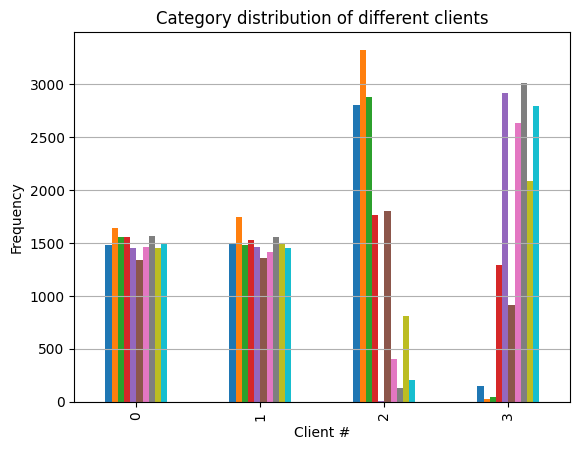

In [4]:
ClientDatasetManager.plot_dataset_splits(res.client_datasets)


In [7]:
res.global_model = res.global_model.to('cuda')

In [ ]:
def plot_reconstructed(autoencoder, r0=(-5, 10), r1=(-10, 5), n=12):
    w = 28
    img = np.zeros((n*w, n*w))
    for i, y in enumerate(np.linspace(*r1, n)):
        for j, x in enumerate(np.linspace(*r0, n)):
            z = torch.Tensor([[x, y]]).to('cuda')
            x_hat = autoencoder.decoder(z)
            x_hat = x_hat.reshape(28, 28).to('cpu').detach().numpy()
            img[(n-1-i)*w:(n-1-i+1)*w, j*w:(j+1)*w] = x_hat
    plt.imshow(img, extent=[*r0, *r1])

In [ ]:
plot_reconstructed(res.global_model, r0=(-3, 3), r1=(-3, 3))


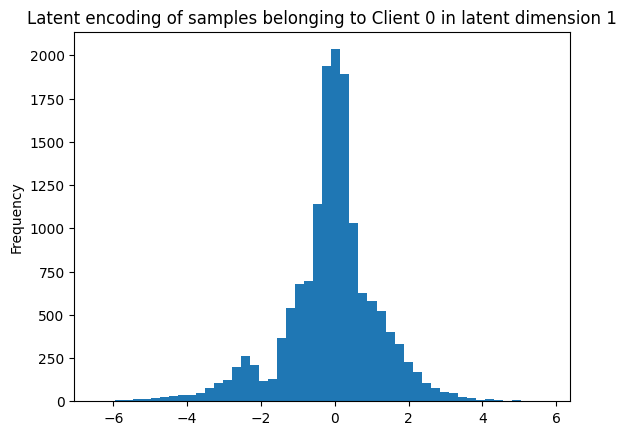

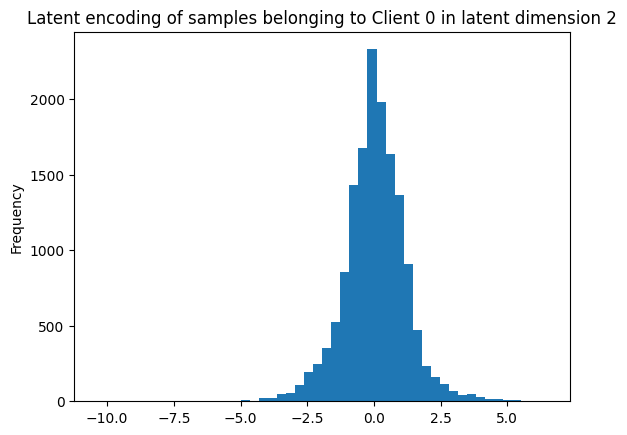

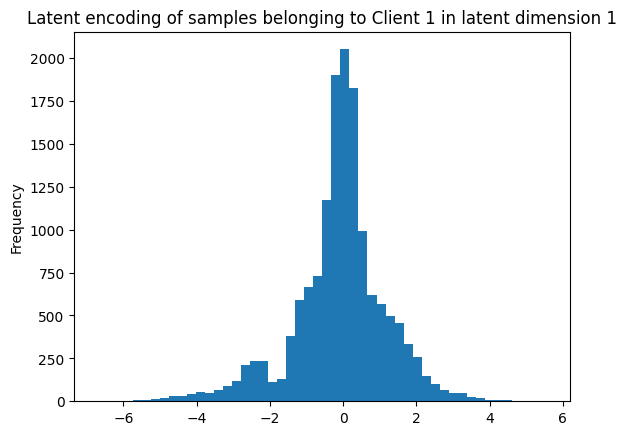

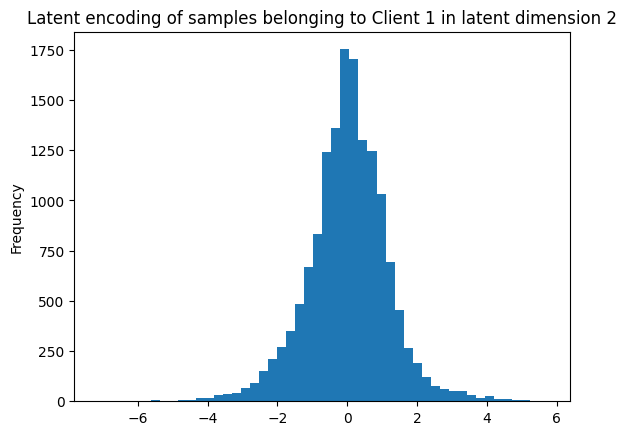

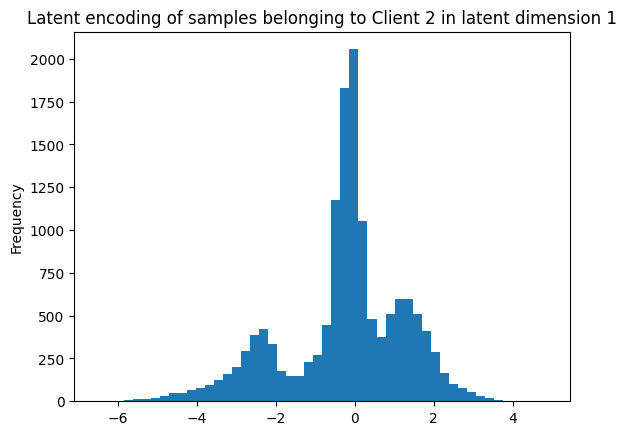

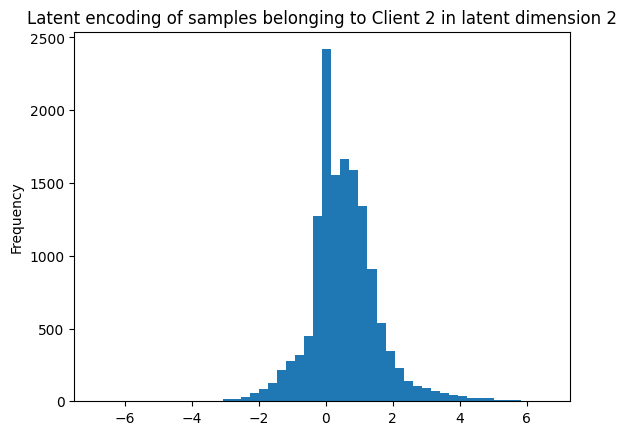

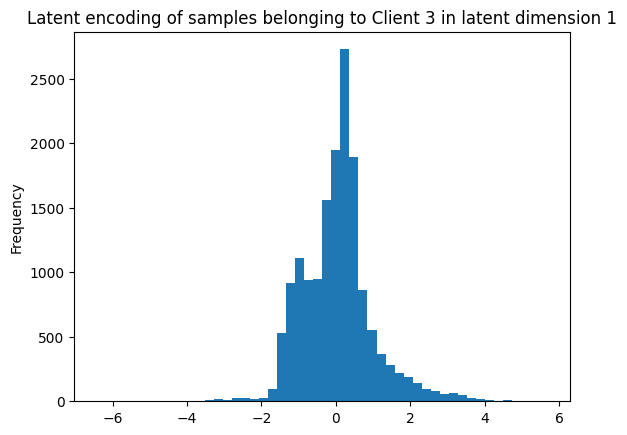

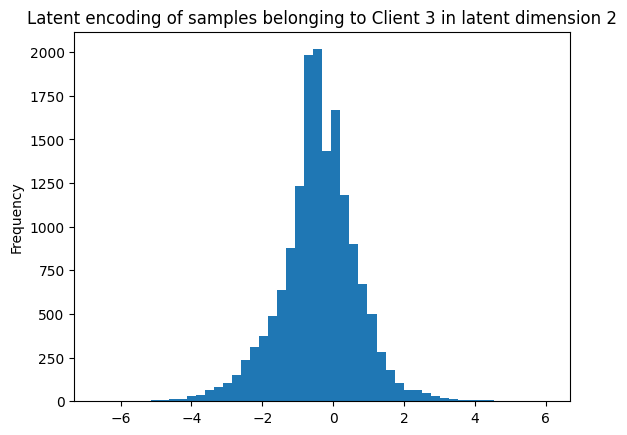

In [6]:
trial_weights = calculate_new_weights(res.global_model.encoder, res.client_datasets,0.5,0.0)


In [8]:
print(f"Original Weights: {calculate_relative_dataset_sizes(res.client_datasets)}")
print(f"New Weights: {trial_weights}")

Original Weights: [0.25000833361112035, 0.25000833361112035, 0.23532451081702724, 0.26465882196073204]
New Weights: [0.37006298828821843, 0.37561911293143474, 0.0008803248467934863, 0.2534375739335534]


In [ ]:
second_res = federate(FakeArgs(), trial_weights, res.client_datasets)
second_res.serialise("bogus_point_one",FakeArgs())


In [ ]:
a = res.global_loss_manager.validation_total_across_communication

In [ ]:
b = second_res.global_loss_manager.validation_total_across_communication

In [ ]:
list(zip(a,b))